In [55]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import math
import statistics as st

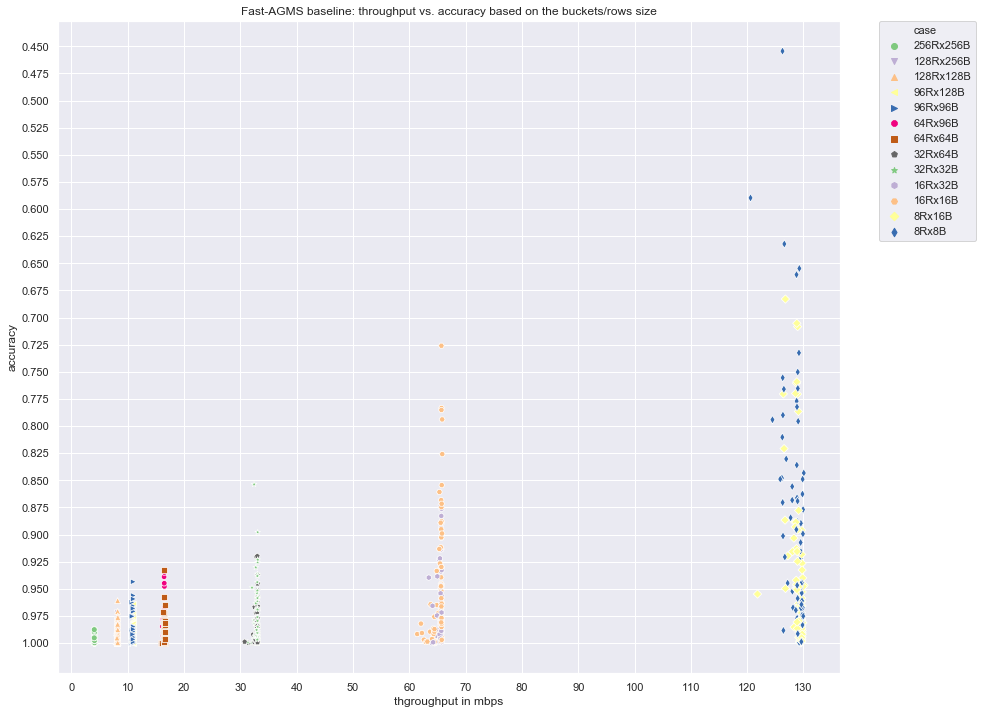

In [42]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 32
alg_cnt = 1
dist_cnt = 3
offset = case_cnt*runs_cnt*dist_cnt
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], alg_cnt)
plus_runs = np.repeat(cases, runs_cnt)
plus_dists = np.tile(plus_runs, dist_cnt)
algs = np.repeat(['F-AGMS'], offset)
thrput = np.array([4.08393, 4.09475, 4.09415, 4.076, 4.09688, 4.09432, 4.10013, 4.05965, 4.09803, 4.09355, 4.09727, 4.02154, 4.08055, 4.0824, 4.07401, 4.05497, 4.08387, 4.08074, 4.07988, 4.01559, 4.06165, 4.08518, 4.08187, 4.07334, 4.0934, 4.0848, 4.08546, 4.08628, 4.08674, 4.08955, 4.08597, 4.09538, 8.22393, 8.21735, 8.22725, 8.16165, 8.18294, 8.20939, 8.20497, 8.20755, 8.21346, 8.20877, 8.21574, 8.17748, 8.19749, 8.21245, 8.20229, 8.18204, 8.21199, 8.18741, 8.1781, 8.18098, 8.22149, 8.1954, 8.20594, 8.20828, 8.21411, 8.21342, 8.19445, 8.14641, 8.13753, 8.20438, 8.21596, 8.20534, 8.23464, 8.23722, 8.14201, 8.21316, 8.22798, 8.2331, 8.23548, 8.20688, 8.22814, 8.20147, 8.23225, 8.19952, 8.2495, 8.23953, 8.24092, 8.23492, 8.24461, 8.23121, 8.11754, 8.24828, 8.24506, 8.22958, 8.24019, 8.24546, 8.24649, 8.18042, 8.15669, 8.22172, 8.24819, 8.21572, 8.23833, 8.25237, 11.0246, 10.9984, 10.9992, 11.0233, 10.9783, 10.9854, 11.0069, 10.9792, 11.0229, 11.0108, 11.0221, 10.9831, 10.7025, 11.0301, 10.9615, 11.0235, 11.008, 11.0137, 10.9848, 10.9707, 10.9769, 10.9734, 10.9491, 10.9798, 10.9228, 11.0152, 11.0286, 11.0284, 11.0112, 11.0041, 11.0255, 11.0329, 11.0208, 10.7613, 11.025, 11.0226, 11.0217, 11.0299, 11.0289, 10.9938, 11.0006, 10.9873, 10.9023, 10.8157, 11.0329, 11.0191, 11.0144, 11.0274, 11.0157, 11.0317, 11.0259, 11.031, 10.9824, 10.7867, 10.817, 11.0155, 11.0173, 11.029, 11.0029, 11.0121, 11.0353, 11.0167, 11.029, 10.9471, 16.2819, 16.4691, 16.5324, 16.4963, 16.4872, 16.5056, 16.5135, 16.4789, 16.5422, 16.4425, 16.5138, 16.4927, 16.4297, 16.5248, 16.4522, 16.0786, 16.4036, 16.4026, 16.5015, 16.5299, 16.5166, 16.4148, 16.5107, 16.5109, 16.4858, 16.4788, 16.5292, 16.5358, 16.5109, 16.3395, 16.1772, 16.2378, 16.5434, 16.4982, 16.5096, 16.5294, 16.4937, 16.5171, 16.5055, 16.4403, 16.514, 16.5097, 16.4683, 16.534, 16.4955, 16.1674, 16.278, 16.4506, 16.5394, 16.4871, 16.4713, 16.5282, 16.512, 16.4996, 16.5448, 16.5048, 16.4896, 16.5336, 16.4868, 16.501, 16.3835, 16.1385, 15.884, 16.1628, 32.9428, 33.0126, 33.0206, 32.9707, 32.9219, 32.9882, 32.9684, 32.9844, 32.9808, 32.936, 32.9797, 32.9263, 33.0069, 32.8272, 32.8398, 32.8447, 32.9031, 32.6649, 32.9706, 33.0018, 32.8729, 32.9715, 33.0156, 32.742, 32.9454, 32.9051, 31.4555, 32.1495, 32.9411, 32.9673, 32.9444, 32.9523, 32.9673, 32.9815, 33.0108, 32.9806, 32.6536, 32.9903, 32.8721, 33.0224, 33.0084, 32.8704, 32.8597, 32.9798, 32.9775, 33.0222, 32.9827, 33.0113, 32.9933, 32.9916, 33.006, 33.0036, 32.8992, 33.0044, 32.7578, 32.991, 32.8412, 31.2894, 32.1278, 32.4207, 33.0043, 32.9865, 32.9813, 32.8962, 64.5073, 64.5519, 64.4006, 64.5975, 64.4992, 64.5835, 64.565, 64.5845, 64.6364, 64.1211, 64.632, 64.548, 64.4415, 64.5737, 64.6673, 64.4639, 64.5584, 64.3384, 64.6418, 64.4865, 64.3238, 64.3796, 64.5004, 64.4902, 64.5508, 64.4815, 64.5071, 64.5399, 64.5926, 64.5881, 64.0202, 64.5411, 64.505, 64.442, 64.4575, 64.5295, 64.5723, 64.3342, 64.632, 64.475, 64.2916, 62.5969, 64.2251, 64.3643, 64.5584, 64.4039, 62.0747, 61.4022, 62.9673, 62.2453, 63.2141, 63.6966, 64.4972, 64.5254, 64.5693, 64.4902, 64.5514, 64.4172, 64.4306, 64.3447, 64.4415, 64.0411, 64.2822, 64.5199, 129.621, 129.156, 129.579, 129.563, 129.63, 129.597, 129.748, 129.437, 129.377, 129.754, 129.502, 129.279, 129.564, 129.466, 129.217, 129.513, 129.453, 128.345, 129.329, 129.607, 129.125, 129.646, 129.693, 129.628, 129.486, 129.54, 129.213, 129.533, 129.516, 129.611, 129.654, 129.566, 129.626, 129.251, 129.849, 129.538, 128.034, 129.229, 128.88, 129.126, 129.49, 129.651, 129.636, 129.566, 129.421, 129.235, 129.843, 129.693, 129.58, 129.544, 129.71, 129.723, 129.232, 129.395, 129.867, 129.745, 129.351, 129.698, 129.265, 129.151, 129.104, 129.646, 129.888, 129.769,
                  4.05304, 4.08932, 4.09445, 4.08978, 4.07683, 4.09197, 4.08758, 4.09422, 4.04875, 4.08881, 4.09325, 4.09565, 4.08341, 4.07761, 4.08844, 4.09321, 4.09058, 4.0925, 4.09584, 4.0948, 4.08178, 4.08593, 4.09496, 4.08267, 4.08626, 4.08461, 4.09063, 4.04334, 4.08288, 4.07943, 4.09615, 4.088, 8.20717, 8.20016, 8.17092, 8.20507, 8.20502, 8.2064, 8.1731, 8.19567, 8.20774, 8.17948, 8.19605, 8.20677, 8.21408, 8.20285, 8.20516, 8.1958, 8.21234, 8.17961, 8.20788, 8.19087, 8.21007, 8.1351, 8.1848, 8.20604, 8.21354, 8.18228, 8.20792, 8.20507, 8.21893, 8.21049, 8.20984, 8.19326, 8.23464, 8.21373, 8.232, 8.18328, 8.19429, 8.14308, 8.15326, 8.23349, 8.23148, 8.20362, 8.21154, 8.21734, 8.1127, 8.22339, 8.22591, 8.22771, 8.23311, 8.22289, 8.22588, 7.92255, 8.14971, 8.22397, 8.22458, 8.22539, 8.22964, 8.21046, 8.22915, 8.22006, 8.11418, 8.22015, 8.22135, 8.2237, 10.9747, 10.9913, 11.0117, 10.9983, 10.9594, 10.8481, 10.9954, 10.9929, 11.0132, 11.0152, 11.0104, 10.9943, 10.999, 11.0174, 10.9811, 10.9705, 11.0069, 11.0055, 10.9894, 11.0084, 11.011, 10.9726, 11.0165, 10.9772, 11.0022, 10.8142, 10.987, 11.0006, 11.0084, 10.9991, 10.9675, 10.9953, 10.7659, 10.9934, 10.9846, 10.8323, 10.7154, 10.8783, 11.0163, 11.0095, 11.0082, 11.0009, 11.0131, 10.9995, 11.0025, 11.0046, 10.7696, 11.0083, 10.9679, 11.0259, 11.0279, 10.9973, 11.0192, 11.0169, 11.003, 10.9908, 10.8786, 11.0122, 11.0158, 11.0099, 11.0274, 10.9783, 11.0038, 11.0045, 16.5064, 16.4681, 16.4413, 16.4279, 16.251, 16.5005, 16.4639, 16.4908, 16.4906, 16.4549, 16.5016, 16.5222, 16.5335, 16.4984, 16.5019, 16.5428, 16.5444, 16.5204, 16.5088, 16.5014, 16.5133, 16.5368, 16.5077, 16.5346, 16.5371, 16.5149, 16.5289, 16.5205, 16.5149, 16.5305, 16.5054, 16.5403, 16.5188, 16.476, 16.5086, 16.3533, 16.5199, 16.4978, 16.5102, 16.5128, 16.5182, 16.4749, 16.5158, 16.5149, 16.4784, 16.4714, 16.5027, 16.4979, 16.5143, 16.4182, 16.4732, 16.5152, 16.4925, 16.4998, 16.5007, 16.4564, 16.5202, 16.5099, 16.505, 16.5043, 16.5039, 16.5072, 16.519, 16.509, 33.0782, 32.4441, 33.0165, 32.5059, 32.2763, 30.7601, 32.5309, 33.0824, 33.0567, 32.8272, 32.8651, 32.9912, 33.0384, 33.0767, 32.9252, 33.0013, 33.0539, 33.0347, 33.0919, 33.0421, 32.7939, 33.0733, 33.0355, 33.0368, 33.0777, 32.8014, 33.0874, 32.819, 32.9047, 33.0719, 33.0662, 32.8947, 32.6166, 33.0588, 32.5485, 32.4811, 32.6703, 33.0476, 33.0191, 33.0115, 33.0716, 33.0163, 33.0163, 33.0522, 33.0592, 33.0504, 33.0324, 32.9364, 33.0543, 33.0639, 33.0601, 32.9776, 32.8656, 33.004, 33.0667, 33.0516, 33.0335, 32.9842, 33.0412, 33.0694, 33.0087, 33.0568, 32.8497, 32.4316, 65.7616, 65.6484, 64.7603, 65.6551, 65.7292, 65.4632, 64.2417, 64.8869, 65.6586, 65.4356, 65.6863, 65.6401, 65.6961, 65.7268, 65.6382, 65.6002, 65.5824, 65.3932, 65.7007, 65.4117, 65.404, 65.7202, 65.7124, 65.6665, 65.7559, 65.6321, 65.6478, 65.6298, 65.6986, 65.638, 65.0904, 65.6997, 65.7679, 65.5188, 65.6714, 65.6495, 65.6753, 65.6342, 65.7389, 65.5785, 65.6524, 64.8983, 65.5726, 65.6449, 65.6405, 65.6263, 65.7007, 65.5956, 65.6072, 65.6474, 65.6556, 65.6936, 65.3905, 65.6827, 65.6482, 65.6888, 65.6113, 65.7575, 65.0899, 64.3365, 64.454, 64.4708, 63.779, 65.4229, 121.839, 129.388, 129.854, 129.686, 129.787, 129.74, 129.747, 129.372, 129.498, 129.93, 130.12, 129.693, 129.71, 129.474, 129.335, 129.842, 129.769, 129.557, 129.094, 129.637, 129.008, 129.706, 129.786, 129.946, 129.655, 129.698, 129.57, 129.765, 129.69, 129.699, 129.579, 129.679, 129.184, 129.687, 129.907, 129.738, 129.892, 129.626, 129.798, 128.925, 128.969, 129.568, 130.058, 129.578, 129.819, 129.851, 129.743, 129.671, 129.741, 129.541, 129.711, 128.001, 129.863, 129.555, 129.928, 129.499, 129.963, 129.56, 129.642, 129.458, 127.719, 127.19, 129.822, 129.27,
                  4.05225, 4.05364, 4.05341, 4.04512, 4.06092, 4.06995, 4.08182, 4.07086, 4.08145, 4.06931, 4.07005, 4.06428, 4.09483, 4.08286, 4.09601, 4.09561, 4.0918, 4.0742, 4.09698, 4.0881, 4.04391, 4.00041, 4.09672, 4.0956, 4.05192, 4.09374, 4.09477, 4.09637, 4.08468, 4.09616, 4.0995, 4.05175, 8.13829, 7.98908, 8.13809, 8.13878, 8.10984, 8.12911, 8.14113, 8.1302, 8.13349, 8.13674, 8.12641, 8.14531, 8.13183, 8.15826, 8.13564, 8.11248, 8.12979, 8.11653, 8.1574, 8.12821, 8.14656, 8.14946, 8.12527, 8.15503, 8.13659, 8.1493, 8.12523, 8.05237, 8.142, 8.13605, 8.14907, 8.1339, 8.19209, 8.19969, 8.20485, 8.21139, 8.24291, 8.2343, 8.22907, 8.235, 8.2148, 8.21418, 8.1957, 8.20753, 8.21003, 8.2125, 8.1928, 8.14295, 8.20503, 8.21733, 8.20618, 8.21348, 8.21479, 8.20196, 8.2063, 8.20173, 8.21775, 8.14011, 8.23627, 8.22499, 8.23898, 8.23126, 8.09672, 8.2031, 10.9182, 11.0166, 10.9809, 11.017, 11.0202, 10.9863, 11.0242, 11.0047, 11.0121, 11.0006, 10.9983, 10.9933, 10.9371, 10.9892, 10.9815, 10.9908, 10.9737, 10.9289, 10.9857, 10.9552, 10.9563, 10.9653, 10.8819, 10.7653, 10.9391, 10.9751, 10.9673, 10.9369, 10.9634, 10.9823, 10.9632, 10.9844, 10.9085, 10.7611, 10.7597, 10.9604, 10.9959, 10.988, 10.8844, 10.9754, 10.9734, 10.9879, 11.0051, 10.9855, 10.9777, 10.995, 10.99, 10.995, 10.9055, 11.0025, 10.9633, 10.9988, 10.9951, 10.8401, 10.7752, 10.9875, 11.0028, 10.9939, 10.9543, 10.9809, 10.9672, 10.9924, 10.9904, 10.9065, 16.3967, 16.5035, 16.5187, 16.4988, 16.4998, 16.4949, 16.5002, 16.509, 16.4612, 16.5329, 16.4851, 16.4391, 16.4832, 16.1938, 16.1685, 16.4502, 16.4854, 16.5155, 16.5002, 16.4443, 16.5208, 16.5021, 16.3938, 16.2768, 16.4936, 16.4873, 16.4748, 16.4621, 16.5021, 16.5033, 16.467, 16.4824, 16.4694, 16.5058, 16.5051, 16.473, 16.5091, 16.5009, 16.4393, 16.4988, 16.4948, 16.4636, 16.4859, 16.4651, 16.4981, 16.3992, 16.4446, 16.5148, 16.4865, 16.4926, 16.4773, 16.2723, 16.4027, 16.5444, 16.4816, 16.5609, 16.5549, 16.5293, 16.5604, 16.5575, 16.56, 16.5599, 16.5436, 16.565, 32.7626, 33.0384, 32.84, 32.9915, 33.0214, 33.0266, 33.0703, 32.7009, 33.0222, 33.0617, 32.9998, 33.0083, 33.0566, 32.967, 33.0274, 33.0038, 33.0342, 33.0634, 32.9262, 32.9636, 33.0714, 33.0513, 33.0437, 33.0589, 32.9808, 33.0679, 33.0321, 32.965, 33.0112, 32.882, 32.9983, 33.059, 33.0415, 33.077, 32.9974, 33.0422, 33.0365, 33.0398, 32.7597, 32.4411, 32.7353, 32.0665, 32.7679, 33.0223, 33.0304, 32.9456, 33.0234, 33.0006, 33.0215, 33.0357, 33.0585, 32.985, 33.0579, 33.0364, 33.0553, 33.0749, 32.9927, 33.0251, 32.7361, 32.8797, 33.0576, 33.0086, 33.0397, 33.0815, 65.5867, 65.7822, 65.5577, 65.5287, 65.6117, 65.6664, 64.9801, 65.7192, 65.6005, 65.6019, 65.327, 65.3801, 65.6444, 65.702, 65.6843, 65.669, 63.4582, 64.1242, 64.9413, 65.5818, 65.7398, 65.6066, 65.6598, 65.722, 65.6519, 65.5808, 65.6864, 65.6431, 65.4399, 65.6591, 65.6489, 65.5579, 65.6872, 65.6636, 65.8322, 65.6006, 65.8506, 65.6882, 65.3539, 65.7211, 65.7662, 65.7209, 65.6289, 65.7306, 65.6993, 65.672, 65.7391, 65.6037, 65.7312, 65.3263, 65.4554, 65.6559, 65.5815, 65.6982, 65.7013, 65.6921, 65.7506, 65.6984, 65.7671, 65.7058, 64.8831, 65.8059, 65.7183, 65.6694, 128.97, 128.812, 128.8, 128.759, 129.099, 128.744, 129.144, 128.969, 128.947, 128.953, 128.918, 128.491, 128.833, 128.066, 128.873, 129.201, 126.732, 128.3, 128.606, 129.16, 128.669, 128.732, 128.841, 128.819, 128.53, 128.711, 127.22, 126.805, 126.425, 126.557, 126.792, 128.863, 120.596, 128.145, 124.493, 128.764, 126.171, 128.861, 126.69, 128.792, 126.247, 128.956, 126.361, 128.645, 126.438, 129.001, 126.602, 128.851, 126.37, 129.2, 126.522, 128.989, 125.875, 128.882, 126.276, 128, 126.312, 129.062, 126.299, 128.815, 126.352, 128.986, 126.936, 128.739])
acc = np.array([0.999998, 0.999995, 0.999996, 0.999997, 0.999996, 0.999993, 0.999996, 0.999996, 0.999995, 0.999997, 0.999998, 1, 0.999998, 0.999995, 1, 0.999998, 0.999994, 0.999989, 0.999995, 0.999992, 0.999997, 0.999999, 0.999999, 0.999995, 0.99999, 0.999998, 0.999995, 0.999998, 1, 0.999996, 1, 0.999998, 0.999982, 0.999993, 0.999994, 0.999996, 0.999995, 0.999993, 0.999999, 0.999999, 1, 0.999993, 0.999997, 0.999998, 0.999995, 0.999997, 0.999989, 0.999997, 0.999998, 0.999998, 0.999996, 1, 0.999996, 0.999993, 0.999999, 0.999996, 0.99999, 0.999995, 0.999997, 0.999999, 0.999994, 0.99999, 0.999991, 0.999997, 0.999978, 0.999948, 0.999953, 0.999981, 0.999978, 0.999987, 0.999981, 0.999961, 0.999978, 0.999989, 0.999981, 0.999999, 0.999934, 1, 0.999981, 0.999993, 0.999952, 0.999975, 0.999991, 0.999996, 0.99996, 0.999967, 0.999977, 0.99994, 0.999986, 0.999991, 0.999955, 0.99999, 0.999975, 0.999978, 0.999994, 0.999954, 0.999988, 0.999999, 0.999995, 0.999969, 0.999966, 0.999936, 0.999969, 1, 1, 0.999966, 0.999964, 0.999995, 0.99999, 0.99998, 0.999997, 0.999994, 0.999993, 0.999992, 0.99999, 0.999985, 0.999986, 0.999975, 0.999971, 0.999994, 0.999964, 0.999968, 0.999985, 0.999986, 0.999965, 0.999986, 0.999982, 0.999971, 0.99997, 0.999927, 0.999856, 0.999828, 0.999881, 0.999852, 0.999998, 0.999967, 0.999712, 0.999883, 0.999658, 0.99983, 0.999995, 0.999719, 0.999921, 0.999883, 0.999886, 0.999982, 0.999947, 0.999907, 0.999732, 0.999993, 0.999947, 0.999938, 0.999979, 0.999994, 0.99978, 0.999706, 0.999876, 0.999872, 0.999896, 0.999669, 0.999972, 0.999865, 0.999826, 0.999854, 0.999997, 0.999983, 0.999835, 0.999992, 0.99984, 0.999792, 0.999981, 0.99996, 0.999782, 0.999683, 0.999909, 0.999987, 0.999769, 0.999924, 0.999776, 0.999909, 0.99999, 0.999946, 0.999834, 0.999898, 0.999805, 0.999817, 0.999903, 0.999704, 0.999617, 0.999987, 0.999954, 0.999762, 0.999836, 0.99996, 0.999983, 0.99978, 0.999967, 0.999964, 0.999861, 0.999966, 0.999987, 0.999927, 0.99987, 0.999953, 0.999994, 0.999494, 0.999964, 0.999928, 0.999731, 0.999974, 0.999882, 0.999963, 0.999984, 0.999812, 0.999846, 0.999813, 0.999884, 0.999783, 0.999892, 0.999996, 0.999821, 0.999908, 0.999681, 0.999893, 0.999733, 0.999773, 0.999944, 0.999924, 0.999713, 0.999983, 0.99989, 0.999925, 0.999868, 0.99994, 0.999821, 0.999842, 0.999714, 0.999755, 0.999823, 0.999985, 0.999912, 0.999988, 0.999787, 0.999972, 0.999792, 0.999753, 0.999952, 0.999756, 0.999908, 0.999737, 0.99991, 0.999862, 0.99992, 0.999655, 0.999927, 0.999711, 0.999103, 0.999478, 0.999666, 0.99975, 0.999112, 0.998366, 0.999731, 0.999812, 0.999596, 0.999725, 0.999949, 0.99973, 0.99936, 0.999575, 0.999714, 0.999623, 0.999766, 0.999697, 0.998925, 0.99762, 0.999099, 0.999148, 0.998397, 0.999554, 0.998709, 0.999415, 0.999706, 0.99947, 0.99868, 0.998446, 0.999996, 0.999449, 0.999428, 0.999315, 0.999167, 0.998843, 0.997582, 0.999184, 0.999683, 0.999289, 0.998375, 0.9982, 0.999904, 0.998531, 0.999243, 0.998917, 0.997663, 0.999678, 0.999575, 0.998948, 0.999163, 0.999738, 0.997679, 0.999224, 0.996939, 0.999919, 0.999134, 0.999743, 0.999332, 0.999872, 0.99902, 0.997317, 0.999974, 0.999859, 0.996876, 0.975713, 0.997092, 0.99938, 0.997184, 0.996175, 0.998862, 0.999616, 0.997473, 0.996875, 0.996855, 0.994788, 0.997797, 0.994922, 0.982084, 0.991712, 0.999089, 0.990772, 0.998625, 0.989495, 0.998043, 0.998559, 0.997157, 0.999382, 0.997182, 0.997832, 0.999083, 0.992541, 0.993209, 0.996246, 0.986688, 0.998851, 0.990702, 0.994702, 0.989034, 0.997949, 0.997756, 0.981411, 0.994285, 0.994222, 0.984285, 0.990389, 0.993083, 0.999333, 0.997256, 0.999817, 0.983118, 0.988648, 0.989807, 0.985307, 0.998159, 0.979922, 0.963466, 0.977665, 0.978871, 0.999458, 0.99048, 0.989765, 0.990431, 0.988254, 0.998744, 0.990596, 0.984464, 0.993713, 0.998618, 0.992656, 0.958943, 0.970645, 0.952241, 0.963752, 0.977124, 0.991458, 0.977775, 0.995102, 0.99888, 0.981736, 0.985634, 0.999412, 0.943633, 0.994662, 0.987015, 0.921951, 0.988219, 0.992242, 0.985658, 0.993993, 0.973125, 0.988744, 0.981542, 0.997868, 0.988012, 0.994819, 0.959696, 0.946477, 0.979772, 0.992943,
               0.997835, 0.999535, 0.998596, 0.999529, 0.999212, 0.999282, 0.999338, 0.999967, 0.99813, 0.998444, 0.999491, 0.998345, 0.998127, 0.999494, 0.997855, 0.998916, 0.998648, 0.998808, 0.998585, 0.999169, 0.998545, 0.999778, 0.998897, 0.999957, 0.998086, 0.998989, 0.999719, 0.999324, 0.997708, 0.999274, 0.999967, 0.99933, 0.998982, 0.999909, 0.999847, 0.999224, 0.999751, 0.997353, 0.998746, 0.999143, 0.998991, 0.998471, 0.998711, 0.996617, 0.998718, 0.999295, 0.996873, 0.998969, 0.999296, 0.998735, 0.999328, 0.997951, 0.998704, 0.999543, 0.999131, 0.999605, 0.998192, 0.998659, 0.997752, 0.999458, 0.999867, 0.997915, 0.998526, 0.997137, 0.996205, 0.995133, 0.996771, 0.999151, 0.996939, 0.999022, 0.998828, 0.999264, 0.99821, 0.995186, 0.997136, 0.999846, 0.997317, 0.99752, 0.99504, 0.997956, 0.998911, 0.999254, 0.998308, 0.998815, 0.999406, 0.995588, 0.997558, 0.998852, 0.999763, 0.997328, 0.999924, 0.995862, 0.997751, 0.998691, 0.996564, 0.998415, 0.9949, 0.997996, 0.998003, 0.998797, 0.998073, 0.997051, 0.997634, 0.997054, 0.999277, 0.998757, 0.995072, 0.998691, 0.999316, 0.9991, 0.998307, 0.999473, 0.997915, 0.999167, 0.999015, 0.996772, 0.99885, 0.9994, 0.99797, 0.997962, 0.999653, 0.995844, 0.998644, 0.997017, 0.999468, 0.999143, 0.99759, 0.998702, 0.995681, 0.997516, 0.996047, 0.9957, 0.999701, 0.999862, 0.993094, 0.99658, 0.995686, 0.997974, 0.999848, 0.995576, 0.997312, 0.998376, 0.997938, 0.996971, 0.99691, 0.995694, 0.998874, 0.987554, 0.99362, 0.99659, 0.995155, 0.999494, 0.996334, 0.989104, 0.992225, 0.998973, 0.986972, 0.991599, 0.99808, 0.994974, 0.995751, 0.996841, 0.99424, 0.998537, 0.993237, 0.996096, 0.995286, 0.999336, 0.996583, 0.999949, 0.995158, 0.996161, 0.991928, 0.992642, 0.99374, 0.995557, 0.986912, 0.992968, 0.996072, 0.996971, 0.999752, 0.991564, 0.996827, 0.989478, 0.989767, 0.999765, 0.999822, 0.992684, 0.990413, 0.998345, 0.997546, 0.995042, 0.998077, 0.994853, 0.9986, 0.998596, 0.996424, 0.997007, 0.998665, 0.99142, 0.999315, 0.993002, 0.996562, 0.981986, 0.998336, 0.999846, 0.99486, 0.998054, 0.997054, 0.991728, 0.990175, 0.997008, 0.99575, 0.996402, 0.998819, 0.997268, 0.999618, 0.997818, 0.997368, 0.997616, 0.999206, 0.990193, 0.996698, 0.993569, 0.990703, 0.992202, 0.982494, 0.999148, 0.99211, 0.998811, 0.966779, 0.994136, 0.993168, 0.991486, 0.999091, 0.99212, 0.990277, 0.994327, 0.99053, 0.994151, 0.995278, 0.999295, 0.992323, 0.994318, 0.996731, 0.996584, 0.986119, 0.998574, 0.985907, 0.990569, 0.992933, 0.989492, 0.999606, 0.994606, 0.993308, 0.99491, 0.993899, 0.986354, 0.982138, 0.97869, 0.992957, 0.995051, 0.999873, 0.993826, 0.987248, 0.995851, 0.993004, 0.990737, 0.983809, 0.99395, 0.977953, 0.99617, 0.996387, 0.983245, 0.976199, 0.999678, 0.9814, 0.998043, 0.99829, 0.973667, 0.987216, 0.983209, 0.997612, 0.970756, 0.982313, 0.997191, 0.978098, 0.996318, 0.980055, 0.991286, 0.986925, 0.984074, 0.998375, 0.980521, 0.999263, 0.993274, 0.988712, 0.989563, 0.990041, 0.977792, 0.990739, 0.948065, 0.986655, 0.994137, 0.992795, 0.998601, 0.9718, 0.987794, 0.977035, 0.975097, 0.986256, 0.995868, 0.956687, 0.994709, 0.964039, 0.994636, 0.962924, 0.98432, 0.988416, 0.999053, 0.963019, 0.995027, 0.976449, 0.988114, 0.995139, 0.968284, 0.98051, 0.949549, 0.945262, 0.96505, 0.98296, 0.989149, 0.983644, 0.971707, 0.945846, 0.970038, 0.991956, 0.977873, 0.972788, 0.930644, 0.93254, 0.913479, 0.93941, 0.951923, 0.997933, 0.994685, 0.97269, 0.991641, 0.989454, 0.987217, 0.964341, 0.991603, 0.954836, 0.970864, 0.939986, 0.895933, 0.952898, 0.926469, 0.965715, 0.978672, 0.997508, 0.981422, 0.9467, 0.918306, 0.996432, 0.958494, 0.995222, 0.98117, 0.988392, 0.987395, 0.952519, 0.958526, 0.967358, 0.986627, 0.991813, 0.94793, 0.972257, 0.961628, 0.966573, 0.932688, 0.995078, 0.998206, 0.978955, 0.958628, 0.949186, 0.953938, 0.899324, 0.973607, 0.97298, 0.998792, 0.967031, 0.888041, 0.958834, 0.948472, 0.843292, 0.945116, 0.862687, 0.848959, 0.980487, 0.980189, 0.961085, 0.88959, 0.944568, 0.868313, 0.967442, 0.945546, 0.876954, 0.907355, 0.97517, 0.967738, 0.964441, 0.915078, 0.88452, 0.94478, 0.983297, 0.654759,
               0.991924, 0.991921, 0.997497, 0.990975, 0.999103, 0.991365, 0.994345, 0.995623, 0.999286, 0.999409, 0.987657, 0.994905, 0.997533, 0.996509, 0.999678, 0.997615, 0.991125, 0.990048, 0.996936, 0.987599, 0.990045, 0.989585, 0.994584, 0.990012, 0.987637, 0.995721, 0.994053, 0.997922, 0.997599, 0.997681, 0.99506, 0.99522, 0.995933, 0.995385, 0.994786, 0.988634, 0.995711, 0.994423, 0.988998, 0.997405, 0.992256, 0.995545, 0.996517, 0.984261, 0.982791, 0.993181, 0.995215, 0.972231, 0.985282, 0.987878, 0.989057, 0.986916, 0.99076, 0.995408, 0.992277, 0.989685, 0.996101, 0.980214, 0.992223, 0.993574, 0.978591, 0.984885, 0.989175, 0.989229, 0.994874, 0.997611, 0.987428, 0.988697, 0.98015, 0.989301, 0.98205, 0.992499, 0.98362, 0.989082, 0.987293, 0.976908, 0.995152, 0.989946, 0.979825, 0.98707, 0.979824, 0.999562, 0.981025, 0.98152, 0.984184, 0.970778, 0.960864, 0.991652, 0.977732, 0.99366, 0.975037, 0.98173, 0.976327, 0.987672, 0.995263, 0.982638, 0.998738, 0.992584, 0.994534, 0.993035, 0.979947, 0.98806, 0.980824, 0.964203, 0.981692, 0.988707, 0.986284, 0.999326, 0.99314, 0.989734, 0.995422, 0.99997, 0.986994, 0.98638, 0.981833, 0.989168, 0.993508, 0.976504, 0.996295, 0.999117, 0.998947, 0.999748, 0.971456, 0.99067, 0.983932, 0.982172, 0.984664, 0.975513, 0.965727, 0.988291, 0.96237, 0.97015, 0.991784, 0.999953, 0.975077, 0.968896, 0.991742, 0.986326, 0.95972, 0.98591, 0.995173, 0.998653, 0.968501, 0.991352, 0.985188, 0.956187, 0.984482, 0.959329, 0.970775, 0.993264, 0.97536, 0.989213, 0.984932, 0.99452, 0.968072, 0.999044, 0.996573, 0.987283, 0.94352, 0.992021, 0.993373, 0.967297, 0.987076, 0.998381, 0.969346, 0.984754, 0.988509, 0.947783, 0.978909, 0.98492, 0.997677, 0.982123, 0.98454, 0.978022, 0.984779, 0.938928, 0.990961, 0.976227, 0.983597, 0.975873, 0.97141, 0.974116, 0.98844, 0.977689, 0.992975, 0.989525, 0.990453, 0.958705, 0.934988, 0.979809, 0.985755, 0.944866, 0.997745, 0.981404, 0.972892, 0.991199, 0.972392, 0.99005, 0.981857, 0.978672, 0.989397, 0.997536, 0.981398, 0.98885, 0.99426, 0.972679, 0.995264, 0.985326, 0.932546, 0.957468, 0.998623, 0.9714, 0.995921, 0.965345, 0.998794, 0.989637, 0.97924, 0.982467, 0.983838, 0.990228, 0.981361, 0.989795, 0.981772, 0.996159, 0.971912, 0.969829, 0.920564, 0.998969, 0.958554, 0.986009, 0.966055, 0.997127, 0.969692, 0.958493, 0.984288, 0.977438, 0.945208, 0.987486, 0.993152, 0.919808, 0.990293, 0.987532, 0.978769, 0.991423, 0.936889, 0.999397, 0.977064, 0.968622, 0.971588, 0.995087, 0.951353, 0.958309, 0.986166, 0.992415, 0.962305, 0.957144, 0.99276, 0.957284, 0.968467, 0.987314, 0.936374, 0.979607, 0.993843, 0.85374, 0.930271, 0.948852, 0.993284, 0.951756, 0.989274, 0.953874, 0.976137, 0.943877, 0.951573, 0.994314, 0.925639, 0.961574, 0.985117, 0.990588, 0.969182, 0.897887, 0.95896, 0.938231, 0.963441, 0.987933, 0.995592, 0.996858, 0.958599, 0.923171, 0.913848, 0.979327, 0.954161, 0.932009, 0.991959, 0.946633, 0.938528, 0.97186, 0.966638, 0.93253, 0.923113, 0.99201, 0.933963, 0.889656, 0.98877, 0.930556, 0.939674, 0.965707, 0.974604, 0.976894, 0.932721, 0.961124, 0.902983, 0.876318, 0.894019, 0.873604, 0.882872, 0.947037, 0.921932, 0.948148, 0.912218, 0.995854, 0.958717, 0.895144, 0.793895, 0.889529, 0.825897, 0.902575, 0.860787, 0.783344, 0.854457, 0.985189, 0.947663, 0.982447, 0.929607, 0.978413, 0.963662, 0.911766, 0.887873, 0.913271, 0.926652, 0.868314, 0.88908, 0.874775, 0.966244, 0.929821, 0.87159, 0.725979, 0.997009, 0.78517, 0.933512, 0.899005, 0.976909, 0.980969, 0.895813, 0.946913, 0.945875, 0.760456, 0.78654, 0.912992, 0.877766, 0.70838, 0.924686, 0.770574, 0.986584, 0.888569, 0.759205, 0.915755, 0.915607, 0.979799, 0.886679, 0.903269, 0.769963, 0.948413, 0.888561, 0.950012, 0.950736, 0.705307, 0.892905, 0.942089, 0.919599, 0.949716, 0.770437, 0.820787, 0.68296, 0.980614, 0.589735, 0.967437, 0.794193, 0.660506, 0.847977, 0.866217, 0.920672, 0.777077, 0.810272, 0.869161, 0.87029, 0.969737, 0.988394, 0.765334, 0.632206, 0.782317, 0.901382, 0.732539, 0.76598, 0.991416, 0.848886, 0.946772, 0.454484, 0.855732, 0.755492, 0.795595, 0.870481, 0.835984, 0.789955, 0.750221, 0.830332, 0.895393])

# print(acc.size)

df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.case = plus_dists
df1.throughput = thrput
df1.accuracy = acc
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
plt.figure(figsize=(14,12))
# print(df1)


# sns.regplot(y="accuracy", x="throughput", data=df1,
#            fit_reg=True, order=2, ci=68, truncate=True,
#            scatter_kws={"s": 0})

cmap = sns.color_palette("Accent", 13)
sns.set_color_codes("pastel")
fig1 = sns.scatterplot(y="accuracy", x="throughput", data=df1, hue="case",
               palette=cmap, s=35, markers=markers, style="case")
sns.set_color_codes()
fig1.set(xlabel="thgroughput in mbps", title= "Fast-AGMS baseline: throughput vs. accuracy based on the buckets/rows size")
fig1.axes.invert_yaxis()
plt.yticks(np.arange(0.45, 1.01, 0.025))
plt.xticks(np.arange(0, 140, 10.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

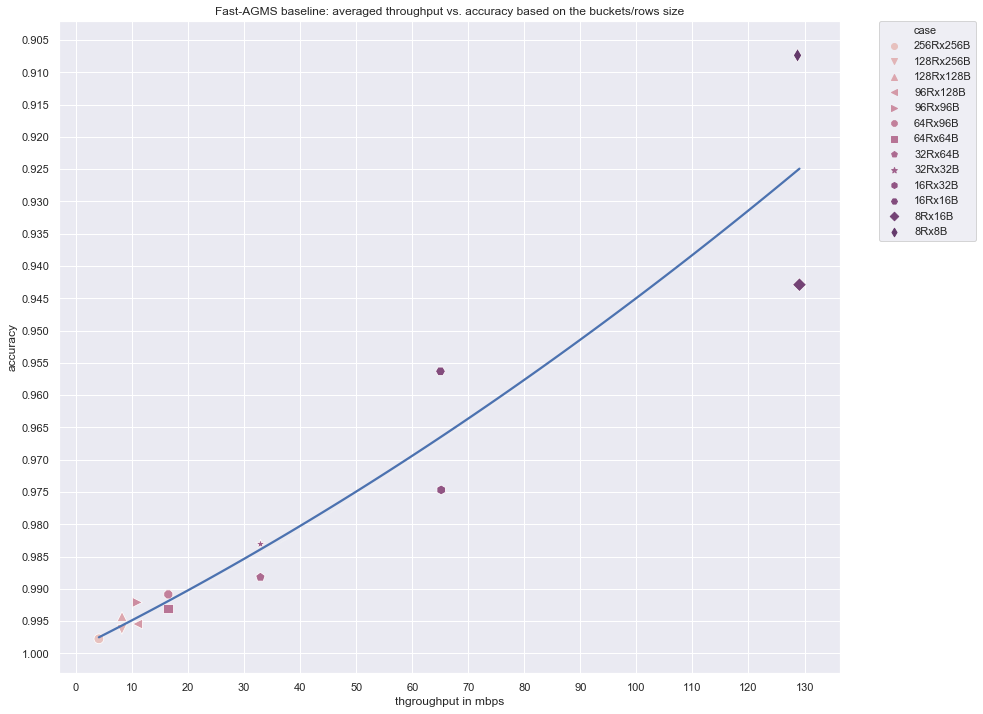

In [44]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 1
alg_cnt = 1
dist_cnt = 1
offset = case_cnt*runs_cnt*dist_cnt
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], alg_cnt)
algs = np.repeat(['F-AGMS'], case_cnt)
thrput = np.array([4.08393, 4.09475, 4.09415, 4.076, 4.09688, 4.09432, 4.10013, 4.05965, 4.09803, 4.09355, 4.09727, 4.02154, 4.08055, 4.0824, 4.07401, 4.05497, 4.08387, 4.08074, 4.07988, 4.01559, 4.06165, 4.08518, 4.08187, 4.07334, 4.0934, 4.0848, 4.08546, 4.08628, 4.08674, 4.08955, 4.08597, 4.09538, 8.22393, 8.21735, 8.22725, 8.16165, 8.18294, 8.20939, 8.20497, 8.20755, 8.21346, 8.20877, 8.21574, 8.17748, 8.19749, 8.21245, 8.20229, 8.18204, 8.21199, 8.18741, 8.1781, 8.18098, 8.22149, 8.1954, 8.20594, 8.20828, 8.21411, 8.21342, 8.19445, 8.14641, 8.13753, 8.20438, 8.21596, 8.20534, 8.23464, 8.23722, 8.14201, 8.21316, 8.22798, 8.2331, 8.23548, 8.20688, 8.22814, 8.20147, 8.23225, 8.19952, 8.2495, 8.23953, 8.24092, 8.23492, 8.24461, 8.23121, 8.11754, 8.24828, 8.24506, 8.22958, 8.24019, 8.24546, 8.24649, 8.18042, 8.15669, 8.22172, 8.24819, 8.21572, 8.23833, 8.25237, 11.0246, 10.9984, 10.9992, 11.0233, 10.9783, 10.9854, 11.0069, 10.9792, 11.0229, 11.0108, 11.0221, 10.9831, 10.7025, 11.0301, 10.9615, 11.0235, 11.008, 11.0137, 10.9848, 10.9707, 10.9769, 10.9734, 10.9491, 10.9798, 10.9228, 11.0152, 11.0286, 11.0284, 11.0112, 11.0041, 11.0255, 11.0329, 11.0208, 10.7613, 11.025, 11.0226, 11.0217, 11.0299, 11.0289, 10.9938, 11.0006, 10.9873, 10.9023, 10.8157, 11.0329, 11.0191, 11.0144, 11.0274, 11.0157, 11.0317, 11.0259, 11.031, 10.9824, 10.7867, 10.817, 11.0155, 11.0173, 11.029, 11.0029, 11.0121, 11.0353, 11.0167, 11.029, 10.9471, 16.2819, 16.4691, 16.5324, 16.4963, 16.4872, 16.5056, 16.5135, 16.4789, 16.5422, 16.4425, 16.5138, 16.4927, 16.4297, 16.5248, 16.4522, 16.0786, 16.4036, 16.4026, 16.5015, 16.5299, 16.5166, 16.4148, 16.5107, 16.5109, 16.4858, 16.4788, 16.5292, 16.5358, 16.5109, 16.3395, 16.1772, 16.2378, 16.5434, 16.4982, 16.5096, 16.5294, 16.4937, 16.5171, 16.5055, 16.4403, 16.514, 16.5097, 16.4683, 16.534, 16.4955, 16.1674, 16.278, 16.4506, 16.5394, 16.4871, 16.4713, 16.5282, 16.512, 16.4996, 16.5448, 16.5048, 16.4896, 16.5336, 16.4868, 16.501, 16.3835, 16.1385, 15.884, 16.1628, 32.9428, 33.0126, 33.0206, 32.9707, 32.9219, 32.9882, 32.9684, 32.9844, 32.9808, 32.936, 32.9797, 32.9263, 33.0069, 32.8272, 32.8398, 32.8447, 32.9031, 32.6649, 32.9706, 33.0018, 32.8729, 32.9715, 33.0156, 32.742, 32.9454, 32.9051, 31.4555, 32.1495, 32.9411, 32.9673, 32.9444, 32.9523, 32.9673, 32.9815, 33.0108, 32.9806, 32.6536, 32.9903, 32.8721, 33.0224, 33.0084, 32.8704, 32.8597, 32.9798, 32.9775, 33.0222, 32.9827, 33.0113, 32.9933, 32.9916, 33.006, 33.0036, 32.8992, 33.0044, 32.7578, 32.991, 32.8412, 31.2894, 32.1278, 32.4207, 33.0043, 32.9865, 32.9813, 32.8962, 64.5073, 64.5519, 64.4006, 64.5975, 64.4992, 64.5835, 64.565, 64.5845, 64.6364, 64.1211, 64.632, 64.548, 64.4415, 64.5737, 64.6673, 64.4639, 64.5584, 64.3384, 64.6418, 64.4865, 64.3238, 64.3796, 64.5004, 64.4902, 64.5508, 64.4815, 64.5071, 64.5399, 64.5926, 64.5881, 64.0202, 64.5411, 64.505, 64.442, 64.4575, 64.5295, 64.5723, 64.3342, 64.632, 64.475, 64.2916, 62.5969, 64.2251, 64.3643, 64.5584, 64.4039, 62.0747, 61.4022, 62.9673, 62.2453, 63.2141, 63.6966, 64.4972, 64.5254, 64.5693, 64.4902, 64.5514, 64.4172, 64.4306, 64.3447, 64.4415, 64.0411, 64.2822, 64.5199, 129.621, 129.156, 129.579, 129.563, 129.63, 129.597, 129.748, 129.437, 129.377, 129.754, 129.502, 129.279, 129.564, 129.466, 129.217, 129.513, 129.453, 128.345, 129.329, 129.607, 129.125, 129.646, 129.693, 129.628, 129.486, 129.54, 129.213, 129.533, 129.516, 129.611, 129.654, 129.566, 129.626, 129.251, 129.849, 129.538, 128.034, 129.229, 128.88, 129.126, 129.49, 129.651, 129.636, 129.566, 129.421, 129.235, 129.843, 129.693, 129.58, 129.544, 129.71, 129.723, 129.232, 129.395, 129.867, 129.745, 129.351, 129.698, 129.265, 129.151, 129.104, 129.646, 129.888, 129.769,
                  4.05304, 4.08932, 4.09445, 4.08978, 4.07683, 4.09197, 4.08758, 4.09422, 4.04875, 4.08881, 4.09325, 4.09565, 4.08341, 4.07761, 4.08844, 4.09321, 4.09058, 4.0925, 4.09584, 4.0948, 4.08178, 4.08593, 4.09496, 4.08267, 4.08626, 4.08461, 4.09063, 4.04334, 4.08288, 4.07943, 4.09615, 4.088, 8.20717, 8.20016, 8.17092, 8.20507, 8.20502, 8.2064, 8.1731, 8.19567, 8.20774, 8.17948, 8.19605, 8.20677, 8.21408, 8.20285, 8.20516, 8.1958, 8.21234, 8.17961, 8.20788, 8.19087, 8.21007, 8.1351, 8.1848, 8.20604, 8.21354, 8.18228, 8.20792, 8.20507, 8.21893, 8.21049, 8.20984, 8.19326, 8.23464, 8.21373, 8.232, 8.18328, 8.19429, 8.14308, 8.15326, 8.23349, 8.23148, 8.20362, 8.21154, 8.21734, 8.1127, 8.22339, 8.22591, 8.22771, 8.23311, 8.22289, 8.22588, 7.92255, 8.14971, 8.22397, 8.22458, 8.22539, 8.22964, 8.21046, 8.22915, 8.22006, 8.11418, 8.22015, 8.22135, 8.2237, 10.9747, 10.9913, 11.0117, 10.9983, 10.9594, 10.8481, 10.9954, 10.9929, 11.0132, 11.0152, 11.0104, 10.9943, 10.999, 11.0174, 10.9811, 10.9705, 11.0069, 11.0055, 10.9894, 11.0084, 11.011, 10.9726, 11.0165, 10.9772, 11.0022, 10.8142, 10.987, 11.0006, 11.0084, 10.9991, 10.9675, 10.9953, 10.7659, 10.9934, 10.9846, 10.8323, 10.7154, 10.8783, 11.0163, 11.0095, 11.0082, 11.0009, 11.0131, 10.9995, 11.0025, 11.0046, 10.7696, 11.0083, 10.9679, 11.0259, 11.0279, 10.9973, 11.0192, 11.0169, 11.003, 10.9908, 10.8786, 11.0122, 11.0158, 11.0099, 11.0274, 10.9783, 11.0038, 11.0045, 16.5064, 16.4681, 16.4413, 16.4279, 16.251, 16.5005, 16.4639, 16.4908, 16.4906, 16.4549, 16.5016, 16.5222, 16.5335, 16.4984, 16.5019, 16.5428, 16.5444, 16.5204, 16.5088, 16.5014, 16.5133, 16.5368, 16.5077, 16.5346, 16.5371, 16.5149, 16.5289, 16.5205, 16.5149, 16.5305, 16.5054, 16.5403, 16.5188, 16.476, 16.5086, 16.3533, 16.5199, 16.4978, 16.5102, 16.5128, 16.5182, 16.4749, 16.5158, 16.5149, 16.4784, 16.4714, 16.5027, 16.4979, 16.5143, 16.4182, 16.4732, 16.5152, 16.4925, 16.4998, 16.5007, 16.4564, 16.5202, 16.5099, 16.505, 16.5043, 16.5039, 16.5072, 16.519, 16.509, 33.0782, 32.4441, 33.0165, 32.5059, 32.2763, 30.7601, 32.5309, 33.0824, 33.0567, 32.8272, 32.8651, 32.9912, 33.0384, 33.0767, 32.9252, 33.0013, 33.0539, 33.0347, 33.0919, 33.0421, 32.7939, 33.0733, 33.0355, 33.0368, 33.0777, 32.8014, 33.0874, 32.819, 32.9047, 33.0719, 33.0662, 32.8947, 32.6166, 33.0588, 32.5485, 32.4811, 32.6703, 33.0476, 33.0191, 33.0115, 33.0716, 33.0163, 33.0163, 33.0522, 33.0592, 33.0504, 33.0324, 32.9364, 33.0543, 33.0639, 33.0601, 32.9776, 32.8656, 33.004, 33.0667, 33.0516, 33.0335, 32.9842, 33.0412, 33.0694, 33.0087, 33.0568, 32.8497, 32.4316, 65.7616, 65.6484, 64.7603, 65.6551, 65.7292, 65.4632, 64.2417, 64.8869, 65.6586, 65.4356, 65.6863, 65.6401, 65.6961, 65.7268, 65.6382, 65.6002, 65.5824, 65.3932, 65.7007, 65.4117, 65.404, 65.7202, 65.7124, 65.6665, 65.7559, 65.6321, 65.6478, 65.6298, 65.6986, 65.638, 65.0904, 65.6997, 65.7679, 65.5188, 65.6714, 65.6495, 65.6753, 65.6342, 65.7389, 65.5785, 65.6524, 64.8983, 65.5726, 65.6449, 65.6405, 65.6263, 65.7007, 65.5956, 65.6072, 65.6474, 65.6556, 65.6936, 65.3905, 65.6827, 65.6482, 65.6888, 65.6113, 65.7575, 65.0899, 64.3365, 64.454, 64.4708, 63.779, 65.4229, 121.839, 129.388, 129.854, 129.686, 129.787, 129.74, 129.747, 129.372, 129.498, 129.93, 130.12, 129.693, 129.71, 129.474, 129.335, 129.842, 129.769, 129.557, 129.094, 129.637, 129.008, 129.706, 129.786, 129.946, 129.655, 129.698, 129.57, 129.765, 129.69, 129.699, 129.579, 129.679, 129.184, 129.687, 129.907, 129.738, 129.892, 129.626, 129.798, 128.925, 128.969, 129.568, 130.058, 129.578, 129.819, 129.851, 129.743, 129.671, 129.741, 129.541, 129.711, 128.001, 129.863, 129.555, 129.928, 129.499, 129.963, 129.56, 129.642, 129.458, 127.719, 127.19, 129.822, 129.27,
                  4.05225, 4.05364, 4.05341, 4.04512, 4.06092, 4.06995, 4.08182, 4.07086, 4.08145, 4.06931, 4.07005, 4.06428, 4.09483, 4.08286, 4.09601, 4.09561, 4.0918, 4.0742, 4.09698, 4.0881, 4.04391, 4.00041, 4.09672, 4.0956, 4.05192, 4.09374, 4.09477, 4.09637, 4.08468, 4.09616, 4.0995, 4.05175, 8.13829, 7.98908, 8.13809, 8.13878, 8.10984, 8.12911, 8.14113, 8.1302, 8.13349, 8.13674, 8.12641, 8.14531, 8.13183, 8.15826, 8.13564, 8.11248, 8.12979, 8.11653, 8.1574, 8.12821, 8.14656, 8.14946, 8.12527, 8.15503, 8.13659, 8.1493, 8.12523, 8.05237, 8.142, 8.13605, 8.14907, 8.1339, 8.19209, 8.19969, 8.20485, 8.21139, 8.24291, 8.2343, 8.22907, 8.235, 8.2148, 8.21418, 8.1957, 8.20753, 8.21003, 8.2125, 8.1928, 8.14295, 8.20503, 8.21733, 8.20618, 8.21348, 8.21479, 8.20196, 8.2063, 8.20173, 8.21775, 8.14011, 8.23627, 8.22499, 8.23898, 8.23126, 8.09672, 8.2031, 10.9182, 11.0166, 10.9809, 11.017, 11.0202, 10.9863, 11.0242, 11.0047, 11.0121, 11.0006, 10.9983, 10.9933, 10.9371, 10.9892, 10.9815, 10.9908, 10.9737, 10.9289, 10.9857, 10.9552, 10.9563, 10.9653, 10.8819, 10.7653, 10.9391, 10.9751, 10.9673, 10.9369, 10.9634, 10.9823, 10.9632, 10.9844, 10.9085, 10.7611, 10.7597, 10.9604, 10.9959, 10.988, 10.8844, 10.9754, 10.9734, 10.9879, 11.0051, 10.9855, 10.9777, 10.995, 10.99, 10.995, 10.9055, 11.0025, 10.9633, 10.9988, 10.9951, 10.8401, 10.7752, 10.9875, 11.0028, 10.9939, 10.9543, 10.9809, 10.9672, 10.9924, 10.9904, 10.9065, 16.3967, 16.5035, 16.5187, 16.4988, 16.4998, 16.4949, 16.5002, 16.509, 16.4612, 16.5329, 16.4851, 16.4391, 16.4832, 16.1938, 16.1685, 16.4502, 16.4854, 16.5155, 16.5002, 16.4443, 16.5208, 16.5021, 16.3938, 16.2768, 16.4936, 16.4873, 16.4748, 16.4621, 16.5021, 16.5033, 16.467, 16.4824, 16.4694, 16.5058, 16.5051, 16.473, 16.5091, 16.5009, 16.4393, 16.4988, 16.4948, 16.4636, 16.4859, 16.4651, 16.4981, 16.3992, 16.4446, 16.5148, 16.4865, 16.4926, 16.4773, 16.2723, 16.4027, 16.5444, 16.4816, 16.5609, 16.5549, 16.5293, 16.5604, 16.5575, 16.56, 16.5599, 16.5436, 16.565, 32.7626, 33.0384, 32.84, 32.9915, 33.0214, 33.0266, 33.0703, 32.7009, 33.0222, 33.0617, 32.9998, 33.0083, 33.0566, 32.967, 33.0274, 33.0038, 33.0342, 33.0634, 32.9262, 32.9636, 33.0714, 33.0513, 33.0437, 33.0589, 32.9808, 33.0679, 33.0321, 32.965, 33.0112, 32.882, 32.9983, 33.059, 33.0415, 33.077, 32.9974, 33.0422, 33.0365, 33.0398, 32.7597, 32.4411, 32.7353, 32.0665, 32.7679, 33.0223, 33.0304, 32.9456, 33.0234, 33.0006, 33.0215, 33.0357, 33.0585, 32.985, 33.0579, 33.0364, 33.0553, 33.0749, 32.9927, 33.0251, 32.7361, 32.8797, 33.0576, 33.0086, 33.0397, 33.0815, 65.5867, 65.7822, 65.5577, 65.5287, 65.6117, 65.6664, 64.9801, 65.7192, 65.6005, 65.6019, 65.327, 65.3801, 65.6444, 65.702, 65.6843, 65.669, 63.4582, 64.1242, 64.9413, 65.5818, 65.7398, 65.6066, 65.6598, 65.722, 65.6519, 65.5808, 65.6864, 65.6431, 65.4399, 65.6591, 65.6489, 65.5579, 65.6872, 65.6636, 65.8322, 65.6006, 65.8506, 65.6882, 65.3539, 65.7211, 65.7662, 65.7209, 65.6289, 65.7306, 65.6993, 65.672, 65.7391, 65.6037, 65.7312, 65.3263, 65.4554, 65.6559, 65.5815, 65.6982, 65.7013, 65.6921, 65.7506, 65.6984, 65.7671, 65.7058, 64.8831, 65.8059, 65.7183, 65.6694, 128.97, 128.812, 128.8, 128.759, 129.099, 128.744, 129.144, 128.969, 128.947, 128.953, 128.918, 128.491, 128.833, 128.066, 128.873, 129.201, 126.732, 128.3, 128.606, 129.16, 128.669, 128.732, 128.841, 128.819, 128.53, 128.711, 127.22, 126.805, 126.425, 126.557, 126.792, 128.863, 120.596, 128.145, 124.493, 128.764, 126.171, 128.861, 126.69, 128.792, 126.247, 128.956, 126.361, 128.645, 126.438, 129.001, 126.602, 128.851, 126.37, 129.2, 126.522, 128.989, 125.875, 128.882, 126.276, 128, 126.312, 129.062, 126.299, 128.815, 126.352, 128.986, 126.936, 128.739])
acc = np.array([0.999998, 0.999995, 0.999996, 0.999997, 0.999996, 0.999993, 0.999996, 0.999996, 0.999995, 0.999997, 0.999998, 1, 0.999998, 0.999995, 1, 0.999998, 0.999994, 0.999989, 0.999995, 0.999992, 0.999997, 0.999999, 0.999999, 0.999995, 0.99999, 0.999998, 0.999995, 0.999998, 1, 0.999996, 1, 0.999998, 0.999982, 0.999993, 0.999994, 0.999996, 0.999995, 0.999993, 0.999999, 0.999999, 1, 0.999993, 0.999997, 0.999998, 0.999995, 0.999997, 0.999989, 0.999997, 0.999998, 0.999998, 0.999996, 1, 0.999996, 0.999993, 0.999999, 0.999996, 0.99999, 0.999995, 0.999997, 0.999999, 0.999994, 0.99999, 0.999991, 0.999997, 0.999978, 0.999948, 0.999953, 0.999981, 0.999978, 0.999987, 0.999981, 0.999961, 0.999978, 0.999989, 0.999981, 0.999999, 0.999934, 1, 0.999981, 0.999993, 0.999952, 0.999975, 0.999991, 0.999996, 0.99996, 0.999967, 0.999977, 0.99994, 0.999986, 0.999991, 0.999955, 0.99999, 0.999975, 0.999978, 0.999994, 0.999954, 0.999988, 0.999999, 0.999995, 0.999969, 0.999966, 0.999936, 0.999969, 1, 1, 0.999966, 0.999964, 0.999995, 0.99999, 0.99998, 0.999997, 0.999994, 0.999993, 0.999992, 0.99999, 0.999985, 0.999986, 0.999975, 0.999971, 0.999994, 0.999964, 0.999968, 0.999985, 0.999986, 0.999965, 0.999986, 0.999982, 0.999971, 0.99997, 0.999927, 0.999856, 0.999828, 0.999881, 0.999852, 0.999998, 0.999967, 0.999712, 0.999883, 0.999658, 0.99983, 0.999995, 0.999719, 0.999921, 0.999883, 0.999886, 0.999982, 0.999947, 0.999907, 0.999732, 0.999993, 0.999947, 0.999938, 0.999979, 0.999994, 0.99978, 0.999706, 0.999876, 0.999872, 0.999896, 0.999669, 0.999972, 0.999865, 0.999826, 0.999854, 0.999997, 0.999983, 0.999835, 0.999992, 0.99984, 0.999792, 0.999981, 0.99996, 0.999782, 0.999683, 0.999909, 0.999987, 0.999769, 0.999924, 0.999776, 0.999909, 0.99999, 0.999946, 0.999834, 0.999898, 0.999805, 0.999817, 0.999903, 0.999704, 0.999617, 0.999987, 0.999954, 0.999762, 0.999836, 0.99996, 0.999983, 0.99978, 0.999967, 0.999964, 0.999861, 0.999966, 0.999987, 0.999927, 0.99987, 0.999953, 0.999994, 0.999494, 0.999964, 0.999928, 0.999731, 0.999974, 0.999882, 0.999963, 0.999984, 0.999812, 0.999846, 0.999813, 0.999884, 0.999783, 0.999892, 0.999996, 0.999821, 0.999908, 0.999681, 0.999893, 0.999733, 0.999773, 0.999944, 0.999924, 0.999713, 0.999983, 0.99989, 0.999925, 0.999868, 0.99994, 0.999821, 0.999842, 0.999714, 0.999755, 0.999823, 0.999985, 0.999912, 0.999988, 0.999787, 0.999972, 0.999792, 0.999753, 0.999952, 0.999756, 0.999908, 0.999737, 0.99991, 0.999862, 0.99992, 0.999655, 0.999927, 0.999711, 0.999103, 0.999478, 0.999666, 0.99975, 0.999112, 0.998366, 0.999731, 0.999812, 0.999596, 0.999725, 0.999949, 0.99973, 0.99936, 0.999575, 0.999714, 0.999623, 0.999766, 0.999697, 0.998925, 0.99762, 0.999099, 0.999148, 0.998397, 0.999554, 0.998709, 0.999415, 0.999706, 0.99947, 0.99868, 0.998446, 0.999996, 0.999449, 0.999428, 0.999315, 0.999167, 0.998843, 0.997582, 0.999184, 0.999683, 0.999289, 0.998375, 0.9982, 0.999904, 0.998531, 0.999243, 0.998917, 0.997663, 0.999678, 0.999575, 0.998948, 0.999163, 0.999738, 0.997679, 0.999224, 0.996939, 0.999919, 0.999134, 0.999743, 0.999332, 0.999872, 0.99902, 0.997317, 0.999974, 0.999859, 0.996876, 0.975713, 0.997092, 0.99938, 0.997184, 0.996175, 0.998862, 0.999616, 0.997473, 0.996875, 0.996855, 0.994788, 0.997797, 0.994922, 0.982084, 0.991712, 0.999089, 0.990772, 0.998625, 0.989495, 0.998043, 0.998559, 0.997157, 0.999382, 0.997182, 0.997832, 0.999083, 0.992541, 0.993209, 0.996246, 0.986688, 0.998851, 0.990702, 0.994702, 0.989034, 0.997949, 0.997756, 0.981411, 0.994285, 0.994222, 0.984285, 0.990389, 0.993083, 0.999333, 0.997256, 0.999817, 0.983118, 0.988648, 0.989807, 0.985307, 0.998159, 0.979922, 0.963466, 0.977665, 0.978871, 0.999458, 0.99048, 0.989765, 0.990431, 0.988254, 0.998744, 0.990596, 0.984464, 0.993713, 0.998618, 0.992656, 0.958943, 0.970645, 0.952241, 0.963752, 0.977124, 0.991458, 0.977775, 0.995102, 0.99888, 0.981736, 0.985634, 0.999412, 0.943633, 0.994662, 0.987015, 0.921951, 0.988219, 0.992242, 0.985658, 0.993993, 0.973125, 0.988744, 0.981542, 0.997868, 0.988012, 0.994819, 0.959696, 0.946477, 0.979772, 0.992943,
               0.997835, 0.999535, 0.998596, 0.999529, 0.999212, 0.999282, 0.999338, 0.999967, 0.99813, 0.998444, 0.999491, 0.998345, 0.998127, 0.999494, 0.997855, 0.998916, 0.998648, 0.998808, 0.998585, 0.999169, 0.998545, 0.999778, 0.998897, 0.999957, 0.998086, 0.998989, 0.999719, 0.999324, 0.997708, 0.999274, 0.999967, 0.99933, 0.998982, 0.999909, 0.999847, 0.999224, 0.999751, 0.997353, 0.998746, 0.999143, 0.998991, 0.998471, 0.998711, 0.996617, 0.998718, 0.999295, 0.996873, 0.998969, 0.999296, 0.998735, 0.999328, 0.997951, 0.998704, 0.999543, 0.999131, 0.999605, 0.998192, 0.998659, 0.997752, 0.999458, 0.999867, 0.997915, 0.998526, 0.997137, 0.996205, 0.995133, 0.996771, 0.999151, 0.996939, 0.999022, 0.998828, 0.999264, 0.99821, 0.995186, 0.997136, 0.999846, 0.997317, 0.99752, 0.99504, 0.997956, 0.998911, 0.999254, 0.998308, 0.998815, 0.999406, 0.995588, 0.997558, 0.998852, 0.999763, 0.997328, 0.999924, 0.995862, 0.997751, 0.998691, 0.996564, 0.998415, 0.9949, 0.997996, 0.998003, 0.998797, 0.998073, 0.997051, 0.997634, 0.997054, 0.999277, 0.998757, 0.995072, 0.998691, 0.999316, 0.9991, 0.998307, 0.999473, 0.997915, 0.999167, 0.999015, 0.996772, 0.99885, 0.9994, 0.99797, 0.997962, 0.999653, 0.995844, 0.998644, 0.997017, 0.999468, 0.999143, 0.99759, 0.998702, 0.995681, 0.997516, 0.996047, 0.9957, 0.999701, 0.999862, 0.993094, 0.99658, 0.995686, 0.997974, 0.999848, 0.995576, 0.997312, 0.998376, 0.997938, 0.996971, 0.99691, 0.995694, 0.998874, 0.987554, 0.99362, 0.99659, 0.995155, 0.999494, 0.996334, 0.989104, 0.992225, 0.998973, 0.986972, 0.991599, 0.99808, 0.994974, 0.995751, 0.996841, 0.99424, 0.998537, 0.993237, 0.996096, 0.995286, 0.999336, 0.996583, 0.999949, 0.995158, 0.996161, 0.991928, 0.992642, 0.99374, 0.995557, 0.986912, 0.992968, 0.996072, 0.996971, 0.999752, 0.991564, 0.996827, 0.989478, 0.989767, 0.999765, 0.999822, 0.992684, 0.990413, 0.998345, 0.997546, 0.995042, 0.998077, 0.994853, 0.9986, 0.998596, 0.996424, 0.997007, 0.998665, 0.99142, 0.999315, 0.993002, 0.996562, 0.981986, 0.998336, 0.999846, 0.99486, 0.998054, 0.997054, 0.991728, 0.990175, 0.997008, 0.99575, 0.996402, 0.998819, 0.997268, 0.999618, 0.997818, 0.997368, 0.997616, 0.999206, 0.990193, 0.996698, 0.993569, 0.990703, 0.992202, 0.982494, 0.999148, 0.99211, 0.998811, 0.966779, 0.994136, 0.993168, 0.991486, 0.999091, 0.99212, 0.990277, 0.994327, 0.99053, 0.994151, 0.995278, 0.999295, 0.992323, 0.994318, 0.996731, 0.996584, 0.986119, 0.998574, 0.985907, 0.990569, 0.992933, 0.989492, 0.999606, 0.994606, 0.993308, 0.99491, 0.993899, 0.986354, 0.982138, 0.97869, 0.992957, 0.995051, 0.999873, 0.993826, 0.987248, 0.995851, 0.993004, 0.990737, 0.983809, 0.99395, 0.977953, 0.99617, 0.996387, 0.983245, 0.976199, 0.999678, 0.9814, 0.998043, 0.99829, 0.973667, 0.987216, 0.983209, 0.997612, 0.970756, 0.982313, 0.997191, 0.978098, 0.996318, 0.980055, 0.991286, 0.986925, 0.984074, 0.998375, 0.980521, 0.999263, 0.993274, 0.988712, 0.989563, 0.990041, 0.977792, 0.990739, 0.948065, 0.986655, 0.994137, 0.992795, 0.998601, 0.9718, 0.987794, 0.977035, 0.975097, 0.986256, 0.995868, 0.956687, 0.994709, 0.964039, 0.994636, 0.962924, 0.98432, 0.988416, 0.999053, 0.963019, 0.995027, 0.976449, 0.988114, 0.995139, 0.968284, 0.98051, 0.949549, 0.945262, 0.96505, 0.98296, 0.989149, 0.983644, 0.971707, 0.945846, 0.970038, 0.991956, 0.977873, 0.972788, 0.930644, 0.93254, 0.913479, 0.93941, 0.951923, 0.997933, 0.994685, 0.97269, 0.991641, 0.989454, 0.987217, 0.964341, 0.991603, 0.954836, 0.970864, 0.939986, 0.895933, 0.952898, 0.926469, 0.965715, 0.978672, 0.997508, 0.981422, 0.9467, 0.918306, 0.996432, 0.958494, 0.995222, 0.98117, 0.988392, 0.987395, 0.952519, 0.958526, 0.967358, 0.986627, 0.991813, 0.94793, 0.972257, 0.961628, 0.966573, 0.932688, 0.995078, 0.998206, 0.978955, 0.958628, 0.949186, 0.953938, 0.899324, 0.973607, 0.97298, 0.998792, 0.967031, 0.888041, 0.958834, 0.948472, 0.843292, 0.945116, 0.862687, 0.848959, 0.980487, 0.980189, 0.961085, 0.88959, 0.944568, 0.868313, 0.967442, 0.945546, 0.876954, 0.907355, 0.97517, 0.967738, 0.964441, 0.915078, 0.88452, 0.94478, 0.983297, 0.654759,
               0.991924, 0.991921, 0.997497, 0.990975, 0.999103, 0.991365, 0.994345, 0.995623, 0.999286, 0.999409, 0.987657, 0.994905, 0.997533, 0.996509, 0.999678, 0.997615, 0.991125, 0.990048, 0.996936, 0.987599, 0.990045, 0.989585, 0.994584, 0.990012, 0.987637, 0.995721, 0.994053, 0.997922, 0.997599, 0.997681, 0.99506, 0.99522, 0.995933, 0.995385, 0.994786, 0.988634, 0.995711, 0.994423, 0.988998, 0.997405, 0.992256, 0.995545, 0.996517, 0.984261, 0.982791, 0.993181, 0.995215, 0.972231, 0.985282, 0.987878, 0.989057, 0.986916, 0.99076, 0.995408, 0.992277, 0.989685, 0.996101, 0.980214, 0.992223, 0.993574, 0.978591, 0.984885, 0.989175, 0.989229, 0.994874, 0.997611, 0.987428, 0.988697, 0.98015, 0.989301, 0.98205, 0.992499, 0.98362, 0.989082, 0.987293, 0.976908, 0.995152, 0.989946, 0.979825, 0.98707, 0.979824, 0.999562, 0.981025, 0.98152, 0.984184, 0.970778, 0.960864, 0.991652, 0.977732, 0.99366, 0.975037, 0.98173, 0.976327, 0.987672, 0.995263, 0.982638, 0.998738, 0.992584, 0.994534, 0.993035, 0.979947, 0.98806, 0.980824, 0.964203, 0.981692, 0.988707, 0.986284, 0.999326, 0.99314, 0.989734, 0.995422, 0.99997, 0.986994, 0.98638, 0.981833, 0.989168, 0.993508, 0.976504, 0.996295, 0.999117, 0.998947, 0.999748, 0.971456, 0.99067, 0.983932, 0.982172, 0.984664, 0.975513, 0.965727, 0.988291, 0.96237, 0.97015, 0.991784, 0.999953, 0.975077, 0.968896, 0.991742, 0.986326, 0.95972, 0.98591, 0.995173, 0.998653, 0.968501, 0.991352, 0.985188, 0.956187, 0.984482, 0.959329, 0.970775, 0.993264, 0.97536, 0.989213, 0.984932, 0.99452, 0.968072, 0.999044, 0.996573, 0.987283, 0.94352, 0.992021, 0.993373, 0.967297, 0.987076, 0.998381, 0.969346, 0.984754, 0.988509, 0.947783, 0.978909, 0.98492, 0.997677, 0.982123, 0.98454, 0.978022, 0.984779, 0.938928, 0.990961, 0.976227, 0.983597, 0.975873, 0.97141, 0.974116, 0.98844, 0.977689, 0.992975, 0.989525, 0.990453, 0.958705, 0.934988, 0.979809, 0.985755, 0.944866, 0.997745, 0.981404, 0.972892, 0.991199, 0.972392, 0.99005, 0.981857, 0.978672, 0.989397, 0.997536, 0.981398, 0.98885, 0.99426, 0.972679, 0.995264, 0.985326, 0.932546, 0.957468, 0.998623, 0.9714, 0.995921, 0.965345, 0.998794, 0.989637, 0.97924, 0.982467, 0.983838, 0.990228, 0.981361, 0.989795, 0.981772, 0.996159, 0.971912, 0.969829, 0.920564, 0.998969, 0.958554, 0.986009, 0.966055, 0.997127, 0.969692, 0.958493, 0.984288, 0.977438, 0.945208, 0.987486, 0.993152, 0.919808, 0.990293, 0.987532, 0.978769, 0.991423, 0.936889, 0.999397, 0.977064, 0.968622, 0.971588, 0.995087, 0.951353, 0.958309, 0.986166, 0.992415, 0.962305, 0.957144, 0.99276, 0.957284, 0.968467, 0.987314, 0.936374, 0.979607, 0.993843, 0.85374, 0.930271, 0.948852, 0.993284, 0.951756, 0.989274, 0.953874, 0.976137, 0.943877, 0.951573, 0.994314, 0.925639, 0.961574, 0.985117, 0.990588, 0.969182, 0.897887, 0.95896, 0.938231, 0.963441, 0.987933, 0.995592, 0.996858, 0.958599, 0.923171, 0.913848, 0.979327, 0.954161, 0.932009, 0.991959, 0.946633, 0.938528, 0.97186, 0.966638, 0.93253, 0.923113, 0.99201, 0.933963, 0.889656, 0.98877, 0.930556, 0.939674, 0.965707, 0.974604, 0.976894, 0.932721, 0.961124, 0.902983, 0.876318, 0.894019, 0.873604, 0.882872, 0.947037, 0.921932, 0.948148, 0.912218, 0.995854, 0.958717, 0.895144, 0.793895, 0.889529, 0.825897, 0.902575, 0.860787, 0.783344, 0.854457, 0.985189, 0.947663, 0.982447, 0.929607, 0.978413, 0.963662, 0.911766, 0.887873, 0.913271, 0.926652, 0.868314, 0.88908, 0.874775, 0.966244, 0.929821, 0.87159, 0.725979, 0.997009, 0.78517, 0.933512, 0.899005, 0.976909, 0.980969, 0.895813, 0.946913, 0.945875, 0.760456, 0.78654, 0.912992, 0.877766, 0.70838, 0.924686, 0.770574, 0.986584, 0.888569, 0.759205, 0.915755, 0.915607, 0.979799, 0.886679, 0.903269, 0.769963, 0.948413, 0.888561, 0.950012, 0.950736, 0.705307, 0.892905, 0.942089, 0.919599, 0.949716, 0.770437, 0.820787, 0.68296, 0.980614, 0.589735, 0.967437, 0.794193, 0.660506, 0.847977, 0.866217, 0.920672, 0.777077, 0.810272, 0.869161, 0.87029, 0.969737, 0.988394, 0.765334, 0.632206, 0.782317, 0.901382, 0.732539, 0.76598, 0.991416, 0.848886, 0.946772, 0.454484, 0.855732, 0.755492, 0.795595, 0.870481, 0.835984, 0.789955, 0.750221, 0.830332, 0.895393])

dist_offset = 0
thrput_avg_zipf = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_zipf = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 416
thrput_avg_normal = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_normal = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 832
thrput_avg_uniform = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_uniform = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])

plt.figure(figsize=(14,12))

# avg_three_thrp = np.append(thrput_avg_zipf, np.append(thrput_avg_normal, thrput_avg_uniform))
# avg_three_acc = np.append(acc_avg_zipf, np.append(acc_avg_normal, acc_avg_uniform))

# df0 = pd.DataFrame(index=range(3*offset),
#                   columns=["algorithm", "case", "throughput", "accuracy"])
# df0.algorithm = np.repeat(algs, 3)
# df0.case = np.tile(cases, 3)
# df0.throughput = avg_three_thrp
# df0.accuracy = avg_three_acc

# sns.regplot(y="accuracy", x="throughput", data=df0,
#            fit_reg=True, order=2, ci=34, truncate=True,
#            scatter_kws={"s": 0})



avg_thrp = (np.array(thrput_avg_zipf) + np.array(thrput_avg_normal) + np.array(thrput_avg_uniform)) / 3.0
avg_acc = (np.array(acc_avg_zipf) + np.array(acc_avg_normal) + np.array(acc_avg_uniform)) / 3.0



df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.case = cases
df1.throughput = avg_thrp
df1.accuracy = avg_acc

sns.regplot(y="accuracy", x="throughput", data=df1,
           fit_reg=True, order=2, ci=0, truncate=True,
           scatter_kws={"s": 0})

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
cmap = sns.cubehelix_palette(13, dark=.3, light=.8)
sns.set_color_codes("pastel")
fig1 = sns.scatterplot(y="accuracy", x="throughput", data=df1, hue="case",
               palette=cmap, s=95, markers=markers, style="case")
sns.set_color_codes()
fig1.set(xlabel="thgroughput in mbps", title="Fast-AGMS baseline: averaged throughput vs. accuracy based on the buckets/rows size")
fig1.axes.invert_yaxis()
plt.yticks(np.arange(0.905, 1.001, 0.005))
plt.xticks(np.arange(0, 140, 10.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

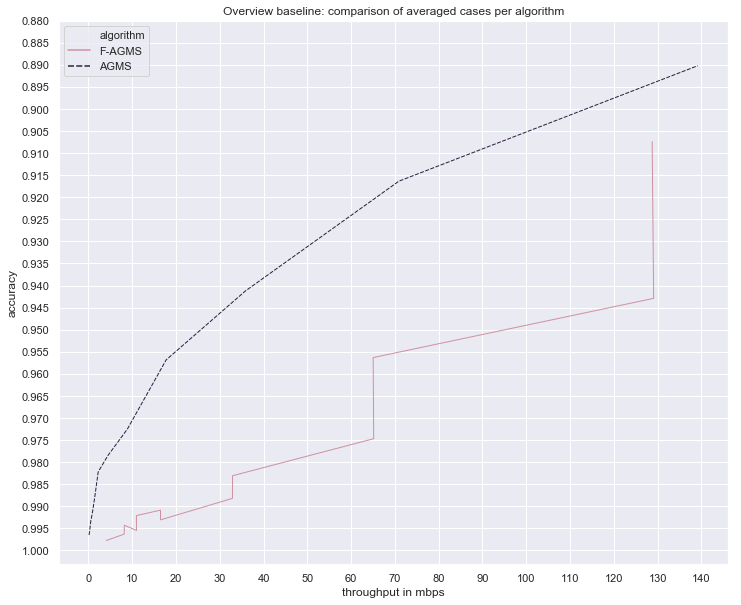

In [45]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 1
alg_cnt = 1
dist_cnt = 1
offset = case_cnt*runs_cnt*dist_cnt
# case_ind = np.tile([13,12,11,10,9,8,7,6,5,4,3,2,1], dist_cnt)
case_ind = np.tile([1,2,3,4,5,6,7,8,9,10,11,12,13], dist_cnt)
case_ind = np.repeat(case_ind, runs_cnt)
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], dist_cnt)
cases = np.repeat(cases, runs_cnt)
algs1 = np.repeat(['F-AGMS'], offset)
algs2 = np.repeat(['AGMS'], offset)
thrput = np.array([4.08393, 4.09475, 4.09415, 4.076, 4.09688, 4.09432, 4.10013, 4.05965, 4.09803, 4.09355, 4.09727, 4.02154, 4.08055, 4.0824, 4.07401, 4.05497, 4.08387, 4.08074, 4.07988, 4.01559, 4.06165, 4.08518, 4.08187, 4.07334, 4.0934, 4.0848, 4.08546, 4.08628, 4.08674, 4.08955, 4.08597, 4.09538, 8.22393, 8.21735, 8.22725, 8.16165, 8.18294, 8.20939, 8.20497, 8.20755, 8.21346, 8.20877, 8.21574, 8.17748, 8.19749, 8.21245, 8.20229, 8.18204, 8.21199, 8.18741, 8.1781, 8.18098, 8.22149, 8.1954, 8.20594, 8.20828, 8.21411, 8.21342, 8.19445, 8.14641, 8.13753, 8.20438, 8.21596, 8.20534, 8.23464, 8.23722, 8.14201, 8.21316, 8.22798, 8.2331, 8.23548, 8.20688, 8.22814, 8.20147, 8.23225, 8.19952, 8.2495, 8.23953, 8.24092, 8.23492, 8.24461, 8.23121, 8.11754, 8.24828, 8.24506, 8.22958, 8.24019, 8.24546, 8.24649, 8.18042, 8.15669, 8.22172, 8.24819, 8.21572, 8.23833, 8.25237, 11.0246, 10.9984, 10.9992, 11.0233, 10.9783, 10.9854, 11.0069, 10.9792, 11.0229, 11.0108, 11.0221, 10.9831, 10.7025, 11.0301, 10.9615, 11.0235, 11.008, 11.0137, 10.9848, 10.9707, 10.9769, 10.9734, 10.9491, 10.9798, 10.9228, 11.0152, 11.0286, 11.0284, 11.0112, 11.0041, 11.0255, 11.0329, 11.0208, 10.7613, 11.025, 11.0226, 11.0217, 11.0299, 11.0289, 10.9938, 11.0006, 10.9873, 10.9023, 10.8157, 11.0329, 11.0191, 11.0144, 11.0274, 11.0157, 11.0317, 11.0259, 11.031, 10.9824, 10.7867, 10.817, 11.0155, 11.0173, 11.029, 11.0029, 11.0121, 11.0353, 11.0167, 11.029, 10.9471, 16.2819, 16.4691, 16.5324, 16.4963, 16.4872, 16.5056, 16.5135, 16.4789, 16.5422, 16.4425, 16.5138, 16.4927, 16.4297, 16.5248, 16.4522, 16.0786, 16.4036, 16.4026, 16.5015, 16.5299, 16.5166, 16.4148, 16.5107, 16.5109, 16.4858, 16.4788, 16.5292, 16.5358, 16.5109, 16.3395, 16.1772, 16.2378, 16.5434, 16.4982, 16.5096, 16.5294, 16.4937, 16.5171, 16.5055, 16.4403, 16.514, 16.5097, 16.4683, 16.534, 16.4955, 16.1674, 16.278, 16.4506, 16.5394, 16.4871, 16.4713, 16.5282, 16.512, 16.4996, 16.5448, 16.5048, 16.4896, 16.5336, 16.4868, 16.501, 16.3835, 16.1385, 15.884, 16.1628, 32.9428, 33.0126, 33.0206, 32.9707, 32.9219, 32.9882, 32.9684, 32.9844, 32.9808, 32.936, 32.9797, 32.9263, 33.0069, 32.8272, 32.8398, 32.8447, 32.9031, 32.6649, 32.9706, 33.0018, 32.8729, 32.9715, 33.0156, 32.742, 32.9454, 32.9051, 31.4555, 32.1495, 32.9411, 32.9673, 32.9444, 32.9523, 32.9673, 32.9815, 33.0108, 32.9806, 32.6536, 32.9903, 32.8721, 33.0224, 33.0084, 32.8704, 32.8597, 32.9798, 32.9775, 33.0222, 32.9827, 33.0113, 32.9933, 32.9916, 33.006, 33.0036, 32.8992, 33.0044, 32.7578, 32.991, 32.8412, 31.2894, 32.1278, 32.4207, 33.0043, 32.9865, 32.9813, 32.8962, 64.5073, 64.5519, 64.4006, 64.5975, 64.4992, 64.5835, 64.565, 64.5845, 64.6364, 64.1211, 64.632, 64.548, 64.4415, 64.5737, 64.6673, 64.4639, 64.5584, 64.3384, 64.6418, 64.4865, 64.3238, 64.3796, 64.5004, 64.4902, 64.5508, 64.4815, 64.5071, 64.5399, 64.5926, 64.5881, 64.0202, 64.5411, 64.505, 64.442, 64.4575, 64.5295, 64.5723, 64.3342, 64.632, 64.475, 64.2916, 62.5969, 64.2251, 64.3643, 64.5584, 64.4039, 62.0747, 61.4022, 62.9673, 62.2453, 63.2141, 63.6966, 64.4972, 64.5254, 64.5693, 64.4902, 64.5514, 64.4172, 64.4306, 64.3447, 64.4415, 64.0411, 64.2822, 64.5199, 129.621, 129.156, 129.579, 129.563, 129.63, 129.597, 129.748, 129.437, 129.377, 129.754, 129.502, 129.279, 129.564, 129.466, 129.217, 129.513, 129.453, 128.345, 129.329, 129.607, 129.125, 129.646, 129.693, 129.628, 129.486, 129.54, 129.213, 129.533, 129.516, 129.611, 129.654, 129.566, 129.626, 129.251, 129.849, 129.538, 128.034, 129.229, 128.88, 129.126, 129.49, 129.651, 129.636, 129.566, 129.421, 129.235, 129.843, 129.693, 129.58, 129.544, 129.71, 129.723, 129.232, 129.395, 129.867, 129.745, 129.351, 129.698, 129.265, 129.151, 129.104, 129.646, 129.888, 129.769,
                  4.05304, 4.08932, 4.09445, 4.08978, 4.07683, 4.09197, 4.08758, 4.09422, 4.04875, 4.08881, 4.09325, 4.09565, 4.08341, 4.07761, 4.08844, 4.09321, 4.09058, 4.0925, 4.09584, 4.0948, 4.08178, 4.08593, 4.09496, 4.08267, 4.08626, 4.08461, 4.09063, 4.04334, 4.08288, 4.07943, 4.09615, 4.088, 8.20717, 8.20016, 8.17092, 8.20507, 8.20502, 8.2064, 8.1731, 8.19567, 8.20774, 8.17948, 8.19605, 8.20677, 8.21408, 8.20285, 8.20516, 8.1958, 8.21234, 8.17961, 8.20788, 8.19087, 8.21007, 8.1351, 8.1848, 8.20604, 8.21354, 8.18228, 8.20792, 8.20507, 8.21893, 8.21049, 8.20984, 8.19326, 8.23464, 8.21373, 8.232, 8.18328, 8.19429, 8.14308, 8.15326, 8.23349, 8.23148, 8.20362, 8.21154, 8.21734, 8.1127, 8.22339, 8.22591, 8.22771, 8.23311, 8.22289, 8.22588, 7.92255, 8.14971, 8.22397, 8.22458, 8.22539, 8.22964, 8.21046, 8.22915, 8.22006, 8.11418, 8.22015, 8.22135, 8.2237, 10.9747, 10.9913, 11.0117, 10.9983, 10.9594, 10.8481, 10.9954, 10.9929, 11.0132, 11.0152, 11.0104, 10.9943, 10.999, 11.0174, 10.9811, 10.9705, 11.0069, 11.0055, 10.9894, 11.0084, 11.011, 10.9726, 11.0165, 10.9772, 11.0022, 10.8142, 10.987, 11.0006, 11.0084, 10.9991, 10.9675, 10.9953, 10.7659, 10.9934, 10.9846, 10.8323, 10.7154, 10.8783, 11.0163, 11.0095, 11.0082, 11.0009, 11.0131, 10.9995, 11.0025, 11.0046, 10.7696, 11.0083, 10.9679, 11.0259, 11.0279, 10.9973, 11.0192, 11.0169, 11.003, 10.9908, 10.8786, 11.0122, 11.0158, 11.0099, 11.0274, 10.9783, 11.0038, 11.0045, 16.5064, 16.4681, 16.4413, 16.4279, 16.251, 16.5005, 16.4639, 16.4908, 16.4906, 16.4549, 16.5016, 16.5222, 16.5335, 16.4984, 16.5019, 16.5428, 16.5444, 16.5204, 16.5088, 16.5014, 16.5133, 16.5368, 16.5077, 16.5346, 16.5371, 16.5149, 16.5289, 16.5205, 16.5149, 16.5305, 16.5054, 16.5403, 16.5188, 16.476, 16.5086, 16.3533, 16.5199, 16.4978, 16.5102, 16.5128, 16.5182, 16.4749, 16.5158, 16.5149, 16.4784, 16.4714, 16.5027, 16.4979, 16.5143, 16.4182, 16.4732, 16.5152, 16.4925, 16.4998, 16.5007, 16.4564, 16.5202, 16.5099, 16.505, 16.5043, 16.5039, 16.5072, 16.519, 16.509, 33.0782, 32.4441, 33.0165, 32.5059, 32.2763, 30.7601, 32.5309, 33.0824, 33.0567, 32.8272, 32.8651, 32.9912, 33.0384, 33.0767, 32.9252, 33.0013, 33.0539, 33.0347, 33.0919, 33.0421, 32.7939, 33.0733, 33.0355, 33.0368, 33.0777, 32.8014, 33.0874, 32.819, 32.9047, 33.0719, 33.0662, 32.8947, 32.6166, 33.0588, 32.5485, 32.4811, 32.6703, 33.0476, 33.0191, 33.0115, 33.0716, 33.0163, 33.0163, 33.0522, 33.0592, 33.0504, 33.0324, 32.9364, 33.0543, 33.0639, 33.0601, 32.9776, 32.8656, 33.004, 33.0667, 33.0516, 33.0335, 32.9842, 33.0412, 33.0694, 33.0087, 33.0568, 32.8497, 32.4316, 65.7616, 65.6484, 64.7603, 65.6551, 65.7292, 65.4632, 64.2417, 64.8869, 65.6586, 65.4356, 65.6863, 65.6401, 65.6961, 65.7268, 65.6382, 65.6002, 65.5824, 65.3932, 65.7007, 65.4117, 65.404, 65.7202, 65.7124, 65.6665, 65.7559, 65.6321, 65.6478, 65.6298, 65.6986, 65.638, 65.0904, 65.6997, 65.7679, 65.5188, 65.6714, 65.6495, 65.6753, 65.6342, 65.7389, 65.5785, 65.6524, 64.8983, 65.5726, 65.6449, 65.6405, 65.6263, 65.7007, 65.5956, 65.6072, 65.6474, 65.6556, 65.6936, 65.3905, 65.6827, 65.6482, 65.6888, 65.6113, 65.7575, 65.0899, 64.3365, 64.454, 64.4708, 63.779, 65.4229, 121.839, 129.388, 129.854, 129.686, 129.787, 129.74, 129.747, 129.372, 129.498, 129.93, 130.12, 129.693, 129.71, 129.474, 129.335, 129.842, 129.769, 129.557, 129.094, 129.637, 129.008, 129.706, 129.786, 129.946, 129.655, 129.698, 129.57, 129.765, 129.69, 129.699, 129.579, 129.679, 129.184, 129.687, 129.907, 129.738, 129.892, 129.626, 129.798, 128.925, 128.969, 129.568, 130.058, 129.578, 129.819, 129.851, 129.743, 129.671, 129.741, 129.541, 129.711, 128.001, 129.863, 129.555, 129.928, 129.499, 129.963, 129.56, 129.642, 129.458, 127.719, 127.19, 129.822, 129.27,
                  4.05225, 4.05364, 4.05341, 4.04512, 4.06092, 4.06995, 4.08182, 4.07086, 4.08145, 4.06931, 4.07005, 4.06428, 4.09483, 4.08286, 4.09601, 4.09561, 4.0918, 4.0742, 4.09698, 4.0881, 4.04391, 4.00041, 4.09672, 4.0956, 4.05192, 4.09374, 4.09477, 4.09637, 4.08468, 4.09616, 4.0995, 4.05175, 8.13829, 7.98908, 8.13809, 8.13878, 8.10984, 8.12911, 8.14113, 8.1302, 8.13349, 8.13674, 8.12641, 8.14531, 8.13183, 8.15826, 8.13564, 8.11248, 8.12979, 8.11653, 8.1574, 8.12821, 8.14656, 8.14946, 8.12527, 8.15503, 8.13659, 8.1493, 8.12523, 8.05237, 8.142, 8.13605, 8.14907, 8.1339, 8.19209, 8.19969, 8.20485, 8.21139, 8.24291, 8.2343, 8.22907, 8.235, 8.2148, 8.21418, 8.1957, 8.20753, 8.21003, 8.2125, 8.1928, 8.14295, 8.20503, 8.21733, 8.20618, 8.21348, 8.21479, 8.20196, 8.2063, 8.20173, 8.21775, 8.14011, 8.23627, 8.22499, 8.23898, 8.23126, 8.09672, 8.2031, 10.9182, 11.0166, 10.9809, 11.017, 11.0202, 10.9863, 11.0242, 11.0047, 11.0121, 11.0006, 10.9983, 10.9933, 10.9371, 10.9892, 10.9815, 10.9908, 10.9737, 10.9289, 10.9857, 10.9552, 10.9563, 10.9653, 10.8819, 10.7653, 10.9391, 10.9751, 10.9673, 10.9369, 10.9634, 10.9823, 10.9632, 10.9844, 10.9085, 10.7611, 10.7597, 10.9604, 10.9959, 10.988, 10.8844, 10.9754, 10.9734, 10.9879, 11.0051, 10.9855, 10.9777, 10.995, 10.99, 10.995, 10.9055, 11.0025, 10.9633, 10.9988, 10.9951, 10.8401, 10.7752, 10.9875, 11.0028, 10.9939, 10.9543, 10.9809, 10.9672, 10.9924, 10.9904, 10.9065, 16.3967, 16.5035, 16.5187, 16.4988, 16.4998, 16.4949, 16.5002, 16.509, 16.4612, 16.5329, 16.4851, 16.4391, 16.4832, 16.1938, 16.1685, 16.4502, 16.4854, 16.5155, 16.5002, 16.4443, 16.5208, 16.5021, 16.3938, 16.2768, 16.4936, 16.4873, 16.4748, 16.4621, 16.5021, 16.5033, 16.467, 16.4824, 16.4694, 16.5058, 16.5051, 16.473, 16.5091, 16.5009, 16.4393, 16.4988, 16.4948, 16.4636, 16.4859, 16.4651, 16.4981, 16.3992, 16.4446, 16.5148, 16.4865, 16.4926, 16.4773, 16.2723, 16.4027, 16.5444, 16.4816, 16.5609, 16.5549, 16.5293, 16.5604, 16.5575, 16.56, 16.5599, 16.5436, 16.565, 32.7626, 33.0384, 32.84, 32.9915, 33.0214, 33.0266, 33.0703, 32.7009, 33.0222, 33.0617, 32.9998, 33.0083, 33.0566, 32.967, 33.0274, 33.0038, 33.0342, 33.0634, 32.9262, 32.9636, 33.0714, 33.0513, 33.0437, 33.0589, 32.9808, 33.0679, 33.0321, 32.965, 33.0112, 32.882, 32.9983, 33.059, 33.0415, 33.077, 32.9974, 33.0422, 33.0365, 33.0398, 32.7597, 32.4411, 32.7353, 32.0665, 32.7679, 33.0223, 33.0304, 32.9456, 33.0234, 33.0006, 33.0215, 33.0357, 33.0585, 32.985, 33.0579, 33.0364, 33.0553, 33.0749, 32.9927, 33.0251, 32.7361, 32.8797, 33.0576, 33.0086, 33.0397, 33.0815, 65.5867, 65.7822, 65.5577, 65.5287, 65.6117, 65.6664, 64.9801, 65.7192, 65.6005, 65.6019, 65.327, 65.3801, 65.6444, 65.702, 65.6843, 65.669, 63.4582, 64.1242, 64.9413, 65.5818, 65.7398, 65.6066, 65.6598, 65.722, 65.6519, 65.5808, 65.6864, 65.6431, 65.4399, 65.6591, 65.6489, 65.5579, 65.6872, 65.6636, 65.8322, 65.6006, 65.8506, 65.6882, 65.3539, 65.7211, 65.7662, 65.7209, 65.6289, 65.7306, 65.6993, 65.672, 65.7391, 65.6037, 65.7312, 65.3263, 65.4554, 65.6559, 65.5815, 65.6982, 65.7013, 65.6921, 65.7506, 65.6984, 65.7671, 65.7058, 64.8831, 65.8059, 65.7183, 65.6694, 128.97, 128.812, 128.8, 128.759, 129.099, 128.744, 129.144, 128.969, 128.947, 128.953, 128.918, 128.491, 128.833, 128.066, 128.873, 129.201, 126.732, 128.3, 128.606, 129.16, 128.669, 128.732, 128.841, 128.819, 128.53, 128.711, 127.22, 126.805, 126.425, 126.557, 126.792, 128.863, 120.596, 128.145, 124.493, 128.764, 126.171, 128.861, 126.69, 128.792, 126.247, 128.956, 126.361, 128.645, 126.438, 129.001, 126.602, 128.851, 126.37, 129.2, 126.522, 128.989, 125.875, 128.882, 126.276, 128, 126.312, 129.062, 126.299, 128.815, 126.352, 128.986, 126.936, 128.739])
acc = np.array([0.999998, 0.999995, 0.999996, 0.999997, 0.999996, 0.999993, 0.999996, 0.999996, 0.999995, 0.999997, 0.999998, 1, 0.999998, 0.999995, 1, 0.999998, 0.999994, 0.999989, 0.999995, 0.999992, 0.999997, 0.999999, 0.999999, 0.999995, 0.99999, 0.999998, 0.999995, 0.999998, 1, 0.999996, 1, 0.999998, 0.999982, 0.999993, 0.999994, 0.999996, 0.999995, 0.999993, 0.999999, 0.999999, 1, 0.999993, 0.999997, 0.999998, 0.999995, 0.999997, 0.999989, 0.999997, 0.999998, 0.999998, 0.999996, 1, 0.999996, 0.999993, 0.999999, 0.999996, 0.99999, 0.999995, 0.999997, 0.999999, 0.999994, 0.99999, 0.999991, 0.999997, 0.999978, 0.999948, 0.999953, 0.999981, 0.999978, 0.999987, 0.999981, 0.999961, 0.999978, 0.999989, 0.999981, 0.999999, 0.999934, 1, 0.999981, 0.999993, 0.999952, 0.999975, 0.999991, 0.999996, 0.99996, 0.999967, 0.999977, 0.99994, 0.999986, 0.999991, 0.999955, 0.99999, 0.999975, 0.999978, 0.999994, 0.999954, 0.999988, 0.999999, 0.999995, 0.999969, 0.999966, 0.999936, 0.999969, 1, 1, 0.999966, 0.999964, 0.999995, 0.99999, 0.99998, 0.999997, 0.999994, 0.999993, 0.999992, 0.99999, 0.999985, 0.999986, 0.999975, 0.999971, 0.999994, 0.999964, 0.999968, 0.999985, 0.999986, 0.999965, 0.999986, 0.999982, 0.999971, 0.99997, 0.999927, 0.999856, 0.999828, 0.999881, 0.999852, 0.999998, 0.999967, 0.999712, 0.999883, 0.999658, 0.99983, 0.999995, 0.999719, 0.999921, 0.999883, 0.999886, 0.999982, 0.999947, 0.999907, 0.999732, 0.999993, 0.999947, 0.999938, 0.999979, 0.999994, 0.99978, 0.999706, 0.999876, 0.999872, 0.999896, 0.999669, 0.999972, 0.999865, 0.999826, 0.999854, 0.999997, 0.999983, 0.999835, 0.999992, 0.99984, 0.999792, 0.999981, 0.99996, 0.999782, 0.999683, 0.999909, 0.999987, 0.999769, 0.999924, 0.999776, 0.999909, 0.99999, 0.999946, 0.999834, 0.999898, 0.999805, 0.999817, 0.999903, 0.999704, 0.999617, 0.999987, 0.999954, 0.999762, 0.999836, 0.99996, 0.999983, 0.99978, 0.999967, 0.999964, 0.999861, 0.999966, 0.999987, 0.999927, 0.99987, 0.999953, 0.999994, 0.999494, 0.999964, 0.999928, 0.999731, 0.999974, 0.999882, 0.999963, 0.999984, 0.999812, 0.999846, 0.999813, 0.999884, 0.999783, 0.999892, 0.999996, 0.999821, 0.999908, 0.999681, 0.999893, 0.999733, 0.999773, 0.999944, 0.999924, 0.999713, 0.999983, 0.99989, 0.999925, 0.999868, 0.99994, 0.999821, 0.999842, 0.999714, 0.999755, 0.999823, 0.999985, 0.999912, 0.999988, 0.999787, 0.999972, 0.999792, 0.999753, 0.999952, 0.999756, 0.999908, 0.999737, 0.99991, 0.999862, 0.99992, 0.999655, 0.999927, 0.999711, 0.999103, 0.999478, 0.999666, 0.99975, 0.999112, 0.998366, 0.999731, 0.999812, 0.999596, 0.999725, 0.999949, 0.99973, 0.99936, 0.999575, 0.999714, 0.999623, 0.999766, 0.999697, 0.998925, 0.99762, 0.999099, 0.999148, 0.998397, 0.999554, 0.998709, 0.999415, 0.999706, 0.99947, 0.99868, 0.998446, 0.999996, 0.999449, 0.999428, 0.999315, 0.999167, 0.998843, 0.997582, 0.999184, 0.999683, 0.999289, 0.998375, 0.9982, 0.999904, 0.998531, 0.999243, 0.998917, 0.997663, 0.999678, 0.999575, 0.998948, 0.999163, 0.999738, 0.997679, 0.999224, 0.996939, 0.999919, 0.999134, 0.999743, 0.999332, 0.999872, 0.99902, 0.997317, 0.999974, 0.999859, 0.996876, 0.975713, 0.997092, 0.99938, 0.997184, 0.996175, 0.998862, 0.999616, 0.997473, 0.996875, 0.996855, 0.994788, 0.997797, 0.994922, 0.982084, 0.991712, 0.999089, 0.990772, 0.998625, 0.989495, 0.998043, 0.998559, 0.997157, 0.999382, 0.997182, 0.997832, 0.999083, 0.992541, 0.993209, 0.996246, 0.986688, 0.998851, 0.990702, 0.994702, 0.989034, 0.997949, 0.997756, 0.981411, 0.994285, 0.994222, 0.984285, 0.990389, 0.993083, 0.999333, 0.997256, 0.999817, 0.983118, 0.988648, 0.989807, 0.985307, 0.998159, 0.979922, 0.963466, 0.977665, 0.978871, 0.999458, 0.99048, 0.989765, 0.990431, 0.988254, 0.998744, 0.990596, 0.984464, 0.993713, 0.998618, 0.992656, 0.958943, 0.970645, 0.952241, 0.963752, 0.977124, 0.991458, 0.977775, 0.995102, 0.99888, 0.981736, 0.985634, 0.999412, 0.943633, 0.994662, 0.987015, 0.921951, 0.988219, 0.992242, 0.985658, 0.993993, 0.973125, 0.988744, 0.981542, 0.997868, 0.988012, 0.994819, 0.959696, 0.946477, 0.979772, 0.992943,
               0.997835, 0.999535, 0.998596, 0.999529, 0.999212, 0.999282, 0.999338, 0.999967, 0.99813, 0.998444, 0.999491, 0.998345, 0.998127, 0.999494, 0.997855, 0.998916, 0.998648, 0.998808, 0.998585, 0.999169, 0.998545, 0.999778, 0.998897, 0.999957, 0.998086, 0.998989, 0.999719, 0.999324, 0.997708, 0.999274, 0.999967, 0.99933, 0.998982, 0.999909, 0.999847, 0.999224, 0.999751, 0.997353, 0.998746, 0.999143, 0.998991, 0.998471, 0.998711, 0.996617, 0.998718, 0.999295, 0.996873, 0.998969, 0.999296, 0.998735, 0.999328, 0.997951, 0.998704, 0.999543, 0.999131, 0.999605, 0.998192, 0.998659, 0.997752, 0.999458, 0.999867, 0.997915, 0.998526, 0.997137, 0.996205, 0.995133, 0.996771, 0.999151, 0.996939, 0.999022, 0.998828, 0.999264, 0.99821, 0.995186, 0.997136, 0.999846, 0.997317, 0.99752, 0.99504, 0.997956, 0.998911, 0.999254, 0.998308, 0.998815, 0.999406, 0.995588, 0.997558, 0.998852, 0.999763, 0.997328, 0.999924, 0.995862, 0.997751, 0.998691, 0.996564, 0.998415, 0.9949, 0.997996, 0.998003, 0.998797, 0.998073, 0.997051, 0.997634, 0.997054, 0.999277, 0.998757, 0.995072, 0.998691, 0.999316, 0.9991, 0.998307, 0.999473, 0.997915, 0.999167, 0.999015, 0.996772, 0.99885, 0.9994, 0.99797, 0.997962, 0.999653, 0.995844, 0.998644, 0.997017, 0.999468, 0.999143, 0.99759, 0.998702, 0.995681, 0.997516, 0.996047, 0.9957, 0.999701, 0.999862, 0.993094, 0.99658, 0.995686, 0.997974, 0.999848, 0.995576, 0.997312, 0.998376, 0.997938, 0.996971, 0.99691, 0.995694, 0.998874, 0.987554, 0.99362, 0.99659, 0.995155, 0.999494, 0.996334, 0.989104, 0.992225, 0.998973, 0.986972, 0.991599, 0.99808, 0.994974, 0.995751, 0.996841, 0.99424, 0.998537, 0.993237, 0.996096, 0.995286, 0.999336, 0.996583, 0.999949, 0.995158, 0.996161, 0.991928, 0.992642, 0.99374, 0.995557, 0.986912, 0.992968, 0.996072, 0.996971, 0.999752, 0.991564, 0.996827, 0.989478, 0.989767, 0.999765, 0.999822, 0.992684, 0.990413, 0.998345, 0.997546, 0.995042, 0.998077, 0.994853, 0.9986, 0.998596, 0.996424, 0.997007, 0.998665, 0.99142, 0.999315, 0.993002, 0.996562, 0.981986, 0.998336, 0.999846, 0.99486, 0.998054, 0.997054, 0.991728, 0.990175, 0.997008, 0.99575, 0.996402, 0.998819, 0.997268, 0.999618, 0.997818, 0.997368, 0.997616, 0.999206, 0.990193, 0.996698, 0.993569, 0.990703, 0.992202, 0.982494, 0.999148, 0.99211, 0.998811, 0.966779, 0.994136, 0.993168, 0.991486, 0.999091, 0.99212, 0.990277, 0.994327, 0.99053, 0.994151, 0.995278, 0.999295, 0.992323, 0.994318, 0.996731, 0.996584, 0.986119, 0.998574, 0.985907, 0.990569, 0.992933, 0.989492, 0.999606, 0.994606, 0.993308, 0.99491, 0.993899, 0.986354, 0.982138, 0.97869, 0.992957, 0.995051, 0.999873, 0.993826, 0.987248, 0.995851, 0.993004, 0.990737, 0.983809, 0.99395, 0.977953, 0.99617, 0.996387, 0.983245, 0.976199, 0.999678, 0.9814, 0.998043, 0.99829, 0.973667, 0.987216, 0.983209, 0.997612, 0.970756, 0.982313, 0.997191, 0.978098, 0.996318, 0.980055, 0.991286, 0.986925, 0.984074, 0.998375, 0.980521, 0.999263, 0.993274, 0.988712, 0.989563, 0.990041, 0.977792, 0.990739, 0.948065, 0.986655, 0.994137, 0.992795, 0.998601, 0.9718, 0.987794, 0.977035, 0.975097, 0.986256, 0.995868, 0.956687, 0.994709, 0.964039, 0.994636, 0.962924, 0.98432, 0.988416, 0.999053, 0.963019, 0.995027, 0.976449, 0.988114, 0.995139, 0.968284, 0.98051, 0.949549, 0.945262, 0.96505, 0.98296, 0.989149, 0.983644, 0.971707, 0.945846, 0.970038, 0.991956, 0.977873, 0.972788, 0.930644, 0.93254, 0.913479, 0.93941, 0.951923, 0.997933, 0.994685, 0.97269, 0.991641, 0.989454, 0.987217, 0.964341, 0.991603, 0.954836, 0.970864, 0.939986, 0.895933, 0.952898, 0.926469, 0.965715, 0.978672, 0.997508, 0.981422, 0.9467, 0.918306, 0.996432, 0.958494, 0.995222, 0.98117, 0.988392, 0.987395, 0.952519, 0.958526, 0.967358, 0.986627, 0.991813, 0.94793, 0.972257, 0.961628, 0.966573, 0.932688, 0.995078, 0.998206, 0.978955, 0.958628, 0.949186, 0.953938, 0.899324, 0.973607, 0.97298, 0.998792, 0.967031, 0.888041, 0.958834, 0.948472, 0.843292, 0.945116, 0.862687, 0.848959, 0.980487, 0.980189, 0.961085, 0.88959, 0.944568, 0.868313, 0.967442, 0.945546, 0.876954, 0.907355, 0.97517, 0.967738, 0.964441, 0.915078, 0.88452, 0.94478, 0.983297, 0.654759,
               0.991924, 0.991921, 0.997497, 0.990975, 0.999103, 0.991365, 0.994345, 0.995623, 0.999286, 0.999409, 0.987657, 0.994905, 0.997533, 0.996509, 0.999678, 0.997615, 0.991125, 0.990048, 0.996936, 0.987599, 0.990045, 0.989585, 0.994584, 0.990012, 0.987637, 0.995721, 0.994053, 0.997922, 0.997599, 0.997681, 0.99506, 0.99522, 0.995933, 0.995385, 0.994786, 0.988634, 0.995711, 0.994423, 0.988998, 0.997405, 0.992256, 0.995545, 0.996517, 0.984261, 0.982791, 0.993181, 0.995215, 0.972231, 0.985282, 0.987878, 0.989057, 0.986916, 0.99076, 0.995408, 0.992277, 0.989685, 0.996101, 0.980214, 0.992223, 0.993574, 0.978591, 0.984885, 0.989175, 0.989229, 0.994874, 0.997611, 0.987428, 0.988697, 0.98015, 0.989301, 0.98205, 0.992499, 0.98362, 0.989082, 0.987293, 0.976908, 0.995152, 0.989946, 0.979825, 0.98707, 0.979824, 0.999562, 0.981025, 0.98152, 0.984184, 0.970778, 0.960864, 0.991652, 0.977732, 0.99366, 0.975037, 0.98173, 0.976327, 0.987672, 0.995263, 0.982638, 0.998738, 0.992584, 0.994534, 0.993035, 0.979947, 0.98806, 0.980824, 0.964203, 0.981692, 0.988707, 0.986284, 0.999326, 0.99314, 0.989734, 0.995422, 0.99997, 0.986994, 0.98638, 0.981833, 0.989168, 0.993508, 0.976504, 0.996295, 0.999117, 0.998947, 0.999748, 0.971456, 0.99067, 0.983932, 0.982172, 0.984664, 0.975513, 0.965727, 0.988291, 0.96237, 0.97015, 0.991784, 0.999953, 0.975077, 0.968896, 0.991742, 0.986326, 0.95972, 0.98591, 0.995173, 0.998653, 0.968501, 0.991352, 0.985188, 0.956187, 0.984482, 0.959329, 0.970775, 0.993264, 0.97536, 0.989213, 0.984932, 0.99452, 0.968072, 0.999044, 0.996573, 0.987283, 0.94352, 0.992021, 0.993373, 0.967297, 0.987076, 0.998381, 0.969346, 0.984754, 0.988509, 0.947783, 0.978909, 0.98492, 0.997677, 0.982123, 0.98454, 0.978022, 0.984779, 0.938928, 0.990961, 0.976227, 0.983597, 0.975873, 0.97141, 0.974116, 0.98844, 0.977689, 0.992975, 0.989525, 0.990453, 0.958705, 0.934988, 0.979809, 0.985755, 0.944866, 0.997745, 0.981404, 0.972892, 0.991199, 0.972392, 0.99005, 0.981857, 0.978672, 0.989397, 0.997536, 0.981398, 0.98885, 0.99426, 0.972679, 0.995264, 0.985326, 0.932546, 0.957468, 0.998623, 0.9714, 0.995921, 0.965345, 0.998794, 0.989637, 0.97924, 0.982467, 0.983838, 0.990228, 0.981361, 0.989795, 0.981772, 0.996159, 0.971912, 0.969829, 0.920564, 0.998969, 0.958554, 0.986009, 0.966055, 0.997127, 0.969692, 0.958493, 0.984288, 0.977438, 0.945208, 0.987486, 0.993152, 0.919808, 0.990293, 0.987532, 0.978769, 0.991423, 0.936889, 0.999397, 0.977064, 0.968622, 0.971588, 0.995087, 0.951353, 0.958309, 0.986166, 0.992415, 0.962305, 0.957144, 0.99276, 0.957284, 0.968467, 0.987314, 0.936374, 0.979607, 0.993843, 0.85374, 0.930271, 0.948852, 0.993284, 0.951756, 0.989274, 0.953874, 0.976137, 0.943877, 0.951573, 0.994314, 0.925639, 0.961574, 0.985117, 0.990588, 0.969182, 0.897887, 0.95896, 0.938231, 0.963441, 0.987933, 0.995592, 0.996858, 0.958599, 0.923171, 0.913848, 0.979327, 0.954161, 0.932009, 0.991959, 0.946633, 0.938528, 0.97186, 0.966638, 0.93253, 0.923113, 0.99201, 0.933963, 0.889656, 0.98877, 0.930556, 0.939674, 0.965707, 0.974604, 0.976894, 0.932721, 0.961124, 0.902983, 0.876318, 0.894019, 0.873604, 0.882872, 0.947037, 0.921932, 0.948148, 0.912218, 0.995854, 0.958717, 0.895144, 0.793895, 0.889529, 0.825897, 0.902575, 0.860787, 0.783344, 0.854457, 0.985189, 0.947663, 0.982447, 0.929607, 0.978413, 0.963662, 0.911766, 0.887873, 0.913271, 0.926652, 0.868314, 0.88908, 0.874775, 0.966244, 0.929821, 0.87159, 0.725979, 0.997009, 0.78517, 0.933512, 0.899005, 0.976909, 0.980969, 0.895813, 0.946913, 0.945875, 0.760456, 0.78654, 0.912992, 0.877766, 0.70838, 0.924686, 0.770574, 0.986584, 0.888569, 0.759205, 0.915755, 0.915607, 0.979799, 0.886679, 0.903269, 0.769963, 0.948413, 0.888561, 0.950012, 0.950736, 0.705307, 0.892905, 0.942089, 0.919599, 0.949716, 0.770437, 0.820787, 0.68296, 0.980614, 0.589735, 0.967437, 0.794193, 0.660506, 0.847977, 0.866217, 0.920672, 0.777077, 0.810272, 0.869161, 0.87029, 0.969737, 0.988394, 0.765334, 0.632206, 0.782317, 0.901382, 0.732539, 0.76598, 0.991416, 0.848886, 0.946772, 0.454484, 0.855732, 0.755492, 0.795595, 0.870481, 0.835984, 0.789955, 0.750221, 0.830332, 0.895393])

thrput2 = np.array([0.138232, 0.139497, 0.139959, 0.139524, 0.139533, 0.139342, 0.139745, 0.13937, 0.139359, 0.139513, 0.13978, 0.139695, 0.139724, 0.139711, 0.139375, 0.139644, 0.139438, 0.139657, 0.139157, 0.139482, 0.139509, 0.139537, 0.139494, 0.139283, 0.139159, 0.139188, 0.139181, 0.13862, 0.138768, 0.138864, 0.139892, 0.14012, 0.278292, 0.278776, 0.278484, 0.277844, 0.278486, 0.279298, 0.279179, 0.27805, 0.279298, 0.276293, 0.278892, 0.279597, 0.279444, 0.27961, 0.279307, 0.27698, 0.277313, 0.277455, 0.277634, 0.278005, 0.277301, 0.277528, 0.276527, 0.277616, 0.276657, 0.2769, 0.277435, 0.277884, 0.277433, 0.278093, 0.276942, 0.276388, 0.557228, 0.557955, 0.55874, 0.558449, 0.556861, 0.555645, 0.556232, 0.55608, 0.558908, 0.556522, 0.554482, 0.554974, 0.554454, 0.554921, 0.555428, 0.555043, 0.554053, 0.553879, 0.554033, 0.55664, 0.558147, 0.557336, 0.555902, 0.556591, 0.557776, 0.556397, 0.556879, 0.558677, 0.559381, 0.555739, 0.556534, 0.556701, 0.745794, 0.744842, 0.745687, 0.746033, 0.743836, 0.745153, 0.744872, 0.745983, 0.744378, 0.742722, 0.74638, 0.74259, 0.74502, 0.744354, 0.744518, 0.743494, 0.744778, 0.744603, 0.74464, 0.745161, 0.744314, 0.745277, 0.744037, 0.743984, 0.74521, 0.740867, 0.740047, 0.741001, 0.743477, 0.742201, 0.745575, 0.745676, 0.991604, 0.994519, 0.995292, 0.99026, 0.994129, 0.994977, 0.996085, 0.994779, 0.992926, 0.987436, 0.992129, 0.99076, 0.993141, 0.991677, 0.991395, 0.992258, 0.990791, 0.991114, 0.992016, 0.991461, 0.993072, 0.991585, 0.990142, 0.990383, 0.991148, 0.993123, 0.99093, 0.991502, 0.988828, 0.990888, 0.989995, 0.991422, 1.48894, 1.4914, 1.48717, 1.48533, 1.4902, 1.48588, 1.48448, 1.48511, 1.48356, 1.48862, 1.48334, 1.48966, 1.4846, 1.47903, 1.48647, 1.48975, 1.48392, 1.48555, 1.49141, 1.48315, 1.48966, 1.48514, 1.4891, 1.48966, 1.4854, 1.49064, 1.48698, 1.48279, 1.48927, 1.49129, 1.48401, 1.48905, 2.23972, 2.23594, 2.24306, 2.24212, 2.24272, 2.23284, 2.2359, 2.22858, 2.23411, 2.23214, 2.23344, 2.23006, 2.23476, 2.23363, 2.22575, 2.23143, 2.23151, 2.23459, 2.2245, 2.23543, 2.21922, 2.23363, 2.22576, 2.21471, 2.22695, 2.23344, 2.21713, 2.22957, 2.23273, 2.24247, 2.23571, 2.2315, 4.38954, 4.43984, 4.46589, 4.47032, 4.45511, 4.45748, 4.44993, 4.47132, 4.46939, 4.46701, 4.46572, 4.46508, 4.46597, 4.46678, 4.42603, 4.47997, 4.47851, 4.48131, 4.4255, 4.46055, 4.46696, 4.46794, 4.40575, 4.39135, 4.3149, 4.441, 4.44666, 4.46083, 4.47156, 4.46295, 4.44656, 4.44261, 8.94502, 8.95166, 8.91236, 8.93419, 8.94407, 8.93138, 8.89979, 8.94098, 8.91729, 8.94133, 8.94406, 8.93542, 8.94122, 8.946, 8.88482, 8.93294, 8.90897, 8.9429, 8.94782, 8.95015, 8.94858, 8.94299, 8.91121, 8.915, 8.93383, 8.94468, 8.95305, 8.94401, 8.93916, 8.93713, 8.94723, 8.86315, 17.827, 17.8277, 17.721, 17.8415, 17.8303, 17.8012, 17.8494, 17.7409, 17.7947, 17.8138, 17.7559, 17.8115, 17.8078, 17.7984, 17.8028, 17.6591, 17.8023, 17.829, 17.7954, 17.7712, 17.8307, 17.8247, 17.7964, 17.8466, 17.8297, 17.8019, 17.8276, 17.8178, 17.8041, 17.8598, 17.7433, 17.78, 34.9682, 35.9436, 35.9893, 35.9817, 35.6733, 35.3393, 35.6291, 35.931, 35.883, 35.9864, 35.957, 35.6231, 35.5311, 35.9644, 36.0132, 36.0178, 35.8929, 36.0096, 35.9868, 36.0062, 35.9742, 35.9942, 35.8302, 36.0382, 35.9917, 35.9584, 35.9928, 35.8899, 35.8668, 35.9797, 35.9587, 35.9893, 71.2544, 71.3068, 71.2534, 68.4904, 69.5343, 71.2318, 71.2308, 71.2776, 71.2531, 71.1939, 71.2714, 71.2515, 71.2652, 71.3274, 71.1587, 70.6634, 71.1987, 71.2496, 71.222, 70.2007, 71.153, 71.227, 71.0948, 71.3073, 71.3202, 71.2881, 70.7889, 71.1386, 70.2214, 70.0549, 70.0337, 69.9764, 135.695, 137.963, 138.46, 139.948, 138.732, 140.028, 138.539, 140.117, 138.568, 140.023, 138.512, 139.955, 136.068, 140.024, 138.723, 140.313, 138.449, 140.13, 138.44, 140.166, 138.253, 140.34, 138.225, 139.814, 138.434, 140.252, 138.562, 140.172, 137.947, 139.992, 138.698, 140.228,
                    0.138233, 0.139562, 0.139351, 0.139248, 0.139263, 0.139216, 0.139197, 0.139099, 0.139123, 0.13924, 0.139438, 0.139509, 0.139573, 0.139453, 0.139751, 0.139489, 0.139537, 0.139525, 0.139469, 0.139594, 0.139825, 0.1397, 0.139764, 0.139914, 0.139649, 0.139093, 0.138966, 0.13943, 0.13933, 0.139563, 0.139701, 0.139515, 0.27728, 0.27774, 0.278373, 0.27783, 0.277029, 0.277592, 0.278034, 0.278243, 0.278081, 0.2776, 0.277813, 0.277709, 0.277823, 0.277796, 0.277586, 0.278195, 0.277687, 0.277709, 0.278181, 0.278065, 0.277736, 0.278833, 0.278468, 0.27923, 0.278822, 0.278279, 0.279144, 0.279197, 0.278306, 0.276339, 0.275979, 0.276234, 0.555662, 0.557604, 0.561668, 0.560236, 0.561068, 0.561724, 0.561425, 0.561074, 0.561874, 0.561323, 0.561648, 0.561515, 0.5619, 0.562011, 0.561944, 0.561319, 0.562308, 0.558322, 0.561043, 0.561932, 0.561676, 0.561586, 0.560319, 0.5613, 0.561315, 0.561931, 0.561179, 0.561766, 0.560765, 0.560323, 0.560559, 0.560901, 0.749038, 0.749074, 0.748692, 0.748969, 0.747154, 0.745352, 0.743265, 0.742284, 0.74251, 0.742237, 0.74392, 0.742602, 0.743156, 0.743226, 0.743698, 0.745474, 0.745683, 0.744806, 0.744235, 0.746484, 0.743644, 0.746508, 0.749051, 0.74655, 0.744388, 0.744475, 0.743832, 0.743033, 0.741718, 0.741989, 0.7447, 0.74402, 0.98995, 0.990582, 0.990492, 0.988809, 0.991993, 0.990165, 0.991282, 0.986697, 0.991666, 0.990449, 0.989906, 0.990158, 0.991591, 0.99107, 0.988996, 0.988176, 0.988505, 0.990886, 0.986621, 0.995073, 0.994846, 0.99146, 0.990005, 0.991561, 0.990475, 0.991561, 0.99125, 0.993631, 0.993949, 0.989184, 0.989541, 0.990443, 1.48, 1.48653, 1.48139, 1.48002, 1.48483, 1.4874, 1.48415, 1.48525, 1.48845, 1.48627, 1.48605, 1.4863, 1.48735, 1.47952, 1.48169, 1.48145, 1.48323, 1.4862, 1.47718, 1.4939, 1.48683, 1.48656, 1.49075, 1.48983, 1.48979, 1.49051, 1.4915, 1.48929, 1.49058, 1.49213, 1.49147, 1.49666, 2.24608, 2.24214, 2.24248, 2.2351, 2.24293, 2.23767, 2.24294, 2.23625, 2.24054, 2.24182, 2.24168, 2.19651, 2.23787, 2.2328, 2.23452, 2.23454, 2.23524, 2.23534, 2.23523, 2.23675, 2.23626, 2.23697, 2.22014, 2.2318, 2.23436, 2.2309, 2.23117, 2.23597, 2.22438, 2.22217, 2.22117, 2.22223, 4.43542, 4.43855, 4.43691, 4.44121, 4.43798, 4.41962, 4.43606, 4.43542, 4.43118, 4.4255, 4.43811, 4.4431, 4.43247, 4.40858, 4.43673, 4.4455, 4.43387, 4.4245, 4.44578, 4.45197, 4.4337, 4.42193, 4.40491, 4.42726, 4.43381, 4.42997, 4.43418, 4.43879, 4.43614, 4.43154, 4.41132, 4.43574, 8.88426, 8.83739, 8.88403, 8.87799, 8.81692, 8.88582, 8.89578, 8.86918, 8.88995, 8.91271, 8.91454, 8.90895, 8.85927, 8.77792, 8.8855, 8.90821, 8.9149, 8.88595, 8.88962, 8.90207, 8.89573, 8.82121, 8.9088, 8.86035, 8.90717, 8.92054, 8.86755, 8.90482, 8.89658, 8.83025, 8.78674, 8.89348, 17.659, 17.6993, 17.6329, 17.6768, 17.6909, 17.2622, 17.657, 17.6393, 17.6118, 17.6499, 17.5398, 17.6732, 17.4722, 17.6486, 17.6378, 17.6619, 17.4825, 17.5434, 17.6736, 17.6407, 17.6219, 17.6324, 17.5554, 17.5898, 17.6654, 17.6893, 17.6652, 17.5662, 17.2529, 17.3711, 17.635, 17.6446, 35.5707, 35.5656, 35.7477, 35.6469, 35.6288, 35.6505, 35.7603, 35.6841, 35.7383, 35.6875, 35.5185, 35.7615, 35.6412, 35.7218, 35.6087, 35.6399, 35.614, 35.6402, 35.7863, 35.6269, 35.7607, 35.6546, 34.9849, 34.6252, 35.6175, 35.7947, 35.6302, 35.5949, 35.6138, 35.6337, 35.7639, 35.6773, 70.6015, 70.4695, 70.2693, 70.429, 69.878, 70.2791, 70.3391, 70.6274, 70.2875, 70.6038, 70.7318, 70.4686, 70.2293, 70.4636, 70.6204, 69.6631, 70.6865, 70.5038, 70.5523, 70.2684, 70.5452, 70.7429, 70.2875, 70.5802, 70.4576, 70.4537, 69.9507, 69.1862, 70.4956, 70.346, 70.6046, 70.4889, 138.963, 138.693, 138.818, 139.581, 137.041, 139.758, 138.985, 138.839, 138.329, 139.16, 139.208, 139.446, 137.286, 138.778, 137.754, 139.646, 139.365, 138.662, 139.168, 139.34, 138.98, 138.255, 139.012, 139.532, 139.014, 139.764, 138.793, 139.206, 138.39, 139.183, 138.459, 139.661,
                    0.140417, 0.140389, 0.140191, 0.139805, 0.140231, 0.140245, 0.140134, 0.140287, 0.139333, 0.14027, 0.140262, 0.140281, 0.140256, 0.140327, 0.14029, 0.140276, 0.14029, 0.139801, 0.140308, 0.140286, 0.140103, 0.140146, 0.140216, 0.140219, 0.140128, 0.140186, 0.139822, 0.140048, 0.140308, 0.140239, 0.14013, 0.139948, 0.279757, 0.279248, 0.279624, 0.279718, 0.279761, 0.279706, 0.279702, 0.277933, 0.278657, 0.279739, 0.279611, 0.279503, 0.279532, 0.279766, 0.279532, 0.279747, 0.279744, 0.279519, 0.279323, 0.27952, 0.279689, 0.279507, 0.279208, 0.279673, 0.279775, 0.277915, 0.279761, 0.279757, 0.279753, 0.279258, 0.278711, 0.279737, 0.559063, 0.559054, 0.559146, 0.558984, 0.559079, 0.558473, 0.559109, 0.557153, 0.558424, 0.554991, 0.559089, 0.558981, 0.559067, 0.558826, 0.559086, 0.558921, 0.559068, 0.559055, 0.558918, 0.559034, 0.558115, 0.559062, 0.547984, 0.55904, 0.55901, 0.559065, 0.558691, 0.559085, 0.559103, 0.559073, 0.557182, 0.559106, 0.748635, 0.74854, 0.748576, 0.748527, 0.746418, 0.748573, 0.748481, 0.748588, 0.748592, 0.748558, 0.748537, 0.748579, 0.74854, 0.748559, 0.748476, 0.748472, 0.74853, 0.748483, 0.748275, 0.74854, 0.748569, 0.748302, 0.748603, 0.748238, 0.742867, 0.748615, 0.746809, 0.748568, 0.748572, 0.745025, 0.748551, 0.748583, 0.997602, 0.997854, 0.99797, 0.993713, 0.965482, 0.99791, 0.997982, 0.997943, 0.996398, 0.997847, 0.997952, 0.997938, 0.99163, 0.997819, 0.997925, 0.997524, 0.997925, 0.997875, 0.997786, 0.98977, 0.997861, 0.997883, 0.997867, 0.984937, 0.997901, 0.997879, 0.997807, 0.997432, 0.997815, 0.997917, 0.99788, 0.997961, 1.49817, 1.49795, 1.49818, 1.47136, 1.49607, 1.49822, 1.49815, 1.49816, 1.49793, 1.48369, 1.49819, 1.49819, 1.49824, 1.49821, 1.48891, 1.47862, 1.49819, 1.49824, 1.4981, 1.49824, 1.49735, 1.49822, 1.49798, 1.49817, 1.49816, 1.49825, 1.48379, 1.49813, 1.49814, 1.49792, 1.49818, 1.49677, 2.24368, 2.2437, 2.24419, 2.24425, 2.24385, 2.24418, 2.24379, 2.24419, 2.24282, 2.24411, 2.24428, 2.24356, 2.24427, 2.24359, 2.24424, 2.24355, 2.24412, 2.24377, 2.24355, 2.24398, 2.24362, 2.24429, 2.24348, 2.24416, 2.24407, 2.2431, 2.24406, 2.24365, 2.24404, 2.24367, 2.24411, 2.24421, 4.37718, 4.08422, 4.4052, 4.47391, 4.47263, 4.47211, 4.47228, 4.47454, 4.47232, 4.47271, 4.47418, 4.4726, 4.47251, 4.4724, 4.47436, 4.47227, 4.47264, 4.47467, 4.47239, 4.47249, 4.38556, 4.43448, 4.4727, 4.47258, 4.47502, 4.47238, 4.47262, 4.47259, 4.47456, 4.47286, 4.47232, 4.47486, 8.95264, 8.96082, 8.96114, 8.95234, 8.96174, 8.95216, 8.96152, 8.96097, 8.95291, 8.96023, 8.70688, 8.48165, 8.96181, 8.96086, 8.95314, 8.9617, 8.9524, 8.96064, 8.96116, 8.95271, 8.9607, 8.95978, 8.95315, 8.95925, 8.96131, 8.95406, 8.96111, 8.96125, 8.95308, 8.96183, 8.95224, 8.96271, 17.8898, 17.9141, 17.9212, 17.8641, 17.95, 17.9749, 17.949, 17.9437, 17.9357, 17.8736, 17.9311, 17.9097, 17.9681, 17.9412, 17.906, 17.9605, 17.9402, 17.9581, 17.8639, 17.8841, 17.8809, 17.9008, 17.907, 17.9272, 16.8337, 17.8203, 17.8997, 17.8807, 17.9165, 17.9108, 17.9631, 17.8787, 36.0792, 36.0827, 36.0795, 36.0743, 36.0688, 36.0758, 36.0643, 36.0738, 36.0659, 35.9563, 36.0604, 36.0747, 36.0738, 36.0838, 36.0754, 36.0799, 36.0742, 36.0664, 36.0778, 36.0794, 36.0759, 35.9305, 36.07, 36.0655, 36.0726, 36.0765, 36.0775, 36.0812, 36.0713, 36.0867, 36.0768, 36.0831, 71.4913, 71.0208, 71.4993, 71.5145, 71.518, 71.4965, 71.4831, 71.5227, 71.5149, 71.5175, 71.5193, 71.5078, 71.521, 71.5204, 71.4907, 71.487, 71.4811, 71.5268, 71.4909, 71.5317, 71.5112, 71.5327, 71.5316, 71.0051, 71.498, 71.5094, 71.5152, 71.5118, 71.523, 71.5069, 71.4999, 71.5045, 139.383, 139.843, 139.321, 139.772, 139.437, 139.69, 139.407, 139.739, 139.369, 139.763, 139.452, 139.739, 139.291, 139.813, 139.456, 139.799, 139.334, 139.766, 139.426, 139.675, 139.413, 139.86, 139.428, 139.859, 139.411, 139.674, 137.487, 139.857, 139.422, 139.772, 139.382, 139.807])
acc2 = np.array([0.996529, 0.999329, 0.996745, 0.998553, 0.997484, 0.996083, 0.998827, 0.99804, 0.998449, 0.999594, 0.997137, 0.999737, 0.996651, 0.998281, 0.999972, 0.996741, 0.998141, 0.998323, 0.99638, 0.999792, 0.999822, 0.996464, 0.998125, 0.998227, 0.998311, 0.999505, 0.993774, 0.997677, 0.998682, 0.999758, 0.997993, 0.998427, 0.999765, 0.997564, 0.999356, 0.999807, 0.99723, 0.996724, 0.995944, 0.999099, 0.997461, 0.996234, 0.999155, 0.996157, 0.999418, 0.99876, 0.998203, 0.999581, 0.990142, 0.998747, 0.999964, 0.999919, 0.999561, 0.99538, 0.99711, 0.998343, 0.995439, 0.996435, 0.998704, 0.998791, 0.994731, 0.999982, 0.999633, 0.996307, 0.995494, 0.987743, 0.999348, 0.999652, 0.999851, 0.999292, 0.996704, 0.997341, 0.992419, 0.995055, 0.997226, 0.996018, 0.998877, 0.993149, 0.996484, 0.989063, 0.996836, 0.997686, 0.99683, 0.991911, 0.997367, 0.996628, 0.999208, 0.996435, 0.992038, 0.993108, 0.997994, 0.992177, 0.995446, 0.999637, 0.999781, 0.99897, 0.996996, 0.996521, 0.997173, 0.997117, 0.994444, 0.99597, 0.995774, 0.998134, 0.991897, 0.999147, 0.994664, 0.996027, 0.995726, 0.993987, 0.992586, 0.996679, 0.99782, 0.99189, 0.992033, 0.989344, 0.997154, 0.996568, 0.990721, 0.992531, 0.997388, 0.993629, 0.999098, 0.998277, 0.998895, 0.997024, 0.990913, 0.999708, 0.996498, 0.993741, 0.9954, 0.992794, 0.998111, 0.98864, 0.995908, 0.997164, 0.993603, 0.992527, 0.997458, 0.99907, 0.990302, 0.993015, 0.992769, 0.999306, 0.991186, 0.997654, 0.999715, 0.991835, 0.989532, 0.999486, 0.997394, 0.992845, 0.997477, 0.999985, 0.996202, 0.993358, 0.999182, 0.997939, 0.998047, 0.988176, 0.987267, 0.980832, 0.986359, 0.988778, 0.998753, 0.99409, 0.991546, 0.997528, 0.987992, 0.996375, 0.999759, 0.994213, 0.994278, 0.990878, 0.996298, 0.994149, 0.998691, 0.978654, 0.999594, 0.998961, 0.999247, 0.99339, 0.994457, 0.981017, 0.998514, 0.994452, 0.998759, 0.992107, 0.984289, 0.988358, 0.992222, 0.985838, 0.994344, 0.986716, 0.996427, 0.992348, 0.98808, 0.993743, 0.999973, 0.989615, 0.988109, 0.998757, 0.986688, 0.999935, 0.984966, 0.980355, 0.992866, 0.994042, 0.997858, 0.995037, 0.987926, 0.990466, 0.988819, 0.986065, 0.994332, 0.998401, 0.996681, 0.986862, 0.99433, 0.992987, 0.996923, 0.993498, 0.989003, 0.997998, 0.989379, 0.997652, 0.992316, 0.997154, 0.995606, 0.997693, 0.992157, 0.995009, 0.99139, 0.997296, 0.993865, 0.970235, 0.999035, 0.98217, 0.986207, 0.981868, 0.972953, 0.989663, 0.99325, 0.99589, 0.99688, 0.995668, 0.992148, 0.988721, 0.999385, 0.990659, 0.983651, 0.996777, 0.979936, 0.983178, 0.990099, 0.998178, 0.978694, 0.987264, 0.997899, 0.994576, 0.971406, 0.976375, 0.982804, 0.959316, 0.973153, 0.976381, 0.983885, 0.989421, 0.985428, 0.991407, 0.969369, 0.99757, 0.958939, 0.996398, 0.997358, 0.977817, 0.975694, 0.9623, 0.990334, 0.99284, 0.994731, 0.986163, 0.996809, 0.996866, 0.983489, 0.968957, 0.971117, 0.985704, 0.973238, 0.960845, 0.978978, 0.990162, 0.956787, 0.970674, 0.993506, 0.939352, 0.999842, 0.983513, 0.970307, 0.997584, 0.977618, 0.978471, 0.999362, 0.996817, 0.98644, 0.997198, 0.969208, 0.990044, 0.962062, 0.962188, 0.998139, 0.974419, 0.984251, 0.964423, 0.986673, 0.978788, 0.979445, 0.999017, 0.957923, 0.983927, 0.972372, 0.945369, 0.995134, 0.925575, 0.957592, 0.99744, 0.972625, 0.990162, 0.991927, 0.963675, 0.945134, 0.972416, 0.980965, 0.97989, 0.980586, 0.997038, 0.877829, 0.972817, 0.963698, 0.973326, 0.969024, 0.973496, 0.946276, 0.940285, 0.945361, 0.987659, 0.940928, 0.967535, 0.967778, 0.981983, 0.989334, 0.952035, 0.972475, 0.997982, 0.999272, 0.978893, 0.967438, 0.991643, 0.995233, 0.981596, 0.975411, 0.98076, 0.9322, 0.905388, 0.995432, 0.970252, 0.976043, 0.97516, 0.978318, 0.905357, 0.93927, 0.91274, 0.992015, 0.939599, 0.96032, 0.943035, 0.986677, 0.944345, 0.99497, 0.94899, 0.96003, 0.990345, 0.997367, 0.933612, 0.961291, 0.952837, 0.859691, 0.91731, 0.980247, 0.99278, 0.930126, 0.877428, 0.987679, 0.973669, 0.888489, 0.967768, 0.821268, 0.985146, 0.932888, 0.987874, 0.891851, 0.975247, 0.904257, 0.984711, 0.950734, 0.964618, 0.96092, 0.863681, 0.948796, 0.818065, 0.984526, 0.849604, 0.97168, 0.843035, 0.964298, 0.951555,
                 0.998024, 0.999709, 0.997395, 0.995238, 0.996308, 0.999723, 0.996247, 0.987799, 0.998901, 0.995356, 0.994511, 0.989783, 0.998234, 0.99474, 0.998882, 0.992768, 0.998915, 0.998638, 0.999835, 0.995321, 0.999659, 0.999146, 0.996535, 0.998226, 0.995611, 0.999507, 0.99712, 0.998022, 0.998793, 0.999109, 0.994988, 0.994452, 0.998698, 0.997702, 0.982323, 0.988353, 0.997834, 0.998319, 0.99549, 0.991918, 0.999802, 0.995149, 0.9933, 0.989689, 0.986583, 0.993719, 0.998797, 0.997619, 0.995724, 0.992705, 0.999806, 0.997518, 0.998525, 0.994407, 0.990753, 0.989602, 0.99484, 0.998893, 0.999418, 0.99711, 0.996695, 0.991932, 0.994023, 0.999462, 0.985557, 0.996407, 0.996553, 0.999122, 0.993134, 0.99868, 0.984682, 0.997432, 0.982111, 0.992499, 0.989431, 0.992098, 0.99624, 0.98772, 0.996743, 0.989732, 0.999663, 0.994452, 0.991538, 0.99987, 0.992575, 0.999663, 0.990277, 0.997115, 0.987026, 0.982211, 0.999114, 0.985669, 0.989113, 0.996041, 0.999666, 0.997256, 0.99045, 0.999139, 0.988925, 0.993524, 0.991617, 0.998759, 0.995194, 0.998573, 0.989559, 0.998073, 0.999689, 0.989798, 0.993358, 0.989475, 0.995747, 0.999894, 0.984034, 0.994317, 0.990672, 0.993952, 0.997096, 0.992764, 0.991147, 0.999765, 0.994682, 0.977654, 0.989304, 0.985068, 0.990333, 0.992217, 0.99335, 0.98444, 0.987069, 0.991183, 0.994909, 0.992023, 0.98994, 0.982155, 0.994531, 0.999381, 0.988943, 0.995503, 0.975884, 0.975126, 0.999256, 0.991531, 0.99565, 0.992427, 0.999773, 0.988366, 0.998428, 0.98682, 0.987601, 0.996617, 0.998615, 0.987836, 0.977652, 0.988317, 0.996042, 0.986024, 0.99875, 0.998189, 0.999187, 0.997391, 0.967264, 0.98623, 0.980657, 0.979675, 0.988142, 0.981901, 0.998406, 0.995715, 0.987617, 0.992908, 0.989925, 0.962726, 0.999761, 0.98317, 0.983653, 0.978875, 0.980893, 0.997101, 0.999396, 0.986634, 0.980606, 0.997798, 0.99166, 0.979367, 0.996592, 0.996652, 0.999161, 0.988001, 0.989268, 0.997835, 0.990241, 0.980579, 0.991612, 0.976128, 0.960228, 0.982035, 0.992417, 0.97419, 0.996731, 0.972986, 0.985207, 0.993142, 0.991498, 0.967203, 0.995269, 0.972153, 0.960838, 0.988679, 0.961602, 0.978686, 0.997167, 0.964428, 0.98984, 0.994321, 0.992992, 0.994484, 0.978204, 0.992372, 0.994851, 0.963749, 0.983213, 0.975281, 0.981018, 0.979295, 0.962352, 0.958184, 0.989047, 0.995364, 0.976763, 0.960844, 0.990832, 0.994205, 0.992076, 0.987421, 0.996925, 0.974465, 0.992153, 0.967194, 0.987749, 0.999185, 0.992159, 0.995383, 0.985641, 0.976418, 0.99524, 0.976371, 0.966352, 0.98474, 0.964389, 0.999844, 0.968886, 0.990917, 0.985415, 0.993365, 0.975721, 0.959535, 0.928469, 0.993648, 0.971918, 0.993222, 0.995265, 0.96315, 0.949106, 0.982095, 0.980116, 0.943508, 0.985883, 0.968153, 0.985966, 0.991596, 0.997886, 0.99203, 0.955684, 0.97862, 0.975719, 0.963997, 0.989758, 0.985679, 0.989684, 0.984496, 0.969853, 0.978184, 0.999351, 0.991983, 0.988511, 0.956151, 0.969758, 0.967549, 0.876221, 0.977548, 0.994609, 0.92286, 0.996749, 0.989875, 0.991649, 0.977852, 0.995149, 0.932662, 0.903264, 0.966151, 0.952465, 0.990735, 0.948078, 0.971876, 0.958954, 0.959882, 0.882682, 0.988423, 0.95089, 0.954464, 0.928919, 0.991939, 0.982165, 0.89561, 0.924937, 0.954217, 0.956403, 0.923617, 0.950981, 0.951085, 0.970127, 0.98023, 0.957358, 0.961776, 0.951525, 0.941376, 0.97388, 0.976694, 0.929001, 0.843989, 0.925954, 0.966608, 0.919302, 0.821881, 0.936466, 0.993853, 0.964789, 0.977069, 0.94683, 0.849622, 0.994599, 0.907265, 0.992376, 0.926673, 0.854803, 0.979064, 0.993538, 0.998193, 0.977118, 0.976225, 0.973734, 0.888641, 0.875285, 0.990221, 0.926348, 0.87086, 0.844419, 0.975446, 0.98204, 0.977414, 0.93998, 0.987192, 0.973913, 0.906239, 0.898473, 0.970869, 0.896044, 0.945409, 0.985916, 0.914685, 0.990143, 0.974728, 0.92485, 0.951323, 0.982929, 0.895592, 0.970458, 0.98411, 0.895304, 0.91368, 0.695708, 0.796631, 0.845084, 0.864151, 0.932619, 0.752975, 0.755371, 0.954322, 0.983149, 0.987843, 0.859398, 0.799522, 0.728791, 0.808041, 0.920827, 0.718642, 0.891833, 0.986617, 0.929925, 0.870944, 0.993435, 0.716666, 0.894578, 0.820987, 0.885989, 0.882127, 0.872322, 0.865296, 0.963996, 0.839681, 0.995903, 0.922201, 0.894716, 0.980017, 0.819304, 0.899591,
                 0.994819, 0.997784, 0.99114, 0.999094, 0.98749, 0.999803, 0.991274, 0.989903, 0.996043, 0.991362, 0.99707, 0.999789, 0.998104, 0.99863, 0.988178, 0.993644, 0.995365, 0.996395, 0.996203, 0.997983, 0.986604, 0.988236, 0.99475, 0.998863, 0.999509, 0.999367, 0.986469, 0.999033, 0.990828, 0.991912, 0.994374, 0.999037, 0.999304, 0.991425, 0.9953, 0.996648, 0.999612, 0.994242, 0.996773, 0.995597, 0.998209, 0.998186, 0.989841, 0.992693, 0.99554, 0.991847, 0.995376, 0.995744, 0.991158, 0.998438, 0.992236, 0.994693, 0.992078, 0.994292, 0.999053, 0.992927, 0.993949, 0.992446, 0.993608, 0.997757, 0.991908, 0.975407, 0.995703, 0.994689, 0.99925, 0.978455, 0.995295, 0.996919, 0.997437, 0.995655, 0.994415, 0.994106, 0.992377, 0.999822, 0.99208, 0.976833, 0.973383, 0.964719, 0.993466, 0.984216, 0.976831, 0.997008, 0.993508, 0.989307, 0.99969, 0.993031, 0.984955, 0.993545, 0.991778, 0.997448, 0.983907, 0.98568, 0.98877, 0.998252, 0.998162, 0.993526, 0.982101, 0.997737, 0.986263, 0.976801, 0.986274, 0.993364, 0.995172, 0.981671, 0.982978, 0.988017, 0.991937, 0.995971, 0.989072, 0.999585, 0.988137, 0.968444, 0.998677, 0.997667, 0.989275, 0.994634, 0.964025, 0.992563, 0.990636, 0.985719, 0.996043, 0.999491, 0.972146, 0.988872, 0.998186, 0.996046, 0.985161, 0.994678, 0.994989, 0.999566, 0.994771, 0.981821, 0.990601, 0.994092, 0.999732, 0.999748, 0.970109, 0.971657, 0.980054, 0.968058, 0.997251, 0.989055, 0.99165, 0.99528, 0.995236, 0.980879, 0.975966, 0.973421, 0.983028, 0.979028, 0.966988, 0.996557, 0.957978, 0.990386, 0.976031, 0.9963, 0.998664, 0.991369, 0.978008, 0.994411, 0.970218, 0.987881, 0.983843, 0.971975, 0.995605, 0.991701, 0.984867, 0.991935, 0.987399, 0.965421, 0.938618, 0.989409, 0.999015, 0.958257, 0.960158, 0.99325, 0.991568, 0.971189, 0.993828, 0.974783, 0.99314, 0.983951, 0.999567, 0.998594, 0.999044, 0.977969, 0.993766, 0.99797, 0.963641, 0.951316, 0.999714, 0.987706, 0.977444, 0.948275, 0.991529, 0.981209, 0.955393, 0.995098, 0.994243, 0.993392, 0.998859, 0.956659, 0.933694, 0.995469, 0.960209, 0.956889, 0.985001, 0.991226, 0.945089, 0.933722, 0.984138, 0.969378, 0.957545, 0.967016, 0.95459, 0.96514, 0.97806, 0.989682, 0.99151, 0.974176, 0.971373, 0.988308, 0.973346, 0.957735, 0.889441, 0.943225, 0.996248, 0.892464, 0.970253, 0.968056, 0.987196, 0.957841, 0.993551, 0.962364, 0.988156, 0.942268, 0.893619, 0.991215, 0.950058, 0.977913, 0.988608, 0.963025, 0.98135, 0.942112, 0.970112, 0.962466, 0.997987, 0.958633, 0.958249, 0.980854, 0.946472, 0.953375, 0.953524, 0.983863, 0.981881, 0.969335, 0.939808, 0.994836, 0.987569, 0.932554, 0.954806, 0.994477, 0.943733, 0.999176, 0.98618, 0.897109, 0.995136, 0.935811, 0.941959, 0.973286, 0.974602, 0.972185, 0.936669, 0.99589, 0.963528, 0.989336, 0.998802, 0.993411, 0.878879, 0.907639, 0.920809, 0.896261, 0.999566, 0.928733, 0.898165, 0.970132, 0.951257, 0.988048, 0.921065, 0.848004, 0.867327, 0.958394, 0.887519, 0.93305, 0.808536, 0.887153, 0.930236, 0.887967, 0.936511, 0.9874, 0.965895, 0.955447, 0.998808, 0.931363, 0.999649, 0.957254, 0.997874, 0.952212, 0.982155, 0.995956, 0.969676, 0.837823, 0.951741, 0.946109, 0.997586, 0.980362, 0.940344, 0.899663, 0.910945, 0.947116, 0.845006, 0.855843, 0.995736, 0.815025, 0.944136, 0.974441, 0.983558, 0.930109, 0.998463, 0.989652, 0.755819, 0.917366, 0.9114, 0.891368, 0.999989, 0.888852, 0.837662, 0.968044, 0.929732, 0.8224, 0.997199, 0.974602, 0.857766, 0.971606, 0.867343, 0.880681, 0.956738, 0.907988, 0.900994, 0.874641, 0.92388, 0.822242, 0.854905, 0.899976, 0.666986, 0.904134, 0.822315, 0.802564, 0.862952, 0.973037, 0.892841, 0.928908, 0.779801, 0.913332, 0.767665, 0.674413, 0.8038, 0.962018, 0.905997, 0.977547, 0.956614, 0.933698, 0.947284, 0.711806, 0.855233, 0.942649, 0.837593, 0.916713, 0.807283, 0.933767, 0.794896, 0.942003, 0.743528, 0.786173, 0.905418, 0.946296, 0.998186, 0.970994, 0.826449, 0.923838, 0.858585, 0.986097, 0.914178, 0.928983, 0.752506, 0.963134, 0.818071, 0.819797, 0.640587, 0.978494, 0.934917, 0.813631, 0.991247, 0.991538, 0.675296, 0.781937, 0.789773, 0.83504, 0.569447, 0.967457, 0.992988, 0.661098, 0.625301, 0.795067, 0.895598, 0.936387])

dist_offset = 0
thrput_avg_zipf1 = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_zipf1 = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 416
thrput_avg_normal1 = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_normal1 = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 832
thrput_avg_uniform1 = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_uniform1 = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])

avg_thrp1 = (np.array(thrput_avg_zipf1) + np.array(thrput_avg_normal1) + np.array(thrput_avg_uniform1)) / 3.0
avg_acc1 = (np.array(acc_avg_zipf1) + np.array(acc_avg_normal1) + np.array(acc_avg_uniform1)) / 3.0


# df1 = pd.DataFrame(index=range(13),
#                   columns=["algorithm", "case_index", "case", "throughput", "accuracy"])
# df1.algorithm = algs1
# df1.case_index = case_ind
# df1.case = cases
# df1.throughput = avg_thrp1
# df1.accuracy = avg_acc1

# # print(df1)



# sns.lineplot(y="accuracy", x="throughput", data=df1, 
#              ci=97, sort=False, lw=1)


dist_offset = 0
thrput_avg_zipf2 = np.array([st.mean(thrput2[dist_offset+0:dist_offset+32]),
                            st.mean(thrput2[dist_offset+32:dist_offset+64]),
                            st.mean(thrput2[dist_offset+64:dist_offset+96]),
                            st.mean(thrput2[dist_offset+96:dist_offset+128]),
                            st.mean(thrput2[dist_offset+128:dist_offset+160]),
                            st.mean(thrput2[dist_offset+160:dist_offset+192]),
                            st.mean(thrput2[dist_offset+192:dist_offset+224]),
                            st.mean(thrput2[dist_offset+224:dist_offset+256]),
                            st.mean(thrput2[dist_offset+256:dist_offset+288]),
                            st.mean(thrput2[dist_offset+288:dist_offset+320]),
                            st.mean(thrput2[dist_offset+320:dist_offset+352]),
                            st.mean(thrput2[dist_offset+352:dist_offset+384]),
                            st.mean(thrput2[dist_offset+384:dist_offset+416])])
acc_avg_zipf2 = np.array([st.mean(acc2[dist_offset+0:dist_offset+32]),
                            st.mean(acc2[dist_offset+32:dist_offset+64]),
                            st.mean(acc2[dist_offset+64:dist_offset+96]),
                            st.mean(acc2[dist_offset+96:dist_offset+128]),
                            st.mean(acc2[dist_offset+128:dist_offset+160]),
                            st.mean(acc2[dist_offset+160:dist_offset+192]),
                            st.mean(acc2[dist_offset+192:dist_offset+224]),
                            st.mean(acc2[dist_offset+224:dist_offset+256]),
                            st.mean(acc2[dist_offset+256:dist_offset+288]),
                            st.mean(acc2[dist_offset+288:dist_offset+320]),
                            st.mean(acc2[dist_offset+320:dist_offset+352]),
                            st.mean(acc2[dist_offset+352:dist_offset+384]),
                            st.mean(acc2[dist_offset+384:dist_offset+416])])


dist_offset = 416
thrput_avg_normal2 = np.array([st.mean(thrput2[dist_offset+0:dist_offset+32]),
                            st.mean(thrput2[dist_offset+32:dist_offset+64]),
                            st.mean(thrput2[dist_offset+64:dist_offset+96]),
                            st.mean(thrput2[dist_offset+96:dist_offset+128]),
                            st.mean(thrput2[dist_offset+128:dist_offset+160]),
                            st.mean(thrput2[dist_offset+160:dist_offset+192]),
                            st.mean(thrput2[dist_offset+192:dist_offset+224]),
                            st.mean(thrput2[dist_offset+224:dist_offset+256]),
                            st.mean(thrput2[dist_offset+256:dist_offset+288]),
                            st.mean(thrput2[dist_offset+288:dist_offset+320]),
                            st.mean(thrput2[dist_offset+320:dist_offset+352]),
                            st.mean(thrput2[dist_offset+352:dist_offset+384]),
                            st.mean(thrput2[dist_offset+384:dist_offset+416])])
acc_avg_normal2 = np.array([st.mean(acc2[dist_offset+0:dist_offset+32]),
                            st.mean(acc2[dist_offset+32:dist_offset+64]),
                            st.mean(acc2[dist_offset+64:dist_offset+96]),
                            st.mean(acc2[dist_offset+96:dist_offset+128]),
                            st.mean(acc2[dist_offset+128:dist_offset+160]),
                            st.mean(acc2[dist_offset+160:dist_offset+192]),
                            st.mean(acc2[dist_offset+192:dist_offset+224]),
                            st.mean(acc2[dist_offset+224:dist_offset+256]),
                            st.mean(acc2[dist_offset+256:dist_offset+288]),
                            st.mean(acc2[dist_offset+288:dist_offset+320]),
                            st.mean(acc2[dist_offset+320:dist_offset+352]),
                            st.mean(acc2[dist_offset+352:dist_offset+384]),
                            st.mean(acc2[dist_offset+384:dist_offset+416])])


dist_offset = 832
thrput_avg_uniform2 = np.array([st.mean(thrput2[dist_offset+0:dist_offset+32]),
                            st.mean(thrput2[dist_offset+32:dist_offset+64]),
                            st.mean(thrput2[dist_offset+64:dist_offset+96]),
                            st.mean(thrput2[dist_offset+96:dist_offset+128]),
                            st.mean(thrput2[dist_offset+128:dist_offset+160]),
                            st.mean(thrput2[dist_offset+160:dist_offset+192]),
                            st.mean(thrput2[dist_offset+192:dist_offset+224]),
                            st.mean(thrput2[dist_offset+224:dist_offset+256]),
                            st.mean(thrput2[dist_offset+256:dist_offset+288]),
                            st.mean(thrput2[dist_offset+288:dist_offset+320]),
                            st.mean(thrput2[dist_offset+320:dist_offset+352]),
                            st.mean(thrput2[dist_offset+352:dist_offset+384]),
                            st.mean(thrput2[dist_offset+384:dist_offset+416])])
acc_avg_uniform2 = np.array([st.mean(acc2[dist_offset+0:dist_offset+32]),
                            st.mean(acc2[dist_offset+32:dist_offset+64]),
                            st.mean(acc2[dist_offset+64:dist_offset+96]),
                            st.mean(acc2[dist_offset+96:dist_offset+128]),
                            st.mean(acc2[dist_offset+128:dist_offset+160]),
                            st.mean(acc2[dist_offset+160:dist_offset+192]),
                            st.mean(acc2[dist_offset+192:dist_offset+224]),
                            st.mean(acc2[dist_offset+224:dist_offset+256]),
                            st.mean(acc2[dist_offset+256:dist_offset+288]),
                            st.mean(acc2[dist_offset+288:dist_offset+320]),
                            st.mean(acc2[dist_offset+320:dist_offset+352]),
                            st.mean(acc2[dist_offset+352:dist_offset+384]),
                            st.mean(acc2[dist_offset+384:dist_offset+416])])

avg_thrp2 = (np.array(thrput_avg_zipf2) + np.array(thrput_avg_normal2) + np.array(thrput_avg_uniform2)) / 3.0
avg_acc2 = (np.array(acc_avg_zipf2) + np.array(acc_avg_normal2) + np.array(acc_avg_uniform2)) / 3.0

# df2 = pd.DataFrame(index=range(13),
#                   columns=["algorithm", "case_index", "case", "throughput", "accuracy"])
# df2.algorithm = algs2
# df2.case_index = case_ind
# df2.case = cases
# df2.throughput = avg_thrp2
# df2.accuracy = avg_acc2

plt.figure(figsize=(12,10))

df2 = pd.DataFrame(index=range(26),
                  columns=["algorithm", "case_index", "case", "throughput", "accuracy"])
df2.algorithm = np.append(algs1, algs2)
df2.case_index = np.append(case_ind, case_ind)
df2.case = np.append(cases, cases)
df2.throughput = np.append(avg_thrp1, avg_thrp2)
df2.accuracy = np.append(avg_acc1, avg_acc2)


fig1 = sns.lineplot(y="accuracy", x="throughput", data=df2, 
                    ci=97, sort=False, lw=1,
                    hue="algorithm", style="algorithm", palette=sns.cubehelix_palette(2, dark=.15, light=.65))

# sns.regplot(y="accuracy", x="throughput", data=df2,
#            fit_reg=True, order=2, ci=64, truncate=True,
#            scatter_kws={"s": 0}, hue="algorithm")

fig1.axes.invert_yaxis()

fig1.set(title="Overview baseline: comparison of averaged cases per algorithm", xlabel="throughput in mbps")
plt.yticks(np.arange(0.88, 1.004, 0.005))
plt.xticks(np.arange(0, 141, 10.0))
# # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

In [ ]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 32
alg_cnt = 1
dist_cnt = 3
offset = case_cnt*runs_cnt*dist_cnt
# case_ind = np.tile([13,12,11,10,9,8,7,6,5,4,3,2,1], dist_cnt)
case_ind = np.tile([1,2,3,4,5,6,7,8,9,10,11,12,13], dist_cnt)
case_ind = np.repeat(case_ind, runs_cnt)
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], dist_cnt)
cases = np.repeat(cases, runs_cnt)
dists = np.repeat(['zipf', 'normal', 'uniform'], case_cnt*runs_cnt)
algs = np.repeat(['F-AGMS'], offset)
thrput = np.array([4.14718, 4.14276, 4.12502, 4.1285, 4.1258, 4.12426, 4.12374, 4.12696, 4.13076, 4.12831, 4.12916, 4.13021, 4.13154, 4.13064, 4.13338, 4.13458, 4.13219, 4.13449, 4.13452, 4.13189, 4.12035, 4.13049, 4.12665, 4.121, 4.13267, 4.13362, 4.13216, 4.13245, 4.13273, 4.13172, 4.13196, 4.12865, 8.29518, 8.2417, 8.30535, 8.30196, 8.30142, 8.30366, 8.29435, 8.29907, 8.29815, 8.29726, 8.30331, 8.29758, 8.30196, 8.3034, 8.30117, 8.30861, 8.30301, 8.30544, 8.30436, 8.3088, 8.30037, 8.29031, 8.30325, 8.25872, 8.30689, 8.2848, 8.28994, 8.30794, 8.30058, 8.30245, 8.29583, 8.30859, 8.33487, 8.33817, 8.32816, 8.33709, 8.33396, 8.33759, 8.33873, 8.33883, 8.33274, 8.34098, 8.33779, 8.32086, 8.32748, 8.33679, 8.33108, 8.3364, 8.34029, 8.336, 8.33594, 8.33483, 8.33997, 8.33159, 8.33795, 8.33904, 8.33858, 8.32951, 8.33938, 8.33406, 8.33794, 8.33286, 8.33679, 8.33744, 11.1591, 11.1514, 11.0881, 11.1531, 11.1575, 11.1537, 11.1512, 11.1531, 11.1576, 11.1514, 11.1513, 11.1491, 11.1538, 11.1541, 11.1579, 11.1527, 11.1595, 11.1453, 11.149, 11.1544, 11.1445, 11.1497, 11.1542, 11.1548, 11.1528, 11.1544, 11.1577, 11.1432, 11.1582, 11.1501, 11.1509, 11.1517, 11.151, 11.0896, 11.143, 11.1475, 11.154, 11.1521, 11.0874, 11.1532, 11.1621, 11.1501, 11.1569, 11.1536, 11.153, 11.15, 11.1454, 11.1481, 11.1558, 11.1544, 11.1549, 11.1538, 11.1453, 11.1447, 11.1576, 11.1539, 11.1515, 11.1544, 11.153, 11.1508, 11.1484, 11.147, 11.1452, 11.1526, 16.6494, 16.744, 16.7349, 16.7235, 16.7217, 16.6868, 16.702, 16.7129, 16.7245, 16.7379, 16.7234, 16.685, 16.6722, 16.7003, 16.7358, 16.7006, 16.7508, 16.7297, 16.7252, 16.7276, 16.7343, 16.7272, 16.7082, 16.7287, 16.5875, 16.71, 16.6947, 16.7255, 16.7095, 16.7107, 16.7264, 16.7348, 16.7137, 16.7437, 16.7417, 16.6987, 16.6557, 16.7048, 16.7225, 16.7242, 16.7418, 16.7249, 16.733, 16.7493, 16.7253, 16.7194, 16.7226, 16.7257, 16.6694, 16.7006, 16.686, 16.6977, 16.7477, 16.6458, 16.7246, 16.7297, 16.7195, 16.7176, 16.7438, 16.7304, 16.7251, 16.7054, 16.7004, 16.7445, 31.4067, 31.4237, 31.4772, 31.4158, 31.4188, 31.4834, 31.4363, 31.3822, 31.4774, 31.4248, 31.4447, 31.4725, 31.4232, 31.4242, 31.4863, 31.4273, 31.4187, 31.5019, 31.4361, 31.3996, 31.4947, 31.4289, 31.4379, 31.4425, 31.4299, 31.4398, 31.4515, 31.4491, 31.4458, 31.4774, 31.4448, 31.4346, 33.4421, 33.4081, 33.4085, 33.4142, 33.382, 33.4186, 33.4222, 33.3879, 33.448, 33.391, 33.3993, 33.4237, 33.3857, 33.4227, 33.4109, 33.3813, 33.4504, 33.397, 33.4039, 33.4142, 33.3922, 33.4345, 33.4217, 33.362, 33.3851, 33.4043, 33.3813, 33.4243, 33.3904, 33.4312, 33.4058, 33.4035, 66.3646, 66.3558, 66.2795, 66.4545, 66.4433, 66.2117, 66.4614, 66.4386, 66.193, 66.3616, 66.3943, 66.3438, 66.3419, 66.413, 66.2006, 66.3211, 66.3656, 66.3957, 66.2623, 66.4183, 66.3221, 66.3382, 66.4111, 66.4403, 66.271, 66.3911, 66.4398, 66.2091, 66.4768, 66.3878, 66.3892, 66.3096, 66.3794, 66.2646, 66.3019, 66.3734, 66.4188, 66.2334, 66.3655, 66.267, 66.2341, 66.3933, 66.432, 66.1706, 66.4255, 66.4095, 66.2745, 66.3902, 66.4521, 66.317, 66.2757, 66.4112, 66.3255, 66.3169, 66.3522, 66.3536, 66.282, 66.3687, 66.2765, 66.2431, 66.3182, 66.4295, 66.201, 66.416, 130.888, 131.146, 130.659, 130.526, 130.849, 131.064, 130.981, 131.119, 130.718, 131.162, 130.377, 130.991, 131.11, 130.925, 130.89, 130.957, 130.445, 131.163, 130.886, 131.053, 130.889, 130.663, 130.515, 131.12, 130.985, 130.941, 130.957, 130.996, 131.158, 130.956, 130.994, 131.026, 130.992, 130.928, 131.082, 130.979, 131.244, 130.66, 130.966, 130.736, 131.046, 130.846, 131.132, 130.934, 131.002, 130.88, 130.954, 130.868, 131.054, 130.934, 131.058, 130.975, 130.78, 130.805, 131.185, 131.048, 131.197, 130.924, 130.917, 130.89, 131.108, 130.973, 130.928, 130.929,
                  4.13929, 4.13139, 4.13198, 4.13349, 4.1344, 4.13556, 4.13513, 4.13549, 4.13417, 4.13435, 4.13499, 4.13425, 4.13595, 4.1355, 4.13443, 4.13568, 4.1349, 4.13471, 4.13475, 4.13441, 4.13425, 4.13517, 4.13407, 4.13468, 4.1355, 4.13493, 4.13501, 4.13462, 4.1368, 4.13705, 4.13562, 4.13486, 8.30963, 8.30867, 8.30555, 8.30895, 8.30762, 8.3052, 8.3056, 8.307, 8.30692, 8.30865, 8.30719, 8.30769, 8.30839, 8.30849, 8.30839, 8.31001, 8.30688, 8.30893, 8.30911, 8.06985, 7.63827, 7.92258, 8.30777, 8.30807, 8.30872, 8.30635, 8.30822, 8.30756, 8.30829, 8.30742, 8.30868, 8.30784, 8.33812, 8.34205, 8.34182, 8.34057, 8.33999, 8.34098, 8.33866, 8.34446, 8.34266, 8.34166, 8.34031, 8.34184, 8.34219, 8.34089, 8.34091, 8.34118, 8.33836, 8.34206, 8.33969, 8.34008, 8.34278, 8.34058, 8.34097, 8.34195, 8.34089, 8.34088, 8.34167, 8.34131, 8.34161, 8.34271, 8.3407, 8.34011, 11.1691, 11.1675, 11.1698, 11.1729, 11.1637, 11.1653, 11.1677, 11.168, 11.1666, 11.1675, 11.1672, 11.1662, 11.1659, 11.1672, 11.1676, 11.1657, 11.1655, 11.1685, 11.1688, 11.1654, 11.1602, 11.1688, 11.1684, 11.1656, 11.1624, 11.1689, 11.1648, 11.1666, 11.1682, 11.1673, 11.1684, 11.1675, 11.1631, 11.165, 11.1686, 11.1648, 11.1638, 11.1648, 11.1668, 11.1658, 11.1627, 11.1601, 11.1691, 11.1664, 11.1648, 11.1607, 11.1698, 11.1671, 11.1638, 11.166, 11.1671, 11.1667, 11.1669, 11.1662, 11.1665, 11.1645, 11.1568, 11.1631, 11.1653, 11.1661, 11.1682, 11.1599, 11.1665, 11.166, 16.7392, 16.7415, 16.7436, 16.7384, 16.7263, 16.7411, 16.7446, 16.7375, 16.7367, 16.7439, 16.7403, 16.7383, 16.735, 16.7388, 16.732, 16.7358, 16.7373, 16.7413, 16.7382, 16.7362, 16.7305, 16.7264, 16.727, 16.7442, 16.74, 16.7361, 16.7353, 16.7361, 16.7228, 16.7424, 16.7413, 16.7423, 16.7376, 16.7404, 16.7432, 16.7279, 16.7408, 16.7392, 16.7349, 16.7355, 16.7388, 16.7379, 16.7393, 16.7348, 16.7344, 16.7403, 16.7382, 16.7359, 16.749, 16.7427, 16.7327, 16.7387, 16.7376, 16.736, 16.7343, 16.7359, 16.7501, 16.7341, 16.7404, 16.7291, 16.7274, 16.7422, 16.7404, 16.7368, 31.4678, 31.4548, 31.4611, 31.4504, 31.4406, 31.4509, 31.4735, 31.4547, 31.4577, 31.4491, 31.4759, 31.4632, 31.4709, 31.4798, 31.4694, 31.467, 31.4576, 31.4661, 31.4752, 31.4644, 31.4627, 31.4641, 31.4747, 31.4584, 31.4627, 31.464, 31.4685, 31.4605, 31.4686, 31.4656, 31.469, 31.4648, 33.434, 33.4462, 33.4493, 33.4604, 33.4428, 33.4507, 33.4521, 33.443, 33.4292, 33.4476, 33.4501, 33.4314, 33.4439, 33.441, 33.4572, 33.4559, 33.4412, 33.4311, 33.3895, 33.4185, 33.4371, 33.4403, 33.4598, 33.4499, 33.4416, 33.4488, 33.4532, 33.4511, 33.4407, 33.4421, 33.4457, 33.4426, 66.4959, 66.4249, 66.3844, 66.4246, 66.4202, 66.4332, 66.4493, 66.4469, 66.4366, 66.4426, 66.4922, 66.3837, 66.4055, 66.4837, 66.4326, 66.4684, 66.4494, 66.447, 66.4107, 66.4517, 66.4031, 66.4264, 66.4203, 66.4352, 66.4446, 66.4343, 66.3892, 66.4152, 66.4184, 66.4369, 66.448, 66.4449, 66.4271, 66.4704, 66.4405, 66.4336, 66.3914, 66.4089, 66.3768, 66.4334, 66.4275, 66.4044, 66.4112, 66.4317, 66.408, 66.3675, 66.4497, 66.3912, 66.4123, 66.3782, 66.4259, 66.3803, 66.4267, 66.36, 66.4043, 66.4052, 66.4296, 66.4272, 66.4246, 66.4101, 66.4284, 66.3852, 66.4009, 66.3639, 131.128, 131.09, 131.134, 130.984, 131.148, 130.876, 131.145, 131.127, 131.104, 130.967, 131.15, 130.899, 130.889, 131.027, 131.029, 130.943, 131.073, 130.914, 130.989, 131.176, 131.048, 130.964, 131.041, 131.178, 130.902, 131.084, 130.911, 131.315, 130.794, 131.172, 131.153, 131.119, 130.928, 130.975, 131.052, 131.053, 130.983, 131.207, 131, 131.021, 130.895, 131.125, 131.058, 131.13, 130.901, 131.102, 131.129, 131.058, 130.98, 131.149, 130.962, 131.041, 131.015, 131.089, 131.164, 131.143, 130.981, 130.986, 130.975, 131.058, 130.999, 130.796, 130.863, 131.221,
                  4.14951, 4.13203, 4.13316, 4.13401, 4.13479, 4.13504, 4.13532, 4.13505, 4.13447, 4.13511, 4.13481, 4.13518, 4.13485, 4.13485, 4.13636, 4.13339, 4.13506, 4.13489, 4.13466, 4.13512, 4.13506, 4.13479, 4.13503, 4.13364, 4.13447, 4.13457, 4.13508, 4.13514, 4.13475, 4.13494, 4.13462, 4.13335, 8.30137, 8.30602, 8.30557, 8.30432, 8.30504, 8.30569, 8.30403, 8.30545, 8.30545, 8.30406, 8.30601, 8.30508, 8.29944, 8.30571, 8.30663, 8.30231, 8.30367, 8.30417, 8.30317, 8.30509, 8.30458, 8.30392, 8.30432, 8.30433, 8.304, 8.30463, 8.30447, 8.30298, 8.29885, 8.3053, 8.30522, 8.3032, 8.33848, 8.34219, 8.34025, 8.34031, 8.34083, 8.34146, 8.3378, 8.33852, 8.33681, 8.3402, 8.33806, 8.33677, 8.33557, 8.33968, 8.33286, 8.33875, 8.33831, 8.3377, 8.33895, 8.33818, 8.33581, 8.33717, 8.33699, 8.33588, 8.33888, 8.33803, 8.33507, 8.31293, 8.33845, 8.33751, 8.33605, 8.33906, 11.1653, 11.1646, 11.1655, 11.1659, 11.1637, 11.1643, 11.1631, 11.166, 11.1658, 11.164, 11.1646, 11.1645, 11.165, 11.1639, 11.1592, 11.1657, 11.1646, 11.1657, 11.162, 11.1641, 11.1648, 11.1656, 11.1657, 11.1652, 11.1674, 11.1638, 11.1651, 11.1647, 11.1682, 11.1649, 11.1667, 11.1667, 11.1678, 11.17, 11.1617, 11.167, 11.1687, 11.1672, 11.1663, 11.1641, 11.1713, 11.1682, 11.1672, 11.1681, 11.1693, 11.1678, 11.1645, 11.1678, 11.1687, 11.1695, 11.1659, 11.1668, 11.1688, 11.1689, 11.1657, 11.1663, 11.1625, 11.1686, 11.1687, 11.1655, 11.165, 11.1632, 11.1661, 11.1653, 16.7545, 16.7557, 16.7595, 16.7507, 16.7577, 16.7513, 16.7511, 16.7552, 16.7636, 16.7546, 16.7495, 16.7531, 16.74, 16.752, 16.7491, 16.7564, 16.7564, 16.7528, 16.751, 16.7561, 16.7485, 16.7582, 16.7556, 16.7551, 16.753, 16.7485, 16.7551, 16.7561, 16.7577, 16.7573, 16.7571, 16.7551, 16.7614, 16.7651, 16.7623, 16.763, 16.7602, 16.7585, 16.7617, 16.7633, 16.7646, 16.7614, 16.7589, 16.7557, 16.7562, 16.7631, 16.7632, 16.7609, 16.7626, 16.7587, 16.7618, 16.764, 16.7541, 16.7614, 16.7616, 16.7594, 16.7639, 16.7527, 16.7669, 16.7633, 16.7641, 16.76, 16.7638, 16.7586, 31.4537, 31.4565, 31.4587, 31.452, 31.4546, 31.4457, 31.4513, 31.4382, 31.4559, 31.4556, 31.4587, 31.4479, 31.4521, 31.4527, 31.4548, 31.4437, 31.449, 31.4488, 31.4519, 31.4437, 31.4431, 31.442, 31.447, 31.434, 31.4608, 31.4495, 31.4465, 31.4355, 31.4518, 31.4456, 31.4427, 31.4567, 33.4379, 33.3848, 33.4344, 33.4047, 33.4321, 33.4218, 33.4191, 33.4111, 33.4252, 33.4299, 33.4252, 33.4038, 33.4103, 33.413, 33.3871, 33.4142, 33.4288, 33.4328, 33.4161, 33.4196, 33.4346, 33.4222, 33.4235, 33.4022, 33.4164, 33.4387, 33.4209, 33.4303, 33.4167, 33.4229, 33.431, 33.4172, 66.3001, 66.3312, 66.314, 66.3628, 66.2887, 66.3507, 66.2462, 66.3261, 66.2894, 66.2866, 66.2651, 66.3666, 66.2968, 66.3376, 66.2815, 66.3272, 66.3158, 66.3173, 66.2728, 66.3319, 66.3196, 66.2966, 66.3837, 66.326, 66.3549, 66.2625, 66.3212, 66.3292, 66.3155, 66.3173, 66.357, 66.3058, 66.2025, 66.1441, 66.2226, 66.1698, 66.1985, 66.1824, 66.2233, 66.1943, 66.2471, 66.1462, 66.2673, 66.1842, 66.217, 66.1961, 66.1889, 66.2045, 66.2464, 66.2371, 66.137, 66.2434, 66.2002, 66.2321, 66.2198, 66.2228, 66.1688, 66.193, 66.1287, 66.2209, 66.1747, 66.24, 66.1516, 66.2263, 130.61, 130.563, 130.733, 130.957, 130.721, 130.493, 130.839, 130.278, 130.581, 130.701, 130.689, 130.944, 130.902, 130.418, 130.641, 130.991, 130.811, 130.769, 130.778, 130.818, 130.669, 130.565, 130.863, 130.884, 130.702, 130.561, 130.796, 130.929, 130.621, 130.722, 130.867, 130.712, 130.866, 130.557, 130.984, 130.658, 130.857, 130.467, 130.744, 130.68, 130.777, 130.511, 130.74, 130.712, 130.809, 130.537, 130.542, 130.76, 130.899, 130.523, 130.772, 130.404, 130.752, 130.718, 130.647, 130.687, 130.907, 130.692, 130.862, 130.774, 130.844, 130.791, 130.912, 130.556])
acc = np.array([0.999998, 0.999999, 0.999994, 0.999992, 1, 0.999999, 0.999997, 0.999996, 0.999991, 0.999999, 0.99999, 0.999999, 0.999997, 0.999998, 0.999994, 0.999998, 0.999999, 0.999997, 0.999998, 0.999998, 0.999996, 0.999993, 0.999997, 0.999997, 0.999997, 0.999996, 0.999998, 0.999997, 1, 0.999992, 0.999999, 0.999995, 0.999994, 0.999998, 0.999995, 0.999993, 0.999991, 0.99999, 0.999997, 0.999994, 0.999998, 0.999992, 0.999995, 0.999999, 0.999999, 0.999993, 0.999995, 0.999999, 0.999985, 0.999986, 0.999996, 1, 0.999987, 0.999999, 0.999991, 0.999993, 0.999999, 0.999995, 1, 0.999997, 1, 0.999996, 0.999999, 0.999999, 0.99999, 0.99996, 0.999934, 0.999955, 0.999993, 0.999995, 0.999963, 1, 0.999974, 0.999989, 0.999994, 0.999997, 0.999986, 0.999967, 0.999974, 0.99999, 0.999989, 0.99998, 0.999973, 0.999964, 0.999995, 0.999945, 0.999958, 0.999993, 0.999988, 0.999983, 0.999945, 0.999999, 0.99997, 0.999996, 0.999964, 0.999948, 0.99997, 0.999995, 0.999992, 0.999983, 0.99997, 0.999994, 0.999964, 0.999969, 0.999999, 0.999998, 0.999971, 0.999952, 0.999995, 0.999983, 0.999983, 0.999991, 0.999957, 0.999993, 0.999999, 0.999962, 0.99998, 0.999985, 0.999939, 0.999988, 0.99998, 0.999991, 0.999982, 0.999932, 0.999963, 0.999961, 0.999998, 0.999961, 0.999924, 0.999948, 0.999859, 0.999938, 0.999876, 0.999668, 0.999836, 0.999729, 0.999903, 0.999836, 0.999863, 0.999936, 0.999885, 0.999894, 0.999982, 0.99997, 0.999705, 0.999752, 0.999949, 0.999693, 0.999892, 0.999852, 0.999988, 0.999847, 0.999991, 0.99998, 0.999956, 0.999922, 0.999886, 0.999907, 0.999967, 0.999969, 0.999917, 0.999907, 0.999936, 0.999866, 0.999849, 0.999994, 0.999749, 0.999769, 0.999917, 0.999946, 0.999881, 0.999934, 0.999925, 0.999802, 0.999781, 0.999859, 0.999678, 0.999778, 0.999906, 0.999901, 0.999973, 0.999808, 0.999955, 0.999915, 0.999484, 0.999947, 0.999992, 0.99983, 0.999945, 0.999888, 0.999727, 0.999841, 0.999962, 0.999899, 0.999833, 0.999953, 0.999928, 0.999811, 0.999387, 0.999946, 0.999667, 0.999907, 0.999876, 0.99998, 0.999851, 0.999648, 0.999899, 0.999916, 0.999629, 0.999869, 0.999789, 0.99973, 0.999682, 0.999316, 0.999751, 0.999887, 0.999931, 0.999928, 0.999957, 0.999984, 0.999931, 0.999958, 0.999874, 0.999808, 0.99997, 0.999828, 0.999646, 0.999837, 0.999698, 0.999922, 0.999573, 0.999977, 0.999802, 0.999861, 0.999798, 0.999841, 0.999579, 0.999932, 0.999839, 0.9998, 0.999495, 0.999808, 0.999931, 0.999964, 0.999804, 0.999931, 0.999805, 0.999798, 0.999812, 0.99983, 0.999572, 0.999828, 0.999894, 0.999852, 0.999896, 0.999993, 0.998837, 0.999564, 0.999937, 0.999839, 0.999901, 0.999622, 0.997446, 0.999799, 0.999754, 0.999498, 0.997994, 0.999466, 0.999255, 0.995641, 0.99659, 0.999202, 0.99962, 0.999937, 0.999808, 0.999603, 0.99994, 0.998936, 0.999556, 0.99945, 0.999207, 0.99774, 0.99871, 0.998685, 0.999215, 0.999366, 0.997674, 0.999854, 0.999166, 0.997529, 0.998764, 0.99976, 0.997762, 0.999482, 0.998866, 0.999352, 0.998105, 0.998492, 0.999261, 0.999076, 0.99835, 0.998817, 0.999692, 0.995836, 0.999831, 0.998722, 0.999973, 0.994873, 0.997433, 0.997917, 0.998985, 0.999679, 0.998504, 0.999534, 0.99837, 0.999584, 0.998916, 0.99723, 0.998802, 0.999448, 0.9968, 0.997642, 0.99974, 0.996125, 0.999681, 0.997825, 0.998892, 0.993709, 0.994444, 0.991952, 0.992023, 0.972039, 0.997652, 0.994924, 0.99466, 0.995329, 0.999173, 0.999793, 0.998659, 0.998039, 0.998867, 0.984541, 0.991347, 0.990741, 0.995081, 0.992749, 0.997522, 0.998537, 0.999487, 0.988962, 0.994536, 0.998647, 0.997088, 0.984424, 0.994004, 0.999913, 0.994248, 0.992735, 0.993863, 0.957231, 0.966408, 0.992908, 0.99937, 0.994831, 0.997116, 0.942946, 0.992479, 0.997762, 0.997824, 0.995062, 0.996517, 0.995833, 0.99692, 0.997512, 0.991649, 0.997089, 0.998315, 0.99724, 0.994256, 0.99492, 0.993869, 0.990597, 0.996768, 0.994537, 0.992425, 0.960884, 0.983654, 0.984808, 0.982673, 0.995367, 0.998576, 0.981967, 0.960511, 0.993272, 0.848174, 0.998675, 0.999236, 0.984735, 0.979869, 0.986179, 0.993294, 0.975369, 0.961308, 0.984501, 0.985573, 0.950931, 0.995907, 0.920688, 0.979123, 0.993599, 0.954065, 0.962201, 0.924581, 0.98314, 0.975094, 0.973511,
               0.999979, 0.999931, 0.999174, 0.998304, 0.999119, 0.998334, 0.999141, 0.99879, 0.999497, 0.99916, 0.999394, 0.998986, 0.999562, 0.999462, 0.999142, 0.999694, 0.999296, 0.998513, 0.998295, 0.99882, 0.999199, 0.999486, 0.997409, 0.999205, 0.999343, 0.999656, 0.997751, 0.999021, 0.999367, 0.999735, 0.998689, 0.999652, 0.999848, 0.999358, 0.999702, 0.99812, 0.996985, 0.999562, 0.997946, 0.999333, 0.996333, 0.999346, 0.998359, 0.998995, 0.997608, 0.999042, 0.999362, 0.999898, 0.998927, 0.998911, 0.998081, 0.999136, 0.999314, 0.998714, 0.998984, 0.999853, 0.998351, 0.997006, 0.998861, 0.99923, 0.998248, 0.997884, 0.997375, 0.998507, 0.999546, 0.997914, 0.99686, 0.999835, 0.994479, 0.997493, 0.999396, 0.994717, 0.999794, 0.996605, 0.996553, 0.999791, 0.999606, 0.999161, 0.996368, 0.99909, 0.997558, 0.999503, 0.996181, 0.999759, 0.997314, 0.997499, 0.999705, 0.99727, 0.99645, 0.995706, 0.996693, 0.996755, 0.998224, 0.999556, 0.995754, 0.995417, 0.997219, 0.996554, 0.998276, 0.997397, 0.99832, 0.99392, 0.999192, 0.999267, 0.999562, 0.993439, 0.99645, 0.998597, 0.999983, 0.996135, 0.998254, 0.996536, 0.999294, 0.99991, 0.997821, 0.999111, 0.997124, 0.998852, 0.998588, 0.998316, 0.998859, 0.999633, 0.997829, 0.998549, 0.999722, 0.996578, 0.999799, 0.999323, 0.992203, 0.997364, 0.995263, 0.997998, 0.997354, 0.992635, 0.996232, 0.998155, 0.999189, 0.998434, 0.995466, 0.999808, 0.997417, 0.999373, 0.999433, 0.998286, 0.99657, 0.996901, 0.998479, 0.998283, 0.995537, 0.999035, 0.998394, 0.998444, 0.998162, 0.998334, 0.997115, 0.99595, 0.999816, 0.998742, 0.995433, 0.998863, 0.993239, 0.997575, 0.988547, 0.997045, 0.99858, 0.99263, 0.998904, 0.997883, 0.998679, 0.99705, 0.994843, 0.989867, 0.999552, 0.993588, 0.996389, 0.997445, 0.999219, 0.999171, 0.995513, 0.996539, 0.995951, 0.994533, 0.992244, 0.996073, 0.998418, 0.999911, 0.99451, 0.995763, 0.998405, 0.992336, 0.997374, 0.99834, 0.998903, 0.99814, 0.998206, 0.996376, 0.995607, 0.988018, 0.996915, 0.996205, 0.985412, 0.997571, 0.997571, 0.996153, 0.998005, 0.992961, 0.979864, 0.993181, 0.995887, 0.998209, 0.991293, 0.999254, 0.999659, 0.994462, 0.999093, 0.990821, 0.995427, 0.996767, 0.999602, 0.992531, 0.994477, 0.99468, 0.998847, 0.996899, 0.991247, 0.990053, 0.995481, 0.999593, 0.991321, 0.993252, 0.992836, 0.988232, 0.99007, 0.997466, 0.990426, 0.998636, 0.996761, 0.996293, 0.997317, 0.9859, 0.997004, 0.985402, 0.997625, 0.99327, 0.998773, 0.997462, 0.987119, 0.996724, 0.989616, 0.999164, 0.991267, 0.987123, 0.998426, 0.997874, 0.999826, 0.996576, 0.993205, 0.980168, 0.971363, 0.974946, 0.996904, 0.997654, 0.985312, 0.994737, 0.989061, 0.993421, 0.987854, 0.987137, 0.981151, 0.998845, 0.986845, 0.967117, 0.984552, 0.998442, 0.997244, 0.996696, 0.976012, 0.996313, 0.991041, 0.987343, 0.974751, 0.985666, 0.978037, 0.985395, 0.985729, 0.975079, 0.988632, 0.994948, 0.992034, 0.996928, 0.984668, 0.952077, 0.984601, 0.999709, 0.990535, 0.979575, 0.985155, 0.990027, 0.974425, 0.968755, 0.983051, 0.994397, 0.986861, 0.982394, 0.959355, 0.99836, 0.996899, 0.956927, 0.970839, 0.998517, 0.992926, 0.997274, 0.995036, 0.992947, 0.975138, 0.987905, 0.988219, 0.99737, 0.982559, 0.975587, 0.988038, 0.962207, 0.954836, 0.978559, 0.979005, 0.969115, 0.957734, 0.944021, 0.994312, 0.984788, 0.938491, 0.958287, 0.983564, 0.991939, 0.986231, 0.984089, 0.960245, 0.969165, 0.968991, 0.990433, 0.957637, 0.994094, 0.958784, 0.936936, 0.973294, 0.978912, 0.955206, 0.980592, 0.994157, 0.999716, 0.983602, 0.987719, 0.954123, 0.93366, 0.989014, 0.984542, 0.919502, 0.970021, 0.943558, 0.982729, 0.989932, 0.966996, 0.916251, 0.985959, 0.99855, 0.982369, 0.920422, 0.989268, 0.98761, 0.923173, 0.968686, 0.997835, 0.983741, 0.929843, 0.896695, 0.996971, 0.99183, 0.949963, 0.921586, 0.952828, 0.950956, 0.996453, 0.974355, 0.935366, 0.895522, 0.865456, 0.988575, 0.885946, 0.958638, 0.929335, 0.733751, 0.999359, 0.975987, 0.966504, 0.861084, 0.93162, 0.907651, 0.937669, 0.835356, 0.817502, 0.974184, 0.977807, 0.995475, 0.941984, 0.814888, 0.990001, 0.930342, 0.912462, 0.984328, 0.935064, 0.985621, 0.923589, 0.937753, 0.808391, 0.882244, 0.866121,
               0.988436, 0.992617, 0.998701, 0.998773, 0.992643, 0.993113, 0.999454, 0.991853, 0.989146, 0.997766, 0.988007, 0.989628, 0.998824, 0.994741, 0.995472, 0.996086, 0.990902, 0.998593, 0.992027, 0.993163, 0.997836, 0.9942, 0.995123, 0.990898, 0.991569, 0.988511, 0.993897, 0.998371, 0.986536, 0.998566, 0.988817, 0.996962, 0.992626, 0.994332, 0.990125, 0.99969, 0.991748, 0.993437, 0.9958, 0.992769, 0.983904, 0.998615, 0.993125, 0.991726, 0.990854, 0.991725, 0.9865, 0.981592, 0.998447, 0.990275, 0.991132, 0.995967, 0.999749, 0.997169, 0.999821, 0.989276, 0.99988, 0.994851, 0.99987, 0.982133, 0.995192, 0.978514, 0.990008, 0.989925, 0.98368, 0.999893, 0.988336, 0.981458, 0.976646, 0.990801, 0.990356, 0.998762, 0.992978, 0.988129, 0.984208, 0.988252, 0.979887, 0.998703, 0.982321, 0.974, 0.970596, 0.993791, 0.973827, 0.99364, 0.992912, 0.998134, 0.973064, 0.997073, 0.977541, 0.996552, 0.992929, 0.979981, 0.997956, 0.999834, 0.997067, 0.976663, 0.999521, 0.968035, 0.987435, 0.994032, 0.964102, 0.999569, 0.972428, 0.989923, 0.976432, 0.971078, 0.996048, 0.992711, 0.990646, 0.974242, 0.986343, 0.985804, 0.980446, 0.987897, 0.982111, 0.99867, 0.997382, 0.974538, 0.989097, 0.973028, 0.983705, 0.979956, 0.998981, 0.989179, 0.99255, 0.992482, 0.999187, 0.987955, 0.956062, 0.986086, 0.959753, 0.997752, 0.959658, 0.990907, 0.991452, 0.983476, 0.970043, 0.974772, 0.995835, 0.998716, 0.982187, 0.955576, 0.988701, 0.988839, 0.999213, 0.984295, 0.98826, 0.987569, 0.969692, 0.987425, 0.995922, 0.984682, 0.993744, 0.931203, 0.959898, 0.997459, 0.994586, 0.972984, 0.986399, 0.982147, 0.973075, 0.963383, 0.995963, 0.993744, 0.972211, 0.922124, 0.971341, 0.989297, 0.982602, 0.951114, 0.944788, 0.987994, 0.974015, 0.952093, 0.982144, 0.991462, 0.995418, 0.99148, 0.992191, 0.973544, 0.992854, 0.994465, 0.975282, 0.995837, 0.947359, 0.986667, 0.952895, 0.932349, 0.976774, 0.930122, 0.951148, 0.949874, 0.942203, 0.967388, 0.993308, 0.963591, 0.99767, 0.931033, 0.986709, 0.987641, 0.972273, 0.996562, 0.959201, 0.968001, 0.996501, 0.922989, 0.992312, 0.96245, 0.979525, 0.999472, 0.978881, 0.998145, 0.989793, 0.965982, 0.980684, 0.932091, 0.988514, 0.968829, 0.984069, 0.971694, 0.975876, 0.996287, 0.970516, 0.999198, 0.955075, 0.99996, 0.990321, 0.976009, 0.993192, 0.970277, 0.945762, 0.951804, 0.988714, 0.989474, 0.995686, 0.972455, 0.989748, 0.992395, 0.95203, 0.989255, 0.968657, 0.985941, 0.975312, 0.980092, 0.9437, 0.964054, 0.971128, 0.990927, 0.96371, 0.97697, 0.895693, 0.96287, 0.993927, 0.96351, 0.999692, 0.990785, 0.935949, 0.972154, 0.919427, 0.941263, 0.949373, 0.876786, 0.987917, 0.910677, 0.980935, 0.942871, 0.981856, 0.984758, 0.944145, 0.945565, 0.935778, 0.974193, 0.936819, 0.984059, 0.987384, 0.948502, 0.885125, 0.952601, 0.937204, 0.964223, 0.94142, 0.923753, 0.946513, 0.931801, 0.967886, 0.954981, 0.939983, 0.955167, 0.962095, 0.96214, 0.952092, 0.883956, 0.943182, 0.985914, 0.923777, 0.967896, 0.9831, 0.922675, 0.871183, 0.998313, 0.894102, 0.948459, 0.970674, 0.82813, 0.986362, 0.99304, 0.987292, 0.816304, 0.98968, 0.994637, 0.926951, 0.964259, 0.965815, 0.951929, 0.999902, 0.963689, 0.993098, 0.906596, 0.909828, 0.983732, 0.921457, 0.936669, 0.977121, 0.950103, 0.963748, 0.843064, 0.861225, 0.841984, 0.926224, 0.921312, 0.988057, 0.940694, 0.993276, 0.975272, 0.89938, 0.835382, 0.937518, 0.803733, 0.961478, 0.866603, 0.796568, 0.876166, 0.908285, 0.96658, 0.856892, 0.9051, 0.939335, 0.948319, 0.923579, 0.927601, 0.925474, 0.944503, 0.737912, 0.917862, 0.975951, 0.831846, 0.860583, 0.878514, 0.943113, 0.844099, 0.732073, 0.927075, 0.7532, 0.773159, 0.895881, 0.79932, 0.792804, 0.789659, 0.931841, 0.850264, 0.967833, 0.853963, 0.723044, 0.886028, 0.925472, 0.786346, 0.757603, 0.850848, 0.86679, 0.952324, 0.96455, 0.914058, 0.84764, 0.922239, 0.831308, 0.766776, 0.852356, 0.857552, 0.998211, 0.809697, 0.975767, 0.928552, 0.72389, 0.889793, 0.960104, 0.962621, 0.773572, 0.952904, 0.86431, 0.728149, 0.834357, 0.96417, 0.974225, 0.960775, 0.821895, 0.980644, 0.89449, 0.996479, 0.902657, 0.743349, 0.904453, 0.773741, 0.971296, 0.757099, 0.933549, 0.909761])

thrput2 = np.array([0.139823, 0.139606, 0.139647, 0.140086, 0.140103, 0.1401, 0.140139, 0.14014, 0.14013, 0.140109, 0.140094, 0.139673, 0.140102, 0.139996, 0.140091, 0.140103, 0.140136, 0.140137, 0.140126, 0.140113, 0.139719, 0.140089, 0.140109, 0.1401, 0.140073, 0.140109, 0.140136, 0.140139, 0.140132, 0.139426, 0.140136, 0.140134, 0.278375, 0.278399, 0.278312, 0.278321, 0.278331, 0.2783, 0.278367, 0.278366, 0.27839, 0.278378, 0.278378, 0.278336, 0.27614, 0.278405, 0.278413, 0.278391, 0.27839, 0.278407, 0.278408, 0.278405, 0.27836, 0.278348, 0.278277, 0.278339, 0.278306, 0.278293, 0.278317, 0.278352, 0.278407, 0.278326, 0.27616, 0.278321, 0.55846, 0.558434, 0.55836, 0.558314, 0.558124, 0.558264, 0.55821, 0.558368, 0.558467, 0.558359, 0.558399, 0.558347, 0.558404, 0.558327, 0.558159, 0.558502, 0.558309, 0.558544, 0.558481, 0.558485, 0.558319, 0.558373, 0.558151, 0.55836, 0.558416, 0.558439, 0.558409, 0.558369, 0.55836, 0.558428, 0.558433, 0.554447, 0.744249, 0.74779, 0.747822, 0.747787, 0.747745, 0.747665, 0.747863, 0.747568, 0.747505, 0.747513, 0.747325, 0.747598, 0.747696, 0.747863, 0.747583, 0.747647, 0.747861, 0.7473, 0.747691, 0.747752, 0.747831, 0.747722, 0.747726, 0.747799, 0.747885, 0.747656, 0.747755, 0.743511, 0.743257, 0.747745, 0.747843, 0.747884, 0.997527, 0.997514, 0.997572, 0.997422, 0.997496, 0.997336, 0.997451, 0.997427, 0.997577, 0.99755, 0.997676, 0.997527, 0.997663, 0.997361, 0.997165, 0.99756, 0.997727, 0.997622, 0.997621, 0.997591, 0.995479, 0.971206, 0.997254, 0.997328, 0.997592, 0.997564, 0.997484, 0.997585, 0.997492, 0.997654, 0.997124, 0.99761, 1.48144, 1.48185, 1.48159, 1.48187, 1.48183, 1.48152, 1.4818, 1.48151, 1.48152, 1.48179, 1.48164, 1.48161, 1.4813, 1.48136, 1.48165, 1.48186, 1.48182, 1.48175, 1.48161, 1.48174, 1.48188, 1.48177, 1.48175, 1.4818, 1.48176, 1.48162, 1.48132, 1.48171, 1.48167, 1.48183, 1.48173, 1.48184, 2.22121, 2.22135, 2.22078, 2.22133, 2.22119, 2.22124, 2.22058, 2.22093, 2.22132, 2.22122, 2.22092, 2.21832, 2.22078, 2.22077, 2.22059, 2.2209, 2.21856, 2.22113, 2.22079, 2.21977, 2.21977, 2.22066, 2.22102, 2.2209, 2.2213, 2.22111, 2.22115, 2.22016, 2.22137, 2.22117, 2.22042, 2.22023, 4.18003, 4.1817, 4.18235, 4.18206, 4.18144, 4.18175, 4.1817, 4.18179, 4.1824, 4.18242, 4.18159, 4.18219, 4.18209, 4.18155, 4.18154, 4.17913, 4.18281, 4.18238, 4.18229, 4.18242, 4.17966, 4.18254, 4.1816, 4.18115, 4.18258, 4.18212, 4.18142, 4.18263, 4.18197, 4.1811, 4.18182, 4.18033, 8.87106, 8.87026, 8.8708, 8.8729, 8.86832, 8.87085, 8.87153, 8.87154, 8.87329, 8.87084, 8.87214, 8.87443, 8.87074, 8.87321, 8.87013, 8.87355, 8.8698, 8.87457, 8.87522, 8.87499, 8.87489, 8.87267, 8.87461, 8.87014, 8.87458, 8.86845, 8.87561, 8.87598, 8.87312, 8.86639, 8.87091, 8.87203, 17.5574, 17.5823, 17.5886, 17.5943, 17.5922, 17.588, 17.6068, 17.6017, 17.6039, 17.5919, 17.5752, 17.5917, 17.5941, 17.5712, 17.5761, 17.5903, 17.5954, 17.5787, 17.5847, 17.5816, 17.5903, 17.5741, 17.5984, 17.5868, 17.5914, 17.5827, 17.5697, 17.5767, 17.591, 17.6095, 17.568, 17.5478, 35.4407, 35.4366, 35.4535, 35.4398, 35.4351, 35.4451, 35.445, 35.44, 35.4403, 35.4357, 35.4484, 35.4232, 35.4435, 35.4423, 35.4325, 35.4374, 35.4518, 35.4338, 35.4287, 35.4394, 35.4434, 35.4376, 35.416, 35.4503, 35.4367, 35.4468, 35.4342, 35.4418, 35.4348, 35.4401, 35.4379, 35.4218, 70.3588, 70.2794, 70.2798, 70.3232, 70.3401, 70.3802, 70.3014, 70.3358, 70.3158, 70.3875, 70.3374, 70.3716, 70.3517, 70.3697, 70.3301, 70.346, 70.3715, 70.3099, 70.36, 70.3361, 70.3385, 70.3522, 70.3649, 70.31, 70.2791, 70.3024, 70.3608, 70.3173, 70.3549, 70.3522, 70.3552, 70.3829, 138.452, 139.108, 138.609, 139.136, 138.652, 138.882, 138.673, 139.092, 138.707, 138.773, 138.696, 139.118, 138.712, 138.939, 138.597, 139.053, 138.604, 139.102, 138.315, 139.149, 138.633, 139.114, 138.448, 138.768, 138.285, 138.842, 138.329, 139.063, 138.443, 138.961, 138.597, 138.848,
                  0.138888, 0.140321, 0.140766, 0.140767, 0.140775, 0.140773, 0.140775, 0.140774, 0.140721, 0.140159, 0.140703, 0.140732, 0.140766, 0.14076, 0.140732, 0.140706, 0.140695, 0.14074, 0.140336, 0.140722, 0.1407, 0.14072, 0.140735, 0.140756, 0.140764, 0.140727, 0.140722, 0.140207, 0.140698, 0.140725, 0.140719, 0.140729, 0.280284, 0.280269, 0.280279, 0.280276, 0.280291, 0.280113, 0.280097, 0.280173, 0.278463, 0.2801, 0.280114, 0.280249, 0.280289, 0.280276, 0.280139, 0.280178, 0.280196, 0.280164, 0.280162, 0.280191, 0.280122, 0.280454, 0.280561, 0.280585, 0.280596, 0.280579, 0.27886, 0.2806, 0.2806, 0.280609, 0.280625, 0.280596, 0.563616, 0.563495, 0.563587, 0.563427, 0.563524, 0.563547, 0.563496, 0.563508, 0.563559, 0.563524, 0.563533, 0.563507, 0.563571, 0.563445, 0.563601, 0.563546, 0.563484, 0.563492, 0.563506, 0.563553, 0.563623, 0.563622, 0.563525, 0.563564, 0.561795, 0.557761, 0.563243, 0.563564, 0.563581, 0.563577, 0.563447, 0.563433, 0.751382, 0.751482, 0.751367, 0.751446, 0.751426, 0.751468, 0.751419, 0.751304, 0.751494, 0.751497, 0.751312, 0.751395, 0.751373, 0.751403, 0.751309, 0.751501, 0.751401, 0.751177, 0.751425, 0.751252, 0.751329, 0.751428, 0.751454, 0.751476, 0.751399, 0.751455, 0.751491, 0.751415, 0.75152, 0.751396, 0.751419, 0.751387, 0.99349, 0.993504, 0.993381, 0.993522, 0.993475, 0.993447, 0.993437, 0.993244, 0.975784, 0.986086, 0.993278, 0.993531, 0.99348, 0.993434, 0.993358, 0.993436, 0.993442, 0.993333, 0.993367, 0.993423, 0.99331, 0.993505, 0.993363, 0.993234, 0.993526, 0.993428, 0.993517, 0.993504, 0.993607, 0.99311, 0.993196, 0.99349, 1.48948, 1.48926, 1.48954, 1.48924, 1.48923, 1.48915, 1.4895, 1.48941, 1.48876, 1.48928, 1.4895, 1.48948, 1.48935, 1.48938, 1.48919, 1.48954, 1.4894, 1.48946, 1.48931, 1.48914, 1.48945, 1.48922, 1.48941, 1.4893, 1.48953, 1.48954, 1.4894, 1.48955, 1.48919, 1.48928, 1.4894, 1.48915, 2.23206, 2.23206, 2.23201, 2.23142, 2.2322, 2.23178, 2.23242, 2.23235, 2.23195, 2.2323, 2.23194, 2.23202, 2.23211, 2.2321, 2.23186, 2.23228, 2.23232, 2.23193, 2.23232, 2.23202, 2.23204, 2.23232, 2.23154, 2.23221, 2.23214, 2.23217, 2.23189, 2.23232, 2.23195, 2.22873, 2.23207, 2.23232, 4.20152, 4.20147, 4.20136, 4.19962, 4.20136, 4.20075, 4.20202, 4.2004, 4.19755, 4.20192, 4.20111, 4.20148, 4.2013, 4.20199, 4.20126, 4.20217, 4.19959, 4.20184, 4.20128, 4.2016, 3.87712, 4.1275, 4.20166, 4.20156, 4.20056, 4.20083, 4.1998, 4.20211, 4.2005, 4.20131, 4.2015, 4.20203, 8.91791, 8.91971, 8.92075, 8.9167, 8.91947, 8.91981, 8.91897, 8.92016, 8.91669, 8.91746, 8.92023, 8.91944, 8.92003, 8.91993, 8.92102, 8.92013, 8.91971, 8.91246, 8.92078, 8.91285, 8.91235, 8.91768, 8.91934, 8.91897, 8.92097, 8.91622, 8.91113, 8.91977, 8.91879, 8.91851, 8.91843, 8.91658, 17.6847, 17.6664, 17.6775, 17.6958, 17.678, 17.6554, 17.6409, 17.6783, 17.6655, 17.7059, 17.662, 17.7074, 17.6732, 17.6636, 17.6843, 17.6606, 17.6907, 17.6644, 17.6868, 17.7017, 17.6877, 17.6757, 17.67, 17.6603, 17.6962, 17.6934, 17.6646, 17.6759, 17.6747, 17.6911, 17.6745, 17.6832, 35.6178, 35.6054, 35.6255, 35.6139, 35.6145, 35.6016, 35.611, 35.613, 35.6168, 35.5971, 35.588, 35.6207, 35.6257, 35.6165, 35.617, 35.5863, 35.6192, 35.6053, 35.6185, 35.615, 35.5804, 35.6206, 35.5882, 35.6066, 35.6231, 35.6139, 35.6205, 35.592, 35.6179, 35.6259, 35.611, 35.5948, 70.6313, 70.6995, 70.6439, 70.7149, 70.628, 70.686, 70.6935, 70.5862, 70.6951, 70.6188, 70.677, 70.6971, 70.7274, 70.7044, 70.6733, 70.6651, 70.712, 70.6852, 70.6798, 70.6787, 70.6892, 70.6364, 70.5115, 70.6852, 70.657, 70.7096, 70.6484, 70.6784, 70.6743, 70.6504, 70.5401, 70.528, 138.623, 138.992, 138.689, 138.96, 138.591, 139.03, 138.546, 138.848, 138.542, 139.063, 138.589, 138.906, 138.608, 139.083, 138.659, 139.038, 138.583, 139.123, 138.694, 138.918, 138.643, 138.912, 138.705, 139.051, 138.585, 138.881, 138.704, 139.037, 138.511, 139.006, 138.712, 139.04,
                  0.139965, 0.140788, 0.140784, 0.140795, 0.140796, 0.140791, 0.140801, 0.14079, 0.140341, 0.140799, 0.140733, 0.140771, 0.140777, 0.140783, 0.14078, 0.140772, 0.140771, 0.140351, 0.1407, 0.140778, 0.140784, 0.140765, 0.140791, 0.140793, 0.140792, 0.140795, 0.140511, 0.140775, 0.140784, 0.140793, 0.140789, 0.140562, 0.280793, 0.280804, 0.280781, 0.280739, 0.280687, 0.280753, 0.280733, 0.278981, 0.280745, 0.280755, 0.280669, 0.280705, 0.280693, 0.280744, 0.280728, 0.280708, 0.280754, 0.280755, 0.280765, 0.280728, 0.280767, 0.2808, 0.280737, 0.280775, 0.279778, 0.280283, 0.280737, 0.280765, 0.280767, 0.280711, 0.280757, 0.280741, 0.564097, 0.564123, 0.564144, 0.564136, 0.564144, 0.564175, 0.564199, 0.563725, 0.564228, 0.564201, 0.564183, 0.564169, 0.564274, 0.564208, 0.563902, 0.564151, 0.563601, 0.564251, 0.564254, 0.564231, 0.564196, 0.560369, 0.557755, 0.564089, 0.563618, 0.564189, 0.564119, 0.56392, 0.564185, 0.564249, 0.564219, 0.564202, 0.752209, 0.752112, 0.752002, 0.751824, 0.752107, 0.752077, 0.752209, 0.75232, 0.752248, 0.752223, 0.752322, 0.752287, 0.752255, 0.752209, 0.752276, 0.752121, 0.752184, 0.752286, 0.752272, 0.75221, 0.752245, 0.752297, 0.752238, 0.752166, 0.75201, 0.751993, 0.751897, 0.751915, 0.752088, 0.752274, 0.752198, 0.751248, 0.993872, 0.993605, 0.993784, 0.965993, 0.993716, 0.993585, 0.993867, 0.993786, 0.993711, 0.993525, 0.99385, 0.993894, 0.993579, 0.993795, 0.993596, 0.99384, 0.993834, 0.993654, 0.993733, 0.993846, 0.993402, 0.993773, 0.993874, 0.993362, 0.993605, 0.993926, 0.993703, 0.99343, 0.993777, 0.993394, 0.993824, 0.993769, 1.48917, 1.48878, 1.48908, 1.4892, 1.4893, 1.48905, 1.48938, 1.48929, 1.48932, 1.48936, 1.48927, 1.48899, 1.48904, 1.4892, 1.48908, 1.48842, 1.48881, 1.48818, 1.4892, 1.48888, 1.48911, 1.48933, 1.48923, 1.48873, 1.48921, 1.48914, 1.48928, 1.48839, 1.48906, 1.48927, 1.48899, 1.48884, 2.25281, 2.25352, 2.25302, 2.25367, 2.25364, 2.25354, 2.25325, 2.25366, 2.25364, 2.25218, 2.25301, 2.25323, 2.25368, 2.25341, 2.25344, 2.25353, 2.2526, 2.25353, 2.25351, 2.25303, 2.2538, 2.25352, 2.25339, 2.25347, 2.25357, 2.25347, 2.25345, 2.25299, 2.25355, 2.25268, 2.25328, 2.13048, 4.19846, 4.19893, 4.19872, 4.1988, 4.19852, 4.19939, 4.19884, 4.19439, 4.19754, 4.19934, 4.19797, 4.19903, 4.19861, 4.19939, 4.19818, 4.19862, 4.19969, 4.19545, 4.19903, 4.19914, 4.19837, 4.19803, 4.19806, 4.19799, 4.19869, 4.1982, 4.19861, 4.1981, 4.19809, 4.19778, 4.19754, 4.19731, 8.91676, 8.9176, 8.91604, 8.91656, 8.92037, 8.91884, 8.91574, 8.91695, 8.91708, 8.91505, 8.91045, 8.90297, 8.91497, 8.91567, 8.91626, 8.91349, 8.91599, 8.91617, 8.91603, 8.91671, 8.9137, 8.91828, 8.91645, 8.91747, 8.91888, 8.9172, 8.91819, 8.91892, 8.91803, 8.91819, 8.91727, 8.91648, 17.7022, 17.696, 17.7182, 17.7224, 17.6867, 17.7106, 17.6928, 17.7149, 17.7004, 17.7209, 17.6983, 17.7204, 17.6936, 17.6853, 17.6581, 17.7155, 17.6933, 17.6948, 17.7122, 17.7022, 17.7091, 17.6909, 17.7154, 17.6906, 17.7186, 17.7093, 17.6945, 17.7009, 17.7013, 17.6928, 17.7076, 17.6905, 35.5441, 35.6092, 35.6144, 35.6226, 35.6062, 35.6089, 35.6199, 35.6041, 35.6246, 35.6141, 35.6213, 35.6047, 35.6298, 35.6123, 35.6082, 35.6281, 35.6219, 35.6238, 35.6017, 35.6168, 35.6164, 35.6039, 35.5978, 35.6179, 35.6065, 35.6275, 35.6267, 35.6185, 35.6039, 35.607, 35.6136, 35.6138, 70.31, 70.2497, 70.2965, 70.2546, 70.253, 70.2685, 70.3238, 70.2021, 70.3007, 70.2996, 70.268, 70.2939, 70.196, 70.3203, 70.2696, 70.2981, 70.2484, 70.3091, 70.249, 70.2513, 70.222, 70.2577, 70.3147, 70.2543, 70.2967, 70.2517, 70.2311, 70.2598, 70.3136, 70.2361, 70.2563, 70.2861, 138.495, 137.484, 138.69, 137.566, 138.416, 137.524, 138.633, 137.526, 138.246, 137.478, 138.674, 137.501, 138.39, 137.499, 138.634, 137.553, 138.609, 137.315, 138.576, 137.475, 138.582, 137.309, 138.665, 137.502, 138.621, 137.304, 138.483, 137.551, 138.673, 137.498, 138.345, 137.142])
acc2 = np.array([0.999155, 0.99886, 0.999354, 0.996146, 0.996619, 0.998473, 0.998457, 0.999936, 0.99929, 0.999605, 0.995585, 0.997187, 0.997435, 0.99561, 0.999896, 0.999074, 0.999612, 0.998441, 0.999316, 0.998974, 0.999443, 0.997236, 0.998144, 0.996475, 0.997256, 0.999682, 0.998245, 0.998622, 0.998472, 0.999629, 0.998309, 0.99938, 0.997876, 0.997047, 0.99681, 0.994715, 0.992152, 0.997182, 0.999495, 0.994658, 0.997106, 0.998859, 0.998486, 0.99585, 0.996202, 0.995119, 0.997768, 0.997528, 0.998549, 0.992856, 0.992859, 0.999214, 0.996159, 0.995524, 0.996256, 0.998453, 0.997753, 0.998049, 0.996524, 0.996367, 0.999639, 0.998697, 0.993951, 0.995469, 0.992954, 0.998078, 0.989632, 0.998745, 0.995282, 0.992781, 0.998714, 0.999782, 0.995762, 0.999171, 0.996905, 0.994687, 0.996304, 0.994132, 0.995564, 0.999065, 0.99322, 0.997375, 0.991121, 0.999352, 0.995297, 0.998526, 0.997452, 0.999217, 0.998358, 0.993737, 0.992838, 0.985696, 0.999563, 0.99663, 0.992032, 0.993441, 0.993476, 0.999596, 0.998819, 0.993126, 0.999292, 0.987331, 0.995243, 0.994572, 0.997666, 0.991838, 0.998519, 0.997634, 0.996701, 0.999373, 0.996613, 0.99349, 0.998669, 0.995464, 0.995318, 0.995823, 0.996224, 0.997721, 0.996412, 0.989371, 0.998646, 0.994398, 0.999184, 0.992988, 0.998771, 0.998938, 0.995943, 0.995136, 0.989604, 0.995941, 0.992059, 0.995938, 0.989651, 0.997874, 0.989647, 0.993747, 0.992779, 0.994107, 0.995017, 0.993794, 0.986265, 0.990888, 0.998435, 0.999222, 0.997018, 0.99761, 0.994133, 0.998448, 0.990266, 0.99494, 0.999562, 0.993569, 0.991657, 0.993271, 0.994161, 0.98885, 0.999302, 0.98788, 0.998579, 0.987665, 0.989907, 0.997107, 0.998411, 0.998102, 0.981305, 0.994684, 0.989095, 0.998253, 0.997094, 0.981495, 0.996589, 0.990955, 0.985728, 0.999028, 0.994801, 0.999953, 0.999306, 0.987468, 0.998756, 0.996268, 0.989635, 0.999254, 0.986632, 0.99618, 0.985645, 0.982723, 0.998162, 0.997172, 0.99389, 0.993998, 0.997236, 0.997036, 0.984311, 0.99061, 0.99204, 0.999419, 0.99358, 0.992605, 0.999522, 0.983426, 0.996345, 0.998264, 0.986517, 0.994989, 0.983739, 0.985624, 0.994528, 0.977542, 0.991531, 0.98472, 0.984504, 0.997545, 0.998976, 0.989913, 0.988423, 0.993597, 0.98809, 0.990675, 0.993565, 0.993668, 0.99214, 0.992617, 0.992163, 0.987565, 0.992115, 0.986224, 0.976839, 0.969773, 0.992048, 0.99951, 0.981738, 0.984243, 0.994358, 0.984964, 0.980468, 0.995379, 0.988572, 0.968928, 0.990911, 0.996224, 0.99239, 0.993353, 0.994259, 0.973049, 0.988767, 0.987884, 0.997077, 0.981233, 0.99679, 0.991805, 0.991431, 0.985704, 0.981496, 0.988585, 0.997349, 0.977186, 0.977733, 0.987443, 0.986362, 0.997595, 0.995812, 0.996486, 0.976667, 0.994856, 0.978778, 0.992125, 0.999123, 0.991206, 0.950302, 0.998063, 0.976129, 0.96967, 0.985505, 0.991513, 0.982462, 0.982337, 0.969751, 0.999024, 0.97315, 0.981937, 0.990743, 0.965406, 0.999215, 0.988385, 0.980187, 0.998795, 0.979359, 0.982824, 0.990789, 0.996102, 0.98523, 0.998271, 0.990764, 0.995448, 0.94408, 0.999505, 0.986808, 0.972529, 0.943474, 0.989511, 0.973906, 0.990808, 0.971688, 0.983131, 0.999229, 0.947805, 0.974623, 0.952256, 0.945047, 0.989284, 0.988546, 0.985799, 0.94617, 0.979425, 0.987324, 0.981064, 0.986629, 0.981654, 0.949412, 0.98314, 0.964119, 0.99165, 0.967312, 0.957082, 0.960837, 0.940587, 0.968786, 0.943738, 0.953535, 0.979367, 0.992008, 0.99055, 0.998164, 0.982352, 0.997376, 0.959932, 0.96219, 0.966487, 0.996344, 0.944264, 0.996368, 0.949272, 0.98629, 0.987116, 0.95496, 0.942075, 0.981399, 0.99947, 0.97974, 0.981158, 0.958215, 0.980891, 0.982495, 0.951236, 0.983478, 0.98396, 0.95634, 0.999098, 0.949832, 0.962071, 0.921161, 0.994042, 0.930678, 0.987284, 0.963598, 0.924837, 0.965638, 0.93621, 0.904047, 0.95208, 0.953844, 0.944904, 0.995522, 0.904166, 0.978164, 0.985853, 0.956954, 0.999242, 0.930196, 0.998563, 0.882471, 0.940961, 0.891173, 0.974461, 0.982398, 0.905924, 0.969545, 0.985408, 0.952739, 0.93383, 0.906688, 0.898957, 0.942776, 0.871524, 0.809716, 0.968493, 0.993896, 0.981319, 0.98746, 0.91058, 0.959602, 0.961454, 0.965957, 0.858225, 0.960837, 0.991671, 0.825443, 0.94832, 0.936761, 0.912961, 0.951634, 0.949309, 0.979195, 0.973673, 0.945418, 0.929932,
               0.999755, 0.998518, 0.9992, 0.993493, 0.999454, 0.995776, 0.998131, 0.995043, 0.999475, 0.99893, 0.999635, 0.998445, 0.99491, 0.995967, 0.993004, 0.995013, 0.998121, 0.997085, 0.999742, 0.997206, 0.99826, 0.99838, 0.999395, 0.999799, 0.998315, 0.999769, 0.994737, 0.998827, 0.996686, 0.99886, 0.99797, 0.99301, 0.995288, 0.999801, 0.997788, 0.996003, 0.996948, 0.997717, 0.99333, 0.994656, 0.99647, 0.996837, 0.996275, 0.994715, 0.997788, 0.993396, 0.996578, 0.995302, 0.996549, 0.993825, 0.993871, 0.999303, 0.994709, 0.999838, 0.99881, 0.993019, 0.994367, 0.996882, 0.992827, 0.986347, 0.997484, 0.988783, 0.996301, 0.989051, 0.993024, 0.993113, 0.999191, 0.990684, 0.992927, 0.994183, 0.986379, 0.993323, 0.99741, 0.995578, 0.995867, 0.980883, 0.99215, 0.999257, 0.988252, 0.990788, 0.994867, 0.989911, 0.986184, 0.992585, 0.995882, 0.996678, 0.995029, 0.998954, 0.997948, 0.978099, 0.988469, 0.995459, 0.986088, 0.990625, 0.987267, 0.994724, 0.993198, 0.995793, 0.994933, 0.994827, 0.993146, 0.996742, 0.993829, 0.991585, 0.993196, 0.993239, 0.998495, 0.998655, 0.980119, 0.999828, 0.994639, 0.98582, 0.998256, 0.986983, 0.999542, 0.987892, 0.996988, 0.985066, 0.996281, 0.99087, 0.998471, 0.99846, 0.997882, 0.993808, 0.99637, 0.991607, 0.995969, 0.996818, 0.999693, 0.995415, 0.990547, 0.979022, 0.982921, 0.998146, 0.985522, 0.992413, 0.99697, 0.999326, 0.976361, 0.987889, 0.99925, 0.993349, 0.99028, 0.996439, 0.986938, 0.998723, 0.98645, 0.971848, 0.981047, 0.998465, 0.987481, 0.99355, 0.983075, 0.991324, 0.985911, 0.979109, 0.98473, 0.99657, 0.998363, 0.975063, 0.984861, 0.99692, 0.993058, 0.995771, 0.988689, 0.995476, 0.990188, 0.993077, 0.999054, 0.998471, 0.974719, 0.982116, 0.995583, 0.994268, 0.985969, 0.998979, 0.983574, 0.983361, 0.99418, 0.996792, 0.988741, 0.990621, 0.972745, 0.973885, 0.997414, 0.998439, 0.98867, 0.978709, 0.993096, 0.98471, 0.984308, 0.988025, 0.974701, 0.990891, 0.982894, 0.981942, 0.97001, 0.968879, 0.993893, 0.990058, 0.97143, 0.984126, 0.997824, 0.983895, 0.989491, 0.951243, 0.99498, 0.970845, 0.995344, 0.981287, 0.995493, 0.995817, 0.990895, 0.990704, 0.953454, 0.995796, 0.976641, 0.988736, 0.99994, 0.978489, 0.987775, 0.984952, 0.995946, 0.996745, 0.970385, 0.982652, 0.998635, 0.989449, 0.973241, 0.986289, 0.975971, 0.999744, 0.980868, 0.95899, 0.982219, 0.998811, 0.998981, 0.948908, 0.999466, 0.974136, 0.981702, 0.978039, 0.977068, 0.985964, 0.989173, 0.919106, 0.96634, 0.982188, 0.968711, 0.954422, 0.962846, 0.973564, 0.996427, 0.974206, 0.976908, 0.995829, 0.996213, 0.91052, 0.956667, 0.987695, 0.992592, 0.981977, 0.979465, 0.979465, 0.991281, 0.933112, 0.980617, 0.992339, 0.997189, 0.969116, 0.923535, 0.977658, 0.989967, 0.98763, 0.962197, 0.962252, 0.969069, 0.947208, 0.964156, 0.962073, 0.945316, 0.993654, 0.99365, 0.982424, 0.989491, 0.929413, 0.983737, 0.981423, 0.978869, 0.989045, 0.984684, 0.973468, 0.987465, 0.965907, 0.945717, 0.942887, 0.911181, 0.99248, 0.966724, 0.974089, 0.985398, 0.998326, 0.934713, 0.991323, 0.958521, 0.967618, 0.946711, 0.968649, 0.957516, 0.981406, 0.959385, 0.961078, 0.895377, 0.946158, 0.941381, 0.936991, 0.915015, 0.998641, 0.949828, 0.948887, 0.954833, 0.948781, 0.947572, 0.967575, 0.94792, 0.998107, 0.9518, 0.983047, 0.913857, 0.897797, 0.891577, 0.973685, 0.964747, 0.911136, 0.928934, 0.956558, 0.898144, 0.957649, 0.921761, 0.945882, 0.999999, 0.981256, 0.944284, 0.831491, 0.924866, 0.985404, 0.920973, 0.987957, 0.92103, 0.978765, 0.878203, 0.883616, 0.979744, 0.985075, 0.937762, 0.878944, 0.887352, 0.91508, 0.821248, 0.927745, 0.982153, 0.965077, 0.873763, 0.836, 0.999132, 0.925139, 0.97344, 0.97533, 0.980782, 0.838932, 0.805472, 0.829105, 0.97569, 0.981211, 0.976319, 0.943988, 0.975718, 0.96203, 0.93053, 0.99483, 0.998295, 0.890659, 0.902131, 0.899732, 0.92968, 0.971533, 0.90788, 0.953552, 0.988236, 0.976052, 0.947152, 0.844102, 0.823505, 0.959846, 0.766472, 0.996205, 0.804378, 0.92402, 0.95853, 0.861236, 0.919861, 0.840416, 0.966806, 0.820144, 0.805679, 0.777789, 0.962911, 0.807463, 0.898497, 0.909308, 0.871259, 0.818649, 0.903545, 0.849207, 0.77251, 0.983612,
               0.995845, 0.997507, 0.994328, 0.991305, 0.996822, 0.993439, 0.987778, 0.991211, 0.992188, 0.997241, 0.996087, 0.995864, 0.987089, 0.997147, 0.998492, 0.997357, 0.994827, 0.993867, 0.989226, 0.994267, 0.995097, 0.993665, 0.999636, 0.999801, 0.990027, 0.993575, 0.9968, 0.9911, 0.999126, 0.991127, 0.988101, 0.997013, 0.99555, 0.981228, 0.992841, 0.99607, 0.999454, 0.989277, 0.99086, 0.988128, 0.977295, 0.99746, 0.998299, 0.997188, 0.996432, 0.991325, 0.997259, 0.981563, 0.996391, 0.989776, 0.988507, 0.995112, 0.993645, 0.989966, 0.99771, 0.990682, 0.980637, 0.990156, 0.993194, 0.986862, 0.996734, 0.986998, 0.987162, 0.990464, 0.998063, 0.997253, 0.989808, 0.992298, 0.985836, 0.986905, 0.98037, 0.992044, 0.981999, 0.993467, 0.982809, 0.981909, 0.988448, 0.990381, 0.991803, 0.995605, 0.984764, 0.999276, 0.993891, 0.990982, 0.983723, 0.997077, 0.996531, 0.998728, 0.989518, 0.982605, 0.995456, 0.999373, 0.985711, 0.989529, 0.993353, 0.984227, 0.980367, 0.998496, 0.98167, 0.992333, 0.999858, 0.989004, 0.996121, 0.996178, 0.994047, 0.996054, 0.978346, 0.98715, 0.991335, 0.99624, 0.995621, 0.994944, 0.996289, 0.973181, 0.994095, 0.99666, 0.985307, 0.95927, 0.99278, 0.998428, 0.98288, 0.984691, 0.997833, 0.983998, 0.992672, 0.999062, 0.99073, 0.991417, 0.999663, 0.988082, 0.991349, 0.996541, 0.987195, 0.994928, 0.985793, 0.97408, 0.99537, 0.988212, 0.990534, 0.999502, 0.998415, 0.997227, 0.987249, 0.972237, 0.965243, 0.956531, 0.986949, 0.992717, 0.993858, 0.986502, 0.998729, 0.988286, 0.994358, 0.986385, 0.989896, 0.987952, 0.97346, 0.997574, 0.985145, 0.992661, 0.990247, 0.978287, 0.971906, 0.98878, 0.959627, 0.959945, 0.999052, 0.990978, 0.986863, 0.976605, 0.987198, 0.977096, 0.995117, 0.998177, 0.984181, 0.980967, 0.964966, 0.980861, 0.985555, 0.979358, 0.991422, 0.970766, 0.959007, 0.975781, 0.995787, 0.994515, 0.996574, 0.973246, 0.987594, 0.983924, 0.989875, 0.979479, 0.991816, 0.997844, 0.982688, 0.987516, 0.970709, 0.984736, 0.982339, 0.989908, 0.994258, 0.9772, 0.960143, 0.954416, 0.977051, 0.951724, 0.982984, 0.958627, 0.96053, 0.976586, 0.989426, 0.968984, 0.987035, 0.975953, 0.960772, 0.956706, 0.974161, 0.979487, 0.992452, 0.981882, 0.963545, 0.984209, 0.977448, 0.981966, 0.985641, 0.965509, 0.966058, 0.936342, 0.955049, 0.998657, 0.997693, 0.985429, 0.942098, 0.937218, 0.971406, 0.970867, 0.972909, 0.995319, 0.958493, 0.984925, 0.923804, 0.951082, 0.981309, 0.905317, 0.946346, 0.963954, 0.972345, 0.985039, 0.956904, 0.959415, 0.980003, 0.971255, 0.937928, 0.970654, 0.970154, 0.943979, 0.990829, 0.900566, 0.976067, 0.98876, 0.930188, 0.995858, 0.993065, 0.966025, 0.953667, 0.997939, 0.931659, 0.912592, 0.975382, 0.971478, 0.943205, 0.954467, 0.974278, 0.99926, 0.941581, 0.950847, 0.964852, 0.938656, 0.901574, 0.899471, 0.965577, 0.936114, 0.984381, 0.966838, 0.976517, 0.982736, 0.941625, 0.996342, 0.892803, 0.968398, 0.993935, 0.987554, 0.90576, 0.999486, 0.992162, 0.877169, 0.984227, 0.948961, 0.915631, 0.997984, 0.925238, 0.889054, 0.971739, 0.919532, 0.859904, 0.964424, 0.997442, 0.911833, 0.965681, 0.974505, 0.883019, 0.857527, 0.951734, 0.980573, 0.93804, 0.972122, 0.830534, 0.973289, 0.917468, 0.969172, 0.958857, 0.815489, 0.944635, 0.796439, 0.865213, 0.880219, 0.941655, 0.950954, 0.974809, 0.95876, 0.932211, 0.914484, 0.83434, 0.989561, 0.975, 0.775784, 0.948469, 0.830619, 0.873642, 0.971873, 0.922327, 0.90122, 0.944247, 0.991482, 0.936976, 0.976914, 0.892197, 0.880583, 0.9409, 0.823611, 0.920497, 0.92467, 0.900236, 0.85728, 0.784492, 0.869213, 0.933879, 0.732892, 0.869275, 0.951714, 0.98836, 0.946479, 0.964917, 0.957842, 0.868995, 0.949235, 0.975765, 0.793435, 0.943549, 0.983119, 0.905855, 0.957113, 0.804216, 0.981205, 0.830717, 0.87522, 0.915704, 0.931336, 0.982106, 0.972258, 0.952537, 0.890171, 0.90447, 0.798368, 0.788585, 0.977437, 0.974123, 0.758076, 0.803537, 0.92546, 0.889723, 0.877555, 0.962741, 0.855865, 0.681172, 0.727011, 0.657356, 0.976958, 0.846755, 0.942979, 0.76058, 0.680952, 0.77659, 0.812348, 0.994243, 0.786911, 0.653039, 0.980784, 0.822188, 0.883439, 0.774048, 0.829743, 0.79461, 0.697529, 0.753979, 0.94036])


# print(acc.size)

df1 = pd.DataFrame(index=range(1248),
                  columns=["algorithm", "dist", "case_index", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.dist = dists
df1.case_index = case_ind
df1.case = plus_dists
df1.throughput = thrput1
df1.accuracy = acc1

plt.figure(figsize=(12,10))

sns.lineplot(y="throughput", x="case_index", data=df1)



df2 = pd.DataFrame(index=range(1248),
                  columns=["algorithm", "dist", "case_index", "case", "throughput", "accuracy"])
df2.algorithm = algs
df2.dist = dists
df2.case_index = case_ind
df2.case = plus_dists
df2.throughput = thrput2
df2.accuracy = acc2

ax = sns.lineplot(y="throughput", x="case_index", data=df2)

case_labels = ['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B', '64Rx64B',
                    '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B']
ax.set_xticklabels(case_labels, rotation='vertical', fontsize=10)

fig.set(title="comparison: throughput per case")
plt.xticks(np.arange(1, 13.1, 1))
plt.yticks(np.arange(0, 141, 10.0))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# #########################################################################3

plt.show()

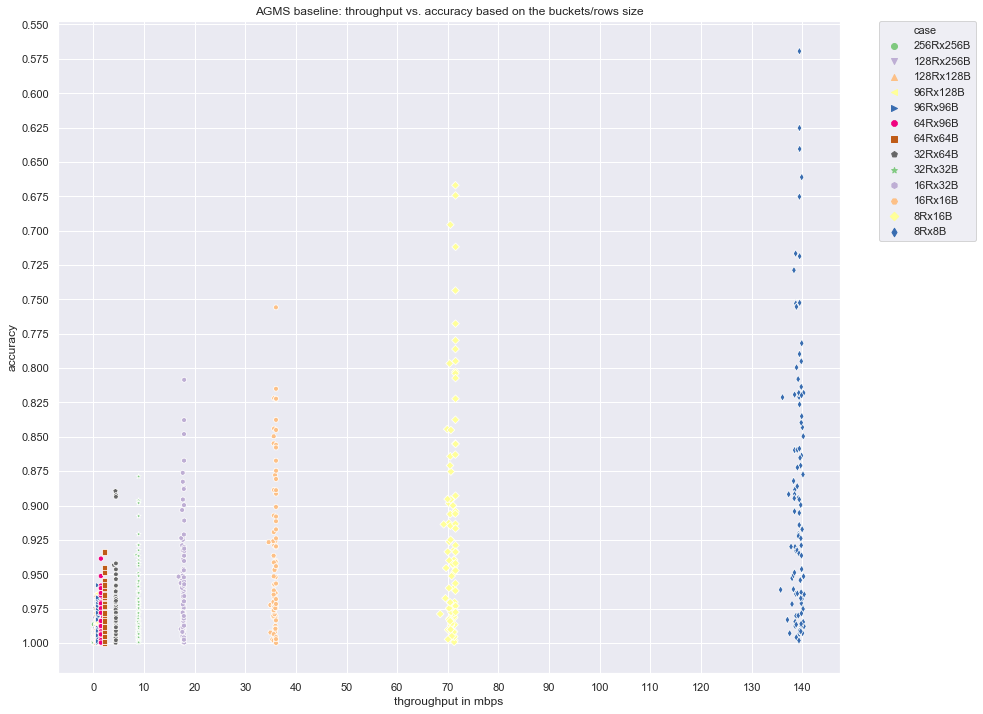

In [53]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 32
alg_cnt = 1
dist_cnt = 3
offset = case_cnt*runs_cnt*dist_cnt
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], alg_cnt)
plus_runs = np.repeat(cases, runs_cnt)
plus_dists = np.tile(plus_runs, dist_cnt)
algs = np.repeat(['F-AGMS'], offset)
thrput = np.array([0.138232, 0.139497, 0.139959, 0.139524, 0.139533, 0.139342, 0.139745, 0.13937, 0.139359, 0.139513, 0.13978, 0.139695, 0.139724, 0.139711, 0.139375, 0.139644, 0.139438, 0.139657, 0.139157, 0.139482, 0.139509, 0.139537, 0.139494, 0.139283, 0.139159, 0.139188, 0.139181, 0.13862, 0.138768, 0.138864, 0.139892, 0.14012, 0.278292, 0.278776, 0.278484, 0.277844, 0.278486, 0.279298, 0.279179, 0.27805, 0.279298, 0.276293, 0.278892, 0.279597, 0.279444, 0.27961, 0.279307, 0.27698, 0.277313, 0.277455, 0.277634, 0.278005, 0.277301, 0.277528, 0.276527, 0.277616, 0.276657, 0.2769, 0.277435, 0.277884, 0.277433, 0.278093, 0.276942, 0.276388, 0.557228, 0.557955, 0.55874, 0.558449, 0.556861, 0.555645, 0.556232, 0.55608, 0.558908, 0.556522, 0.554482, 0.554974, 0.554454, 0.554921, 0.555428, 0.555043, 0.554053, 0.553879, 0.554033, 0.55664, 0.558147, 0.557336, 0.555902, 0.556591, 0.557776, 0.556397, 0.556879, 0.558677, 0.559381, 0.555739, 0.556534, 0.556701, 0.745794, 0.744842, 0.745687, 0.746033, 0.743836, 0.745153, 0.744872, 0.745983, 0.744378, 0.742722, 0.74638, 0.74259, 0.74502, 0.744354, 0.744518, 0.743494, 0.744778, 0.744603, 0.74464, 0.745161, 0.744314, 0.745277, 0.744037, 0.743984, 0.74521, 0.740867, 0.740047, 0.741001, 0.743477, 0.742201, 0.745575, 0.745676, 0.991604, 0.994519, 0.995292, 0.99026, 0.994129, 0.994977, 0.996085, 0.994779, 0.992926, 0.987436, 0.992129, 0.99076, 0.993141, 0.991677, 0.991395, 0.992258, 0.990791, 0.991114, 0.992016, 0.991461, 0.993072, 0.991585, 0.990142, 0.990383, 0.991148, 0.993123, 0.99093, 0.991502, 0.988828, 0.990888, 0.989995, 0.991422, 1.48894, 1.4914, 1.48717, 1.48533, 1.4902, 1.48588, 1.48448, 1.48511, 1.48356, 1.48862, 1.48334, 1.48966, 1.4846, 1.47903, 1.48647, 1.48975, 1.48392, 1.48555, 1.49141, 1.48315, 1.48966, 1.48514, 1.4891, 1.48966, 1.4854, 1.49064, 1.48698, 1.48279, 1.48927, 1.49129, 1.48401, 1.48905, 2.23972, 2.23594, 2.24306, 2.24212, 2.24272, 2.23284, 2.2359, 2.22858, 2.23411, 2.23214, 2.23344, 2.23006, 2.23476, 2.23363, 2.22575, 2.23143, 2.23151, 2.23459, 2.2245, 2.23543, 2.21922, 2.23363, 2.22576, 2.21471, 2.22695, 2.23344, 2.21713, 2.22957, 2.23273, 2.24247, 2.23571, 2.2315, 4.38954, 4.43984, 4.46589, 4.47032, 4.45511, 4.45748, 4.44993, 4.47132, 4.46939, 4.46701, 4.46572, 4.46508, 4.46597, 4.46678, 4.42603, 4.47997, 4.47851, 4.48131, 4.4255, 4.46055, 4.46696, 4.46794, 4.40575, 4.39135, 4.3149, 4.441, 4.44666, 4.46083, 4.47156, 4.46295, 4.44656, 4.44261, 8.94502, 8.95166, 8.91236, 8.93419, 8.94407, 8.93138, 8.89979, 8.94098, 8.91729, 8.94133, 8.94406, 8.93542, 8.94122, 8.946, 8.88482, 8.93294, 8.90897, 8.9429, 8.94782, 8.95015, 8.94858, 8.94299, 8.91121, 8.915, 8.93383, 8.94468, 8.95305, 8.94401, 8.93916, 8.93713, 8.94723, 8.86315, 17.827, 17.8277, 17.721, 17.8415, 17.8303, 17.8012, 17.8494, 17.7409, 17.7947, 17.8138, 17.7559, 17.8115, 17.8078, 17.7984, 17.8028, 17.6591, 17.8023, 17.829, 17.7954, 17.7712, 17.8307, 17.8247, 17.7964, 17.8466, 17.8297, 17.8019, 17.8276, 17.8178, 17.8041, 17.8598, 17.7433, 17.78, 34.9682, 35.9436, 35.9893, 35.9817, 35.6733, 35.3393, 35.6291, 35.931, 35.883, 35.9864, 35.957, 35.6231, 35.5311, 35.9644, 36.0132, 36.0178, 35.8929, 36.0096, 35.9868, 36.0062, 35.9742, 35.9942, 35.8302, 36.0382, 35.9917, 35.9584, 35.9928, 35.8899, 35.8668, 35.9797, 35.9587, 35.9893, 71.2544, 71.3068, 71.2534, 68.4904, 69.5343, 71.2318, 71.2308, 71.2776, 71.2531, 71.1939, 71.2714, 71.2515, 71.2652, 71.3274, 71.1587, 70.6634, 71.1987, 71.2496, 71.222, 70.2007, 71.153, 71.227, 71.0948, 71.3073, 71.3202, 71.2881, 70.7889, 71.1386, 70.2214, 70.0549, 70.0337, 69.9764, 135.695, 137.963, 138.46, 139.948, 138.732, 140.028, 138.539, 140.117, 138.568, 140.023, 138.512, 139.955, 136.068, 140.024, 138.723, 140.313, 138.449, 140.13, 138.44, 140.166, 138.253, 140.34, 138.225, 139.814, 138.434, 140.252, 138.562, 140.172, 137.947, 139.992, 138.698, 140.228,
                    0.138233, 0.139562, 0.139351, 0.139248, 0.139263, 0.139216, 0.139197, 0.139099, 0.139123, 0.13924, 0.139438, 0.139509, 0.139573, 0.139453, 0.139751, 0.139489, 0.139537, 0.139525, 0.139469, 0.139594, 0.139825, 0.1397, 0.139764, 0.139914, 0.139649, 0.139093, 0.138966, 0.13943, 0.13933, 0.139563, 0.139701, 0.139515, 0.27728, 0.27774, 0.278373, 0.27783, 0.277029, 0.277592, 0.278034, 0.278243, 0.278081, 0.2776, 0.277813, 0.277709, 0.277823, 0.277796, 0.277586, 0.278195, 0.277687, 0.277709, 0.278181, 0.278065, 0.277736, 0.278833, 0.278468, 0.27923, 0.278822, 0.278279, 0.279144, 0.279197, 0.278306, 0.276339, 0.275979, 0.276234, 0.555662, 0.557604, 0.561668, 0.560236, 0.561068, 0.561724, 0.561425, 0.561074, 0.561874, 0.561323, 0.561648, 0.561515, 0.5619, 0.562011, 0.561944, 0.561319, 0.562308, 0.558322, 0.561043, 0.561932, 0.561676, 0.561586, 0.560319, 0.5613, 0.561315, 0.561931, 0.561179, 0.561766, 0.560765, 0.560323, 0.560559, 0.560901, 0.749038, 0.749074, 0.748692, 0.748969, 0.747154, 0.745352, 0.743265, 0.742284, 0.74251, 0.742237, 0.74392, 0.742602, 0.743156, 0.743226, 0.743698, 0.745474, 0.745683, 0.744806, 0.744235, 0.746484, 0.743644, 0.746508, 0.749051, 0.74655, 0.744388, 0.744475, 0.743832, 0.743033, 0.741718, 0.741989, 0.7447, 0.74402, 0.98995, 0.990582, 0.990492, 0.988809, 0.991993, 0.990165, 0.991282, 0.986697, 0.991666, 0.990449, 0.989906, 0.990158, 0.991591, 0.99107, 0.988996, 0.988176, 0.988505, 0.990886, 0.986621, 0.995073, 0.994846, 0.99146, 0.990005, 0.991561, 0.990475, 0.991561, 0.99125, 0.993631, 0.993949, 0.989184, 0.989541, 0.990443, 1.48, 1.48653, 1.48139, 1.48002, 1.48483, 1.4874, 1.48415, 1.48525, 1.48845, 1.48627, 1.48605, 1.4863, 1.48735, 1.47952, 1.48169, 1.48145, 1.48323, 1.4862, 1.47718, 1.4939, 1.48683, 1.48656, 1.49075, 1.48983, 1.48979, 1.49051, 1.4915, 1.48929, 1.49058, 1.49213, 1.49147, 1.49666, 2.24608, 2.24214, 2.24248, 2.2351, 2.24293, 2.23767, 2.24294, 2.23625, 2.24054, 2.24182, 2.24168, 2.19651, 2.23787, 2.2328, 2.23452, 2.23454, 2.23524, 2.23534, 2.23523, 2.23675, 2.23626, 2.23697, 2.22014, 2.2318, 2.23436, 2.2309, 2.23117, 2.23597, 2.22438, 2.22217, 2.22117, 2.22223, 4.43542, 4.43855, 4.43691, 4.44121, 4.43798, 4.41962, 4.43606, 4.43542, 4.43118, 4.4255, 4.43811, 4.4431, 4.43247, 4.40858, 4.43673, 4.4455, 4.43387, 4.4245, 4.44578, 4.45197, 4.4337, 4.42193, 4.40491, 4.42726, 4.43381, 4.42997, 4.43418, 4.43879, 4.43614, 4.43154, 4.41132, 4.43574, 8.88426, 8.83739, 8.88403, 8.87799, 8.81692, 8.88582, 8.89578, 8.86918, 8.88995, 8.91271, 8.91454, 8.90895, 8.85927, 8.77792, 8.8855, 8.90821, 8.9149, 8.88595, 8.88962, 8.90207, 8.89573, 8.82121, 8.9088, 8.86035, 8.90717, 8.92054, 8.86755, 8.90482, 8.89658, 8.83025, 8.78674, 8.89348, 17.659, 17.6993, 17.6329, 17.6768, 17.6909, 17.2622, 17.657, 17.6393, 17.6118, 17.6499, 17.5398, 17.6732, 17.4722, 17.6486, 17.6378, 17.6619, 17.4825, 17.5434, 17.6736, 17.6407, 17.6219, 17.6324, 17.5554, 17.5898, 17.6654, 17.6893, 17.6652, 17.5662, 17.2529, 17.3711, 17.635, 17.6446, 35.5707, 35.5656, 35.7477, 35.6469, 35.6288, 35.6505, 35.7603, 35.6841, 35.7383, 35.6875, 35.5185, 35.7615, 35.6412, 35.7218, 35.6087, 35.6399, 35.614, 35.6402, 35.7863, 35.6269, 35.7607, 35.6546, 34.9849, 34.6252, 35.6175, 35.7947, 35.6302, 35.5949, 35.6138, 35.6337, 35.7639, 35.6773, 70.6015, 70.4695, 70.2693, 70.429, 69.878, 70.2791, 70.3391, 70.6274, 70.2875, 70.6038, 70.7318, 70.4686, 70.2293, 70.4636, 70.6204, 69.6631, 70.6865, 70.5038, 70.5523, 70.2684, 70.5452, 70.7429, 70.2875, 70.5802, 70.4576, 70.4537, 69.9507, 69.1862, 70.4956, 70.346, 70.6046, 70.4889, 138.963, 138.693, 138.818, 139.581, 137.041, 139.758, 138.985, 138.839, 138.329, 139.16, 139.208, 139.446, 137.286, 138.778, 137.754, 139.646, 139.365, 138.662, 139.168, 139.34, 138.98, 138.255, 139.012, 139.532, 139.014, 139.764, 138.793, 139.206, 138.39, 139.183, 138.459, 139.661,
                    0.140417, 0.140389, 0.140191, 0.139805, 0.140231, 0.140245, 0.140134, 0.140287, 0.139333, 0.14027, 0.140262, 0.140281, 0.140256, 0.140327, 0.14029, 0.140276, 0.14029, 0.139801, 0.140308, 0.140286, 0.140103, 0.140146, 0.140216, 0.140219, 0.140128, 0.140186, 0.139822, 0.140048, 0.140308, 0.140239, 0.14013, 0.139948, 0.279757, 0.279248, 0.279624, 0.279718, 0.279761, 0.279706, 0.279702, 0.277933, 0.278657, 0.279739, 0.279611, 0.279503, 0.279532, 0.279766, 0.279532, 0.279747, 0.279744, 0.279519, 0.279323, 0.27952, 0.279689, 0.279507, 0.279208, 0.279673, 0.279775, 0.277915, 0.279761, 0.279757, 0.279753, 0.279258, 0.278711, 0.279737, 0.559063, 0.559054, 0.559146, 0.558984, 0.559079, 0.558473, 0.559109, 0.557153, 0.558424, 0.554991, 0.559089, 0.558981, 0.559067, 0.558826, 0.559086, 0.558921, 0.559068, 0.559055, 0.558918, 0.559034, 0.558115, 0.559062, 0.547984, 0.55904, 0.55901, 0.559065, 0.558691, 0.559085, 0.559103, 0.559073, 0.557182, 0.559106, 0.748635, 0.74854, 0.748576, 0.748527, 0.746418, 0.748573, 0.748481, 0.748588, 0.748592, 0.748558, 0.748537, 0.748579, 0.74854, 0.748559, 0.748476, 0.748472, 0.74853, 0.748483, 0.748275, 0.74854, 0.748569, 0.748302, 0.748603, 0.748238, 0.742867, 0.748615, 0.746809, 0.748568, 0.748572, 0.745025, 0.748551, 0.748583, 0.997602, 0.997854, 0.99797, 0.993713, 0.965482, 0.99791, 0.997982, 0.997943, 0.996398, 0.997847, 0.997952, 0.997938, 0.99163, 0.997819, 0.997925, 0.997524, 0.997925, 0.997875, 0.997786, 0.98977, 0.997861, 0.997883, 0.997867, 0.984937, 0.997901, 0.997879, 0.997807, 0.997432, 0.997815, 0.997917, 0.99788, 0.997961, 1.49817, 1.49795, 1.49818, 1.47136, 1.49607, 1.49822, 1.49815, 1.49816, 1.49793, 1.48369, 1.49819, 1.49819, 1.49824, 1.49821, 1.48891, 1.47862, 1.49819, 1.49824, 1.4981, 1.49824, 1.49735, 1.49822, 1.49798, 1.49817, 1.49816, 1.49825, 1.48379, 1.49813, 1.49814, 1.49792, 1.49818, 1.49677, 2.24368, 2.2437, 2.24419, 2.24425, 2.24385, 2.24418, 2.24379, 2.24419, 2.24282, 2.24411, 2.24428, 2.24356, 2.24427, 2.24359, 2.24424, 2.24355, 2.24412, 2.24377, 2.24355, 2.24398, 2.24362, 2.24429, 2.24348, 2.24416, 2.24407, 2.2431, 2.24406, 2.24365, 2.24404, 2.24367, 2.24411, 2.24421, 4.37718, 4.08422, 4.4052, 4.47391, 4.47263, 4.47211, 4.47228, 4.47454, 4.47232, 4.47271, 4.47418, 4.4726, 4.47251, 4.4724, 4.47436, 4.47227, 4.47264, 4.47467, 4.47239, 4.47249, 4.38556, 4.43448, 4.4727, 4.47258, 4.47502, 4.47238, 4.47262, 4.47259, 4.47456, 4.47286, 4.47232, 4.47486, 8.95264, 8.96082, 8.96114, 8.95234, 8.96174, 8.95216, 8.96152, 8.96097, 8.95291, 8.96023, 8.70688, 8.48165, 8.96181, 8.96086, 8.95314, 8.9617, 8.9524, 8.96064, 8.96116, 8.95271, 8.9607, 8.95978, 8.95315, 8.95925, 8.96131, 8.95406, 8.96111, 8.96125, 8.95308, 8.96183, 8.95224, 8.96271, 17.8898, 17.9141, 17.9212, 17.8641, 17.95, 17.9749, 17.949, 17.9437, 17.9357, 17.8736, 17.9311, 17.9097, 17.9681, 17.9412, 17.906, 17.9605, 17.9402, 17.9581, 17.8639, 17.8841, 17.8809, 17.9008, 17.907, 17.9272, 16.8337, 17.8203, 17.8997, 17.8807, 17.9165, 17.9108, 17.9631, 17.8787, 36.0792, 36.0827, 36.0795, 36.0743, 36.0688, 36.0758, 36.0643, 36.0738, 36.0659, 35.9563, 36.0604, 36.0747, 36.0738, 36.0838, 36.0754, 36.0799, 36.0742, 36.0664, 36.0778, 36.0794, 36.0759, 35.9305, 36.07, 36.0655, 36.0726, 36.0765, 36.0775, 36.0812, 36.0713, 36.0867, 36.0768, 36.0831, 71.4913, 71.0208, 71.4993, 71.5145, 71.518, 71.4965, 71.4831, 71.5227, 71.5149, 71.5175, 71.5193, 71.5078, 71.521, 71.5204, 71.4907, 71.487, 71.4811, 71.5268, 71.4909, 71.5317, 71.5112, 71.5327, 71.5316, 71.0051, 71.498, 71.5094, 71.5152, 71.5118, 71.523, 71.5069, 71.4999, 71.5045, 139.383, 139.843, 139.321, 139.772, 139.437, 139.69, 139.407, 139.739, 139.369, 139.763, 139.452, 139.739, 139.291, 139.813, 139.456, 139.799, 139.334, 139.766, 139.426, 139.675, 139.413, 139.86, 139.428, 139.859, 139.411, 139.674, 137.487, 139.857, 139.422, 139.772, 139.382, 139.807])
acc = np.array([0.996529, 0.999329, 0.996745, 0.998553, 0.997484, 0.996083, 0.998827, 0.99804, 0.998449, 0.999594, 0.997137, 0.999737, 0.996651, 0.998281, 0.999972, 0.996741, 0.998141, 0.998323, 0.99638, 0.999792, 0.999822, 0.996464, 0.998125, 0.998227, 0.998311, 0.999505, 0.993774, 0.997677, 0.998682, 0.999758, 0.997993, 0.998427, 0.999765, 0.997564, 0.999356, 0.999807, 0.99723, 0.996724, 0.995944, 0.999099, 0.997461, 0.996234, 0.999155, 0.996157, 0.999418, 0.99876, 0.998203, 0.999581, 0.990142, 0.998747, 0.999964, 0.999919, 0.999561, 0.99538, 0.99711, 0.998343, 0.995439, 0.996435, 0.998704, 0.998791, 0.994731, 0.999982, 0.999633, 0.996307, 0.995494, 0.987743, 0.999348, 0.999652, 0.999851, 0.999292, 0.996704, 0.997341, 0.992419, 0.995055, 0.997226, 0.996018, 0.998877, 0.993149, 0.996484, 0.989063, 0.996836, 0.997686, 0.99683, 0.991911, 0.997367, 0.996628, 0.999208, 0.996435, 0.992038, 0.993108, 0.997994, 0.992177, 0.995446, 0.999637, 0.999781, 0.99897, 0.996996, 0.996521, 0.997173, 0.997117, 0.994444, 0.99597, 0.995774, 0.998134, 0.991897, 0.999147, 0.994664, 0.996027, 0.995726, 0.993987, 0.992586, 0.996679, 0.99782, 0.99189, 0.992033, 0.989344, 0.997154, 0.996568, 0.990721, 0.992531, 0.997388, 0.993629, 0.999098, 0.998277, 0.998895, 0.997024, 0.990913, 0.999708, 0.996498, 0.993741, 0.9954, 0.992794, 0.998111, 0.98864, 0.995908, 0.997164, 0.993603, 0.992527, 0.997458, 0.99907, 0.990302, 0.993015, 0.992769, 0.999306, 0.991186, 0.997654, 0.999715, 0.991835, 0.989532, 0.999486, 0.997394, 0.992845, 0.997477, 0.999985, 0.996202, 0.993358, 0.999182, 0.997939, 0.998047, 0.988176, 0.987267, 0.980832, 0.986359, 0.988778, 0.998753, 0.99409, 0.991546, 0.997528, 0.987992, 0.996375, 0.999759, 0.994213, 0.994278, 0.990878, 0.996298, 0.994149, 0.998691, 0.978654, 0.999594, 0.998961, 0.999247, 0.99339, 0.994457, 0.981017, 0.998514, 0.994452, 0.998759, 0.992107, 0.984289, 0.988358, 0.992222, 0.985838, 0.994344, 0.986716, 0.996427, 0.992348, 0.98808, 0.993743, 0.999973, 0.989615, 0.988109, 0.998757, 0.986688, 0.999935, 0.984966, 0.980355, 0.992866, 0.994042, 0.997858, 0.995037, 0.987926, 0.990466, 0.988819, 0.986065, 0.994332, 0.998401, 0.996681, 0.986862, 0.99433, 0.992987, 0.996923, 0.993498, 0.989003, 0.997998, 0.989379, 0.997652, 0.992316, 0.997154, 0.995606, 0.997693, 0.992157, 0.995009, 0.99139, 0.997296, 0.993865, 0.970235, 0.999035, 0.98217, 0.986207, 0.981868, 0.972953, 0.989663, 0.99325, 0.99589, 0.99688, 0.995668, 0.992148, 0.988721, 0.999385, 0.990659, 0.983651, 0.996777, 0.979936, 0.983178, 0.990099, 0.998178, 0.978694, 0.987264, 0.997899, 0.994576, 0.971406, 0.976375, 0.982804, 0.959316, 0.973153, 0.976381, 0.983885, 0.989421, 0.985428, 0.991407, 0.969369, 0.99757, 0.958939, 0.996398, 0.997358, 0.977817, 0.975694, 0.9623, 0.990334, 0.99284, 0.994731, 0.986163, 0.996809, 0.996866, 0.983489, 0.968957, 0.971117, 0.985704, 0.973238, 0.960845, 0.978978, 0.990162, 0.956787, 0.970674, 0.993506, 0.939352, 0.999842, 0.983513, 0.970307, 0.997584, 0.977618, 0.978471, 0.999362, 0.996817, 0.98644, 0.997198, 0.969208, 0.990044, 0.962062, 0.962188, 0.998139, 0.974419, 0.984251, 0.964423, 0.986673, 0.978788, 0.979445, 0.999017, 0.957923, 0.983927, 0.972372, 0.945369, 0.995134, 0.925575, 0.957592, 0.99744, 0.972625, 0.990162, 0.991927, 0.963675, 0.945134, 0.972416, 0.980965, 0.97989, 0.980586, 0.997038, 0.877829, 0.972817, 0.963698, 0.973326, 0.969024, 0.973496, 0.946276, 0.940285, 0.945361, 0.987659, 0.940928, 0.967535, 0.967778, 0.981983, 0.989334, 0.952035, 0.972475, 0.997982, 0.999272, 0.978893, 0.967438, 0.991643, 0.995233, 0.981596, 0.975411, 0.98076, 0.9322, 0.905388, 0.995432, 0.970252, 0.976043, 0.97516, 0.978318, 0.905357, 0.93927, 0.91274, 0.992015, 0.939599, 0.96032, 0.943035, 0.986677, 0.944345, 0.99497, 0.94899, 0.96003, 0.990345, 0.997367, 0.933612, 0.961291, 0.952837, 0.859691, 0.91731, 0.980247, 0.99278, 0.930126, 0.877428, 0.987679, 0.973669, 0.888489, 0.967768, 0.821268, 0.985146, 0.932888, 0.987874, 0.891851, 0.975247, 0.904257, 0.984711, 0.950734, 0.964618, 0.96092, 0.863681, 0.948796, 0.818065, 0.984526, 0.849604, 0.97168, 0.843035, 0.964298, 0.951555,
                 0.998024, 0.999709, 0.997395, 0.995238, 0.996308, 0.999723, 0.996247, 0.987799, 0.998901, 0.995356, 0.994511, 0.989783, 0.998234, 0.99474, 0.998882, 0.992768, 0.998915, 0.998638, 0.999835, 0.995321, 0.999659, 0.999146, 0.996535, 0.998226, 0.995611, 0.999507, 0.99712, 0.998022, 0.998793, 0.999109, 0.994988, 0.994452, 0.998698, 0.997702, 0.982323, 0.988353, 0.997834, 0.998319, 0.99549, 0.991918, 0.999802, 0.995149, 0.9933, 0.989689, 0.986583, 0.993719, 0.998797, 0.997619, 0.995724, 0.992705, 0.999806, 0.997518, 0.998525, 0.994407, 0.990753, 0.989602, 0.99484, 0.998893, 0.999418, 0.99711, 0.996695, 0.991932, 0.994023, 0.999462, 0.985557, 0.996407, 0.996553, 0.999122, 0.993134, 0.99868, 0.984682, 0.997432, 0.982111, 0.992499, 0.989431, 0.992098, 0.99624, 0.98772, 0.996743, 0.989732, 0.999663, 0.994452, 0.991538, 0.99987, 0.992575, 0.999663, 0.990277, 0.997115, 0.987026, 0.982211, 0.999114, 0.985669, 0.989113, 0.996041, 0.999666, 0.997256, 0.99045, 0.999139, 0.988925, 0.993524, 0.991617, 0.998759, 0.995194, 0.998573, 0.989559, 0.998073, 0.999689, 0.989798, 0.993358, 0.989475, 0.995747, 0.999894, 0.984034, 0.994317, 0.990672, 0.993952, 0.997096, 0.992764, 0.991147, 0.999765, 0.994682, 0.977654, 0.989304, 0.985068, 0.990333, 0.992217, 0.99335, 0.98444, 0.987069, 0.991183, 0.994909, 0.992023, 0.98994, 0.982155, 0.994531, 0.999381, 0.988943, 0.995503, 0.975884, 0.975126, 0.999256, 0.991531, 0.99565, 0.992427, 0.999773, 0.988366, 0.998428, 0.98682, 0.987601, 0.996617, 0.998615, 0.987836, 0.977652, 0.988317, 0.996042, 0.986024, 0.99875, 0.998189, 0.999187, 0.997391, 0.967264, 0.98623, 0.980657, 0.979675, 0.988142, 0.981901, 0.998406, 0.995715, 0.987617, 0.992908, 0.989925, 0.962726, 0.999761, 0.98317, 0.983653, 0.978875, 0.980893, 0.997101, 0.999396, 0.986634, 0.980606, 0.997798, 0.99166, 0.979367, 0.996592, 0.996652, 0.999161, 0.988001, 0.989268, 0.997835, 0.990241, 0.980579, 0.991612, 0.976128, 0.960228, 0.982035, 0.992417, 0.97419, 0.996731, 0.972986, 0.985207, 0.993142, 0.991498, 0.967203, 0.995269, 0.972153, 0.960838, 0.988679, 0.961602, 0.978686, 0.997167, 0.964428, 0.98984, 0.994321, 0.992992, 0.994484, 0.978204, 0.992372, 0.994851, 0.963749, 0.983213, 0.975281, 0.981018, 0.979295, 0.962352, 0.958184, 0.989047, 0.995364, 0.976763, 0.960844, 0.990832, 0.994205, 0.992076, 0.987421, 0.996925, 0.974465, 0.992153, 0.967194, 0.987749, 0.999185, 0.992159, 0.995383, 0.985641, 0.976418, 0.99524, 0.976371, 0.966352, 0.98474, 0.964389, 0.999844, 0.968886, 0.990917, 0.985415, 0.993365, 0.975721, 0.959535, 0.928469, 0.993648, 0.971918, 0.993222, 0.995265, 0.96315, 0.949106, 0.982095, 0.980116, 0.943508, 0.985883, 0.968153, 0.985966, 0.991596, 0.997886, 0.99203, 0.955684, 0.97862, 0.975719, 0.963997, 0.989758, 0.985679, 0.989684, 0.984496, 0.969853, 0.978184, 0.999351, 0.991983, 0.988511, 0.956151, 0.969758, 0.967549, 0.876221, 0.977548, 0.994609, 0.92286, 0.996749, 0.989875, 0.991649, 0.977852, 0.995149, 0.932662, 0.903264, 0.966151, 0.952465, 0.990735, 0.948078, 0.971876, 0.958954, 0.959882, 0.882682, 0.988423, 0.95089, 0.954464, 0.928919, 0.991939, 0.982165, 0.89561, 0.924937, 0.954217, 0.956403, 0.923617, 0.950981, 0.951085, 0.970127, 0.98023, 0.957358, 0.961776, 0.951525, 0.941376, 0.97388, 0.976694, 0.929001, 0.843989, 0.925954, 0.966608, 0.919302, 0.821881, 0.936466, 0.993853, 0.964789, 0.977069, 0.94683, 0.849622, 0.994599, 0.907265, 0.992376, 0.926673, 0.854803, 0.979064, 0.993538, 0.998193, 0.977118, 0.976225, 0.973734, 0.888641, 0.875285, 0.990221, 0.926348, 0.87086, 0.844419, 0.975446, 0.98204, 0.977414, 0.93998, 0.987192, 0.973913, 0.906239, 0.898473, 0.970869, 0.896044, 0.945409, 0.985916, 0.914685, 0.990143, 0.974728, 0.92485, 0.951323, 0.982929, 0.895592, 0.970458, 0.98411, 0.895304, 0.91368, 0.695708, 0.796631, 0.845084, 0.864151, 0.932619, 0.752975, 0.755371, 0.954322, 0.983149, 0.987843, 0.859398, 0.799522, 0.728791, 0.808041, 0.920827, 0.718642, 0.891833, 0.986617, 0.929925, 0.870944, 0.993435, 0.716666, 0.894578, 0.820987, 0.885989, 0.882127, 0.872322, 0.865296, 0.963996, 0.839681, 0.995903, 0.922201, 0.894716, 0.980017, 0.819304, 0.899591,
                 0.994819, 0.997784, 0.99114, 0.999094, 0.98749, 0.999803, 0.991274, 0.989903, 0.996043, 0.991362, 0.99707, 0.999789, 0.998104, 0.99863, 0.988178, 0.993644, 0.995365, 0.996395, 0.996203, 0.997983, 0.986604, 0.988236, 0.99475, 0.998863, 0.999509, 0.999367, 0.986469, 0.999033, 0.990828, 0.991912, 0.994374, 0.999037, 0.999304, 0.991425, 0.9953, 0.996648, 0.999612, 0.994242, 0.996773, 0.995597, 0.998209, 0.998186, 0.989841, 0.992693, 0.99554, 0.991847, 0.995376, 0.995744, 0.991158, 0.998438, 0.992236, 0.994693, 0.992078, 0.994292, 0.999053, 0.992927, 0.993949, 0.992446, 0.993608, 0.997757, 0.991908, 0.975407, 0.995703, 0.994689, 0.99925, 0.978455, 0.995295, 0.996919, 0.997437, 0.995655, 0.994415, 0.994106, 0.992377, 0.999822, 0.99208, 0.976833, 0.973383, 0.964719, 0.993466, 0.984216, 0.976831, 0.997008, 0.993508, 0.989307, 0.99969, 0.993031, 0.984955, 0.993545, 0.991778, 0.997448, 0.983907, 0.98568, 0.98877, 0.998252, 0.998162, 0.993526, 0.982101, 0.997737, 0.986263, 0.976801, 0.986274, 0.993364, 0.995172, 0.981671, 0.982978, 0.988017, 0.991937, 0.995971, 0.989072, 0.999585, 0.988137, 0.968444, 0.998677, 0.997667, 0.989275, 0.994634, 0.964025, 0.992563, 0.990636, 0.985719, 0.996043, 0.999491, 0.972146, 0.988872, 0.998186, 0.996046, 0.985161, 0.994678, 0.994989, 0.999566, 0.994771, 0.981821, 0.990601, 0.994092, 0.999732, 0.999748, 0.970109, 0.971657, 0.980054, 0.968058, 0.997251, 0.989055, 0.99165, 0.99528, 0.995236, 0.980879, 0.975966, 0.973421, 0.983028, 0.979028, 0.966988, 0.996557, 0.957978, 0.990386, 0.976031, 0.9963, 0.998664, 0.991369, 0.978008, 0.994411, 0.970218, 0.987881, 0.983843, 0.971975, 0.995605, 0.991701, 0.984867, 0.991935, 0.987399, 0.965421, 0.938618, 0.989409, 0.999015, 0.958257, 0.960158, 0.99325, 0.991568, 0.971189, 0.993828, 0.974783, 0.99314, 0.983951, 0.999567, 0.998594, 0.999044, 0.977969, 0.993766, 0.99797, 0.963641, 0.951316, 0.999714, 0.987706, 0.977444, 0.948275, 0.991529, 0.981209, 0.955393, 0.995098, 0.994243, 0.993392, 0.998859, 0.956659, 0.933694, 0.995469, 0.960209, 0.956889, 0.985001, 0.991226, 0.945089, 0.933722, 0.984138, 0.969378, 0.957545, 0.967016, 0.95459, 0.96514, 0.97806, 0.989682, 0.99151, 0.974176, 0.971373, 0.988308, 0.973346, 0.957735, 0.889441, 0.943225, 0.996248, 0.892464, 0.970253, 0.968056, 0.987196, 0.957841, 0.993551, 0.962364, 0.988156, 0.942268, 0.893619, 0.991215, 0.950058, 0.977913, 0.988608, 0.963025, 0.98135, 0.942112, 0.970112, 0.962466, 0.997987, 0.958633, 0.958249, 0.980854, 0.946472, 0.953375, 0.953524, 0.983863, 0.981881, 0.969335, 0.939808, 0.994836, 0.987569, 0.932554, 0.954806, 0.994477, 0.943733, 0.999176, 0.98618, 0.897109, 0.995136, 0.935811, 0.941959, 0.973286, 0.974602, 0.972185, 0.936669, 0.99589, 0.963528, 0.989336, 0.998802, 0.993411, 0.878879, 0.907639, 0.920809, 0.896261, 0.999566, 0.928733, 0.898165, 0.970132, 0.951257, 0.988048, 0.921065, 0.848004, 0.867327, 0.958394, 0.887519, 0.93305, 0.808536, 0.887153, 0.930236, 0.887967, 0.936511, 0.9874, 0.965895, 0.955447, 0.998808, 0.931363, 0.999649, 0.957254, 0.997874, 0.952212, 0.982155, 0.995956, 0.969676, 0.837823, 0.951741, 0.946109, 0.997586, 0.980362, 0.940344, 0.899663, 0.910945, 0.947116, 0.845006, 0.855843, 0.995736, 0.815025, 0.944136, 0.974441, 0.983558, 0.930109, 0.998463, 0.989652, 0.755819, 0.917366, 0.9114, 0.891368, 0.999989, 0.888852, 0.837662, 0.968044, 0.929732, 0.8224, 0.997199, 0.974602, 0.857766, 0.971606, 0.867343, 0.880681, 0.956738, 0.907988, 0.900994, 0.874641, 0.92388, 0.822242, 0.854905, 0.899976, 0.666986, 0.904134, 0.822315, 0.802564, 0.862952, 0.973037, 0.892841, 0.928908, 0.779801, 0.913332, 0.767665, 0.674413, 0.8038, 0.962018, 0.905997, 0.977547, 0.956614, 0.933698, 0.947284, 0.711806, 0.855233, 0.942649, 0.837593, 0.916713, 0.807283, 0.933767, 0.794896, 0.942003, 0.743528, 0.786173, 0.905418, 0.946296, 0.998186, 0.970994, 0.826449, 0.923838, 0.858585, 0.986097, 0.914178, 0.928983, 0.752506, 0.963134, 0.818071, 0.819797, 0.640587, 0.978494, 0.934917, 0.813631, 0.991247, 0.991538, 0.675296, 0.781937, 0.789773, 0.83504, 0.569447, 0.967457, 0.992988, 0.661098, 0.625301, 0.795067, 0.895598, 0.936387])

# print(acc.size)

df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.case = plus_dists
df1.throughput = thrput
df1.accuracy = acc


plt.figure(figsize=(14,12))
# print(df1)

# sns.regplot(y="accuracy", x="throughput", data=df1,
#            logx=True, ci=68, truncate=True,
#            scatter_kws={"s": 0})

cmap = sns.color_palette("Accent", 13)
sns.set_color_codes("pastel")
fig1 = sns.scatterplot(y="accuracy", x="throughput", data=df1, hue="case",
               palette=cmap, s=30, markers=markers, style="case")
sns.set_color_codes()
fig1.set(xlabel="thgroughput in mbps", title= "AGMS baseline: throughput vs. accuracy based on the buckets/rows size")
fig1.axes.invert_yaxis()
plt.yticks(np.arange(0.55, 1.01, 0.025))
plt.xticks(np.arange(0, 150, 10.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

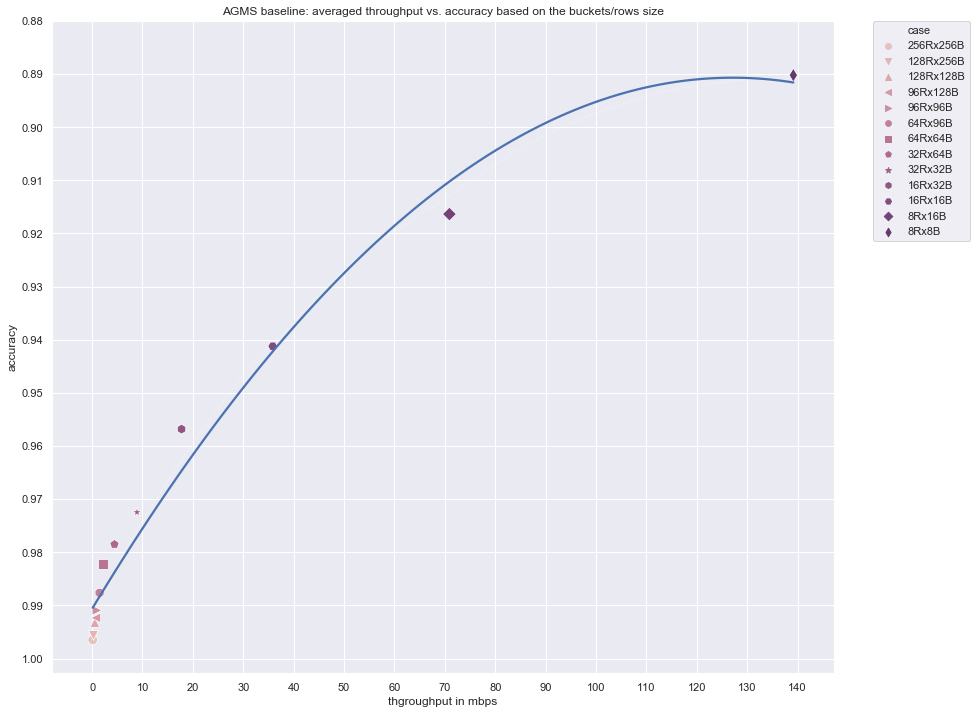

In [47]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 1
alg_cnt = 1
dist_cnt = 1
offset = case_cnt*runs_cnt*dist_cnt
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], alg_cnt)
algs = np.repeat(['F-AGMS'], case_cnt)
thrput = np.array([0.138232, 0.139497, 0.139959, 0.139524, 0.139533, 0.139342, 0.139745, 0.13937, 0.139359, 0.139513, 0.13978, 0.139695, 0.139724, 0.139711, 0.139375, 0.139644, 0.139438, 0.139657, 0.139157, 0.139482, 0.139509, 0.139537, 0.139494, 0.139283, 0.139159, 0.139188, 0.139181, 0.13862, 0.138768, 0.138864, 0.139892, 0.14012, 0.278292, 0.278776, 0.278484, 0.277844, 0.278486, 0.279298, 0.279179, 0.27805, 0.279298, 0.276293, 0.278892, 0.279597, 0.279444, 0.27961, 0.279307, 0.27698, 0.277313, 0.277455, 0.277634, 0.278005, 0.277301, 0.277528, 0.276527, 0.277616, 0.276657, 0.2769, 0.277435, 0.277884, 0.277433, 0.278093, 0.276942, 0.276388, 0.557228, 0.557955, 0.55874, 0.558449, 0.556861, 0.555645, 0.556232, 0.55608, 0.558908, 0.556522, 0.554482, 0.554974, 0.554454, 0.554921, 0.555428, 0.555043, 0.554053, 0.553879, 0.554033, 0.55664, 0.558147, 0.557336, 0.555902, 0.556591, 0.557776, 0.556397, 0.556879, 0.558677, 0.559381, 0.555739, 0.556534, 0.556701, 0.745794, 0.744842, 0.745687, 0.746033, 0.743836, 0.745153, 0.744872, 0.745983, 0.744378, 0.742722, 0.74638, 0.74259, 0.74502, 0.744354, 0.744518, 0.743494, 0.744778, 0.744603, 0.74464, 0.745161, 0.744314, 0.745277, 0.744037, 0.743984, 0.74521, 0.740867, 0.740047, 0.741001, 0.743477, 0.742201, 0.745575, 0.745676, 0.991604, 0.994519, 0.995292, 0.99026, 0.994129, 0.994977, 0.996085, 0.994779, 0.992926, 0.987436, 0.992129, 0.99076, 0.993141, 0.991677, 0.991395, 0.992258, 0.990791, 0.991114, 0.992016, 0.991461, 0.993072, 0.991585, 0.990142, 0.990383, 0.991148, 0.993123, 0.99093, 0.991502, 0.988828, 0.990888, 0.989995, 0.991422, 1.48894, 1.4914, 1.48717, 1.48533, 1.4902, 1.48588, 1.48448, 1.48511, 1.48356, 1.48862, 1.48334, 1.48966, 1.4846, 1.47903, 1.48647, 1.48975, 1.48392, 1.48555, 1.49141, 1.48315, 1.48966, 1.48514, 1.4891, 1.48966, 1.4854, 1.49064, 1.48698, 1.48279, 1.48927, 1.49129, 1.48401, 1.48905, 2.23972, 2.23594, 2.24306, 2.24212, 2.24272, 2.23284, 2.2359, 2.22858, 2.23411, 2.23214, 2.23344, 2.23006, 2.23476, 2.23363, 2.22575, 2.23143, 2.23151, 2.23459, 2.2245, 2.23543, 2.21922, 2.23363, 2.22576, 2.21471, 2.22695, 2.23344, 2.21713, 2.22957, 2.23273, 2.24247, 2.23571, 2.2315, 4.38954, 4.43984, 4.46589, 4.47032, 4.45511, 4.45748, 4.44993, 4.47132, 4.46939, 4.46701, 4.46572, 4.46508, 4.46597, 4.46678, 4.42603, 4.47997, 4.47851, 4.48131, 4.4255, 4.46055, 4.46696, 4.46794, 4.40575, 4.39135, 4.3149, 4.441, 4.44666, 4.46083, 4.47156, 4.46295, 4.44656, 4.44261, 8.94502, 8.95166, 8.91236, 8.93419, 8.94407, 8.93138, 8.89979, 8.94098, 8.91729, 8.94133, 8.94406, 8.93542, 8.94122, 8.946, 8.88482, 8.93294, 8.90897, 8.9429, 8.94782, 8.95015, 8.94858, 8.94299, 8.91121, 8.915, 8.93383, 8.94468, 8.95305, 8.94401, 8.93916, 8.93713, 8.94723, 8.86315, 17.827, 17.8277, 17.721, 17.8415, 17.8303, 17.8012, 17.8494, 17.7409, 17.7947, 17.8138, 17.7559, 17.8115, 17.8078, 17.7984, 17.8028, 17.6591, 17.8023, 17.829, 17.7954, 17.7712, 17.8307, 17.8247, 17.7964, 17.8466, 17.8297, 17.8019, 17.8276, 17.8178, 17.8041, 17.8598, 17.7433, 17.78, 34.9682, 35.9436, 35.9893, 35.9817, 35.6733, 35.3393, 35.6291, 35.931, 35.883, 35.9864, 35.957, 35.6231, 35.5311, 35.9644, 36.0132, 36.0178, 35.8929, 36.0096, 35.9868, 36.0062, 35.9742, 35.9942, 35.8302, 36.0382, 35.9917, 35.9584, 35.9928, 35.8899, 35.8668, 35.9797, 35.9587, 35.9893, 71.2544, 71.3068, 71.2534, 68.4904, 69.5343, 71.2318, 71.2308, 71.2776, 71.2531, 71.1939, 71.2714, 71.2515, 71.2652, 71.3274, 71.1587, 70.6634, 71.1987, 71.2496, 71.222, 70.2007, 71.153, 71.227, 71.0948, 71.3073, 71.3202, 71.2881, 70.7889, 71.1386, 70.2214, 70.0549, 70.0337, 69.9764, 135.695, 137.963, 138.46, 139.948, 138.732, 140.028, 138.539, 140.117, 138.568, 140.023, 138.512, 139.955, 136.068, 140.024, 138.723, 140.313, 138.449, 140.13, 138.44, 140.166, 138.253, 140.34, 138.225, 139.814, 138.434, 140.252, 138.562, 140.172, 137.947, 139.992, 138.698, 140.228,
                    0.138233, 0.139562, 0.139351, 0.139248, 0.139263, 0.139216, 0.139197, 0.139099, 0.139123, 0.13924, 0.139438, 0.139509, 0.139573, 0.139453, 0.139751, 0.139489, 0.139537, 0.139525, 0.139469, 0.139594, 0.139825, 0.1397, 0.139764, 0.139914, 0.139649, 0.139093, 0.138966, 0.13943, 0.13933, 0.139563, 0.139701, 0.139515, 0.27728, 0.27774, 0.278373, 0.27783, 0.277029, 0.277592, 0.278034, 0.278243, 0.278081, 0.2776, 0.277813, 0.277709, 0.277823, 0.277796, 0.277586, 0.278195, 0.277687, 0.277709, 0.278181, 0.278065, 0.277736, 0.278833, 0.278468, 0.27923, 0.278822, 0.278279, 0.279144, 0.279197, 0.278306, 0.276339, 0.275979, 0.276234, 0.555662, 0.557604, 0.561668, 0.560236, 0.561068, 0.561724, 0.561425, 0.561074, 0.561874, 0.561323, 0.561648, 0.561515, 0.5619, 0.562011, 0.561944, 0.561319, 0.562308, 0.558322, 0.561043, 0.561932, 0.561676, 0.561586, 0.560319, 0.5613, 0.561315, 0.561931, 0.561179, 0.561766, 0.560765, 0.560323, 0.560559, 0.560901, 0.749038, 0.749074, 0.748692, 0.748969, 0.747154, 0.745352, 0.743265, 0.742284, 0.74251, 0.742237, 0.74392, 0.742602, 0.743156, 0.743226, 0.743698, 0.745474, 0.745683, 0.744806, 0.744235, 0.746484, 0.743644, 0.746508, 0.749051, 0.74655, 0.744388, 0.744475, 0.743832, 0.743033, 0.741718, 0.741989, 0.7447, 0.74402, 0.98995, 0.990582, 0.990492, 0.988809, 0.991993, 0.990165, 0.991282, 0.986697, 0.991666, 0.990449, 0.989906, 0.990158, 0.991591, 0.99107, 0.988996, 0.988176, 0.988505, 0.990886, 0.986621, 0.995073, 0.994846, 0.99146, 0.990005, 0.991561, 0.990475, 0.991561, 0.99125, 0.993631, 0.993949, 0.989184, 0.989541, 0.990443, 1.48, 1.48653, 1.48139, 1.48002, 1.48483, 1.4874, 1.48415, 1.48525, 1.48845, 1.48627, 1.48605, 1.4863, 1.48735, 1.47952, 1.48169, 1.48145, 1.48323, 1.4862, 1.47718, 1.4939, 1.48683, 1.48656, 1.49075, 1.48983, 1.48979, 1.49051, 1.4915, 1.48929, 1.49058, 1.49213, 1.49147, 1.49666, 2.24608, 2.24214, 2.24248, 2.2351, 2.24293, 2.23767, 2.24294, 2.23625, 2.24054, 2.24182, 2.24168, 2.19651, 2.23787, 2.2328, 2.23452, 2.23454, 2.23524, 2.23534, 2.23523, 2.23675, 2.23626, 2.23697, 2.22014, 2.2318, 2.23436, 2.2309, 2.23117, 2.23597, 2.22438, 2.22217, 2.22117, 2.22223, 4.43542, 4.43855, 4.43691, 4.44121, 4.43798, 4.41962, 4.43606, 4.43542, 4.43118, 4.4255, 4.43811, 4.4431, 4.43247, 4.40858, 4.43673, 4.4455, 4.43387, 4.4245, 4.44578, 4.45197, 4.4337, 4.42193, 4.40491, 4.42726, 4.43381, 4.42997, 4.43418, 4.43879, 4.43614, 4.43154, 4.41132, 4.43574, 8.88426, 8.83739, 8.88403, 8.87799, 8.81692, 8.88582, 8.89578, 8.86918, 8.88995, 8.91271, 8.91454, 8.90895, 8.85927, 8.77792, 8.8855, 8.90821, 8.9149, 8.88595, 8.88962, 8.90207, 8.89573, 8.82121, 8.9088, 8.86035, 8.90717, 8.92054, 8.86755, 8.90482, 8.89658, 8.83025, 8.78674, 8.89348, 17.659, 17.6993, 17.6329, 17.6768, 17.6909, 17.2622, 17.657, 17.6393, 17.6118, 17.6499, 17.5398, 17.6732, 17.4722, 17.6486, 17.6378, 17.6619, 17.4825, 17.5434, 17.6736, 17.6407, 17.6219, 17.6324, 17.5554, 17.5898, 17.6654, 17.6893, 17.6652, 17.5662, 17.2529, 17.3711, 17.635, 17.6446, 35.5707, 35.5656, 35.7477, 35.6469, 35.6288, 35.6505, 35.7603, 35.6841, 35.7383, 35.6875, 35.5185, 35.7615, 35.6412, 35.7218, 35.6087, 35.6399, 35.614, 35.6402, 35.7863, 35.6269, 35.7607, 35.6546, 34.9849, 34.6252, 35.6175, 35.7947, 35.6302, 35.5949, 35.6138, 35.6337, 35.7639, 35.6773, 70.6015, 70.4695, 70.2693, 70.429, 69.878, 70.2791, 70.3391, 70.6274, 70.2875, 70.6038, 70.7318, 70.4686, 70.2293, 70.4636, 70.6204, 69.6631, 70.6865, 70.5038, 70.5523, 70.2684, 70.5452, 70.7429, 70.2875, 70.5802, 70.4576, 70.4537, 69.9507, 69.1862, 70.4956, 70.346, 70.6046, 70.4889, 138.963, 138.693, 138.818, 139.581, 137.041, 139.758, 138.985, 138.839, 138.329, 139.16, 139.208, 139.446, 137.286, 138.778, 137.754, 139.646, 139.365, 138.662, 139.168, 139.34, 138.98, 138.255, 139.012, 139.532, 139.014, 139.764, 138.793, 139.206, 138.39, 139.183, 138.459, 139.661,
                    0.140417, 0.140389, 0.140191, 0.139805, 0.140231, 0.140245, 0.140134, 0.140287, 0.139333, 0.14027, 0.140262, 0.140281, 0.140256, 0.140327, 0.14029, 0.140276, 0.14029, 0.139801, 0.140308, 0.140286, 0.140103, 0.140146, 0.140216, 0.140219, 0.140128, 0.140186, 0.139822, 0.140048, 0.140308, 0.140239, 0.14013, 0.139948, 0.279757, 0.279248, 0.279624, 0.279718, 0.279761, 0.279706, 0.279702, 0.277933, 0.278657, 0.279739, 0.279611, 0.279503, 0.279532, 0.279766, 0.279532, 0.279747, 0.279744, 0.279519, 0.279323, 0.27952, 0.279689, 0.279507, 0.279208, 0.279673, 0.279775, 0.277915, 0.279761, 0.279757, 0.279753, 0.279258, 0.278711, 0.279737, 0.559063, 0.559054, 0.559146, 0.558984, 0.559079, 0.558473, 0.559109, 0.557153, 0.558424, 0.554991, 0.559089, 0.558981, 0.559067, 0.558826, 0.559086, 0.558921, 0.559068, 0.559055, 0.558918, 0.559034, 0.558115, 0.559062, 0.547984, 0.55904, 0.55901, 0.559065, 0.558691, 0.559085, 0.559103, 0.559073, 0.557182, 0.559106, 0.748635, 0.74854, 0.748576, 0.748527, 0.746418, 0.748573, 0.748481, 0.748588, 0.748592, 0.748558, 0.748537, 0.748579, 0.74854, 0.748559, 0.748476, 0.748472, 0.74853, 0.748483, 0.748275, 0.74854, 0.748569, 0.748302, 0.748603, 0.748238, 0.742867, 0.748615, 0.746809, 0.748568, 0.748572, 0.745025, 0.748551, 0.748583, 0.997602, 0.997854, 0.99797, 0.993713, 0.965482, 0.99791, 0.997982, 0.997943, 0.996398, 0.997847, 0.997952, 0.997938, 0.99163, 0.997819, 0.997925, 0.997524, 0.997925, 0.997875, 0.997786, 0.98977, 0.997861, 0.997883, 0.997867, 0.984937, 0.997901, 0.997879, 0.997807, 0.997432, 0.997815, 0.997917, 0.99788, 0.997961, 1.49817, 1.49795, 1.49818, 1.47136, 1.49607, 1.49822, 1.49815, 1.49816, 1.49793, 1.48369, 1.49819, 1.49819, 1.49824, 1.49821, 1.48891, 1.47862, 1.49819, 1.49824, 1.4981, 1.49824, 1.49735, 1.49822, 1.49798, 1.49817, 1.49816, 1.49825, 1.48379, 1.49813, 1.49814, 1.49792, 1.49818, 1.49677, 2.24368, 2.2437, 2.24419, 2.24425, 2.24385, 2.24418, 2.24379, 2.24419, 2.24282, 2.24411, 2.24428, 2.24356, 2.24427, 2.24359, 2.24424, 2.24355, 2.24412, 2.24377, 2.24355, 2.24398, 2.24362, 2.24429, 2.24348, 2.24416, 2.24407, 2.2431, 2.24406, 2.24365, 2.24404, 2.24367, 2.24411, 2.24421, 4.37718, 4.08422, 4.4052, 4.47391, 4.47263, 4.47211, 4.47228, 4.47454, 4.47232, 4.47271, 4.47418, 4.4726, 4.47251, 4.4724, 4.47436, 4.47227, 4.47264, 4.47467, 4.47239, 4.47249, 4.38556, 4.43448, 4.4727, 4.47258, 4.47502, 4.47238, 4.47262, 4.47259, 4.47456, 4.47286, 4.47232, 4.47486, 8.95264, 8.96082, 8.96114, 8.95234, 8.96174, 8.95216, 8.96152, 8.96097, 8.95291, 8.96023, 8.70688, 8.48165, 8.96181, 8.96086, 8.95314, 8.9617, 8.9524, 8.96064, 8.96116, 8.95271, 8.9607, 8.95978, 8.95315, 8.95925, 8.96131, 8.95406, 8.96111, 8.96125, 8.95308, 8.96183, 8.95224, 8.96271, 17.8898, 17.9141, 17.9212, 17.8641, 17.95, 17.9749, 17.949, 17.9437, 17.9357, 17.8736, 17.9311, 17.9097, 17.9681, 17.9412, 17.906, 17.9605, 17.9402, 17.9581, 17.8639, 17.8841, 17.8809, 17.9008, 17.907, 17.9272, 16.8337, 17.8203, 17.8997, 17.8807, 17.9165, 17.9108, 17.9631, 17.8787, 36.0792, 36.0827, 36.0795, 36.0743, 36.0688, 36.0758, 36.0643, 36.0738, 36.0659, 35.9563, 36.0604, 36.0747, 36.0738, 36.0838, 36.0754, 36.0799, 36.0742, 36.0664, 36.0778, 36.0794, 36.0759, 35.9305, 36.07, 36.0655, 36.0726, 36.0765, 36.0775, 36.0812, 36.0713, 36.0867, 36.0768, 36.0831, 71.4913, 71.0208, 71.4993, 71.5145, 71.518, 71.4965, 71.4831, 71.5227, 71.5149, 71.5175, 71.5193, 71.5078, 71.521, 71.5204, 71.4907, 71.487, 71.4811, 71.5268, 71.4909, 71.5317, 71.5112, 71.5327, 71.5316, 71.0051, 71.498, 71.5094, 71.5152, 71.5118, 71.523, 71.5069, 71.4999, 71.5045, 139.383, 139.843, 139.321, 139.772, 139.437, 139.69, 139.407, 139.739, 139.369, 139.763, 139.452, 139.739, 139.291, 139.813, 139.456, 139.799, 139.334, 139.766, 139.426, 139.675, 139.413, 139.86, 139.428, 139.859, 139.411, 139.674, 137.487, 139.857, 139.422, 139.772, 139.382, 139.807])
acc = np.array([0.996529, 0.999329, 0.996745, 0.998553, 0.997484, 0.996083, 0.998827, 0.99804, 0.998449, 0.999594, 0.997137, 0.999737, 0.996651, 0.998281, 0.999972, 0.996741, 0.998141, 0.998323, 0.99638, 0.999792, 0.999822, 0.996464, 0.998125, 0.998227, 0.998311, 0.999505, 0.993774, 0.997677, 0.998682, 0.999758, 0.997993, 0.998427, 0.999765, 0.997564, 0.999356, 0.999807, 0.99723, 0.996724, 0.995944, 0.999099, 0.997461, 0.996234, 0.999155, 0.996157, 0.999418, 0.99876, 0.998203, 0.999581, 0.990142, 0.998747, 0.999964, 0.999919, 0.999561, 0.99538, 0.99711, 0.998343, 0.995439, 0.996435, 0.998704, 0.998791, 0.994731, 0.999982, 0.999633, 0.996307, 0.995494, 0.987743, 0.999348, 0.999652, 0.999851, 0.999292, 0.996704, 0.997341, 0.992419, 0.995055, 0.997226, 0.996018, 0.998877, 0.993149, 0.996484, 0.989063, 0.996836, 0.997686, 0.99683, 0.991911, 0.997367, 0.996628, 0.999208, 0.996435, 0.992038, 0.993108, 0.997994, 0.992177, 0.995446, 0.999637, 0.999781, 0.99897, 0.996996, 0.996521, 0.997173, 0.997117, 0.994444, 0.99597, 0.995774, 0.998134, 0.991897, 0.999147, 0.994664, 0.996027, 0.995726, 0.993987, 0.992586, 0.996679, 0.99782, 0.99189, 0.992033, 0.989344, 0.997154, 0.996568, 0.990721, 0.992531, 0.997388, 0.993629, 0.999098, 0.998277, 0.998895, 0.997024, 0.990913, 0.999708, 0.996498, 0.993741, 0.9954, 0.992794, 0.998111, 0.98864, 0.995908, 0.997164, 0.993603, 0.992527, 0.997458, 0.99907, 0.990302, 0.993015, 0.992769, 0.999306, 0.991186, 0.997654, 0.999715, 0.991835, 0.989532, 0.999486, 0.997394, 0.992845, 0.997477, 0.999985, 0.996202, 0.993358, 0.999182, 0.997939, 0.998047, 0.988176, 0.987267, 0.980832, 0.986359, 0.988778, 0.998753, 0.99409, 0.991546, 0.997528, 0.987992, 0.996375, 0.999759, 0.994213, 0.994278, 0.990878, 0.996298, 0.994149, 0.998691, 0.978654, 0.999594, 0.998961, 0.999247, 0.99339, 0.994457, 0.981017, 0.998514, 0.994452, 0.998759, 0.992107, 0.984289, 0.988358, 0.992222, 0.985838, 0.994344, 0.986716, 0.996427, 0.992348, 0.98808, 0.993743, 0.999973, 0.989615, 0.988109, 0.998757, 0.986688, 0.999935, 0.984966, 0.980355, 0.992866, 0.994042, 0.997858, 0.995037, 0.987926, 0.990466, 0.988819, 0.986065, 0.994332, 0.998401, 0.996681, 0.986862, 0.99433, 0.992987, 0.996923, 0.993498, 0.989003, 0.997998, 0.989379, 0.997652, 0.992316, 0.997154, 0.995606, 0.997693, 0.992157, 0.995009, 0.99139, 0.997296, 0.993865, 0.970235, 0.999035, 0.98217, 0.986207, 0.981868, 0.972953, 0.989663, 0.99325, 0.99589, 0.99688, 0.995668, 0.992148, 0.988721, 0.999385, 0.990659, 0.983651, 0.996777, 0.979936, 0.983178, 0.990099, 0.998178, 0.978694, 0.987264, 0.997899, 0.994576, 0.971406, 0.976375, 0.982804, 0.959316, 0.973153, 0.976381, 0.983885, 0.989421, 0.985428, 0.991407, 0.969369, 0.99757, 0.958939, 0.996398, 0.997358, 0.977817, 0.975694, 0.9623, 0.990334, 0.99284, 0.994731, 0.986163, 0.996809, 0.996866, 0.983489, 0.968957, 0.971117, 0.985704, 0.973238, 0.960845, 0.978978, 0.990162, 0.956787, 0.970674, 0.993506, 0.939352, 0.999842, 0.983513, 0.970307, 0.997584, 0.977618, 0.978471, 0.999362, 0.996817, 0.98644, 0.997198, 0.969208, 0.990044, 0.962062, 0.962188, 0.998139, 0.974419, 0.984251, 0.964423, 0.986673, 0.978788, 0.979445, 0.999017, 0.957923, 0.983927, 0.972372, 0.945369, 0.995134, 0.925575, 0.957592, 0.99744, 0.972625, 0.990162, 0.991927, 0.963675, 0.945134, 0.972416, 0.980965, 0.97989, 0.980586, 0.997038, 0.877829, 0.972817, 0.963698, 0.973326, 0.969024, 0.973496, 0.946276, 0.940285, 0.945361, 0.987659, 0.940928, 0.967535, 0.967778, 0.981983, 0.989334, 0.952035, 0.972475, 0.997982, 0.999272, 0.978893, 0.967438, 0.991643, 0.995233, 0.981596, 0.975411, 0.98076, 0.9322, 0.905388, 0.995432, 0.970252, 0.976043, 0.97516, 0.978318, 0.905357, 0.93927, 0.91274, 0.992015, 0.939599, 0.96032, 0.943035, 0.986677, 0.944345, 0.99497, 0.94899, 0.96003, 0.990345, 0.997367, 0.933612, 0.961291, 0.952837, 0.859691, 0.91731, 0.980247, 0.99278, 0.930126, 0.877428, 0.987679, 0.973669, 0.888489, 0.967768, 0.821268, 0.985146, 0.932888, 0.987874, 0.891851, 0.975247, 0.904257, 0.984711, 0.950734, 0.964618, 0.96092, 0.863681, 0.948796, 0.818065, 0.984526, 0.849604, 0.97168, 0.843035, 0.964298, 0.951555,
                 0.998024, 0.999709, 0.997395, 0.995238, 0.996308, 0.999723, 0.996247, 0.987799, 0.998901, 0.995356, 0.994511, 0.989783, 0.998234, 0.99474, 0.998882, 0.992768, 0.998915, 0.998638, 0.999835, 0.995321, 0.999659, 0.999146, 0.996535, 0.998226, 0.995611, 0.999507, 0.99712, 0.998022, 0.998793, 0.999109, 0.994988, 0.994452, 0.998698, 0.997702, 0.982323, 0.988353, 0.997834, 0.998319, 0.99549, 0.991918, 0.999802, 0.995149, 0.9933, 0.989689, 0.986583, 0.993719, 0.998797, 0.997619, 0.995724, 0.992705, 0.999806, 0.997518, 0.998525, 0.994407, 0.990753, 0.989602, 0.99484, 0.998893, 0.999418, 0.99711, 0.996695, 0.991932, 0.994023, 0.999462, 0.985557, 0.996407, 0.996553, 0.999122, 0.993134, 0.99868, 0.984682, 0.997432, 0.982111, 0.992499, 0.989431, 0.992098, 0.99624, 0.98772, 0.996743, 0.989732, 0.999663, 0.994452, 0.991538, 0.99987, 0.992575, 0.999663, 0.990277, 0.997115, 0.987026, 0.982211, 0.999114, 0.985669, 0.989113, 0.996041, 0.999666, 0.997256, 0.99045, 0.999139, 0.988925, 0.993524, 0.991617, 0.998759, 0.995194, 0.998573, 0.989559, 0.998073, 0.999689, 0.989798, 0.993358, 0.989475, 0.995747, 0.999894, 0.984034, 0.994317, 0.990672, 0.993952, 0.997096, 0.992764, 0.991147, 0.999765, 0.994682, 0.977654, 0.989304, 0.985068, 0.990333, 0.992217, 0.99335, 0.98444, 0.987069, 0.991183, 0.994909, 0.992023, 0.98994, 0.982155, 0.994531, 0.999381, 0.988943, 0.995503, 0.975884, 0.975126, 0.999256, 0.991531, 0.99565, 0.992427, 0.999773, 0.988366, 0.998428, 0.98682, 0.987601, 0.996617, 0.998615, 0.987836, 0.977652, 0.988317, 0.996042, 0.986024, 0.99875, 0.998189, 0.999187, 0.997391, 0.967264, 0.98623, 0.980657, 0.979675, 0.988142, 0.981901, 0.998406, 0.995715, 0.987617, 0.992908, 0.989925, 0.962726, 0.999761, 0.98317, 0.983653, 0.978875, 0.980893, 0.997101, 0.999396, 0.986634, 0.980606, 0.997798, 0.99166, 0.979367, 0.996592, 0.996652, 0.999161, 0.988001, 0.989268, 0.997835, 0.990241, 0.980579, 0.991612, 0.976128, 0.960228, 0.982035, 0.992417, 0.97419, 0.996731, 0.972986, 0.985207, 0.993142, 0.991498, 0.967203, 0.995269, 0.972153, 0.960838, 0.988679, 0.961602, 0.978686, 0.997167, 0.964428, 0.98984, 0.994321, 0.992992, 0.994484, 0.978204, 0.992372, 0.994851, 0.963749, 0.983213, 0.975281, 0.981018, 0.979295, 0.962352, 0.958184, 0.989047, 0.995364, 0.976763, 0.960844, 0.990832, 0.994205, 0.992076, 0.987421, 0.996925, 0.974465, 0.992153, 0.967194, 0.987749, 0.999185, 0.992159, 0.995383, 0.985641, 0.976418, 0.99524, 0.976371, 0.966352, 0.98474, 0.964389, 0.999844, 0.968886, 0.990917, 0.985415, 0.993365, 0.975721, 0.959535, 0.928469, 0.993648, 0.971918, 0.993222, 0.995265, 0.96315, 0.949106, 0.982095, 0.980116, 0.943508, 0.985883, 0.968153, 0.985966, 0.991596, 0.997886, 0.99203, 0.955684, 0.97862, 0.975719, 0.963997, 0.989758, 0.985679, 0.989684, 0.984496, 0.969853, 0.978184, 0.999351, 0.991983, 0.988511, 0.956151, 0.969758, 0.967549, 0.876221, 0.977548, 0.994609, 0.92286, 0.996749, 0.989875, 0.991649, 0.977852, 0.995149, 0.932662, 0.903264, 0.966151, 0.952465, 0.990735, 0.948078, 0.971876, 0.958954, 0.959882, 0.882682, 0.988423, 0.95089, 0.954464, 0.928919, 0.991939, 0.982165, 0.89561, 0.924937, 0.954217, 0.956403, 0.923617, 0.950981, 0.951085, 0.970127, 0.98023, 0.957358, 0.961776, 0.951525, 0.941376, 0.97388, 0.976694, 0.929001, 0.843989, 0.925954, 0.966608, 0.919302, 0.821881, 0.936466, 0.993853, 0.964789, 0.977069, 0.94683, 0.849622, 0.994599, 0.907265, 0.992376, 0.926673, 0.854803, 0.979064, 0.993538, 0.998193, 0.977118, 0.976225, 0.973734, 0.888641, 0.875285, 0.990221, 0.926348, 0.87086, 0.844419, 0.975446, 0.98204, 0.977414, 0.93998, 0.987192, 0.973913, 0.906239, 0.898473, 0.970869, 0.896044, 0.945409, 0.985916, 0.914685, 0.990143, 0.974728, 0.92485, 0.951323, 0.982929, 0.895592, 0.970458, 0.98411, 0.895304, 0.91368, 0.695708, 0.796631, 0.845084, 0.864151, 0.932619, 0.752975, 0.755371, 0.954322, 0.983149, 0.987843, 0.859398, 0.799522, 0.728791, 0.808041, 0.920827, 0.718642, 0.891833, 0.986617, 0.929925, 0.870944, 0.993435, 0.716666, 0.894578, 0.820987, 0.885989, 0.882127, 0.872322, 0.865296, 0.963996, 0.839681, 0.995903, 0.922201, 0.894716, 0.980017, 0.819304, 0.899591,
                 0.994819, 0.997784, 0.99114, 0.999094, 0.98749, 0.999803, 0.991274, 0.989903, 0.996043, 0.991362, 0.99707, 0.999789, 0.998104, 0.99863, 0.988178, 0.993644, 0.995365, 0.996395, 0.996203, 0.997983, 0.986604, 0.988236, 0.99475, 0.998863, 0.999509, 0.999367, 0.986469, 0.999033, 0.990828, 0.991912, 0.994374, 0.999037, 0.999304, 0.991425, 0.9953, 0.996648, 0.999612, 0.994242, 0.996773, 0.995597, 0.998209, 0.998186, 0.989841, 0.992693, 0.99554, 0.991847, 0.995376, 0.995744, 0.991158, 0.998438, 0.992236, 0.994693, 0.992078, 0.994292, 0.999053, 0.992927, 0.993949, 0.992446, 0.993608, 0.997757, 0.991908, 0.975407, 0.995703, 0.994689, 0.99925, 0.978455, 0.995295, 0.996919, 0.997437, 0.995655, 0.994415, 0.994106, 0.992377, 0.999822, 0.99208, 0.976833, 0.973383, 0.964719, 0.993466, 0.984216, 0.976831, 0.997008, 0.993508, 0.989307, 0.99969, 0.993031, 0.984955, 0.993545, 0.991778, 0.997448, 0.983907, 0.98568, 0.98877, 0.998252, 0.998162, 0.993526, 0.982101, 0.997737, 0.986263, 0.976801, 0.986274, 0.993364, 0.995172, 0.981671, 0.982978, 0.988017, 0.991937, 0.995971, 0.989072, 0.999585, 0.988137, 0.968444, 0.998677, 0.997667, 0.989275, 0.994634, 0.964025, 0.992563, 0.990636, 0.985719, 0.996043, 0.999491, 0.972146, 0.988872, 0.998186, 0.996046, 0.985161, 0.994678, 0.994989, 0.999566, 0.994771, 0.981821, 0.990601, 0.994092, 0.999732, 0.999748, 0.970109, 0.971657, 0.980054, 0.968058, 0.997251, 0.989055, 0.99165, 0.99528, 0.995236, 0.980879, 0.975966, 0.973421, 0.983028, 0.979028, 0.966988, 0.996557, 0.957978, 0.990386, 0.976031, 0.9963, 0.998664, 0.991369, 0.978008, 0.994411, 0.970218, 0.987881, 0.983843, 0.971975, 0.995605, 0.991701, 0.984867, 0.991935, 0.987399, 0.965421, 0.938618, 0.989409, 0.999015, 0.958257, 0.960158, 0.99325, 0.991568, 0.971189, 0.993828, 0.974783, 0.99314, 0.983951, 0.999567, 0.998594, 0.999044, 0.977969, 0.993766, 0.99797, 0.963641, 0.951316, 0.999714, 0.987706, 0.977444, 0.948275, 0.991529, 0.981209, 0.955393, 0.995098, 0.994243, 0.993392, 0.998859, 0.956659, 0.933694, 0.995469, 0.960209, 0.956889, 0.985001, 0.991226, 0.945089, 0.933722, 0.984138, 0.969378, 0.957545, 0.967016, 0.95459, 0.96514, 0.97806, 0.989682, 0.99151, 0.974176, 0.971373, 0.988308, 0.973346, 0.957735, 0.889441, 0.943225, 0.996248, 0.892464, 0.970253, 0.968056, 0.987196, 0.957841, 0.993551, 0.962364, 0.988156, 0.942268, 0.893619, 0.991215, 0.950058, 0.977913, 0.988608, 0.963025, 0.98135, 0.942112, 0.970112, 0.962466, 0.997987, 0.958633, 0.958249, 0.980854, 0.946472, 0.953375, 0.953524, 0.983863, 0.981881, 0.969335, 0.939808, 0.994836, 0.987569, 0.932554, 0.954806, 0.994477, 0.943733, 0.999176, 0.98618, 0.897109, 0.995136, 0.935811, 0.941959, 0.973286, 0.974602, 0.972185, 0.936669, 0.99589, 0.963528, 0.989336, 0.998802, 0.993411, 0.878879, 0.907639, 0.920809, 0.896261, 0.999566, 0.928733, 0.898165, 0.970132, 0.951257, 0.988048, 0.921065, 0.848004, 0.867327, 0.958394, 0.887519, 0.93305, 0.808536, 0.887153, 0.930236, 0.887967, 0.936511, 0.9874, 0.965895, 0.955447, 0.998808, 0.931363, 0.999649, 0.957254, 0.997874, 0.952212, 0.982155, 0.995956, 0.969676, 0.837823, 0.951741, 0.946109, 0.997586, 0.980362, 0.940344, 0.899663, 0.910945, 0.947116, 0.845006, 0.855843, 0.995736, 0.815025, 0.944136, 0.974441, 0.983558, 0.930109, 0.998463, 0.989652, 0.755819, 0.917366, 0.9114, 0.891368, 0.999989, 0.888852, 0.837662, 0.968044, 0.929732, 0.8224, 0.997199, 0.974602, 0.857766, 0.971606, 0.867343, 0.880681, 0.956738, 0.907988, 0.900994, 0.874641, 0.92388, 0.822242, 0.854905, 0.899976, 0.666986, 0.904134, 0.822315, 0.802564, 0.862952, 0.973037, 0.892841, 0.928908, 0.779801, 0.913332, 0.767665, 0.674413, 0.8038, 0.962018, 0.905997, 0.977547, 0.956614, 0.933698, 0.947284, 0.711806, 0.855233, 0.942649, 0.837593, 0.916713, 0.807283, 0.933767, 0.794896, 0.942003, 0.743528, 0.786173, 0.905418, 0.946296, 0.998186, 0.970994, 0.826449, 0.923838, 0.858585, 0.986097, 0.914178, 0.928983, 0.752506, 0.963134, 0.818071, 0.819797, 0.640587, 0.978494, 0.934917, 0.813631, 0.991247, 0.991538, 0.675296, 0.781937, 0.789773, 0.83504, 0.569447, 0.967457, 0.992988, 0.661098, 0.625301, 0.795067, 0.895598, 0.936387])

dist_offset = 0
thrput_avg_zipf = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_zipf = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 416
thrput_avg_normal = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_normal = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 832
thrput_avg_uniform = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_uniform = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])

avg_thrp = (np.array(thrput_avg_zipf) + np.array(thrput_avg_normal) + np.array(thrput_avg_uniform)) / 3.0
avg_acc = (np.array(acc_avg_zipf) + np.array(acc_avg_normal) + np.array(acc_avg_uniform)) / 3.0



df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.case = cases
df1.throughput = avg_thrp
df1.accuracy = avg_acc
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
plt.figure(figsize=(14,12))

sns.regplot(y="accuracy", x="throughput", data=df1,
           fit_reg=True, order=2, ci=0, truncate=True,
           scatter_kws={"s": 0})

cmap = sns.cubehelix_palette(13, dark=.3, light=.8)
sns.set_color_codes("pastel")
fig1 = sns.scatterplot(y="accuracy", x="throughput", data=df1, hue="case",
               palette=cmap, s=95, markers=markers, style="case")
sns.set_color_codes()
fig1.set(xlabel="thgroughput in mbps", title="AGMS baseline: averaged throughput vs. accuracy based on the buckets/rows size")
fig1.axes.invert_yaxis()
plt.yticks(np.arange(0.88, 1.01, 0.01))
plt.xticks(np.arange(0, 141, 10.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

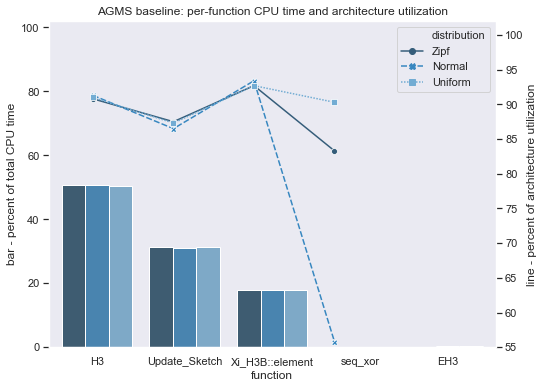

In [61]:
# AGMS - CPU Time + Architecture Utilization Graph

cnt = 15
occs = np.array([50.7, 31.2, 17.9, 0.1, 0.1,
                50.6, 31.1, 17.9, 0.1, 0.3,
                50.4, 31.3, 17.9, 0.1, 0.3])
utils = np.array([90.8, 87.5, 92.7, 83.3, np.nan,
                  91.3, 86.5, 93.4, 55.8, np.nan,
                  91.0, 87.3, 92.7, 90.3, np.nan])
order = np.array(['Update_Sketch', 'seq_xor', 'EH3', 'Xi_EH3::element', 'Other'])
funcs = np.tile(order, 3)
funcs2 = np.tile(['A', 'B', 'C', 'D', 'E'], 3)
dists = np.repeat(['Zipf', 'Normal', 'Uniform'], 5)

df = pd.DataFrame(index=range(cnt), columns=["distribution", "functions", "functions2", "occurance", "utilization"])
df.distribution = dists
df.functions = funcs
df.functions2 = funcs2
df.occurance = occs
df.utilization = utils

# print(df)

f = plt.figure(figsize=(8,6))
fig1 = sns.barplot(x="functions", y="occurance", hue="distribution",
                  data=df, palette="Blues_d")
fig1.set(ylim=(0,102), xlabel="function", ylabel="bar - percent of total CPU time")
fig1.grid(False)
fig1.legend_.remove()

sec_axis = fig1.twinx()
sec_axis.grid(False)

fig2 = sns.lineplot(x="functions2", y="utilization", data=df,
                    palette="Blues_d", ci="sd", markers=True,
                    hue="distribution", style="distribution")

fig2.set(ylim=(55,102),title="AGMS baseline: per-function CPU time and architecture utilization",
         ylabel="line - percent of architecture utilization")
labels = ["H3", "Update_Sketch", "Xi_H3B::element", "seq_xor", "EH3", "Other"]
plt.margins(0.03)
plt.xticks(np.arange(6), labels, rotation='vertical')
plt.yticks(np.arange(55, 102, 5))

# #plot first fig again to keep xtickslabels
# fig3 = sns.barplot(x="functions", y="occurance", hue="distribution",
#                   data=df, palette="Blues_d")
# fig3.legend_.set(title="")
# fig3.set(ylabel="line - percent of architecture utilization")

f.savefig("AGMS_baseline:_per-function_CPU_time_and_architecture_utilization.pdf", bbox_inches='tight')

plt.show()

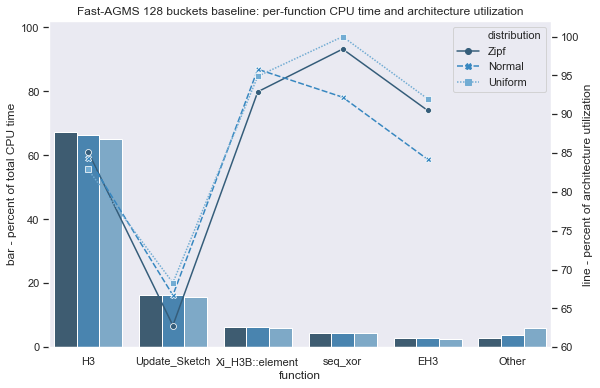

In [62]:
# F-AGMS 128 - CPU Time + Architecture Utilization Graph

cnt = 18
occs = np.array([67.3, 16.3, 6.4, 4.4, 2.8, 2.8,
                66.4, 16.4, 6.2, 4.4, 2.8, 3.8,
                65.0, 15.8, 6.1, 4.4, 2.7, 6.0])
utils = np.array([85.2, 62.8, 92.9, 98.4, 90.5, np.nan,
                  84.4, 66.7, 95.8, 92.2, 84.2, np.nan,
                  82.9, 68.3, 94.9, 100.0, 92.0, np.nan])
order = np.array(['H3', 'Update_Sketch', 'Xi_H3B::element', 'seq_xor', 'EH3', 'Other'])
funcs = np.tile(order, 3)
funcs2 = np.tile(['A', 'B', 'C', 'D', 'E', 'F'], 3)
dists = np.repeat(['Zipf', 'Normal', 'Uniform'], 6)

df = pd.DataFrame(index=range(cnt), columns=["distribution", "functions", "functions2", "occurance", "utilization"])
df.distribution = dists
df.functions = funcs
df.functions2 = funcs2
df.occurance = occs
df.utilization = utils

# print(df)

f = plt.figure(figsize=(9,6))
fig1 = sns.barplot(x="functions", y="occurance", hue="distribution",
                  data=df, palette="Blues_d")
fig1.grid(False)
fig1.set(ylim=(0,102), xlabel="function", ylabel="bar - percent of total CPU time")
fig1.legend_.remove()

sec_axis = fig1.twinx()
sec_axis.grid(False)

fig2 = sns.lineplot(x="functions2", y="utilization", data=df,
                    palette="Blues_d", ci="sd", markers=True,
                    hue="distribution", style="distribution")

fig2.set(ylim=(60,102),title="Fast-AGMS 128 buckets baseline: per-function CPU time and architecture utilization", ylabel="line - percent of architecture utilization")
labels = ["H3", "Update_Sketch", "Xi_H3B::element", "seq_xor", "EH3", "Other"]
plt.margins(0.01)
plt.xticks(np.arange(6), labels, rotation='vertical')

# #plot first fig again to keep xtickslabels
# fig3 = sns.barplot(x="functions", y="occurance", hue="distribution",
#                   data=df, palette="Blues_d")
# fig3.legend_.set(title="")
# fig3.set(ylabel="line - percent of architecture utilization")

f.savefig("Fast-AGMS_128_buckets_baseline:_per-function_CPU_time_and_architecture_utilization.pdf", bbox_inches='tight')

plt.show()

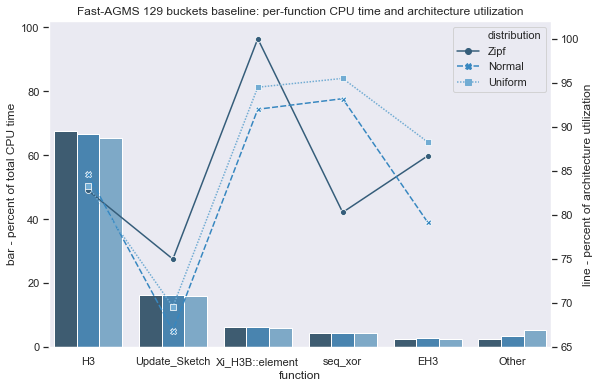

In [63]:
# F-AGMS 129 - CPU Time + Architecture Utilization Graph

cnt = 18
occs = np.array([67.6, 16.4, 6.2, 4.4, 2.7, 2.7,
                66.8, 16.3, 6.2, 4.4, 2.8, 3.5,
                65.4, 16.0, 6.1, 4.4, 2.7, 5.4])
utils = np.array([82.8, 75.0, 100.0, 80.3, 86.7, np.nan,
                  84.6, 66.9, 92.0, 93.2, 79.2, np.nan,
                  83.3, 69.6, 94.5, 95.5, 88.3, np.nan])
order = np.array(['H3', 'Update_Sketch', 'Xi_H3B::element', 'seq_xor', 'EH3', 'Other'])
funcs = np.tile(order, 3)
funcs2 = np.tile(['A', 'B', 'C', 'D', 'E', 'F'], 3)
dists = np.repeat(['Zipf', 'Normal', 'Uniform'], 6)

df = pd.DataFrame(index=range(cnt), columns=["distribution", "functions", "functions2", "occurance", "utilization"])
df.distribution = dists
df.functions = funcs
df.functions2 = funcs2
df.occurance = occs
df.utilization = utils

# print(df)

f = plt.figure(figsize=(9,6))
fig1 = sns.barplot(x="functions", y="occurance", hue="distribution",
                  data=df, palette="Blues_d")
fig1.set(ylim=(0,102), xlabel="function", ylabel="bar - percent of total CPU time")
fig1.grid(False)
fig1.legend_.remove()

sec_axis = fig1.twinx()
sec_axis.grid(False)

fig2 = sns.lineplot(x="functions2", y="utilization", data=df,
                    palette="Blues_d", ci="sd", markers=True,
                    hue="distribution", style="distribution")

fig2.set(ylim=(65,102),title="Fast-AGMS 129 buckets baseline: per-function CPU time and architecture utilization",
         ylabel="line - percent of architecture utilization")
labels = ["H3", "Update_Sketch", "Xi_H3B::element", "seq_xor", "EH3", "Other"]
plt.margins(0.01)
plt.xticks(np.arange(6), labels, rotation='vertical')

# #plot first fig again to keep xtickslabels
# fig3 = sns.barplot(x="functions", y="occurance", hue="distribution",
#                   data=df, palette="Blues_d")
# fig3.legend_.set(title="")
# fig3.grid(False)
# fig3.set(ylabel="line - percent of architecture utilization")

f.savefig("Fast-AGMS_129_buckets_baseline:_per-function_CPU_time_and_architecture_utilization.pdf", bbox_inches='tight')

plt.show()

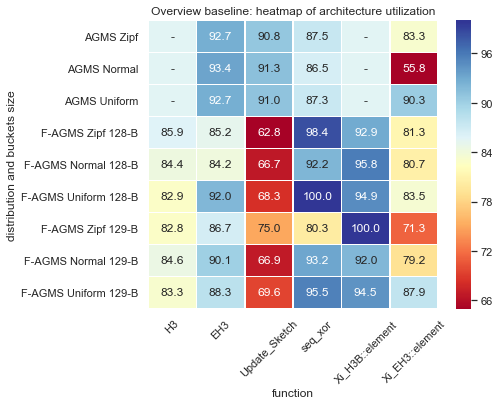

In [66]:
## Heatmap 100M

total_dists = 9
total_funcs = 6
cnt = total_dists * total_funcs
func = np.tile(['H3', 'Update_Sketch', 'Xi_H3B::element', 'seq_xor', 'EH3', 'Xi_EH3::element'], total_dists)
dist_alg = np.repeat(['F-AGMS Zipf 128-B', 'F-AGMS Normal 128-B', 'F-AGMS Uniform 128-B',
                  'F-AGMS Zipf 129-B', 'F-AGMS Normal 129-B', 'F-AGMS Uniform 129-B',
                     'AGMS Zipf', 'AGMS Normal', 'AGMS Uniform'], total_funcs)
archu = np.array([85.9, 62.8, 92.9, 98.4, 85.2, 81.3,
                 84.4, 66.7, 95.8, 92.2, 84.2, 80.7,
                 82.9, 68.3, 94.9, 100.0, 92.0, 83.5,
                 82.8, 75.0, 100.0, 80.3, 86.7, 71.3,
                 84.6, 66.9, 92.0, 93.2, 90.1, 79.2,
                 83.3, 69.6, 94.5, 95.5, 88.3, 87.9,
                 85.6, 90.8, 85.6, 87.5, 92.7, 83.3,
                 85.6, 91.3, 85.6, 86.5, 93.4, 55.8,
                 85.6, 91.0, 85.6, 87.3, 92.7, 90.3])

labels = np.array([
                  ["-", 92.7, 90.8, 87.5, "-", 83.3],
                  ["-", 93.4, 91.3, 86.5, "-", 55.8],
                  ["-", 92.7, 91.0, 87.3, "-", 90.3],
                  [85.9, 85.2, 62.8, 98.4, 92.9, 81.3],
                  [84.4, 84.2, 66.7, 92.2, 95.8, 80.7],
                  [82.9, 92.0, 68.3, 100.0, 94.9, 83.5],
                  [82.8, 86.7, 75.0, 80.3, 100.0, 71.3],
                  [84.6, 90.1, 66.9, 93.2, 92.0, 79.2],
                  [83.3, 88.3, 69.6, 95.5, 94.5, 87.9]
])


df = pd.DataFrame(index=range(cnt), columns=["function", "dist_alg", "archu"])
df.function = func
df.dist_alg = dist_alg
df.archu = archu

pivot = df.pivot("dist_alg", "function", "archu")

index_order = ['AGMS Zipf', 'AGMS Normal', 'AGMS Uniform',
               'F-AGMS Zipf 128-B', 'F-AGMS Normal 128-B', 'F-AGMS Uniform 128-B',
               'F-AGMS Zipf 129-B', 'F-AGMS Normal 129-B', 'F-AGMS Uniform 129-B']
column_order = ['H3', 'EH3', 'Update_Sketch', 'seq_xor', 'Xi_H3B::element', 'Xi_EH3::element']
pivot = pivot.reindex_axis(index_order, axis=0)
pivot = pivot.reindex_axis(column_order, axis=1)
# print(pivot)
f = plt.figure(figsize=(6.5,5.3))

fig = sns.heatmap(pivot, annot=labels, fmt="", linewidths=.5,
                  vmin=65, vmax=100, center=82.4, cmap="RdYlBu")
fig.set(ylabel = "distribution and buckets size", title= "Overview baseline: heatmap of architecture utilization")
plt.xticks(rotation=45)
# fig.set_facecolor('lightgrey')
f.savefig("Overview_baseline:_heatmap_of_architecture_utilization.pdf", bbox_inches='tight')

plt.show()

In [ ]:
## Bubbles graph plotting each function's relative size and it's arch. utilization, individually.

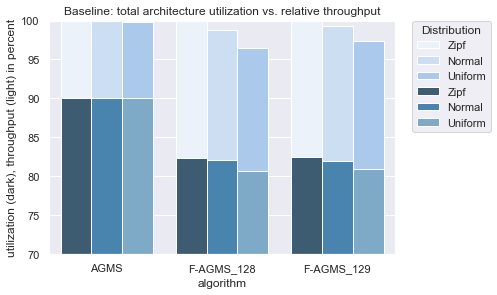

In [67]:
## Overall microarchitecture utilization per algorithm + difference in throughput compared to best result

# sns.set(style="whitegrid")
cnt = 9
utils = np.array([90.0, 90.1, 90.0,
                  82.4, 82.1, 80.7,
                  82.5, 82.0, 81.0])

thrptdiff = np.array([100.0, 99.960, 99.834,
                     100.0, 98.774, 96.480,
                     100.0, 99.242, 97.397])

cat = np.repeat(['AGMS', 'F-AGMS_128', 'F-AGMS_129'], 3)
dist = np.tile(['Zipf', 'Normal', 'Uniform'], 3)

df = pd.DataFrame(index=range(cnt), columns=["cat", "dist", "utils", "thrdiff"])
df.cat = cat
df.dist = dist
df.utils = utils
df.thrdiff = thrptdiff 

# print(df)

f = plt.figure(figsize=(6.2,4.3))
sns.set_color_codes("pastel")
fig = sns.barplot(x="cat", y="thrdiff", data=df,
                  color="b", hue="dist")
sns.set_color_codes()
fig.legend_.remove()

fig2 = sns.barplot(x="cat", y="utils", data=df,
                  hue='dist', palette="Blues_d")
fig2.set(title = "Baseline: total architecture utilization vs. relative throughput",
         ylabel="utilization (dark), throughput (light) in percent",
         xlabel="algorithm", ylim=(70, 100))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Distribution")

f.savefig("Baseline:_total_architecture_utilization_vs._relative_throughput.pdf", bbox_inches='tight')

plt.show()

In [ ]:
########################################## GRAVEYARD CODE BELOW ############################################

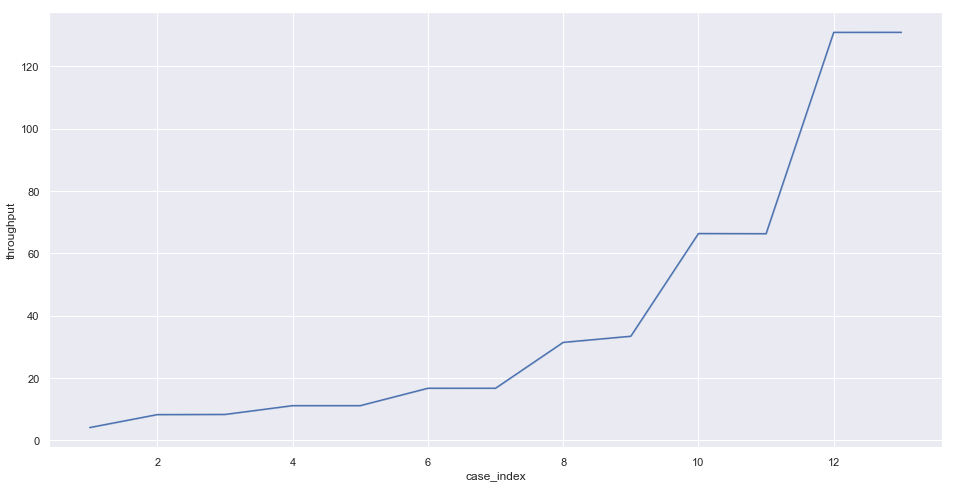

In [270]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 32
alg_cnt = 1
dist_cnt = 3
offset = case_cnt*runs_cnt*dist_cnt
# case_ind = np.tile([13,12,11,10,9,8,7,6,5,4,3,2,1], dist_cnt)
case_ind = np.tile([1,2,3,4,5,6,7,8,9,10,11,12,13], dist_cnt)
case_ind = np.repeat(case_ind, runs_cnt)
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], dist_cnt)
cases = np.repeat(cases, runs_cnt)
dists = np.repeat(['zipf', 'normal', 'uniform'], case_cnt*runs_cnt)
algs = np.repeat(['F-AGMS'], offset)
thrput = np.array([4.14718, 4.14276, 4.12502, 4.1285, 4.1258, 4.12426, 4.12374, 4.12696, 4.13076, 4.12831, 4.12916, 4.13021, 4.13154, 4.13064, 4.13338, 4.13458, 4.13219, 4.13449, 4.13452, 4.13189, 4.12035, 4.13049, 4.12665, 4.121, 4.13267, 4.13362, 4.13216, 4.13245, 4.13273, 4.13172, 4.13196, 4.12865, 8.29518, 8.2417, 8.30535, 8.30196, 8.30142, 8.30366, 8.29435, 8.29907, 8.29815, 8.29726, 8.30331, 8.29758, 8.30196, 8.3034, 8.30117, 8.30861, 8.30301, 8.30544, 8.30436, 8.3088, 8.30037, 8.29031, 8.30325, 8.25872, 8.30689, 8.2848, 8.28994, 8.30794, 8.30058, 8.30245, 8.29583, 8.30859, 8.33487, 8.33817, 8.32816, 8.33709, 8.33396, 8.33759, 8.33873, 8.33883, 8.33274, 8.34098, 8.33779, 8.32086, 8.32748, 8.33679, 8.33108, 8.3364, 8.34029, 8.336, 8.33594, 8.33483, 8.33997, 8.33159, 8.33795, 8.33904, 8.33858, 8.32951, 8.33938, 8.33406, 8.33794, 8.33286, 8.33679, 8.33744, 11.1591, 11.1514, 11.0881, 11.1531, 11.1575, 11.1537, 11.1512, 11.1531, 11.1576, 11.1514, 11.1513, 11.1491, 11.1538, 11.1541, 11.1579, 11.1527, 11.1595, 11.1453, 11.149, 11.1544, 11.1445, 11.1497, 11.1542, 11.1548, 11.1528, 11.1544, 11.1577, 11.1432, 11.1582, 11.1501, 11.1509, 11.1517, 11.151, 11.0896, 11.143, 11.1475, 11.154, 11.1521, 11.0874, 11.1532, 11.1621, 11.1501, 11.1569, 11.1536, 11.153, 11.15, 11.1454, 11.1481, 11.1558, 11.1544, 11.1549, 11.1538, 11.1453, 11.1447, 11.1576, 11.1539, 11.1515, 11.1544, 11.153, 11.1508, 11.1484, 11.147, 11.1452, 11.1526, 16.6494, 16.744, 16.7349, 16.7235, 16.7217, 16.6868, 16.702, 16.7129, 16.7245, 16.7379, 16.7234, 16.685, 16.6722, 16.7003, 16.7358, 16.7006, 16.7508, 16.7297, 16.7252, 16.7276, 16.7343, 16.7272, 16.7082, 16.7287, 16.5875, 16.71, 16.6947, 16.7255, 16.7095, 16.7107, 16.7264, 16.7348, 16.7137, 16.7437, 16.7417, 16.6987, 16.6557, 16.7048, 16.7225, 16.7242, 16.7418, 16.7249, 16.733, 16.7493, 16.7253, 16.7194, 16.7226, 16.7257, 16.6694, 16.7006, 16.686, 16.6977, 16.7477, 16.6458, 16.7246, 16.7297, 16.7195, 16.7176, 16.7438, 16.7304, 16.7251, 16.7054, 16.7004, 16.7445, 31.4067, 31.4237, 31.4772, 31.4158, 31.4188, 31.4834, 31.4363, 31.3822, 31.4774, 31.4248, 31.4447, 31.4725, 31.4232, 31.4242, 31.4863, 31.4273, 31.4187, 31.5019, 31.4361, 31.3996, 31.4947, 31.4289, 31.4379, 31.4425, 31.4299, 31.4398, 31.4515, 31.4491, 31.4458, 31.4774, 31.4448, 31.4346, 33.4421, 33.4081, 33.4085, 33.4142, 33.382, 33.4186, 33.4222, 33.3879, 33.448, 33.391, 33.3993, 33.4237, 33.3857, 33.4227, 33.4109, 33.3813, 33.4504, 33.397, 33.4039, 33.4142, 33.3922, 33.4345, 33.4217, 33.362, 33.3851, 33.4043, 33.3813, 33.4243, 33.3904, 33.4312, 33.4058, 33.4035, 66.3646, 66.3558, 66.2795, 66.4545, 66.4433, 66.2117, 66.4614, 66.4386, 66.193, 66.3616, 66.3943, 66.3438, 66.3419, 66.413, 66.2006, 66.3211, 66.3656, 66.3957, 66.2623, 66.4183, 66.3221, 66.3382, 66.4111, 66.4403, 66.271, 66.3911, 66.4398, 66.2091, 66.4768, 66.3878, 66.3892, 66.3096, 66.3794, 66.2646, 66.3019, 66.3734, 66.4188, 66.2334, 66.3655, 66.267, 66.2341, 66.3933, 66.432, 66.1706, 66.4255, 66.4095, 66.2745, 66.3902, 66.4521, 66.317, 66.2757, 66.4112, 66.3255, 66.3169, 66.3522, 66.3536, 66.282, 66.3687, 66.2765, 66.2431, 66.3182, 66.4295, 66.201, 66.416, 130.888, 131.146, 130.659, 130.526, 130.849, 131.064, 130.981, 131.119, 130.718, 131.162, 130.377, 130.991, 131.11, 130.925, 130.89, 130.957, 130.445, 131.163, 130.886, 131.053, 130.889, 130.663, 130.515, 131.12, 130.985, 130.941, 130.957, 130.996, 131.158, 130.956, 130.994, 131.026, 130.992, 130.928, 131.082, 130.979, 131.244, 130.66, 130.966, 130.736, 131.046, 130.846, 131.132, 130.934, 131.002, 130.88, 130.954, 130.868, 131.054, 130.934, 131.058, 130.975, 130.78, 130.805, 131.185, 131.048, 131.197, 130.924, 130.917, 130.89, 131.108, 130.973, 130.928, 130.929,
                  4.13929, 4.13139, 4.13198, 4.13349, 4.1344, 4.13556, 4.13513, 4.13549, 4.13417, 4.13435, 4.13499, 4.13425, 4.13595, 4.1355, 4.13443, 4.13568, 4.1349, 4.13471, 4.13475, 4.13441, 4.13425, 4.13517, 4.13407, 4.13468, 4.1355, 4.13493, 4.13501, 4.13462, 4.1368, 4.13705, 4.13562, 4.13486, 8.30963, 8.30867, 8.30555, 8.30895, 8.30762, 8.3052, 8.3056, 8.307, 8.30692, 8.30865, 8.30719, 8.30769, 8.30839, 8.30849, 8.30839, 8.31001, 8.30688, 8.30893, 8.30911, 8.06985, 7.63827, 7.92258, 8.30777, 8.30807, 8.30872, 8.30635, 8.30822, 8.30756, 8.30829, 8.30742, 8.30868, 8.30784, 8.33812, 8.34205, 8.34182, 8.34057, 8.33999, 8.34098, 8.33866, 8.34446, 8.34266, 8.34166, 8.34031, 8.34184, 8.34219, 8.34089, 8.34091, 8.34118, 8.33836, 8.34206, 8.33969, 8.34008, 8.34278, 8.34058, 8.34097, 8.34195, 8.34089, 8.34088, 8.34167, 8.34131, 8.34161, 8.34271, 8.3407, 8.34011, 11.1691, 11.1675, 11.1698, 11.1729, 11.1637, 11.1653, 11.1677, 11.168, 11.1666, 11.1675, 11.1672, 11.1662, 11.1659, 11.1672, 11.1676, 11.1657, 11.1655, 11.1685, 11.1688, 11.1654, 11.1602, 11.1688, 11.1684, 11.1656, 11.1624, 11.1689, 11.1648, 11.1666, 11.1682, 11.1673, 11.1684, 11.1675, 11.1631, 11.165, 11.1686, 11.1648, 11.1638, 11.1648, 11.1668, 11.1658, 11.1627, 11.1601, 11.1691, 11.1664, 11.1648, 11.1607, 11.1698, 11.1671, 11.1638, 11.166, 11.1671, 11.1667, 11.1669, 11.1662, 11.1665, 11.1645, 11.1568, 11.1631, 11.1653, 11.1661, 11.1682, 11.1599, 11.1665, 11.166, 16.7392, 16.7415, 16.7436, 16.7384, 16.7263, 16.7411, 16.7446, 16.7375, 16.7367, 16.7439, 16.7403, 16.7383, 16.735, 16.7388, 16.732, 16.7358, 16.7373, 16.7413, 16.7382, 16.7362, 16.7305, 16.7264, 16.727, 16.7442, 16.74, 16.7361, 16.7353, 16.7361, 16.7228, 16.7424, 16.7413, 16.7423, 16.7376, 16.7404, 16.7432, 16.7279, 16.7408, 16.7392, 16.7349, 16.7355, 16.7388, 16.7379, 16.7393, 16.7348, 16.7344, 16.7403, 16.7382, 16.7359, 16.749, 16.7427, 16.7327, 16.7387, 16.7376, 16.736, 16.7343, 16.7359, 16.7501, 16.7341, 16.7404, 16.7291, 16.7274, 16.7422, 16.7404, 16.7368, 31.4678, 31.4548, 31.4611, 31.4504, 31.4406, 31.4509, 31.4735, 31.4547, 31.4577, 31.4491, 31.4759, 31.4632, 31.4709, 31.4798, 31.4694, 31.467, 31.4576, 31.4661, 31.4752, 31.4644, 31.4627, 31.4641, 31.4747, 31.4584, 31.4627, 31.464, 31.4685, 31.4605, 31.4686, 31.4656, 31.469, 31.4648, 33.434, 33.4462, 33.4493, 33.4604, 33.4428, 33.4507, 33.4521, 33.443, 33.4292, 33.4476, 33.4501, 33.4314, 33.4439, 33.441, 33.4572, 33.4559, 33.4412, 33.4311, 33.3895, 33.4185, 33.4371, 33.4403, 33.4598, 33.4499, 33.4416, 33.4488, 33.4532, 33.4511, 33.4407, 33.4421, 33.4457, 33.4426, 66.4959, 66.4249, 66.3844, 66.4246, 66.4202, 66.4332, 66.4493, 66.4469, 66.4366, 66.4426, 66.4922, 66.3837, 66.4055, 66.4837, 66.4326, 66.4684, 66.4494, 66.447, 66.4107, 66.4517, 66.4031, 66.4264, 66.4203, 66.4352, 66.4446, 66.4343, 66.3892, 66.4152, 66.4184, 66.4369, 66.448, 66.4449, 66.4271, 66.4704, 66.4405, 66.4336, 66.3914, 66.4089, 66.3768, 66.4334, 66.4275, 66.4044, 66.4112, 66.4317, 66.408, 66.3675, 66.4497, 66.3912, 66.4123, 66.3782, 66.4259, 66.3803, 66.4267, 66.36, 66.4043, 66.4052, 66.4296, 66.4272, 66.4246, 66.4101, 66.4284, 66.3852, 66.4009, 66.3639, 131.128, 131.09, 131.134, 130.984, 131.148, 130.876, 131.145, 131.127, 131.104, 130.967, 131.15, 130.899, 130.889, 131.027, 131.029, 130.943, 131.073, 130.914, 130.989, 131.176, 131.048, 130.964, 131.041, 131.178, 130.902, 131.084, 130.911, 131.315, 130.794, 131.172, 131.153, 131.119, 130.928, 130.975, 131.052, 131.053, 130.983, 131.207, 131, 131.021, 130.895, 131.125, 131.058, 131.13, 130.901, 131.102, 131.129, 131.058, 130.98, 131.149, 130.962, 131.041, 131.015, 131.089, 131.164, 131.143, 130.981, 130.986, 130.975, 131.058, 130.999, 130.796, 130.863, 131.221,
                  4.14951, 4.13203, 4.13316, 4.13401, 4.13479, 4.13504, 4.13532, 4.13505, 4.13447, 4.13511, 4.13481, 4.13518, 4.13485, 4.13485, 4.13636, 4.13339, 4.13506, 4.13489, 4.13466, 4.13512, 4.13506, 4.13479, 4.13503, 4.13364, 4.13447, 4.13457, 4.13508, 4.13514, 4.13475, 4.13494, 4.13462, 4.13335, 8.30137, 8.30602, 8.30557, 8.30432, 8.30504, 8.30569, 8.30403, 8.30545, 8.30545, 8.30406, 8.30601, 8.30508, 8.29944, 8.30571, 8.30663, 8.30231, 8.30367, 8.30417, 8.30317, 8.30509, 8.30458, 8.30392, 8.30432, 8.30433, 8.304, 8.30463, 8.30447, 8.30298, 8.29885, 8.3053, 8.30522, 8.3032, 8.33848, 8.34219, 8.34025, 8.34031, 8.34083, 8.34146, 8.3378, 8.33852, 8.33681, 8.3402, 8.33806, 8.33677, 8.33557, 8.33968, 8.33286, 8.33875, 8.33831, 8.3377, 8.33895, 8.33818, 8.33581, 8.33717, 8.33699, 8.33588, 8.33888, 8.33803, 8.33507, 8.31293, 8.33845, 8.33751, 8.33605, 8.33906, 11.1653, 11.1646, 11.1655, 11.1659, 11.1637, 11.1643, 11.1631, 11.166, 11.1658, 11.164, 11.1646, 11.1645, 11.165, 11.1639, 11.1592, 11.1657, 11.1646, 11.1657, 11.162, 11.1641, 11.1648, 11.1656, 11.1657, 11.1652, 11.1674, 11.1638, 11.1651, 11.1647, 11.1682, 11.1649, 11.1667, 11.1667, 11.1678, 11.17, 11.1617, 11.167, 11.1687, 11.1672, 11.1663, 11.1641, 11.1713, 11.1682, 11.1672, 11.1681, 11.1693, 11.1678, 11.1645, 11.1678, 11.1687, 11.1695, 11.1659, 11.1668, 11.1688, 11.1689, 11.1657, 11.1663, 11.1625, 11.1686, 11.1687, 11.1655, 11.165, 11.1632, 11.1661, 11.1653, 16.7545, 16.7557, 16.7595, 16.7507, 16.7577, 16.7513, 16.7511, 16.7552, 16.7636, 16.7546, 16.7495, 16.7531, 16.74, 16.752, 16.7491, 16.7564, 16.7564, 16.7528, 16.751, 16.7561, 16.7485, 16.7582, 16.7556, 16.7551, 16.753, 16.7485, 16.7551, 16.7561, 16.7577, 16.7573, 16.7571, 16.7551, 16.7614, 16.7651, 16.7623, 16.763, 16.7602, 16.7585, 16.7617, 16.7633, 16.7646, 16.7614, 16.7589, 16.7557, 16.7562, 16.7631, 16.7632, 16.7609, 16.7626, 16.7587, 16.7618, 16.764, 16.7541, 16.7614, 16.7616, 16.7594, 16.7639, 16.7527, 16.7669, 16.7633, 16.7641, 16.76, 16.7638, 16.7586, 31.4537, 31.4565, 31.4587, 31.452, 31.4546, 31.4457, 31.4513, 31.4382, 31.4559, 31.4556, 31.4587, 31.4479, 31.4521, 31.4527, 31.4548, 31.4437, 31.449, 31.4488, 31.4519, 31.4437, 31.4431, 31.442, 31.447, 31.434, 31.4608, 31.4495, 31.4465, 31.4355, 31.4518, 31.4456, 31.4427, 31.4567, 33.4379, 33.3848, 33.4344, 33.4047, 33.4321, 33.4218, 33.4191, 33.4111, 33.4252, 33.4299, 33.4252, 33.4038, 33.4103, 33.413, 33.3871, 33.4142, 33.4288, 33.4328, 33.4161, 33.4196, 33.4346, 33.4222, 33.4235, 33.4022, 33.4164, 33.4387, 33.4209, 33.4303, 33.4167, 33.4229, 33.431, 33.4172, 66.3001, 66.3312, 66.314, 66.3628, 66.2887, 66.3507, 66.2462, 66.3261, 66.2894, 66.2866, 66.2651, 66.3666, 66.2968, 66.3376, 66.2815, 66.3272, 66.3158, 66.3173, 66.2728, 66.3319, 66.3196, 66.2966, 66.3837, 66.326, 66.3549, 66.2625, 66.3212, 66.3292, 66.3155, 66.3173, 66.357, 66.3058, 66.2025, 66.1441, 66.2226, 66.1698, 66.1985, 66.1824, 66.2233, 66.1943, 66.2471, 66.1462, 66.2673, 66.1842, 66.217, 66.1961, 66.1889, 66.2045, 66.2464, 66.2371, 66.137, 66.2434, 66.2002, 66.2321, 66.2198, 66.2228, 66.1688, 66.193, 66.1287, 66.2209, 66.1747, 66.24, 66.1516, 66.2263, 130.61, 130.563, 130.733, 130.957, 130.721, 130.493, 130.839, 130.278, 130.581, 130.701, 130.689, 130.944, 130.902, 130.418, 130.641, 130.991, 130.811, 130.769, 130.778, 130.818, 130.669, 130.565, 130.863, 130.884, 130.702, 130.561, 130.796, 130.929, 130.621, 130.722, 130.867, 130.712, 130.866, 130.557, 130.984, 130.658, 130.857, 130.467, 130.744, 130.68, 130.777, 130.511, 130.74, 130.712, 130.809, 130.537, 130.542, 130.76, 130.899, 130.523, 130.772, 130.404, 130.752, 130.718, 130.647, 130.687, 130.907, 130.692, 130.862, 130.774, 130.844, 130.791, 130.912, 130.556])
acc = np.array([0.999998, 0.999999, 0.999994, 0.999992, 1, 0.999999, 0.999997, 0.999996, 0.999991, 0.999999, 0.99999, 0.999999, 0.999997, 0.999998, 0.999994, 0.999998, 0.999999, 0.999997, 0.999998, 0.999998, 0.999996, 0.999993, 0.999997, 0.999997, 0.999997, 0.999996, 0.999998, 0.999997, 1, 0.999992, 0.999999, 0.999995, 0.999994, 0.999998, 0.999995, 0.999993, 0.999991, 0.99999, 0.999997, 0.999994, 0.999998, 0.999992, 0.999995, 0.999999, 0.999999, 0.999993, 0.999995, 0.999999, 0.999985, 0.999986, 0.999996, 1, 0.999987, 0.999999, 0.999991, 0.999993, 0.999999, 0.999995, 1, 0.999997, 1, 0.999996, 0.999999, 0.999999, 0.99999, 0.99996, 0.999934, 0.999955, 0.999993, 0.999995, 0.999963, 1, 0.999974, 0.999989, 0.999994, 0.999997, 0.999986, 0.999967, 0.999974, 0.99999, 0.999989, 0.99998, 0.999973, 0.999964, 0.999995, 0.999945, 0.999958, 0.999993, 0.999988, 0.999983, 0.999945, 0.999999, 0.99997, 0.999996, 0.999964, 0.999948, 0.99997, 0.999995, 0.999992, 0.999983, 0.99997, 0.999994, 0.999964, 0.999969, 0.999999, 0.999998, 0.999971, 0.999952, 0.999995, 0.999983, 0.999983, 0.999991, 0.999957, 0.999993, 0.999999, 0.999962, 0.99998, 0.999985, 0.999939, 0.999988, 0.99998, 0.999991, 0.999982, 0.999932, 0.999963, 0.999961, 0.999998, 0.999961, 0.999924, 0.999948, 0.999859, 0.999938, 0.999876, 0.999668, 0.999836, 0.999729, 0.999903, 0.999836, 0.999863, 0.999936, 0.999885, 0.999894, 0.999982, 0.99997, 0.999705, 0.999752, 0.999949, 0.999693, 0.999892, 0.999852, 0.999988, 0.999847, 0.999991, 0.99998, 0.999956, 0.999922, 0.999886, 0.999907, 0.999967, 0.999969, 0.999917, 0.999907, 0.999936, 0.999866, 0.999849, 0.999994, 0.999749, 0.999769, 0.999917, 0.999946, 0.999881, 0.999934, 0.999925, 0.999802, 0.999781, 0.999859, 0.999678, 0.999778, 0.999906, 0.999901, 0.999973, 0.999808, 0.999955, 0.999915, 0.999484, 0.999947, 0.999992, 0.99983, 0.999945, 0.999888, 0.999727, 0.999841, 0.999962, 0.999899, 0.999833, 0.999953, 0.999928, 0.999811, 0.999387, 0.999946, 0.999667, 0.999907, 0.999876, 0.99998, 0.999851, 0.999648, 0.999899, 0.999916, 0.999629, 0.999869, 0.999789, 0.99973, 0.999682, 0.999316, 0.999751, 0.999887, 0.999931, 0.999928, 0.999957, 0.999984, 0.999931, 0.999958, 0.999874, 0.999808, 0.99997, 0.999828, 0.999646, 0.999837, 0.999698, 0.999922, 0.999573, 0.999977, 0.999802, 0.999861, 0.999798, 0.999841, 0.999579, 0.999932, 0.999839, 0.9998, 0.999495, 0.999808, 0.999931, 0.999964, 0.999804, 0.999931, 0.999805, 0.999798, 0.999812, 0.99983, 0.999572, 0.999828, 0.999894, 0.999852, 0.999896, 0.999993, 0.998837, 0.999564, 0.999937, 0.999839, 0.999901, 0.999622, 0.997446, 0.999799, 0.999754, 0.999498, 0.997994, 0.999466, 0.999255, 0.995641, 0.99659, 0.999202, 0.99962, 0.999937, 0.999808, 0.999603, 0.99994, 0.998936, 0.999556, 0.99945, 0.999207, 0.99774, 0.99871, 0.998685, 0.999215, 0.999366, 0.997674, 0.999854, 0.999166, 0.997529, 0.998764, 0.99976, 0.997762, 0.999482, 0.998866, 0.999352, 0.998105, 0.998492, 0.999261, 0.999076, 0.99835, 0.998817, 0.999692, 0.995836, 0.999831, 0.998722, 0.999973, 0.994873, 0.997433, 0.997917, 0.998985, 0.999679, 0.998504, 0.999534, 0.99837, 0.999584, 0.998916, 0.99723, 0.998802, 0.999448, 0.9968, 0.997642, 0.99974, 0.996125, 0.999681, 0.997825, 0.998892, 0.993709, 0.994444, 0.991952, 0.992023, 0.972039, 0.997652, 0.994924, 0.99466, 0.995329, 0.999173, 0.999793, 0.998659, 0.998039, 0.998867, 0.984541, 0.991347, 0.990741, 0.995081, 0.992749, 0.997522, 0.998537, 0.999487, 0.988962, 0.994536, 0.998647, 0.997088, 0.984424, 0.994004, 0.999913, 0.994248, 0.992735, 0.993863, 0.957231, 0.966408, 0.992908, 0.99937, 0.994831, 0.997116, 0.942946, 0.992479, 0.997762, 0.997824, 0.995062, 0.996517, 0.995833, 0.99692, 0.997512, 0.991649, 0.997089, 0.998315, 0.99724, 0.994256, 0.99492, 0.993869, 0.990597, 0.996768, 0.994537, 0.992425, 0.960884, 0.983654, 0.984808, 0.982673, 0.995367, 0.998576, 0.981967, 0.960511, 0.993272, 0.848174, 0.998675, 0.999236, 0.984735, 0.979869, 0.986179, 0.993294, 0.975369, 0.961308, 0.984501, 0.985573, 0.950931, 0.995907, 0.920688, 0.979123, 0.993599, 0.954065, 0.962201, 0.924581, 0.98314, 0.975094, 0.973511,
               0.999979, 0.999931, 0.999174, 0.998304, 0.999119, 0.998334, 0.999141, 0.99879, 0.999497, 0.99916, 0.999394, 0.998986, 0.999562, 0.999462, 0.999142, 0.999694, 0.999296, 0.998513, 0.998295, 0.99882, 0.999199, 0.999486, 0.997409, 0.999205, 0.999343, 0.999656, 0.997751, 0.999021, 0.999367, 0.999735, 0.998689, 0.999652, 0.999848, 0.999358, 0.999702, 0.99812, 0.996985, 0.999562, 0.997946, 0.999333, 0.996333, 0.999346, 0.998359, 0.998995, 0.997608, 0.999042, 0.999362, 0.999898, 0.998927, 0.998911, 0.998081, 0.999136, 0.999314, 0.998714, 0.998984, 0.999853, 0.998351, 0.997006, 0.998861, 0.99923, 0.998248, 0.997884, 0.997375, 0.998507, 0.999546, 0.997914, 0.99686, 0.999835, 0.994479, 0.997493, 0.999396, 0.994717, 0.999794, 0.996605, 0.996553, 0.999791, 0.999606, 0.999161, 0.996368, 0.99909, 0.997558, 0.999503, 0.996181, 0.999759, 0.997314, 0.997499, 0.999705, 0.99727, 0.99645, 0.995706, 0.996693, 0.996755, 0.998224, 0.999556, 0.995754, 0.995417, 0.997219, 0.996554, 0.998276, 0.997397, 0.99832, 0.99392, 0.999192, 0.999267, 0.999562, 0.993439, 0.99645, 0.998597, 0.999983, 0.996135, 0.998254, 0.996536, 0.999294, 0.99991, 0.997821, 0.999111, 0.997124, 0.998852, 0.998588, 0.998316, 0.998859, 0.999633, 0.997829, 0.998549, 0.999722, 0.996578, 0.999799, 0.999323, 0.992203, 0.997364, 0.995263, 0.997998, 0.997354, 0.992635, 0.996232, 0.998155, 0.999189, 0.998434, 0.995466, 0.999808, 0.997417, 0.999373, 0.999433, 0.998286, 0.99657, 0.996901, 0.998479, 0.998283, 0.995537, 0.999035, 0.998394, 0.998444, 0.998162, 0.998334, 0.997115, 0.99595, 0.999816, 0.998742, 0.995433, 0.998863, 0.993239, 0.997575, 0.988547, 0.997045, 0.99858, 0.99263, 0.998904, 0.997883, 0.998679, 0.99705, 0.994843, 0.989867, 0.999552, 0.993588, 0.996389, 0.997445, 0.999219, 0.999171, 0.995513, 0.996539, 0.995951, 0.994533, 0.992244, 0.996073, 0.998418, 0.999911, 0.99451, 0.995763, 0.998405, 0.992336, 0.997374, 0.99834, 0.998903, 0.99814, 0.998206, 0.996376, 0.995607, 0.988018, 0.996915, 0.996205, 0.985412, 0.997571, 0.997571, 0.996153, 0.998005, 0.992961, 0.979864, 0.993181, 0.995887, 0.998209, 0.991293, 0.999254, 0.999659, 0.994462, 0.999093, 0.990821, 0.995427, 0.996767, 0.999602, 0.992531, 0.994477, 0.99468, 0.998847, 0.996899, 0.991247, 0.990053, 0.995481, 0.999593, 0.991321, 0.993252, 0.992836, 0.988232, 0.99007, 0.997466, 0.990426, 0.998636, 0.996761, 0.996293, 0.997317, 0.9859, 0.997004, 0.985402, 0.997625, 0.99327, 0.998773, 0.997462, 0.987119, 0.996724, 0.989616, 0.999164, 0.991267, 0.987123, 0.998426, 0.997874, 0.999826, 0.996576, 0.993205, 0.980168, 0.971363, 0.974946, 0.996904, 0.997654, 0.985312, 0.994737, 0.989061, 0.993421, 0.987854, 0.987137, 0.981151, 0.998845, 0.986845, 0.967117, 0.984552, 0.998442, 0.997244, 0.996696, 0.976012, 0.996313, 0.991041, 0.987343, 0.974751, 0.985666, 0.978037, 0.985395, 0.985729, 0.975079, 0.988632, 0.994948, 0.992034, 0.996928, 0.984668, 0.952077, 0.984601, 0.999709, 0.990535, 0.979575, 0.985155, 0.990027, 0.974425, 0.968755, 0.983051, 0.994397, 0.986861, 0.982394, 0.959355, 0.99836, 0.996899, 0.956927, 0.970839, 0.998517, 0.992926, 0.997274, 0.995036, 0.992947, 0.975138, 0.987905, 0.988219, 0.99737, 0.982559, 0.975587, 0.988038, 0.962207, 0.954836, 0.978559, 0.979005, 0.969115, 0.957734, 0.944021, 0.994312, 0.984788, 0.938491, 0.958287, 0.983564, 0.991939, 0.986231, 0.984089, 0.960245, 0.969165, 0.968991, 0.990433, 0.957637, 0.994094, 0.958784, 0.936936, 0.973294, 0.978912, 0.955206, 0.980592, 0.994157, 0.999716, 0.983602, 0.987719, 0.954123, 0.93366, 0.989014, 0.984542, 0.919502, 0.970021, 0.943558, 0.982729, 0.989932, 0.966996, 0.916251, 0.985959, 0.99855, 0.982369, 0.920422, 0.989268, 0.98761, 0.923173, 0.968686, 0.997835, 0.983741, 0.929843, 0.896695, 0.996971, 0.99183, 0.949963, 0.921586, 0.952828, 0.950956, 0.996453, 0.974355, 0.935366, 0.895522, 0.865456, 0.988575, 0.885946, 0.958638, 0.929335, 0.733751, 0.999359, 0.975987, 0.966504, 0.861084, 0.93162, 0.907651, 0.937669, 0.835356, 0.817502, 0.974184, 0.977807, 0.995475, 0.941984, 0.814888, 0.990001, 0.930342, 0.912462, 0.984328, 0.935064, 0.985621, 0.923589, 0.937753, 0.808391, 0.882244, 0.866121,
               0.988436, 0.992617, 0.998701, 0.998773, 0.992643, 0.993113, 0.999454, 0.991853, 0.989146, 0.997766, 0.988007, 0.989628, 0.998824, 0.994741, 0.995472, 0.996086, 0.990902, 0.998593, 0.992027, 0.993163, 0.997836, 0.9942, 0.995123, 0.990898, 0.991569, 0.988511, 0.993897, 0.998371, 0.986536, 0.998566, 0.988817, 0.996962, 0.992626, 0.994332, 0.990125, 0.99969, 0.991748, 0.993437, 0.9958, 0.992769, 0.983904, 0.998615, 0.993125, 0.991726, 0.990854, 0.991725, 0.9865, 0.981592, 0.998447, 0.990275, 0.991132, 0.995967, 0.999749, 0.997169, 0.999821, 0.989276, 0.99988, 0.994851, 0.99987, 0.982133, 0.995192, 0.978514, 0.990008, 0.989925, 0.98368, 0.999893, 0.988336, 0.981458, 0.976646, 0.990801, 0.990356, 0.998762, 0.992978, 0.988129, 0.984208, 0.988252, 0.979887, 0.998703, 0.982321, 0.974, 0.970596, 0.993791, 0.973827, 0.99364, 0.992912, 0.998134, 0.973064, 0.997073, 0.977541, 0.996552, 0.992929, 0.979981, 0.997956, 0.999834, 0.997067, 0.976663, 0.999521, 0.968035, 0.987435, 0.994032, 0.964102, 0.999569, 0.972428, 0.989923, 0.976432, 0.971078, 0.996048, 0.992711, 0.990646, 0.974242, 0.986343, 0.985804, 0.980446, 0.987897, 0.982111, 0.99867, 0.997382, 0.974538, 0.989097, 0.973028, 0.983705, 0.979956, 0.998981, 0.989179, 0.99255, 0.992482, 0.999187, 0.987955, 0.956062, 0.986086, 0.959753, 0.997752, 0.959658, 0.990907, 0.991452, 0.983476, 0.970043, 0.974772, 0.995835, 0.998716, 0.982187, 0.955576, 0.988701, 0.988839, 0.999213, 0.984295, 0.98826, 0.987569, 0.969692, 0.987425, 0.995922, 0.984682, 0.993744, 0.931203, 0.959898, 0.997459, 0.994586, 0.972984, 0.986399, 0.982147, 0.973075, 0.963383, 0.995963, 0.993744, 0.972211, 0.922124, 0.971341, 0.989297, 0.982602, 0.951114, 0.944788, 0.987994, 0.974015, 0.952093, 0.982144, 0.991462, 0.995418, 0.99148, 0.992191, 0.973544, 0.992854, 0.994465, 0.975282, 0.995837, 0.947359, 0.986667, 0.952895, 0.932349, 0.976774, 0.930122, 0.951148, 0.949874, 0.942203, 0.967388, 0.993308, 0.963591, 0.99767, 0.931033, 0.986709, 0.987641, 0.972273, 0.996562, 0.959201, 0.968001, 0.996501, 0.922989, 0.992312, 0.96245, 0.979525, 0.999472, 0.978881, 0.998145, 0.989793, 0.965982, 0.980684, 0.932091, 0.988514, 0.968829, 0.984069, 0.971694, 0.975876, 0.996287, 0.970516, 0.999198, 0.955075, 0.99996, 0.990321, 0.976009, 0.993192, 0.970277, 0.945762, 0.951804, 0.988714, 0.989474, 0.995686, 0.972455, 0.989748, 0.992395, 0.95203, 0.989255, 0.968657, 0.985941, 0.975312, 0.980092, 0.9437, 0.964054, 0.971128, 0.990927, 0.96371, 0.97697, 0.895693, 0.96287, 0.993927, 0.96351, 0.999692, 0.990785, 0.935949, 0.972154, 0.919427, 0.941263, 0.949373, 0.876786, 0.987917, 0.910677, 0.980935, 0.942871, 0.981856, 0.984758, 0.944145, 0.945565, 0.935778, 0.974193, 0.936819, 0.984059, 0.987384, 0.948502, 0.885125, 0.952601, 0.937204, 0.964223, 0.94142, 0.923753, 0.946513, 0.931801, 0.967886, 0.954981, 0.939983, 0.955167, 0.962095, 0.96214, 0.952092, 0.883956, 0.943182, 0.985914, 0.923777, 0.967896, 0.9831, 0.922675, 0.871183, 0.998313, 0.894102, 0.948459, 0.970674, 0.82813, 0.986362, 0.99304, 0.987292, 0.816304, 0.98968, 0.994637, 0.926951, 0.964259, 0.965815, 0.951929, 0.999902, 0.963689, 0.993098, 0.906596, 0.909828, 0.983732, 0.921457, 0.936669, 0.977121, 0.950103, 0.963748, 0.843064, 0.861225, 0.841984, 0.926224, 0.921312, 0.988057, 0.940694, 0.993276, 0.975272, 0.89938, 0.835382, 0.937518, 0.803733, 0.961478, 0.866603, 0.796568, 0.876166, 0.908285, 0.96658, 0.856892, 0.9051, 0.939335, 0.948319, 0.923579, 0.927601, 0.925474, 0.944503, 0.737912, 0.917862, 0.975951, 0.831846, 0.860583, 0.878514, 0.943113, 0.844099, 0.732073, 0.927075, 0.7532, 0.773159, 0.895881, 0.79932, 0.792804, 0.789659, 0.931841, 0.850264, 0.967833, 0.853963, 0.723044, 0.886028, 0.925472, 0.786346, 0.757603, 0.850848, 0.86679, 0.952324, 0.96455, 0.914058, 0.84764, 0.922239, 0.831308, 0.766776, 0.852356, 0.857552, 0.998211, 0.809697, 0.975767, 0.928552, 0.72389, 0.889793, 0.960104, 0.962621, 0.773572, 0.952904, 0.86431, 0.728149, 0.834357, 0.96417, 0.974225, 0.960775, 0.821895, 0.980644, 0.89449, 0.996479, 0.902657, 0.743349, 0.904453, 0.773741, 0.971296, 0.757099, 0.933549, 0.909761])


df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "dist", "case_index", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.dist = dists
df1.case_index = case_ind
df1.case = cases
df1.throughput = thrput
df1.accuracy = acc


plt.figure(figsize=(16,8))

sns.lineplot(y="throughput", x="case_index", data=df1,
             ci=97)
# print(df1)

fig1.set(title="F-AGMS Lineplot")
# plt.xticks(np.arange(0.7, 1.01, 0.05))
# plt.xticks(np.arange(0, 140, 10.0))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

   algorithm     dist  case_index       case  throughput  accuracy
0     F-AGMS     zipf          13  256Rx256B    4.130636  0.999997
1     F-AGMS     zipf          12  128Rx256B    8.297669  0.999995
2     F-AGMS     zipf          11  128Rx128B    8.335428  0.999977
3     F-AGMS     zipf          10   96Rx128B   11.150797  0.999977
4     F-AGMS     zipf           9    96Rx96B   11.147509  0.999884
5     F-AGMS     zipf           8    64Rx96B   16.712053  0.999862
6     F-AGMS     zipf           7    64Rx64B   16.716725  0.999828
7     F-AGMS     zipf           6    32Rx64B   31.442428  0.999816
8     F-AGMS     zipf           5    32Rx32B   33.407750  0.999051
9     F-AGMS     zipf           4    16Rx32B   66.356459  0.998628
10    F-AGMS     zipf           3    16Rx16B   66.333528  0.995004
11    F-AGMS     zipf           2     8Rx16B  130.909656  0.991445
12    F-AGMS     zipf           1      8Rx8B  130.967312  0.973247
13    F-AGMS   normal          13  256Rx256B    4.134918  0.99

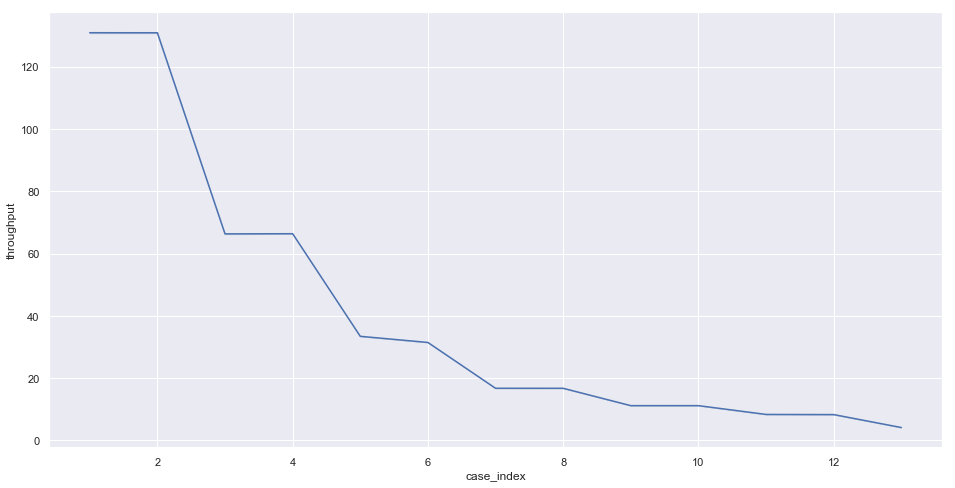

In [305]:
## Baseline throughput vs accuracy based on the set buckets/rows size for this experiment
# line plot
# x acc
# y throughput
# legend different cases
# col/style = algorithm
# hue = per case
# both throughput and acc should not be dependant on input data size

case_cnt = 13
runs_cnt = 1
alg_cnt = 1
dist_cnt = 3
offset = case_cnt*runs_cnt*dist_cnt
case_ind = np.tile([13,12,11,10,9,8,7,6,5,4,3,2,1], dist_cnt)
cases = np.tile(['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B'], dist_cnt)
dists = np.repeat(['zipf', 'normal', 'uniform'], 13)
algs = np.repeat(['F-AGMS'], case_cnt*dist_cnt)
thrput = np.array([4.14718, 4.14276, 4.12502, 4.1285, 4.1258, 4.12426, 4.12374, 4.12696, 4.13076, 4.12831, 4.12916, 4.13021, 4.13154, 4.13064, 4.13338, 4.13458, 4.13219, 4.13449, 4.13452, 4.13189, 4.12035, 4.13049, 4.12665, 4.121, 4.13267, 4.13362, 4.13216, 4.13245, 4.13273, 4.13172, 4.13196, 4.12865, 8.29518, 8.2417, 8.30535, 8.30196, 8.30142, 8.30366, 8.29435, 8.29907, 8.29815, 8.29726, 8.30331, 8.29758, 8.30196, 8.3034, 8.30117, 8.30861, 8.30301, 8.30544, 8.30436, 8.3088, 8.30037, 8.29031, 8.30325, 8.25872, 8.30689, 8.2848, 8.28994, 8.30794, 8.30058, 8.30245, 8.29583, 8.30859, 8.33487, 8.33817, 8.32816, 8.33709, 8.33396, 8.33759, 8.33873, 8.33883, 8.33274, 8.34098, 8.33779, 8.32086, 8.32748, 8.33679, 8.33108, 8.3364, 8.34029, 8.336, 8.33594, 8.33483, 8.33997, 8.33159, 8.33795, 8.33904, 8.33858, 8.32951, 8.33938, 8.33406, 8.33794, 8.33286, 8.33679, 8.33744, 11.1591, 11.1514, 11.0881, 11.1531, 11.1575, 11.1537, 11.1512, 11.1531, 11.1576, 11.1514, 11.1513, 11.1491, 11.1538, 11.1541, 11.1579, 11.1527, 11.1595, 11.1453, 11.149, 11.1544, 11.1445, 11.1497, 11.1542, 11.1548, 11.1528, 11.1544, 11.1577, 11.1432, 11.1582, 11.1501, 11.1509, 11.1517, 11.151, 11.0896, 11.143, 11.1475, 11.154, 11.1521, 11.0874, 11.1532, 11.1621, 11.1501, 11.1569, 11.1536, 11.153, 11.15, 11.1454, 11.1481, 11.1558, 11.1544, 11.1549, 11.1538, 11.1453, 11.1447, 11.1576, 11.1539, 11.1515, 11.1544, 11.153, 11.1508, 11.1484, 11.147, 11.1452, 11.1526, 16.6494, 16.744, 16.7349, 16.7235, 16.7217, 16.6868, 16.702, 16.7129, 16.7245, 16.7379, 16.7234, 16.685, 16.6722, 16.7003, 16.7358, 16.7006, 16.7508, 16.7297, 16.7252, 16.7276, 16.7343, 16.7272, 16.7082, 16.7287, 16.5875, 16.71, 16.6947, 16.7255, 16.7095, 16.7107, 16.7264, 16.7348, 16.7137, 16.7437, 16.7417, 16.6987, 16.6557, 16.7048, 16.7225, 16.7242, 16.7418, 16.7249, 16.733, 16.7493, 16.7253, 16.7194, 16.7226, 16.7257, 16.6694, 16.7006, 16.686, 16.6977, 16.7477, 16.6458, 16.7246, 16.7297, 16.7195, 16.7176, 16.7438, 16.7304, 16.7251, 16.7054, 16.7004, 16.7445, 31.4067, 31.4237, 31.4772, 31.4158, 31.4188, 31.4834, 31.4363, 31.3822, 31.4774, 31.4248, 31.4447, 31.4725, 31.4232, 31.4242, 31.4863, 31.4273, 31.4187, 31.5019, 31.4361, 31.3996, 31.4947, 31.4289, 31.4379, 31.4425, 31.4299, 31.4398, 31.4515, 31.4491, 31.4458, 31.4774, 31.4448, 31.4346, 33.4421, 33.4081, 33.4085, 33.4142, 33.382, 33.4186, 33.4222, 33.3879, 33.448, 33.391, 33.3993, 33.4237, 33.3857, 33.4227, 33.4109, 33.3813, 33.4504, 33.397, 33.4039, 33.4142, 33.3922, 33.4345, 33.4217, 33.362, 33.3851, 33.4043, 33.3813, 33.4243, 33.3904, 33.4312, 33.4058, 33.4035, 66.3646, 66.3558, 66.2795, 66.4545, 66.4433, 66.2117, 66.4614, 66.4386, 66.193, 66.3616, 66.3943, 66.3438, 66.3419, 66.413, 66.2006, 66.3211, 66.3656, 66.3957, 66.2623, 66.4183, 66.3221, 66.3382, 66.4111, 66.4403, 66.271, 66.3911, 66.4398, 66.2091, 66.4768, 66.3878, 66.3892, 66.3096, 66.3794, 66.2646, 66.3019, 66.3734, 66.4188, 66.2334, 66.3655, 66.267, 66.2341, 66.3933, 66.432, 66.1706, 66.4255, 66.4095, 66.2745, 66.3902, 66.4521, 66.317, 66.2757, 66.4112, 66.3255, 66.3169, 66.3522, 66.3536, 66.282, 66.3687, 66.2765, 66.2431, 66.3182, 66.4295, 66.201, 66.416, 130.888, 131.146, 130.659, 130.526, 130.849, 131.064, 130.981, 131.119, 130.718, 131.162, 130.377, 130.991, 131.11, 130.925, 130.89, 130.957, 130.445, 131.163, 130.886, 131.053, 130.889, 130.663, 130.515, 131.12, 130.985, 130.941, 130.957, 130.996, 131.158, 130.956, 130.994, 131.026, 130.992, 130.928, 131.082, 130.979, 131.244, 130.66, 130.966, 130.736, 131.046, 130.846, 131.132, 130.934, 131.002, 130.88, 130.954, 130.868, 131.054, 130.934, 131.058, 130.975, 130.78, 130.805, 131.185, 131.048, 131.197, 130.924, 130.917, 130.89, 131.108, 130.973, 130.928, 130.929,
                  4.13929, 4.13139, 4.13198, 4.13349, 4.1344, 4.13556, 4.13513, 4.13549, 4.13417, 4.13435, 4.13499, 4.13425, 4.13595, 4.1355, 4.13443, 4.13568, 4.1349, 4.13471, 4.13475, 4.13441, 4.13425, 4.13517, 4.13407, 4.13468, 4.1355, 4.13493, 4.13501, 4.13462, 4.1368, 4.13705, 4.13562, 4.13486, 8.30963, 8.30867, 8.30555, 8.30895, 8.30762, 8.3052, 8.3056, 8.307, 8.30692, 8.30865, 8.30719, 8.30769, 8.30839, 8.30849, 8.30839, 8.31001, 8.30688, 8.30893, 8.30911, 8.06985, 7.63827, 7.92258, 8.30777, 8.30807, 8.30872, 8.30635, 8.30822, 8.30756, 8.30829, 8.30742, 8.30868, 8.30784, 8.33812, 8.34205, 8.34182, 8.34057, 8.33999, 8.34098, 8.33866, 8.34446, 8.34266, 8.34166, 8.34031, 8.34184, 8.34219, 8.34089, 8.34091, 8.34118, 8.33836, 8.34206, 8.33969, 8.34008, 8.34278, 8.34058, 8.34097, 8.34195, 8.34089, 8.34088, 8.34167, 8.34131, 8.34161, 8.34271, 8.3407, 8.34011, 11.1691, 11.1675, 11.1698, 11.1729, 11.1637, 11.1653, 11.1677, 11.168, 11.1666, 11.1675, 11.1672, 11.1662, 11.1659, 11.1672, 11.1676, 11.1657, 11.1655, 11.1685, 11.1688, 11.1654, 11.1602, 11.1688, 11.1684, 11.1656, 11.1624, 11.1689, 11.1648, 11.1666, 11.1682, 11.1673, 11.1684, 11.1675, 11.1631, 11.165, 11.1686, 11.1648, 11.1638, 11.1648, 11.1668, 11.1658, 11.1627, 11.1601, 11.1691, 11.1664, 11.1648, 11.1607, 11.1698, 11.1671, 11.1638, 11.166, 11.1671, 11.1667, 11.1669, 11.1662, 11.1665, 11.1645, 11.1568, 11.1631, 11.1653, 11.1661, 11.1682, 11.1599, 11.1665, 11.166, 16.7392, 16.7415, 16.7436, 16.7384, 16.7263, 16.7411, 16.7446, 16.7375, 16.7367, 16.7439, 16.7403, 16.7383, 16.735, 16.7388, 16.732, 16.7358, 16.7373, 16.7413, 16.7382, 16.7362, 16.7305, 16.7264, 16.727, 16.7442, 16.74, 16.7361, 16.7353, 16.7361, 16.7228, 16.7424, 16.7413, 16.7423, 16.7376, 16.7404, 16.7432, 16.7279, 16.7408, 16.7392, 16.7349, 16.7355, 16.7388, 16.7379, 16.7393, 16.7348, 16.7344, 16.7403, 16.7382, 16.7359, 16.749, 16.7427, 16.7327, 16.7387, 16.7376, 16.736, 16.7343, 16.7359, 16.7501, 16.7341, 16.7404, 16.7291, 16.7274, 16.7422, 16.7404, 16.7368, 31.4678, 31.4548, 31.4611, 31.4504, 31.4406, 31.4509, 31.4735, 31.4547, 31.4577, 31.4491, 31.4759, 31.4632, 31.4709, 31.4798, 31.4694, 31.467, 31.4576, 31.4661, 31.4752, 31.4644, 31.4627, 31.4641, 31.4747, 31.4584, 31.4627, 31.464, 31.4685, 31.4605, 31.4686, 31.4656, 31.469, 31.4648, 33.434, 33.4462, 33.4493, 33.4604, 33.4428, 33.4507, 33.4521, 33.443, 33.4292, 33.4476, 33.4501, 33.4314, 33.4439, 33.441, 33.4572, 33.4559, 33.4412, 33.4311, 33.3895, 33.4185, 33.4371, 33.4403, 33.4598, 33.4499, 33.4416, 33.4488, 33.4532, 33.4511, 33.4407, 33.4421, 33.4457, 33.4426, 66.4959, 66.4249, 66.3844, 66.4246, 66.4202, 66.4332, 66.4493, 66.4469, 66.4366, 66.4426, 66.4922, 66.3837, 66.4055, 66.4837, 66.4326, 66.4684, 66.4494, 66.447, 66.4107, 66.4517, 66.4031, 66.4264, 66.4203, 66.4352, 66.4446, 66.4343, 66.3892, 66.4152, 66.4184, 66.4369, 66.448, 66.4449, 66.4271, 66.4704, 66.4405, 66.4336, 66.3914, 66.4089, 66.3768, 66.4334, 66.4275, 66.4044, 66.4112, 66.4317, 66.408, 66.3675, 66.4497, 66.3912, 66.4123, 66.3782, 66.4259, 66.3803, 66.4267, 66.36, 66.4043, 66.4052, 66.4296, 66.4272, 66.4246, 66.4101, 66.4284, 66.3852, 66.4009, 66.3639, 131.128, 131.09, 131.134, 130.984, 131.148, 130.876, 131.145, 131.127, 131.104, 130.967, 131.15, 130.899, 130.889, 131.027, 131.029, 130.943, 131.073, 130.914, 130.989, 131.176, 131.048, 130.964, 131.041, 131.178, 130.902, 131.084, 130.911, 131.315, 130.794, 131.172, 131.153, 131.119, 130.928, 130.975, 131.052, 131.053, 130.983, 131.207, 131, 131.021, 130.895, 131.125, 131.058, 131.13, 130.901, 131.102, 131.129, 131.058, 130.98, 131.149, 130.962, 131.041, 131.015, 131.089, 131.164, 131.143, 130.981, 130.986, 130.975, 131.058, 130.999, 130.796, 130.863, 131.221,
                  4.14951, 4.13203, 4.13316, 4.13401, 4.13479, 4.13504, 4.13532, 4.13505, 4.13447, 4.13511, 4.13481, 4.13518, 4.13485, 4.13485, 4.13636, 4.13339, 4.13506, 4.13489, 4.13466, 4.13512, 4.13506, 4.13479, 4.13503, 4.13364, 4.13447, 4.13457, 4.13508, 4.13514, 4.13475, 4.13494, 4.13462, 4.13335, 8.30137, 8.30602, 8.30557, 8.30432, 8.30504, 8.30569, 8.30403, 8.30545, 8.30545, 8.30406, 8.30601, 8.30508, 8.29944, 8.30571, 8.30663, 8.30231, 8.30367, 8.30417, 8.30317, 8.30509, 8.30458, 8.30392, 8.30432, 8.30433, 8.304, 8.30463, 8.30447, 8.30298, 8.29885, 8.3053, 8.30522, 8.3032, 8.33848, 8.34219, 8.34025, 8.34031, 8.34083, 8.34146, 8.3378, 8.33852, 8.33681, 8.3402, 8.33806, 8.33677, 8.33557, 8.33968, 8.33286, 8.33875, 8.33831, 8.3377, 8.33895, 8.33818, 8.33581, 8.33717, 8.33699, 8.33588, 8.33888, 8.33803, 8.33507, 8.31293, 8.33845, 8.33751, 8.33605, 8.33906, 11.1653, 11.1646, 11.1655, 11.1659, 11.1637, 11.1643, 11.1631, 11.166, 11.1658, 11.164, 11.1646, 11.1645, 11.165, 11.1639, 11.1592, 11.1657, 11.1646, 11.1657, 11.162, 11.1641, 11.1648, 11.1656, 11.1657, 11.1652, 11.1674, 11.1638, 11.1651, 11.1647, 11.1682, 11.1649, 11.1667, 11.1667, 11.1678, 11.17, 11.1617, 11.167, 11.1687, 11.1672, 11.1663, 11.1641, 11.1713, 11.1682, 11.1672, 11.1681, 11.1693, 11.1678, 11.1645, 11.1678, 11.1687, 11.1695, 11.1659, 11.1668, 11.1688, 11.1689, 11.1657, 11.1663, 11.1625, 11.1686, 11.1687, 11.1655, 11.165, 11.1632, 11.1661, 11.1653, 16.7545, 16.7557, 16.7595, 16.7507, 16.7577, 16.7513, 16.7511, 16.7552, 16.7636, 16.7546, 16.7495, 16.7531, 16.74, 16.752, 16.7491, 16.7564, 16.7564, 16.7528, 16.751, 16.7561, 16.7485, 16.7582, 16.7556, 16.7551, 16.753, 16.7485, 16.7551, 16.7561, 16.7577, 16.7573, 16.7571, 16.7551, 16.7614, 16.7651, 16.7623, 16.763, 16.7602, 16.7585, 16.7617, 16.7633, 16.7646, 16.7614, 16.7589, 16.7557, 16.7562, 16.7631, 16.7632, 16.7609, 16.7626, 16.7587, 16.7618, 16.764, 16.7541, 16.7614, 16.7616, 16.7594, 16.7639, 16.7527, 16.7669, 16.7633, 16.7641, 16.76, 16.7638, 16.7586, 31.4537, 31.4565, 31.4587, 31.452, 31.4546, 31.4457, 31.4513, 31.4382, 31.4559, 31.4556, 31.4587, 31.4479, 31.4521, 31.4527, 31.4548, 31.4437, 31.449, 31.4488, 31.4519, 31.4437, 31.4431, 31.442, 31.447, 31.434, 31.4608, 31.4495, 31.4465, 31.4355, 31.4518, 31.4456, 31.4427, 31.4567, 33.4379, 33.3848, 33.4344, 33.4047, 33.4321, 33.4218, 33.4191, 33.4111, 33.4252, 33.4299, 33.4252, 33.4038, 33.4103, 33.413, 33.3871, 33.4142, 33.4288, 33.4328, 33.4161, 33.4196, 33.4346, 33.4222, 33.4235, 33.4022, 33.4164, 33.4387, 33.4209, 33.4303, 33.4167, 33.4229, 33.431, 33.4172, 66.3001, 66.3312, 66.314, 66.3628, 66.2887, 66.3507, 66.2462, 66.3261, 66.2894, 66.2866, 66.2651, 66.3666, 66.2968, 66.3376, 66.2815, 66.3272, 66.3158, 66.3173, 66.2728, 66.3319, 66.3196, 66.2966, 66.3837, 66.326, 66.3549, 66.2625, 66.3212, 66.3292, 66.3155, 66.3173, 66.357, 66.3058, 66.2025, 66.1441, 66.2226, 66.1698, 66.1985, 66.1824, 66.2233, 66.1943, 66.2471, 66.1462, 66.2673, 66.1842, 66.217, 66.1961, 66.1889, 66.2045, 66.2464, 66.2371, 66.137, 66.2434, 66.2002, 66.2321, 66.2198, 66.2228, 66.1688, 66.193, 66.1287, 66.2209, 66.1747, 66.24, 66.1516, 66.2263, 130.61, 130.563, 130.733, 130.957, 130.721, 130.493, 130.839, 130.278, 130.581, 130.701, 130.689, 130.944, 130.902, 130.418, 130.641, 130.991, 130.811, 130.769, 130.778, 130.818, 130.669, 130.565, 130.863, 130.884, 130.702, 130.561, 130.796, 130.929, 130.621, 130.722, 130.867, 130.712, 130.866, 130.557, 130.984, 130.658, 130.857, 130.467, 130.744, 130.68, 130.777, 130.511, 130.74, 130.712, 130.809, 130.537, 130.542, 130.76, 130.899, 130.523, 130.772, 130.404, 130.752, 130.718, 130.647, 130.687, 130.907, 130.692, 130.862, 130.774, 130.844, 130.791, 130.912, 130.556])
acc = np.array([0.999998, 0.999999, 0.999994, 0.999992, 1, 0.999999, 0.999997, 0.999996, 0.999991, 0.999999, 0.99999, 0.999999, 0.999997, 0.999998, 0.999994, 0.999998, 0.999999, 0.999997, 0.999998, 0.999998, 0.999996, 0.999993, 0.999997, 0.999997, 0.999997, 0.999996, 0.999998, 0.999997, 1, 0.999992, 0.999999, 0.999995, 0.999994, 0.999998, 0.999995, 0.999993, 0.999991, 0.99999, 0.999997, 0.999994, 0.999998, 0.999992, 0.999995, 0.999999, 0.999999, 0.999993, 0.999995, 0.999999, 0.999985, 0.999986, 0.999996, 1, 0.999987, 0.999999, 0.999991, 0.999993, 0.999999, 0.999995, 1, 0.999997, 1, 0.999996, 0.999999, 0.999999, 0.99999, 0.99996, 0.999934, 0.999955, 0.999993, 0.999995, 0.999963, 1, 0.999974, 0.999989, 0.999994, 0.999997, 0.999986, 0.999967, 0.999974, 0.99999, 0.999989, 0.99998, 0.999973, 0.999964, 0.999995, 0.999945, 0.999958, 0.999993, 0.999988, 0.999983, 0.999945, 0.999999, 0.99997, 0.999996, 0.999964, 0.999948, 0.99997, 0.999995, 0.999992, 0.999983, 0.99997, 0.999994, 0.999964, 0.999969, 0.999999, 0.999998, 0.999971, 0.999952, 0.999995, 0.999983, 0.999983, 0.999991, 0.999957, 0.999993, 0.999999, 0.999962, 0.99998, 0.999985, 0.999939, 0.999988, 0.99998, 0.999991, 0.999982, 0.999932, 0.999963, 0.999961, 0.999998, 0.999961, 0.999924, 0.999948, 0.999859, 0.999938, 0.999876, 0.999668, 0.999836, 0.999729, 0.999903, 0.999836, 0.999863, 0.999936, 0.999885, 0.999894, 0.999982, 0.99997, 0.999705, 0.999752, 0.999949, 0.999693, 0.999892, 0.999852, 0.999988, 0.999847, 0.999991, 0.99998, 0.999956, 0.999922, 0.999886, 0.999907, 0.999967, 0.999969, 0.999917, 0.999907, 0.999936, 0.999866, 0.999849, 0.999994, 0.999749, 0.999769, 0.999917, 0.999946, 0.999881, 0.999934, 0.999925, 0.999802, 0.999781, 0.999859, 0.999678, 0.999778, 0.999906, 0.999901, 0.999973, 0.999808, 0.999955, 0.999915, 0.999484, 0.999947, 0.999992, 0.99983, 0.999945, 0.999888, 0.999727, 0.999841, 0.999962, 0.999899, 0.999833, 0.999953, 0.999928, 0.999811, 0.999387, 0.999946, 0.999667, 0.999907, 0.999876, 0.99998, 0.999851, 0.999648, 0.999899, 0.999916, 0.999629, 0.999869, 0.999789, 0.99973, 0.999682, 0.999316, 0.999751, 0.999887, 0.999931, 0.999928, 0.999957, 0.999984, 0.999931, 0.999958, 0.999874, 0.999808, 0.99997, 0.999828, 0.999646, 0.999837, 0.999698, 0.999922, 0.999573, 0.999977, 0.999802, 0.999861, 0.999798, 0.999841, 0.999579, 0.999932, 0.999839, 0.9998, 0.999495, 0.999808, 0.999931, 0.999964, 0.999804, 0.999931, 0.999805, 0.999798, 0.999812, 0.99983, 0.999572, 0.999828, 0.999894, 0.999852, 0.999896, 0.999993, 0.998837, 0.999564, 0.999937, 0.999839, 0.999901, 0.999622, 0.997446, 0.999799, 0.999754, 0.999498, 0.997994, 0.999466, 0.999255, 0.995641, 0.99659, 0.999202, 0.99962, 0.999937, 0.999808, 0.999603, 0.99994, 0.998936, 0.999556, 0.99945, 0.999207, 0.99774, 0.99871, 0.998685, 0.999215, 0.999366, 0.997674, 0.999854, 0.999166, 0.997529, 0.998764, 0.99976, 0.997762, 0.999482, 0.998866, 0.999352, 0.998105, 0.998492, 0.999261, 0.999076, 0.99835, 0.998817, 0.999692, 0.995836, 0.999831, 0.998722, 0.999973, 0.994873, 0.997433, 0.997917, 0.998985, 0.999679, 0.998504, 0.999534, 0.99837, 0.999584, 0.998916, 0.99723, 0.998802, 0.999448, 0.9968, 0.997642, 0.99974, 0.996125, 0.999681, 0.997825, 0.998892, 0.993709, 0.994444, 0.991952, 0.992023, 0.972039, 0.997652, 0.994924, 0.99466, 0.995329, 0.999173, 0.999793, 0.998659, 0.998039, 0.998867, 0.984541, 0.991347, 0.990741, 0.995081, 0.992749, 0.997522, 0.998537, 0.999487, 0.988962, 0.994536, 0.998647, 0.997088, 0.984424, 0.994004, 0.999913, 0.994248, 0.992735, 0.993863, 0.957231, 0.966408, 0.992908, 0.99937, 0.994831, 0.997116, 0.942946, 0.992479, 0.997762, 0.997824, 0.995062, 0.996517, 0.995833, 0.99692, 0.997512, 0.991649, 0.997089, 0.998315, 0.99724, 0.994256, 0.99492, 0.993869, 0.990597, 0.996768, 0.994537, 0.992425, 0.960884, 0.983654, 0.984808, 0.982673, 0.995367, 0.998576, 0.981967, 0.960511, 0.993272, 0.848174, 0.998675, 0.999236, 0.984735, 0.979869, 0.986179, 0.993294, 0.975369, 0.961308, 0.984501, 0.985573, 0.950931, 0.995907, 0.920688, 0.979123, 0.993599, 0.954065, 0.962201, 0.924581, 0.98314, 0.975094, 0.973511,
               0.999979, 0.999931, 0.999174, 0.998304, 0.999119, 0.998334, 0.999141, 0.99879, 0.999497, 0.99916, 0.999394, 0.998986, 0.999562, 0.999462, 0.999142, 0.999694, 0.999296, 0.998513, 0.998295, 0.99882, 0.999199, 0.999486, 0.997409, 0.999205, 0.999343, 0.999656, 0.997751, 0.999021, 0.999367, 0.999735, 0.998689, 0.999652, 0.999848, 0.999358, 0.999702, 0.99812, 0.996985, 0.999562, 0.997946, 0.999333, 0.996333, 0.999346, 0.998359, 0.998995, 0.997608, 0.999042, 0.999362, 0.999898, 0.998927, 0.998911, 0.998081, 0.999136, 0.999314, 0.998714, 0.998984, 0.999853, 0.998351, 0.997006, 0.998861, 0.99923, 0.998248, 0.997884, 0.997375, 0.998507, 0.999546, 0.997914, 0.99686, 0.999835, 0.994479, 0.997493, 0.999396, 0.994717, 0.999794, 0.996605, 0.996553, 0.999791, 0.999606, 0.999161, 0.996368, 0.99909, 0.997558, 0.999503, 0.996181, 0.999759, 0.997314, 0.997499, 0.999705, 0.99727, 0.99645, 0.995706, 0.996693, 0.996755, 0.998224, 0.999556, 0.995754, 0.995417, 0.997219, 0.996554, 0.998276, 0.997397, 0.99832, 0.99392, 0.999192, 0.999267, 0.999562, 0.993439, 0.99645, 0.998597, 0.999983, 0.996135, 0.998254, 0.996536, 0.999294, 0.99991, 0.997821, 0.999111, 0.997124, 0.998852, 0.998588, 0.998316, 0.998859, 0.999633, 0.997829, 0.998549, 0.999722, 0.996578, 0.999799, 0.999323, 0.992203, 0.997364, 0.995263, 0.997998, 0.997354, 0.992635, 0.996232, 0.998155, 0.999189, 0.998434, 0.995466, 0.999808, 0.997417, 0.999373, 0.999433, 0.998286, 0.99657, 0.996901, 0.998479, 0.998283, 0.995537, 0.999035, 0.998394, 0.998444, 0.998162, 0.998334, 0.997115, 0.99595, 0.999816, 0.998742, 0.995433, 0.998863, 0.993239, 0.997575, 0.988547, 0.997045, 0.99858, 0.99263, 0.998904, 0.997883, 0.998679, 0.99705, 0.994843, 0.989867, 0.999552, 0.993588, 0.996389, 0.997445, 0.999219, 0.999171, 0.995513, 0.996539, 0.995951, 0.994533, 0.992244, 0.996073, 0.998418, 0.999911, 0.99451, 0.995763, 0.998405, 0.992336, 0.997374, 0.99834, 0.998903, 0.99814, 0.998206, 0.996376, 0.995607, 0.988018, 0.996915, 0.996205, 0.985412, 0.997571, 0.997571, 0.996153, 0.998005, 0.992961, 0.979864, 0.993181, 0.995887, 0.998209, 0.991293, 0.999254, 0.999659, 0.994462, 0.999093, 0.990821, 0.995427, 0.996767, 0.999602, 0.992531, 0.994477, 0.99468, 0.998847, 0.996899, 0.991247, 0.990053, 0.995481, 0.999593, 0.991321, 0.993252, 0.992836, 0.988232, 0.99007, 0.997466, 0.990426, 0.998636, 0.996761, 0.996293, 0.997317, 0.9859, 0.997004, 0.985402, 0.997625, 0.99327, 0.998773, 0.997462, 0.987119, 0.996724, 0.989616, 0.999164, 0.991267, 0.987123, 0.998426, 0.997874, 0.999826, 0.996576, 0.993205, 0.980168, 0.971363, 0.974946, 0.996904, 0.997654, 0.985312, 0.994737, 0.989061, 0.993421, 0.987854, 0.987137, 0.981151, 0.998845, 0.986845, 0.967117, 0.984552, 0.998442, 0.997244, 0.996696, 0.976012, 0.996313, 0.991041, 0.987343, 0.974751, 0.985666, 0.978037, 0.985395, 0.985729, 0.975079, 0.988632, 0.994948, 0.992034, 0.996928, 0.984668, 0.952077, 0.984601, 0.999709, 0.990535, 0.979575, 0.985155, 0.990027, 0.974425, 0.968755, 0.983051, 0.994397, 0.986861, 0.982394, 0.959355, 0.99836, 0.996899, 0.956927, 0.970839, 0.998517, 0.992926, 0.997274, 0.995036, 0.992947, 0.975138, 0.987905, 0.988219, 0.99737, 0.982559, 0.975587, 0.988038, 0.962207, 0.954836, 0.978559, 0.979005, 0.969115, 0.957734, 0.944021, 0.994312, 0.984788, 0.938491, 0.958287, 0.983564, 0.991939, 0.986231, 0.984089, 0.960245, 0.969165, 0.968991, 0.990433, 0.957637, 0.994094, 0.958784, 0.936936, 0.973294, 0.978912, 0.955206, 0.980592, 0.994157, 0.999716, 0.983602, 0.987719, 0.954123, 0.93366, 0.989014, 0.984542, 0.919502, 0.970021, 0.943558, 0.982729, 0.989932, 0.966996, 0.916251, 0.985959, 0.99855, 0.982369, 0.920422, 0.989268, 0.98761, 0.923173, 0.968686, 0.997835, 0.983741, 0.929843, 0.896695, 0.996971, 0.99183, 0.949963, 0.921586, 0.952828, 0.950956, 0.996453, 0.974355, 0.935366, 0.895522, 0.865456, 0.988575, 0.885946, 0.958638, 0.929335, 0.733751, 0.999359, 0.975987, 0.966504, 0.861084, 0.93162, 0.907651, 0.937669, 0.835356, 0.817502, 0.974184, 0.977807, 0.995475, 0.941984, 0.814888, 0.990001, 0.930342, 0.912462, 0.984328, 0.935064, 0.985621, 0.923589, 0.937753, 0.808391, 0.882244, 0.866121,
               0.988436, 0.992617, 0.998701, 0.998773, 0.992643, 0.993113, 0.999454, 0.991853, 0.989146, 0.997766, 0.988007, 0.989628, 0.998824, 0.994741, 0.995472, 0.996086, 0.990902, 0.998593, 0.992027, 0.993163, 0.997836, 0.9942, 0.995123, 0.990898, 0.991569, 0.988511, 0.993897, 0.998371, 0.986536, 0.998566, 0.988817, 0.996962, 0.992626, 0.994332, 0.990125, 0.99969, 0.991748, 0.993437, 0.9958, 0.992769, 0.983904, 0.998615, 0.993125, 0.991726, 0.990854, 0.991725, 0.9865, 0.981592, 0.998447, 0.990275, 0.991132, 0.995967, 0.999749, 0.997169, 0.999821, 0.989276, 0.99988, 0.994851, 0.99987, 0.982133, 0.995192, 0.978514, 0.990008, 0.989925, 0.98368, 0.999893, 0.988336, 0.981458, 0.976646, 0.990801, 0.990356, 0.998762, 0.992978, 0.988129, 0.984208, 0.988252, 0.979887, 0.998703, 0.982321, 0.974, 0.970596, 0.993791, 0.973827, 0.99364, 0.992912, 0.998134, 0.973064, 0.997073, 0.977541, 0.996552, 0.992929, 0.979981, 0.997956, 0.999834, 0.997067, 0.976663, 0.999521, 0.968035, 0.987435, 0.994032, 0.964102, 0.999569, 0.972428, 0.989923, 0.976432, 0.971078, 0.996048, 0.992711, 0.990646, 0.974242, 0.986343, 0.985804, 0.980446, 0.987897, 0.982111, 0.99867, 0.997382, 0.974538, 0.989097, 0.973028, 0.983705, 0.979956, 0.998981, 0.989179, 0.99255, 0.992482, 0.999187, 0.987955, 0.956062, 0.986086, 0.959753, 0.997752, 0.959658, 0.990907, 0.991452, 0.983476, 0.970043, 0.974772, 0.995835, 0.998716, 0.982187, 0.955576, 0.988701, 0.988839, 0.999213, 0.984295, 0.98826, 0.987569, 0.969692, 0.987425, 0.995922, 0.984682, 0.993744, 0.931203, 0.959898, 0.997459, 0.994586, 0.972984, 0.986399, 0.982147, 0.973075, 0.963383, 0.995963, 0.993744, 0.972211, 0.922124, 0.971341, 0.989297, 0.982602, 0.951114, 0.944788, 0.987994, 0.974015, 0.952093, 0.982144, 0.991462, 0.995418, 0.99148, 0.992191, 0.973544, 0.992854, 0.994465, 0.975282, 0.995837, 0.947359, 0.986667, 0.952895, 0.932349, 0.976774, 0.930122, 0.951148, 0.949874, 0.942203, 0.967388, 0.993308, 0.963591, 0.99767, 0.931033, 0.986709, 0.987641, 0.972273, 0.996562, 0.959201, 0.968001, 0.996501, 0.922989, 0.992312, 0.96245, 0.979525, 0.999472, 0.978881, 0.998145, 0.989793, 0.965982, 0.980684, 0.932091, 0.988514, 0.968829, 0.984069, 0.971694, 0.975876, 0.996287, 0.970516, 0.999198, 0.955075, 0.99996, 0.990321, 0.976009, 0.993192, 0.970277, 0.945762, 0.951804, 0.988714, 0.989474, 0.995686, 0.972455, 0.989748, 0.992395, 0.95203, 0.989255, 0.968657, 0.985941, 0.975312, 0.980092, 0.9437, 0.964054, 0.971128, 0.990927, 0.96371, 0.97697, 0.895693, 0.96287, 0.993927, 0.96351, 0.999692, 0.990785, 0.935949, 0.972154, 0.919427, 0.941263, 0.949373, 0.876786, 0.987917, 0.910677, 0.980935, 0.942871, 0.981856, 0.984758, 0.944145, 0.945565, 0.935778, 0.974193, 0.936819, 0.984059, 0.987384, 0.948502, 0.885125, 0.952601, 0.937204, 0.964223, 0.94142, 0.923753, 0.946513, 0.931801, 0.967886, 0.954981, 0.939983, 0.955167, 0.962095, 0.96214, 0.952092, 0.883956, 0.943182, 0.985914, 0.923777, 0.967896, 0.9831, 0.922675, 0.871183, 0.998313, 0.894102, 0.948459, 0.970674, 0.82813, 0.986362, 0.99304, 0.987292, 0.816304, 0.98968, 0.994637, 0.926951, 0.964259, 0.965815, 0.951929, 0.999902, 0.963689, 0.993098, 0.906596, 0.909828, 0.983732, 0.921457, 0.936669, 0.977121, 0.950103, 0.963748, 0.843064, 0.861225, 0.841984, 0.926224, 0.921312, 0.988057, 0.940694, 0.993276, 0.975272, 0.89938, 0.835382, 0.937518, 0.803733, 0.961478, 0.866603, 0.796568, 0.876166, 0.908285, 0.96658, 0.856892, 0.9051, 0.939335, 0.948319, 0.923579, 0.927601, 0.925474, 0.944503, 0.737912, 0.917862, 0.975951, 0.831846, 0.860583, 0.878514, 0.943113, 0.844099, 0.732073, 0.927075, 0.7532, 0.773159, 0.895881, 0.79932, 0.792804, 0.789659, 0.931841, 0.850264, 0.967833, 0.853963, 0.723044, 0.886028, 0.925472, 0.786346, 0.757603, 0.850848, 0.86679, 0.952324, 0.96455, 0.914058, 0.84764, 0.922239, 0.831308, 0.766776, 0.852356, 0.857552, 0.998211, 0.809697, 0.975767, 0.928552, 0.72389, 0.889793, 0.960104, 0.962621, 0.773572, 0.952904, 0.86431, 0.728149, 0.834357, 0.96417, 0.974225, 0.960775, 0.821895, 0.980644, 0.89449, 0.996479, 0.902657, 0.743349, 0.904453, 0.773741, 0.971296, 0.757099, 0.933549, 0.909761])

dist_offset = 0
thrput_avg_zipf = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_zipf = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 416
thrput_avg_normal = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_normal = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])


dist_offset = 832
thrput_avg_uniform = np.array([st.mean(thrput[dist_offset+0:dist_offset+32]),
                            st.mean(thrput[dist_offset+32:dist_offset+64]),
                            st.mean(thrput[dist_offset+64:dist_offset+96]),
                            st.mean(thrput[dist_offset+96:dist_offset+128]),
                            st.mean(thrput[dist_offset+128:dist_offset+160]),
                            st.mean(thrput[dist_offset+160:dist_offset+192]),
                            st.mean(thrput[dist_offset+192:dist_offset+224]),
                            st.mean(thrput[dist_offset+224:dist_offset+256]),
                            st.mean(thrput[dist_offset+256:dist_offset+288]),
                            st.mean(thrput[dist_offset+288:dist_offset+320]),
                            st.mean(thrput[dist_offset+320:dist_offset+352]),
                            st.mean(thrput[dist_offset+352:dist_offset+384]),
                            st.mean(thrput[dist_offset+384:dist_offset+416])])
acc_avg_uniform = np.array([st.mean(acc[dist_offset+0:dist_offset+32]),
                            st.mean(acc[dist_offset+32:dist_offset+64]),
                            st.mean(acc[dist_offset+64:dist_offset+96]),
                            st.mean(acc[dist_offset+96:dist_offset+128]),
                            st.mean(acc[dist_offset+128:dist_offset+160]),
                            st.mean(acc[dist_offset+160:dist_offset+192]),
                            st.mean(acc[dist_offset+192:dist_offset+224]),
                            st.mean(acc[dist_offset+224:dist_offset+256]),
                            st.mean(acc[dist_offset+256:dist_offset+288]),
                            st.mean(acc[dist_offset+288:dist_offset+320]),
                            st.mean(acc[dist_offset+320:dist_offset+352]),
                            st.mean(acc[dist_offset+352:dist_offset+384]),
                            st.mean(acc[dist_offset+384:dist_offset+416])])

# avg_thrp = (np.array(thrput_avg_zipf) + np.array(thrput_avg_normal) + np.array(thrput_avg_uniform)) / 3.0
# avg_acc = (np.array(acc_avg_zipf) + np.array(acc_avg_normal) + np.array(acc_avg_uniform)) / 3.0

appended_thrputs = np.append(thrput_avg_zipf, np.append(thrput_avg_normal, thrput_avg_uniform))
appended_accs = np.append(acc_avg_zipf, np.append(acc_avg_normal, acc_avg_uniform))

df1 = pd.DataFrame(index=range(offset),
                  columns=["algorithm", "dist", "case_index", "case", "throughput", "accuracy"])
df1.algorithm = algs
df1.dist = dists
df1.case_index = case_ind
df1.case = cases
df1.throughput = appended_thrputs
df1.accuracy = appended_accs

plt.figure(figsize=(16,8))

cases_order = ['256Rx256B', '128Rx256B', '128Rx128B', '96Rx128B', '96Rx96B', '64Rx96B',
                   '64Rx64B', '32Rx64B', '32Rx32B', '16Rx32B', '16Rx16B', '8Rx16B', '8Rx8B']
sns.lineplot(y="throughput", x="case_index", data=df1,
             ci="sd")
print(df1)

fig1.set(title="F-AGMS Lineplot")
# plt.xticks(np.arange(0.7, 1.01, 0.05))
# plt.xticks(np.arange(0, 140, 10.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
## Overall microarchitecture utilization per algorithm + difference in throughput compared to best result

# sns.set(style="whitegrid")
cnt = 9
utils = np.array([91.7, 82.9, 83.1, 91.2, 81.9, 81.8,
                91.8, 80.4, 80.3])

df = pd.DataFrame(index=range(cnt), columns=["val", "func", "dist"])
df.val = vals

df.func = data[:,0]
df.dist = data[:,1]

# print(df)

fig = sns.catplot(x="func", y="val", data=df, kind="bar",
                  hue='dist', palette="Blues_d", height=5,
                  orient="v")
fig.set(ylabel = "total percent microarchitecture utilization", xlabel="algorithm", ylim=(50, 100))
fig._legend.set_title("distribution")
# fig.despine(left=True)
plt.show(fig)

In [ ]:
# sns.set(style="whitegrid")
cnt = 15
vals = np.array([45.1, 26.8, 23.4, 4.5, 0.2,
                45.1, 26.7, 23.4, 4.4, 0.4,
                44.8, 26.7, 23.5, 4.5, 0.3])
alg = np.repeat(['AGMS'], cnt)
data = np.array([['Update_Sketch', 'Zipf'],['seq_xor', 'Zipf'], ['EH3', 'Zipf'], ['Xi_EH3::element', 'Zipf'], ['Other', 'Zipf'],
                ['Update_Sketch', 'Normal'], ['seq_xor', 'Normal'], ['EH3', 'Normal'], ['Xi_EH3::element', 'Normal'], ['Other', 'Normal'],
                ['Update_Sketch', 'Uniform'], ['seq_xor', 'Uniform'], ['EH3', 'Uniform'], ['Xi_EH3::element', 'Uniform'], ['Other', 'Uniform']])

df = pd.DataFrame(index=range(cnt), columns=["algorithm", "val", "func", "dist"])
df.val = vals
df.algorithm = alg
df.func = data[:,0]
df.dist = data[:,1]

# print(df)

fig = sns.catplot(y="func", x="val", data=df,
                  kind="bar", row ="algorithm", hue='dist',
                  palette="Blues_d", orient="h", height=6)
fig.set(ylabel = "function", xlabel="total runtime percent")
fig._legend.set_title("istribution")
fig.despine(bottom=True)
plt.show(fig)




In [ ]:
# sns.set(style="whitegrid")
cnt = 18
vals = np.array([67.9, 16.1, 6.5, 3.9, 3.4, 2.2,
                66.4, 16.1, 6.4, 3.9, 3.3, 3.9,
                65.0, 15.7, 6.2, 3.7, 3.4, 6.0])
alg = np.repeat(['Fast-AGMS 128 buckets'], cnt)
data = np.array([['H3', 'Zipf'], ['Update_Sketch', 'Zipf'], ['Xi_H3B::element', 'Zipf'], ['seq_xor', 'Zipf'], ['EH3', 'Zipf'], ['Other', 'Zipf'],
                ['H3', 'Normal'], ['Update_Sketch', 'Normal'], ['Xi_H3B::element', 'Normal'], ['seq_xor', 'Normal'], ['EH3', 'Normal'], ['Other', 'Normal'],
                ['H3', 'Uniform'], ['Update_Sketch', 'Uniform'], ['Xi_H3B::element', 'Uniform'], ['seq_xor', 'Uniform'], ['EH3', 'Uniform'], ['Other', 'Uniform']])

df = pd.DataFrame(index=range(cnt), columns=["algorithm", "val", "func", "dist"])
df.val = vals
df.algorithm = alg
df.func = data[:,0]
df.dist = data[:,1]

# print(df)

fig = sns.catplot(y="func", x="val", data=df, kind="bar",
                  row ="algorithm", hue='dist', palette="Blues_d",
                  orient="h", height=6)
fig.set(ylabel = "function", xlabel="total runtime percent")
fig._legend.set_title("distribution")
fig.despine(bottom=True)
plt.show(fig)

In [ ]:
# sns.set(style="whitegrid")
cnt = 18
vals = np.array([67.6, 16.4, 6.4, 4.0, 3.4, 2.2,
                66.7, 15.7, 6.3, 4.0, 3.4, 3.9,
                65.1, 15.5, 6.3, 3.7, 3.3, 6.1])
alg = np.repeat(['Fast-AGMS 129 buckets'], cnt)
data = np.array([['H3', 'Zipf'], ['Update_Sketch', 'Zipf'], ['Xi_H3B::element', 'Zipf'], ['seq_xor', 'Zipf'], ['EH3', 'Zipf'], ['Other', 'Zipf'],
                ['H3', 'Normal'], ['Update_Sketch', 'Normal'], ['Xi_H3B::element', 'Normal'], ['seq_xor', 'Normal'], ['EH3', 'Normal'], ['Other', 'Normal'],
                ['H3', 'Uniform'], ['Update_Sketch', 'Uniform'], ['Xi_H3B::element', 'Uniform'], ['seq_xor', 'Uniform'], ['EH3', 'Uniform'], ['Other', 'Uniform']])

df = pd.DataFrame(index=range(cnt), columns=["algorithm", "val", "func", "dist"])
df.val = vals
df.algorithm = alg
df.func = data[:,0]
df.dist = data[:,1]

# print(df)

fig = sns.catplot(y="func", x="val", data=df, kind="bar",
                  row ="algorithm", hue='dist', palette="Blues_d",
                  orient="h", height=6)
fig.set(ylabel = "function", xlabel="total runtime percent")
fig._legend.set_title("distribution")
fig.despine(bottom=True)
plt.show(fig)

In [ ]:
## Heatmap DEFAULT 1M F-AGMS

# sns.set(style="whitegrid")
cnt = 30
alg = np.tile(['F-128 H3', 'F-128 Update_Sketch', 'F-128 Xi_H3B::element', 'F-128 EH3', 'F-128 seq_xor',
                'F-129 H3', 'F-129 Update_Sketch', 'F-129 Xi_H3B::element', 'F-129 EH3', 'F-129 seq_xor'], 3)
dist = np.repeat(['Zipf', 'Normal', 'Uniform'], 10)
archu = np.random.randint(100, size=30)

# archtile = np.tile(archu, 2)
df = pd.DataFrame(index=range(cnt), columns=["algorithm", "dist", "archu"])
# print(alg)
# print(archu)
df.algorithm = alg
df.dist = dist
df.archu = archu
pivot = df.pivot("algorithm", "dist", "archu")
# print(pivot)
sns.heatmap(pivot, annot=True, fmt="d", linewidths=.5, vmin=40, vmax=100, center=70)
plt.show()

In [ ]:
## Heatmap 1M F-AGMS

# sns.set(style="whitegrid")
cnt = 30
func = np.tile(['H3', 'Update_Sketch', 'Xi_H3B::element', 'EH3', 'seq_xor'], 6)
dist_alg = np.repeat(['Zipf 128-B', 'Normal 128-B', 'Uniform 128-B',
                  'Zipf 129-B', 'Normal 129-B', 'Uniform 129-B'], 5)
archu = np.array([69.8, 100.0, 87.9, 100.0, 100.0,
                 86.8, 45.9, 86.5, 100.0, 100.0,
                 70.8, 53.4, 27.8, 64.3, 87.3,
                 85.6, 61.6, 98.3, 100, 99.1,
                 83.6, 57.1, 71.4, 60.7, 100,
                 86.6, 77.5, 64.5, 100, 48.6])

# print(alg)
# print(dist)


# # archtile = np.tile(archu, 2)
df = pd.DataFrame(index=range(cnt), columns=["function", "dist_alg", "archu"])
# print(df)
df.function = func
df.dist_alg = dist_alg
df.archu = archu
# print(df)
pivot = df.pivot("dist_alg", "function", "archu")
# print(pivot)
fig = sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5, vmin=40, vmax=100, center=70, cmap="BrBG")
fig.set(ylabel = "distribution and buckets size")
plt.show()

In [ ]:
## Baseline throughput based on the set buckets/rows size for this experiment

# sns.set(style="whitegrid")
cnt = 15
vals1 = np.tile([1, 1, 2, 2, 3], 3)
vals2 = np.array([85, 80, 94, 99, 83, 65, 85, 90, 95, 80, 78, 82, 92, 95, 80])
funcs = np.tile(['A', 'B', 'C', 'D', 'E'],3)
dists = np.repeat(['Zipf', 'Normal', 'Uniform'], 5)

df = pd.DataFrame(index=range(cnt), columns=["distributions", "functions", "occurance", "utilization"])
df.distributions = dists
df.functions = funcs
df.occurance = vals1
df.utilization = vals2

print(df)

plt.figure(figsize=(8,6))
fig = sns.barplot(x="functions", y="occurance", hue="distributions",
                  data=df, palette="Blues_d")

sec_axis = fig.twinx()
fig2 = sns.lineplot(x="functions", y="utilization", hue="distributions", data=df,  palette="Blues_d", legend=False)
fig2.grid(False)
fig2.set(ylim=(65,100))

plt.show()

In [ ]:
flights_long = sns.load_dataset("flights")

flights = flights_long.pivot("month", "year", "passengers")
print(flights)
uniform_data = np.random.rand(10, 12)
sns.heatmap(flights)
plt.show()

In [ ]:
titanic = sns.load_dataset("titanic")
print(titanic)

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
print(tips)